# The angles: 3 for the unitary rotation gates and 1 for all the Ising ZZ gates

In [1587]:
import numpy as np
def param_tight(N,layers):
#     np.random.seed(99999)
    if N!=1:
        a = 2*np.pi*np.random.rand(4*layers)
    else:
        a = 2*np.pi*np.random.rand(3*layers)        
    return(a)
print(repr(param_tight(10,1)))

array([1.3010364 , 6.20882843, 5.19569854, 0.55539969])


# Definition of some standard matrices

In [1401]:
# 1
nqubits = 2
#パウリ演算子を準備する。
pI = np.array([[1+0.0j,0+0.0j],[0+0.0j,1+0.0j]])
pX = np.array([[0+0.0j,1+0.0j],[1+0.0j,0+0.0j]])
pZ = np.array([[1+0.0j,0+0.0j],[0+0.0j,-1+0.0j]])
pY = np.array([[0+0.0j,-1.0j],[0.0+1.0j,0.0+0.0j]])
pHad = (pX+pZ)/np.sqrt(2)
pP0 = (pI+pZ)/2
pP1 = (pI-pZ)/2

# The hamiltonians

In [1962]:
import numpy as np

def H1d_PBC(x):
    return(np.kron(1,pX))
def H2d_PBC(x): 
    return(np.kron(x,np.kron(pZ,pZ))+
            np.kron(x,np.kron(pZ,pZ))+
            np.kron(1,np.kron(pX,pI))+
            np.kron(1,np.kron(pI,pX)))
# H2d_PBC = np.negative(H2d_PBC)
def H3d_PBC(x):
    return(np.kron(x,np.kron(np.kron(pZ,pZ),pI))+
            np.kron(x,np.kron(np.kron(pI,pZ),pZ))+
            np.kron(x,np.kron(np.kron(pZ,pI),pZ))+
            np.kron(1,np.kron(np.kron(pX,pI),pI))+
            np.kron(1,np.kron(np.kron(pI,pX),pI))+
            np.kron(1,np.kron(np.kron(pI,pI),pX)))
# H3d_PBC = np.negative(H3d_PBC)
def H4d_PBC(x):
    return(np.kron(x,np.kron(np.kron(np.kron(pZ,pZ),pI),pI))+
         np.kron(x,np.kron(np.kron(np.kron(pI,pZ),pZ),pI))+
         np.kron(x,np.kron(np.kron(np.kron(pI,pI),pZ),pZ))+
         np.kron(x,np.kron(np.kron(np.kron(pZ,pI),pI),pZ))+
         np.kron(1,np.kron(np.kron(np.kron(pX,pI),pI),pI))+
         np.kron(1,np.kron(np.kron(np.kron(pI,pX),pI),pI))+
         np.kron(1,np.kron(np.kron(np.kron(pI,pI),pX),pI))+
         np.kron(1,np.kron(np.kron(np.kron(pI,pI),pI),pX)))
# H4d_PBC = np.negative(H4d_PBC)
def H5d_PBC(x):
    return(np.kron(x,np.kron(np.kron(np.kron(np.kron(pZ,pZ),pI),pI),pI))+
            np.kron(x,np.kron(np.kron(np.kron(np.kron(pI,pZ),pZ),pI),pI))+
            np.kron(x,np.kron(np.kron(np.kron(np.kron(pI,pI),pZ),pZ),pI))+
            np.kron(x,np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pZ),pZ))+
            np.kron(x,np.kron(np.kron(np.kron(np.kron(pZ,pI),pI),pI),pZ))+
            np.kron(1,np.kron(np.kron(np.kron(np.kron(pX,pI),pI),pI),pI))+
            np.kron(1,np.kron(np.kron(np.kron(np.kron(pI,pX),pI),pI),pI))+
            np.kron(1,np.kron(np.kron(np.kron(np.kron(pI,pI),pX),pI),pI))+
            np.kron(1,np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pX),pI))+
            np.kron(1,np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pI),pX)))
# H5d_PBC = np.negative(H5d_PBC)
def H6d_PBC(x):
    return(np.kron(x,np.kron(np.kron(np.kron(np.kron(np.kron(pZ,pZ),pI),pI),pI),pI))+
             np.kron(x,np.kron(np.kron(np.kron(np.kron(np.kron(pI,pZ),pZ),pI),pI),pI))+
             np.kron(x,np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pZ),pZ),pI),pI))+
             np.kron(x,np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pZ),pZ),pI))+
             np.kron(x,np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pI),pZ),pZ))+
             np.kron(x,np.kron(np.kron(np.kron(np.kron(np.kron(pZ,pI),pI),pI),pI),pZ))+
             np.kron(1,np.kron(np.kron(np.kron(np.kron(np.kron(pX,pI),pI),pI),pI),pI))+
             np.kron(1,np.kron(np.kron(np.kron(np.kron(np.kron(pI,pX),pI),pI),pI),pI))+
             np.kron(1,np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pX),pI),pI),pI))+
             np.kron(1,np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pX),pI),pI))+
             np.kron(1,np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pI),pX),pI))+
             np.kron(1,np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pI),pI),pX)))
# H6d_PBC = np.negative(H6d_PBC)
def H7d_PBC(x):
    return( np.kron(x,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pZ,pZ),pI),pI),pI),pI),pI))+
             np.kron(x,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pZ),pZ),pI),pI),pI),pI))+
             np.kron(x,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pZ),pZ),pI),pI),pI))+
             np.kron(x,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pZ),pZ),pI),pI))+
             np.kron(x,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pI),pZ),pZ),pI))+
             np.kron(x,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pI),pI),pZ),pZ))+
             np.kron(x,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pZ,pI),pI),pI),pI),pI),pZ))+
             np.kron(1,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pX,pI),pI),pI),pI),pI),pI))+
             np.kron(1,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pX),pI),pI),pI),pI),pI))+
             np.kron(1,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pX),pI),pI),pI),pI))+
             np.kron(1,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pX),pI),pI),pI))+
             np.kron(1,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pI),pX),pI),pI))+
             np.kron(1,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pI),pI),pX),pI))+
             np.kron(1,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pI),pI),pI),pX)))
# H7d_PBC = np.negative(H7d_PBC)
def H8d_PBC(x):
    return( np.kron(x,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pZ,pZ),pI),pI),pI),pI),pI),pI))+
             np.kron(x,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pZ),pZ),pI),pI),pI),pI),pI))+
             np.kron(x,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pZ),pZ),pI),pI),pI),pI))+
             np.kron(x,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pZ),pZ),pI),pI),pI))+
             np.kron(x,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pI),pZ),pZ),pI),pI))+
             np.kron(x,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pI),pI),pZ),pZ),pI))+
             np.kron(x,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pI),pI),pI),pZ),pZ))+
             np.kron(x,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pZ,pI),pI),pI),pI),pI),pI),pZ))+
             np.kron(1,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pX,pI),pI),pI),pI),pI),pI),pI))+
             np.kron(1,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pX),pI),pI),pI),pI),pI),pI))+
             np.kron(1,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pX),pI),pI),pI),pI),pI))+
             np.kron(1,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pX),pI),pI),pI),pI))+
             np.kron(1,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pI),pX),pI),pI),pI))+
             np.kron(1,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pI),pI),pX),pI),pI))+
             np.kron(1,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pI),pI),pI),pX),pI))+
             np.kron(1,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pI),pI),pI),pI),pX)))
# H8d_PBC = np.negative(H8d_PBC)
def H9d_PBC(x):
    return( np.kron(x,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pZ,pZ),pI),pI),pI),pI),pI),pI),pI))+
            np.kron(x,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pZ),pZ),pI),pI),pI),pI),pI),pI))+
            np.kron(x,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pZ),pZ),pI),pI),pI),pI),pI))+
            np.kron(x,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pZ),pZ),pI),pI),pI),pI))+
            np.kron(x,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pI),pZ),pZ),pI),pI),pI))+
            np.kron(x,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pI),pI),pZ),pZ),pI),pI))+
            np.kron(x,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pI),pI),pI),pZ),pZ),pI))+
            np.kron(x,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pI),pI),pI),pI),pZ),pZ))+
            np.kron(x,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pZ,pI),pI),pI),pI),pI),pI),pI),pZ))+
            np.kron(1,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pX,pI),pI),pI),pI),pI),pI),pI),pI))+
            np.kron(1,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pX),pI),pI),pI),pI),pI),pI),pI))+
            np.kron(1,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pX),pI),pI),pI),pI),pI),pI))+
            np.kron(1,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pX),pI),pI),pI),pI),pI))+
            np.kron(1,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pI),pX),pI),pI),pI),pI))+
            np.kron(1,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pI),pI),pX),pI),pI),pI))+
            np.kron(1,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pI),pI),pI),pX),pI),pI))+
            np.kron(1,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pI),pI),pI),pI),pX),pI))+
            np.kron(1,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pI),pI),pI),pI),pI),pX)))
# H9d_PBC = np.negative(H9d_PBC)
def H10d_PBC(x):
    return(np.kron(x,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pZ,pZ),pI),pI),pI),pI),pI),pI),pI),pI))+
            np.kron(x,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pZ),pZ),pI),pI),pI),pI),pI),pI),pI))+
            np.kron(x,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pZ),pZ),pI),pI),pI),pI),pI),pI))+
            np.kron(x,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pZ),pZ),pI),pI),pI),pI),pI))+
            np.kron(x,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pI),pZ),pZ),pI),pI),pI),pI))+
            np.kron(x,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pI),pI),pZ),pZ),pI),pI),pI))+
            np.kron(x,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pI),pI),pI),pZ),pZ),pI),pI))+
            np.kron(x,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pI),pI),pI),pI),pZ),pZ),pI))+
            np.kron(x,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pI),pI),pI),pI),pI),pZ),pZ))+
            np.kron(x,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pZ,pI),pI),pI),pI),pI),pI),pI),pI),pZ))+
            np.kron(1,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pX,pI),pI),pI),pI),pI),pI),pI),pI),pI))+
            np.kron(1,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pX),pI),pI),pI),pI),pI),pI),pI),pI))+
            np.kron(1,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pX),pI),pI),pI),pI),pI),pI),pI))+
            np.kron(1,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pX),pI),pI),pI),pI),pI),pI))+
            np.kron(1,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pI),pX),pI),pI),pI),pI),pI))+
            np.kron(1,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pI),pI),pX),pI),pI),pI),pI))+
            np.kron(1,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pI),pI),pI),pX),pI),pI),pI))+
            np.kron(1,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pI),pI),pI),pI),pX),pI),pI))+
            np.kron(1,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pI),pI),pI),pI),pI),pX),pI))+
            np.kron(1,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(pI,pI),pI),pI),pI),pI),pI),pI),pI),pX)))
# H10d_PBC = np.negative(H10d_PBC)


## <center> Shorted Dictionary of Eigenvectors </center>

In [1683]:
import numpy as np
import numpy.linalg as linalg
n=10

for n in range(1,11):
    for x in linspace(1,0,11):
        if x == 1.0 or x == 0.0:
            x_name = np.int(x)
        else:
            x_name = round(x, 2)
            x_name = str(x_name).replace('.','')
        H = eval('H{}d_PBC({})'.format(n,x))
        eigenValues, eigenVectors = linalg.eig(H)
        idx = eigenValues.argsort()[::+1]   
        eigenValues = eigenValues[idx]
        eigenVectors = eigenVectors[:,idx]
        locals()['dict_r{}_{}d'.format(x_name,n)] = {}
        if n==1 or n==2 or n==3:
            for k in range(len(eigenVectors)):
                state = []
                [state.append(eigenVectors[i][k]) for i in range(len(eigenVectors))]
                state = np.asarray(state)
                energy = np.dot(np.conjugate(state.T),np.dot(H,state)).real
                locals()['dict_r{}_{}d'.format(x_name,n)]['{}'.format(k)] = state
            print('dict_r{}_{}d = '.format(x_name,n),eval('dict_r{}_{}d'.format(x_name,n)))
        else:
            for k in range(8):
                state = []
                [state.append(eigenVectors[i][k]) for i in range(len(eigenVectors))]
                state = np.asarray(state)
                energy = np.dot(np.conjugate(state.T),np.dot(H,state)).real
                locals()['dict_r{}_{}d'.format(x_name,n)]['{}'.format(k)] = state
            print('dict_r{}_{}d = '.format(x_name,n),eval('dict_r{}_{}d'.format(x_name,n)))


dict_r1_1d =  {'0': array([ 0.70710678+0.j, -0.70710678+0.j]), '1': array([0.70710678-0.j, 0.70710678+0.j])}
dict_r09_1d =  {'0': array([ 0.70710678+0.j, -0.70710678+0.j]), '1': array([0.70710678-0.j, 0.70710678+0.j])}
dict_r08_1d =  {'0': array([ 0.70710678+0.j, -0.70710678+0.j]), '1': array([0.70710678-0.j, 0.70710678+0.j])}
dict_r07_1d =  {'0': array([ 0.70710678+0.j, -0.70710678+0.j]), '1': array([0.70710678-0.j, 0.70710678+0.j])}
dict_r06_1d =  {'0': array([ 0.70710678+0.j, -0.70710678+0.j]), '1': array([0.70710678-0.j, 0.70710678+0.j])}
dict_r05_1d =  {'0': array([ 0.70710678+0.j, -0.70710678+0.j]), '1': array([0.70710678-0.j, 0.70710678+0.j])}
dict_r04_1d =  {'0': array([ 0.70710678+0.j, -0.70710678+0.j]), '1': array([0.70710678-0.j, 0.70710678+0.j])}
dict_r03_1d =  {'0': array([ 0.70710678+0.j, -0.70710678+0.j]), '1': array([0.70710678-0.j, 0.70710678+0.j])}
dict_r02_1d =  {'0': array([ 0.70710678+0.j, -0.70710678+0.j]), '1': array([0.70710678-0.j, 0.70710678+0.j])}
dict_r01_1d

dict_r07_6d =  {'0': array([-0.04075553-1.34815096e-33j,  0.07460174+3.08148791e-33j,
        0.07460174+2.50370893e-33j, -0.0670403 -1.34815096e-33j,
        0.07460174+2.88889492e-33j, -0.15610724-6.54816181e-33j,
       -0.0670403 -1.34815096e-33j,  0.07092615+8.66668475e-34j,
        0.07460174+2.69630192e-33j, -0.12340172-3.46667390e-33j,
       -0.15610724-5.77778983e-33j,  0.12876132+2.11852294e-33j,
       -0.0670403 -1.34815096e-33j,  0.12876132+2.11852294e-33j,
        0.07092615+2.31111593e-33j, -0.0670403 -1.44444746e-33j,
        0.07460174+4.42963887e-33j, -0.15610724-5.39260384e-33j,
       -0.12340172-3.65926689e-33j,  0.12876132+1.54074396e-33j,
       -0.15610724-6.54816181e-33j,  0.36264426-5.39260384e-33j,
        0.12876132+1.73333695e-33j, -0.15610724-2.69630192e-33j,
       -0.0670403 -2.31111593e-33j,  0.12876132+1.15555797e-33j,
        0.12876132+1.34815096e-33j, -0.12340172-1.15555797e-33j,
        0.07092615+7.70371978e-34j, -0.15610724-2.69630192e-33j,
    

dict_r08_7d =  {'0': array([ 0.02043835-1.06311333e-31j, -0.04011612-4.93038066e-32j,
       -0.04011612-2.77333912e-32j,  0.03557719+3.08148791e-33j,
       -0.04011612-5.23852945e-32j,  0.08966352-6.16297582e-33j,
        0.03557719+1.84889275e-32j, -0.03711746-1.38666956e-32j,
       -0.04011612-6.16297582e-32j,  0.07594216+6.16297582e-33j,
        0.08966352+3.69778549e-32j, -0.07807344-7.08742220e-32j,
        0.03557719-7.70371978e-33j, -0.07807344-6.16297582e-32j,
       -0.03711746-1.54074396e-32j,  0.03711746+4.77630626e-32j,
       -0.04011612-5.23852945e-32j,  0.07594216-3.08148791e-33j,
        0.07594216-2.15704154e-32j, -0.06435208-3.08148791e-32j,
        0.08966352+0.00000000e+00j, -0.19229477-1.60237371e-31j,
       -0.07807344-7.39557099e-32j,  0.07807344-2.15704154e-32j,
        0.03557719-4.62223187e-33j, -0.06435208-1.23259516e-32j,
       -0.07807344-1.01689101e-31j,  0.06435208+2.15704154e-32j,
       -0.03711746-1.07852077e-32j,  0.07807344-2.77333912e-32j,
    

dict_r03_7d =  {'0': array([ 0.05207713+0.j, -0.06887839+0.j, -0.06887839+0.j,  0.06752406+0.j,
       -0.06887839+0.j,  0.0931242 +0.j,  0.06752406+0.j, -0.0677267 +0.j,
       -0.06887839+0.j,  0.09083659+0.j,  0.0931242 +0.j, -0.09107018+0.j,
        0.06752406+0.j, -0.09107018+0.j, -0.0677267 +0.j,  0.0677267 +0.j,
       -0.06887839+0.j,  0.09083659+0.j,  0.09083659+0.j, -0.08878257+0.j,
        0.0931242 +0.j, -0.12552768+0.j, -0.09107018+0.j,  0.09107018+0.j,
        0.06752406+0.j, -0.08878257+0.j, -0.09107018+0.j,  0.08878257+0.j,
       -0.0677267 +0.j,  0.09107018+0.j,  0.0677267 +0.j, -0.06752406+0.j,
       -0.06887839+0.j,  0.0931242 +0.j,  0.09083659+0.j, -0.09107018+0.j,
        0.09083659+0.j, -0.12552768+0.j, -0.08878257+0.j,  0.09107018+0.j,
        0.0931242 +0.j, -0.12552768+0.j, -0.12552768+0.j,  0.12552768+0.j,
       -0.09107018+0.j,  0.12552768+0.j,  0.09107018+0.j, -0.0931242 +0.j,
        0.06752406+0.j, -0.09107018+0.j, -0.08878257+0.j,  0.08878257+0.j,
    

dict_r1_8d =  {'0': array([ 0.00601667-8.51261035e-32j, -0.01372678-6.93334780e-33j,
       -0.01372678-7.70371978e-33j,  0.01101935+9.24446373e-33j,
       -0.01372678-1.23259516e-32j,  0.04040291+6.16297582e-33j,
        0.01101935+7.70371978e-33j, -0.0128284 +3.85185989e-33j,
       -0.01372678-6.93334780e-33j,  0.02465112+1.54074396e-33j,
        0.04040291+1.23259516e-32j, -0.02741388+3.08148791e-33j,
        0.01101935+1.23259516e-32j, -0.02741388+1.54074396e-33j,
       -0.0128284 +4.62223187e-33j,  0.01129476+6.16297582e-33j,
       -0.01372678-6.93334780e-33j,  0.03746601+9.24446373e-33j,
        0.02465112+4.62223187e-33j, -0.02455297+0.00000000e+00j,
        0.04040291+6.16297582e-33j, -0.12921172+1.84889275e-32j,
       -0.02741388+0.00000000e+00j,  0.03784888+1.07852077e-32j,
        0.01101935+1.23259516e-32j, -0.02455297-1.54074396e-33j,
       -0.02741388+1.54074396e-33j,  0.02209709+0.00000000e+00j,
       -0.0128284 +4.62223187e-33j,  0.03784888+7.70371978e-33j,
     

dict_r09_8d =  {'0': array([ 0.00825992+1.01689101e-31j, -0.01752476+4.46815747e-32j,
       -0.01752476+4.31408308e-32j,  0.0147325 +1.69481835e-32j,
       -0.01752476+4.62223187e-32j,  0.0456536 -6.16297582e-33j,
        0.0147325 +1.38666956e-32j, -0.01637824+2.92741352e-32j,
       -0.01752476+4.16000868e-32j,  0.03160356-1.84889275e-32j,
        0.0456536 +6.16297582e-33j, -0.03404053+1.84889275e-32j,
        0.0147325 +1.54074396e-32j, -0.03404053+9.24446373e-33j,
       -0.01637824+2.77333912e-32j,  0.01508044+1.38666956e-32j,
       -0.01752476+4.77630626e-32j,  0.04212438-6.16297582e-33j,
        0.03160356-9.24446373e-33j, -0.03056745+2.77333912e-32j,
        0.0456536 -1.23259516e-32j, -0.12718719+3.69778549e-32j,
       -0.03404053+1.54074396e-32j,  0.04260049-3.08148791e-33j,
        0.0147325 +1.54074396e-32j, -0.03056745+2.15704154e-32j,
       -0.03404053+1.54074396e-32j,  0.02855045-1.23259516e-32j,
       -0.01637824+2.15704154e-32j,  0.04260049-1.23259516e-32j,
    

dict_r08_8d =  {'0': array([ 0.01100582+1.12474309e-31j, -0.02168863+2.31111593e-32j,
       -0.02168863+2.31111593e-32j,  0.01896402+2.92741352e-32j,
       -0.02168863+2.15704154e-32j,  0.05014814+2.46519033e-32j,
        0.01896402+3.38963670e-32j, -0.02034057+1.69481835e-32j,
       -0.02168863+2.92741352e-32j,  0.03850645+4.31408308e-32j,
        0.05014814+3.69778549e-32j, -0.04047397-1.84889275e-32j,
        0.01896402+3.85185989e-32j, -0.04047397-1.54074396e-32j,
       -0.02034057+1.07852077e-32j,  0.01935966+3.54371110e-32j,
       -0.02168863+2.77333912e-32j,  0.04627903+1.84889275e-32j,
        0.03850645+3.69778549e-32j, -0.03664026-9.24446373e-33j,
        0.05014814+2.77333912e-32j, -0.12173715-2.46519033e-32j,
       -0.04047397-1.54074396e-32j,  0.04680986+2.77333912e-32j,
        0.01896402+4.00593428e-32j, -0.03664026-9.24446373e-33j,
       -0.04047397-1.54074396e-32j,  0.03516817+3.38963670e-32j,
       -0.02034057+1.84889275e-32j,  0.04680986+3.08148791e-32j,
    

dict_r07_8d =  {'0': array([ 0.01423381+2.92741352e-32j, -0.02601894+1.54074396e-32j,
       -0.02601894+1.69481835e-32j,  0.02350428+1.07852077e-32j,
       -0.02601894+1.54074396e-32j,  0.05365771-3.08148791e-33j,
        0.02350428+7.70371978e-33j, -0.02456748+1.00148357e-32j,
       -0.02601894+1.23259516e-32j,  0.04463306+4.62223187e-33j,
        0.05365771-3.08148791e-33j, -0.04609471+9.24446373e-33j,
        0.02350428+6.93334780e-33j, -0.04609471+9.24446373e-33j,
       -0.02456748+1.07852077e-32j,  0.0239052 +8.47409176e-33j,
       -0.02601894+1.54074396e-32j,  0.04981712+0.00000000e+00j,
        0.04463306+1.54074396e-33j, -0.04227306+4.62223187e-33j,
        0.05365771-6.16297582e-33j, -0.11420318+6.16297582e-33j,
       -0.04609471+9.24446373e-33j,  0.05034245-9.24446373e-33j,
        0.02350428+7.70371978e-33j, -0.04227306+4.62223187e-33j,
       -0.04609471+9.24446373e-33j,  0.0413178 +3.08148791e-33j,
       -0.02456748+6.16297582e-33j,  0.05034245-7.70371978e-33j,
    

dict_r06_8d =  {'0': array([ 0.01800513-2.46519033e-32j, -0.03047556-2.46519033e-32j,
       -0.03047556-9.24446373e-33j,  0.02828039+1.54074396e-32j,
       -0.03047556+3.08148791e-33j,  0.05631856-6.16297582e-33j,
        0.02828039+1.23259516e-32j, -0.02904109+2.15704154e-32j,
       -0.03047556-1.23259516e-32j,  0.04972899+6.16297582e-33j,
        0.05631856-1.84889275e-32j, -0.05073239+6.16297582e-33j,
        0.02828039+1.54074396e-32j, -0.05073239+2.46519033e-32j,
       -0.02904109+1.84889275e-32j,  0.02864183+2.77333912e-32j,
       -0.03047556-1.54074396e-32j,  0.05286217+1.84889275e-32j,
        0.04972899+6.16297582e-33j, -0.04728452+6.16297582e-33j,
        0.05631856+1.23259516e-32j, -0.10598515-3.69778549e-32j,
       -0.05073239+1.23259516e-32j,  0.05332286+6.16297582e-33j,
        0.02828039+1.84889275e-32j, -0.04728452+6.16297582e-33j,
       -0.05073239+0.00000000e+00j,  0.04673328+2.46519033e-32j,
       -0.02904109+3.08148791e-33j,  0.05332286+1.84889275e-32j,
    

dict_r05_8d =  {'0': array([ 0.02245545-3.08148791e-33j, -0.03511214-1.54074396e-32j,
       -0.03511214-1.84889275e-32j,  0.03331449-6.16297582e-33j,
       -0.03511214-2.15704154e-32j,  0.05834963+0.00000000e+00j,
        0.03331449-9.24446373e-33j, -0.0338134 -9.24446373e-33j,
       -0.03511214-1.84889275e-32j,  0.05383757-3.08148791e-33j,
        0.05834963-1.23259516e-32j, -0.05446792-6.16297582e-33j,
        0.03331449-6.16297582e-33j, -0.05446792-6.16297582e-33j,
       -0.0338134 -1.23259516e-32j,  0.03360192-1.54074396e-32j,
       -0.03511214-9.24446373e-33j,  0.05553748-9.24446373e-33j,
        0.05383757-9.24446373e-33j, -0.05165892-9.24446373e-33j,
        0.05834963-6.16297582e-33j, -0.09785653-1.23259516e-32j,
       -0.05446792-9.24446373e-33j,  0.05589246-1.23259516e-32j,
        0.03331449-6.16297582e-33j, -0.05165892-9.24446373e-33j,
       -0.05446792-6.16297582e-33j,  0.05138041-9.24446373e-33j,
       -0.0338134 -9.24446373e-33j,  0.05589246-1.23259516e-32j,
    

dict_r04_8d =  {'0': array([ 0.02776383+6.93334780e-33j, -0.03999193+4.62223187e-33j,
       -0.03999193+4.62223187e-33j,  0.03864105+1.54074396e-33j,
       -0.03999193+4.62223187e-33j,  0.05990404+0.00000000e+00j,
        0.03864105+4.62223187e-33j, -0.03893139+6.16297582e-33j,
       -0.03999193+4.62223187e-33j,  0.05706738+1.54074396e-33j,
        0.05990404+3.08148791e-33j, -0.05741832+4.62223187e-33j,
        0.03864105+1.54074396e-33j, -0.05741832+7.70371978e-33j,
       -0.03893139+6.16297582e-33j,  0.03883713+6.16297582e-33j,
       -0.03999193+7.70371978e-33j,  0.05786974+7.70371978e-33j,
        0.05706738+1.54074396e-33j, -0.0553849 +1.54074396e-33j,
        0.05990404+4.62223187e-33j, -0.09007664-6.16297582e-33j,
       -0.05741832+1.07852077e-32j,  0.05810351+3.08148791e-33j,
        0.03864105+1.54074396e-33j, -0.0553849 +4.62223187e-33j,
       -0.05741832+6.16297582e-33j,  0.05526685+0.00000000e+00j,
       -0.03893139+4.62223187e-33j,  0.05810351+3.08148791e-33j,
    

dict_r03_8d =  {'0': array([ 0.03414133-1.15555797e-33j, -0.04515639-3.46667390e-33j,
       -0.04515639-1.54074396e-33j,  0.04426693+0.00000000e+00j,
       -0.04515639-3.46667390e-33j,  0.06106343-1.15555797e-33j,
        0.04426693+3.85185989e-34j, -0.04440674-3.85185989e-33j,
       -0.04515639-3.46667390e-33j,  0.05950158-2.31111593e-33j,
        0.06106343-2.69630192e-33j, -0.05966306-1.15555797e-33j,
        0.04426693+0.00000000e+00j, -0.05966306-5.77778983e-33j,
       -0.04440674-5.39260384e-33j,  0.04437448-1.92592994e-33j,
       -0.04515639-5.77778983e-33j,  0.05980913-5.00741786e-33j,
        0.05950158-7.70371978e-34j, -0.05840893-6.16297582e-33j,
        0.06106343+3.85185989e-34j, -0.08267648-5.39260384e-33j,
       -0.05966306-2.31111593e-33j,  0.05993246-3.85185989e-33j,
        0.04426693+3.85185989e-34j, -0.05840893-2.31111593e-33j,
       -0.05966306-1.15555797e-33j,  0.05837062+7.70371978e-34j,
       -0.04440674-3.85185989e-33j,  0.05993246-2.69630192e-33j,
    

dict_r02_8d =  {'0': array([ 0.04183839+1.54074396e-32j, -0.05062551+0.00000000e+00j,
       -0.05062551-3.08148791e-33j,  0.050164  -9.24446373e-33j,
       -0.05062551-3.08148791e-33j,  0.06186891+9.24446373e-33j,
        0.050164  -1.23259516e-32j, -0.05021144+6.16297582e-33j,
       -0.05062551+0.00000000e+00j,  0.06119299-6.16297582e-33j,
        0.06186891+1.23259516e-32j, -0.06124528+3.08148791e-33j,
        0.050164  -9.24446373e-33j, -0.06124528+6.16297582e-33j,
       -0.05021144-3.08148791e-33j,  0.05020459+0.00000000e+00j,
       -0.05062551+3.08148791e-33j,  0.0612746 -9.24446373e-33j,
        0.06119299-9.24446373e-33j, -0.06065099-6.16297582e-33j,
        0.06186891+1.54074396e-32j, -0.07562809+6.16297582e-33j,
       -0.06124528+3.08148791e-33j,  0.06131921-1.54074396e-32j,
        0.050164  -3.08148791e-33j, -0.06065099-3.08148791e-33j,
       -0.06124528+9.24446373e-33j,  0.06064329-3.08148791e-33j,
       -0.05021144-6.16297582e-33j,  0.06131921-1.23259516e-32j,
    

dict_r01_8d =  {'0': array([ 0.05116212+3.08148791e-33j, -0.05640631+2.15704154e-32j,
       -0.05640631+2.15704154e-32j,  0.05627192+3.08148791e-33j,
       -0.05640631+2.15704154e-32j,  0.06234336-1.23259516e-32j,
        0.05627192-3.08148791e-33j, -0.05627873+1.54074396e-32j,
       -0.05640631+2.15704154e-32j,  0.06218006+0.00000000e+00j,
        0.06234336-6.16297582e-33j, -0.06218721+3.08148791e-32j,
        0.05627192-3.08148791e-33j, -0.06218721+3.08148791e-32j,
       -0.05627873+2.15704154e-32j,  0.05627827+3.08148791e-33j,
       -0.05640631+2.15704154e-32j,  0.06218906-6.16297582e-33j,
        0.06218006-3.08148791e-33j, -0.0620329 +2.77333912e-32j,
        0.06234336-3.08148791e-33j, -0.06890639+2.46519033e-32j,
       -0.06218721+2.77333912e-32j,  0.06219572-6.16297582e-33j,
        0.05627192+3.08148791e-33j, -0.0620329 +2.77333912e-32j,
       -0.06218721+3.38963670e-32j,  0.06203241-6.16297582e-33j,
       -0.05627873+1.84889275e-32j,  0.06219572-9.24446373e-33j,
    

dict_r0_8d =  {'0': array([ 0.0625+0.00000000e+00j, -0.0625-2.46519033e-32j,
       -0.0625-2.31111593e-32j,  0.0625+1.84889275e-32j,
       -0.0625-2.31111593e-32j,  0.0625+2.31111593e-32j,
        0.0625+2.00296714e-32j, -0.0625-2.77333912e-32j,
       -0.0625-2.46519033e-32j,  0.0625+1.84889275e-32j,
        0.0625+2.15704154e-32j, -0.0625-3.23556231e-32j,
        0.0625+2.00296714e-32j, -0.0625-2.92741352e-32j,
       -0.0625-3.08148791e-32j,  0.0625+1.38666956e-32j,
       -0.0625-2.46519033e-32j,  0.0625+1.84889275e-32j,
        0.0625+2.00296714e-32j, -0.0625-3.08148791e-32j,
        0.0625+2.15704154e-32j, -0.0625-2.92741352e-32j,
       -0.0625-3.08148791e-32j,  0.0625+1.38666956e-32j,
        0.0625+2.15704154e-32j, -0.0625-3.23556231e-32j,
       -0.0625-3.08148791e-32j,  0.0625+1.38666956e-32j,
       -0.0625-3.08148791e-32j,  0.0625+1.38666956e-32j,
        0.0625+1.38666956e-32j, -0.0625-3.23556231e-32j,
       -0.0625-2.46519033e-32j,  0.0625+1.84889275e-32j,
        0.0

dict_r1_9d =  {'0': array([-0.00386649+7.70371978e-32j,  0.00873937+1.23259516e-32j,
        0.00873937+1.54074396e-32j, -0.00725115-6.16297582e-33j,
        0.00873937+9.24446373e-33j, -0.02417403+2.46519033e-32j,
       -0.00725115-3.08148791e-33j,  0.00797213-6.16297582e-33j,
        0.00873937+1.84889275e-32j, -0.01768043+6.16297582e-33j,
       -0.02417403+1.23259516e-32j,  0.01875129+0.00000000e+00j,
       -0.00725115-9.24446373e-33j,  0.01875129-1.84889275e-32j,
        0.00797213+3.08148791e-33j, -0.0076594 -3.08148791e-33j,
        0.00873937+1.23259516e-32j, -0.02037297+0.00000000e+00j,
       -0.01768043-1.23259516e-32j,  0.01496145+0.00000000e+00j,
       -0.02417403+0.00000000e+00j,  0.06667102+0.00000000e+00j,
        0.01875129+1.23259516e-32j, -0.02096738-6.16297582e-33j,
       -0.00725115-3.08148791e-33j,  0.01496145+1.23259516e-32j,
        0.01875129+0.00000000e+00j, -0.01447378-6.16297582e-33j,
        0.00797213-3.08148791e-33j, -0.02096738-1.23259516e-32j,
     

dict_r09_9d =  {'0': array([ 0.00504693+6.04742003e-32j, -0.01065208+8.47409176e-33j,
       -0.01065208+6.16297582e-33j,  0.00912036+7.70371978e-33j,
       -0.01065208+2.31111593e-33j,  0.02670519+6.16297582e-33j,
        0.00912036+5.39260384e-33j, -0.00980969+0.00000000e+00j,
       -0.01065208+7.70371978e-33j,  0.02062459+1.54074396e-33j,
        0.02670519+3.08148791e-33j, -0.02162179+3.08148791e-33j,
        0.00912036+1.07852077e-32j, -0.02162179+3.08148791e-33j,
       -0.00980969+7.70371978e-34j,  0.0095231 +2.31111593e-33j,
       -0.01065208+0.00000000e+00j,  0.02302308+7.70371978e-33j,
        0.02062459+4.62223187e-33j, -0.01794878+3.08148791e-33j,
        0.02670519+3.08148791e-33j, -0.06697091+6.16297582e-33j,
       -0.02162179+0.00000000e+00j,  0.02359457+0.00000000e+00j,
        0.00912036+9.24446373e-33j, -0.01794878+1.54074396e-33j,
       -0.02162179+4.62223187e-33j,  0.01751397+4.62223187e-33j,
       -0.00980969+2.31111593e-33j,  0.02359457+6.16297582e-33j,
    

dict_r08_9d =  {'0': array([ 0.00657396+6.96416268e-31j, -0.01292272+3.01985815e-31j,
       -0.01292272+2.95822839e-31j,  0.01139877+2.95822839e-31j,
       -0.01292272+3.08148791e-31j,  0.02927309+9.86076132e-32j,
        0.01139877+2.98904327e-31j, -0.01202343+2.43437545e-31j,
       -0.01292272+2.92741352e-31j,  0.02383497+1.23259516e-31j,
        0.02927309+9.86076132e-32j, -0.02471212+1.23259516e-31j,
        0.01139877+2.98904327e-31j, -0.02471212+1.23259516e-31j,
       -0.01202343+2.28030105e-31j,  0.01177815+2.09541178e-31j,
       -0.01292272+3.05067303e-31j,  0.0258422 +1.17096541e-31j,
        0.02383497+1.29422492e-31j, -0.02128788+1.23259516e-31j,
        0.02927309+1.17096541e-31j, -0.0664589 +1.10933565e-31j,
       -0.02471212+1.29422492e-31j,  0.02636534+1.04770589e-31j,
        0.01139877+2.98904327e-31j, -0.02128788+1.23259516e-31j,
       -0.02471212+1.23259516e-31j,  0.02092723+8.01186857e-32j,
       -0.01202343+2.34193081e-31j,  0.02636534+1.04770589e-31j,
    

dict_r07_9d =  {'0': array([ 0.00851769-1.92592994e-32j, -0.01555456-2.00296714e-32j,
       -0.01555456-1.54074396e-32j,  0.01410153-2.00296714e-32j,
       -0.01555456-1.84889275e-32j,  0.03177776-2.15704154e-32j,
        0.01410153-1.84889275e-32j, -0.01463119-6.16297582e-33j,
       -0.01555456-1.38666956e-32j,  0.02717623-1.23259516e-32j,
        0.03177776-2.15704154e-32j, -0.02789568-1.23259516e-32j,
        0.01410153-2.15704154e-32j, -0.02789568-3.08148791e-33j,
       -0.01463119-7.70371978e-33j,  0.01443858-1.23259516e-32j,
       -0.01555456-1.84889275e-32j,  0.02873143-1.23259516e-32j,
        0.02717623-1.23259516e-32j, -0.02485362-1.07852077e-32j,
        0.03177776-1.23259516e-32j, -0.06511033+1.23259516e-32j,
       -0.02789568-1.23259516e-32j,  0.02918179-3.08148791e-33j,
        0.01410153-2.00296714e-32j, -0.02485362-9.24446373e-33j,
       -0.02789568-6.16297582e-33j,  0.02458027-6.16297582e-33j,
       -0.01463119-6.16297582e-33j,  0.02918179-6.16297582e-33j,
    

dict_r06_9d =  {'0': array([-0.01095698+6.77927340e-32j,  0.0185398 +1.84889275e-32j,
        0.0185398 +3.38963670e-32j, -0.01722529+2.46519033e-32j,
        0.0185398 +1.54074396e-32j, -0.03413747+4.93038066e-32j,
       -0.01722529+2.77333912e-32j,  0.01763932+0.00000000e+00j,
        0.0185398 +3.08148791e-32j, -0.03049024+2.46519033e-32j,
       -0.03413747+6.16297582e-33j,  0.03103246+3.08148791e-33j,
       -0.01722529+3.38963670e-32j,  0.03103246-1.23259516e-32j,
        0.01763932+1.23259516e-32j, -0.01750346+9.24446373e-33j,
        0.0185398 +1.54074396e-32j, -0.03158739+4.00593428e-32j,
       -0.03049024+1.23259516e-32j,  0.02848472-9.24446373e-33j,
       -0.03413747+3.08148791e-32j,  0.06302238-6.77927340e-32j,
        0.03103246+6.16297582e-33j, -0.0319466 +4.00593428e-32j,
       -0.01722529+3.08148791e-32j,  0.02848472-1.23259516e-32j,
        0.03103246+1.54074396e-32j, -0.02829938+2.15704154e-32j,
        0.01763932+3.08148791e-33j, -0.0319466 +4.62223187e-32j,
    

dict_r05_9d =  {'0': array([ 0.01398921+5.93186423e-32j, -0.02187222+4.62223187e-32j,
       -0.02187222+4.62223187e-32j,  0.0207593 +3.69778549e-32j,
       -0.02187222+4.62223187e-32j,  0.03630597+2.15704154e-32j,
        0.0207593 +3.08148791e-32j, -0.02105165+3.69778549e-32j,
       -0.02187222+4.62223187e-32j,  0.03363339+1.54074396e-32j,
        0.03630597+2.46519033e-32j, -0.03400139+2.46519033e-32j,
        0.0207593 +3.54371110e-32j, -0.03400139+2.46519033e-32j,
       -0.02105165+3.38963670e-32j,  0.02096806+2.77333912e-32j,
       -0.02187222+4.62223187e-32j,  0.03432265+1.84889275e-32j,
        0.03363339+1.84889275e-32j, -0.03201912+1.84889275e-32j,
        0.03630597+1.54074396e-32j, -0.06037567+3.08148791e-32j,
       -0.03400139+3.08148791e-32j,  0.03458252+6.16297582e-33j,
        0.0207593 +4.00593428e-32j, -0.03201912+1.84889275e-32j,
       -0.03400139+2.15704154e-32j,  0.03190994+1.23259516e-32j,
       -0.02105165+3.85185989e-32j,  0.03458252+3.08148791e-33j,
    

dict_r04_9d =  {'0': array([-0.01774217+6.08593862e-32j,  0.02555603+2.54222753e-32j,
        0.02555603+2.54222753e-32j, -0.02469442+3.54371110e-32j,
        0.02555603+3.15852511e-32j, -0.03826996+2.92741352e-32j,
       -0.02469442+2.92741352e-32j,  0.0248746 +2.77333912e-32j,
        0.02555603+2.69630192e-32j, -0.03649909+1.69481835e-32j,
       -0.03826996+2.31111593e-32j,  0.03671653+1.84889275e-32j,
       -0.02469442+3.31259950e-32j,  0.03671653+1.84889275e-32j,
        0.0248746 +3.00445071e-32j, -0.02483184+3.15852511e-32j,
        0.02555603+2.54222753e-32j, -0.03687104+2.00296714e-32j,
       -0.03649909+2.46519033e-32j,  0.03531797+1.23259516e-32j,
       -0.03826996+2.15704154e-32j,  0.05736668+2.00296714e-32j,
        0.03671653+2.15704154e-32j, -0.03703556+3.54371110e-32j,
       -0.02469442+2.77333912e-32j,  0.03531797+1.23259516e-32j,
        0.03671653+2.31111593e-32j, -0.0352647 +3.85185989e-32j,
        0.0248746 +3.08148791e-32j, -0.03703556+3.54371110e-32j,
    

dict_r03_9d =  {'0': array([ 0.02238461-2.46519033e-32j, -0.02960654-2.46519033e-32j,
       -0.02960654-2.15704154e-32j,  0.02902361-3.08148791e-32j,
       -0.02960654-2.46519033e-32j,  0.04003414-3.08148791e-32j,
        0.02902361-2.15704154e-32j, -0.02911423-2.15704154e-32j,
       -0.02960654-2.46519033e-32j,  0.03901911-3.08148791e-32j,
        0.04003414-4.00593428e-32j, -0.03912372-2.77333912e-32j,
        0.02902361-2.77333912e-32j, -0.03912372-3.38963670e-32j,
       -0.02911423-3.08148791e-32j,  0.02909765-3.38963670e-32j,
       -0.02960654-2.77333912e-32j,  0.03918003-2.46519033e-32j,
        0.03901911-3.08148791e-32j, -0.03826968-3.69778549e-32j,
        0.04003414-4.00593428e-32j, -0.0541561 -1.84889275e-32j,
       -0.03912372-1.84889275e-32j,  0.03926508-3.38963670e-32j,
        0.02902361-2.77333912e-32j, -0.03826968-2.46519033e-32j,
       -0.03912372-2.77333912e-32j,  0.03825004-2.77333912e-32j,
       -0.02911423-2.46519033e-32j,  0.03926508-3.08148791e-32j,
    

dict_r02_9d =  {'0': array([-0.02813663-3.69778549e-32j,  0.03404604-2.46519033e-32j,
        0.03404604-6.16297582e-33j, -0.03373568-9.24446373e-32j,
        0.03404604-1.84889275e-32j, -0.04160717-7.39557099e-32j,
       -0.03373568-6.16297582e-32j,  0.03376749-1.84889275e-32j,
        0.03404604-1.84889275e-32j, -0.04115365-7.39557099e-32j,
       -0.04160717-6.77927340e-32j,  0.04118871-6.16297582e-33j,
       -0.03373568-8.01186857e-32j,  0.04118871-6.16297582e-33j,
        0.03376749-1.84889275e-32j, -0.03376354-8.62816615e-32j,
        0.03404604-2.46519033e-32j, -0.04120131-6.77927340e-32j,
       -0.04115365-6.16297582e-32j,  0.04078286-2.46519033e-32j,
       -0.04160717-6.16297582e-32j,  0.05085235+1.23259516e-32j,
        0.04118871+0.00000000e+00j, -0.04123194-6.77927340e-32j,
       -0.03373568-7.39557099e-32j,  0.04078286-1.84889275e-32j,
        0.04118871+0.00000000e+00j, -0.04077842-8.62816615e-32j,
        0.03376749-3.08148791e-32j, -0.04123194-6.77927340e-32j,
    

dict_r01_9d =  {'0': array([-0.03528313+1.23259516e-31j,  0.0388997 +3.38963670e-32j,
        0.0388997 +2.77333912e-32j, -0.03880702+1.23259516e-31j,
        0.0388997 +3.38963670e-32j, -0.04299409+1.23259516e-31j,
       -0.03880702+1.23259516e-31j,  0.03881171+3.38963670e-32j,
        0.0388997 +2.46519033e-32j, -0.0428815 +1.23259516e-31j,
       -0.04299409+1.26341004e-31j,  0.04288643+2.15704154e-32j,
       -0.03880702+1.20178029e-31j,  0.04288643+2.77333912e-32j,
        0.03881171+3.38963670e-32j, -0.03881142+1.29422492e-31j,
        0.0388997 +2.46519033e-32j, -0.04288731+1.20178029e-31j,
       -0.0428815 +1.32503980e-31j,  0.04277964+1.84889275e-32j,
       -0.04299409+1.26341004e-31j,  0.04751976+6.16297582e-33j,
        0.04288643+2.46519033e-32j, -0.04289192+1.26341004e-31j,
       -0.03880702+1.23259516e-31j,  0.04277964+1.23259516e-32j,
        0.04288643+3.08148791e-32j, -0.04277933+1.29422492e-31j,
        0.03881171+3.38963670e-32j, -0.04289192+1.26341004e-31j,
    

dict_r0_9d =  {'0': array([-0.04419417-7.39557099e-32j,  0.04419417+2.46519033e-32j,
        0.04419417+1.23259516e-32j, -0.04419417-6.16297582e-32j,
        0.04419417+0.00000000e+00j, -0.04419417-7.39557099e-32j,
       -0.04419417-7.39557099e-32j,  0.04419417+3.69778549e-32j,
        0.04419417+0.00000000e+00j, -0.04419417-7.39557099e-32j,
       -0.04419417-8.62816615e-32j,  0.04419417+2.46519033e-32j,
       -0.04419417-6.16297582e-32j,  0.04419417+3.69778549e-32j,
        0.04419417+3.69778549e-32j, -0.04419417-2.46519033e-32j,
        0.04419417-1.23259516e-32j, -0.04419417-7.39557099e-32j,
       -0.04419417-8.62816615e-32j,  0.04419417+2.46519033e-32j,
       -0.04419417-6.16297582e-32j,  0.04419417+3.69778549e-32j,
        0.04419417+3.69778549e-32j, -0.04419417-2.46519033e-32j,
       -0.04419417-6.16297582e-32j,  0.04419417+3.69778549e-32j,
        0.04419417+1.23259516e-32j, -0.04419417-3.69778549e-32j,
        0.04419417+2.46519033e-32j, -0.04419417-2.46519033e-32j,
     

dict_r1_10d =  {'0': array([-0.00168183+1.04000217e-32j,  0.00383204-4.62223187e-33j,
        0.00383204-6.54816181e-33j, ...,  0.00383204+7.70371978e-33j,
        0.00383204+1.15555797e-32j, -0.00168183+7.49186748e-32j]), '1': array([ 4.24873738e-16+7.13453371e-32j, -1.82429578e-03+4.23704588e-33j,
        1.82429578e-03+9.62964972e-33j, ...,
       -1.82429578e-03+8.85927774e-33j,  1.82429578e-03+1.25185446e-32j,
       -5.71688461e-17+2.02016744e-31j]), '2': array([ 0.00196917+3.47245169e-31j, -0.0042403 +3.46667390e-32j,
       -0.0042403 +4.31408308e-32j, ..., -0.0042403 +4.69926906e-32j,
       -0.0042403 +5.85482703e-32j,  0.00196917+2.69630192e-31j]), '3': array([ 5.02412960e-16-7.74764696e-32j,  3.54666757e-03+5.97038283e-32j,
       -4.16338626e-03+5.16149225e-32j, ...,
        4.16338626e-03-1.02459473e-31j, -3.54666757e-03-1.05155775e-31j,
       -2.69258970e-17+1.01959453e-31j]), '4': array([-3.31294962e-17+1.96351358e-31j, -2.21060821e-03-7.10675615e-22j,
       -2.929655

dict_r05_10d =  {'0': array([-0.00869944-8.08890577e-33j,  0.0136021 -5.39260384e-33j,
        0.0136021 -8.47409176e-33j, ...,  0.0136021 -6.93334780e-33j,
        0.0136021 -5.39260384e-33j, -0.00869944-1.23259516e-32j]), '1': array([-8.18012416e-17+1.84946745e-32j,  6.74125990e-03-8.62816615e-32j,
       -6.74125990e-03-4.31408308e-32j, ...,
        6.74125990e-03+1.84889275e-32j, -6.74125990e-03+3.69778549e-32j,
        1.11407599e-16+1.40872157e-31j]), '2': array([-4.57498245e-16+9.34040782e-31j, -9.10964041e-03+2.54564405e-24j,
        1.05471821e-02+2.83496888e-31j, ...,
       -1.05471821e-02+3.69778549e-31j,  9.10964041e-03-2.54564345e-24j,
       -1.84554159e-16+8.46443722e-31j]), '3': array([-2.30383636e-16+1.81949776e-31j,  5.42931332e-03-1.24767138e-20j,
        9.53807842e-04+1.24767138e-20j, ...,
       -9.53807842e-04-1.24767138e-20j, -5.42931332e-03+1.24767138e-20j,
        3.61225825e-16+3.09912770e-31j]), '4': array([-4.27628998e-16-1.00529729e-31j, -1.23199467e-03-6

dict_r0_10d =  {'0': array([ 0.03125+3.08148791e-33j, -0.03125+1.23259516e-32j,
       -0.03125+9.24446373e-33j, ..., -0.03125-1.23259516e-32j,
       -0.03125-1.23259516e-32j,  0.03125-3.08148791e-33j]), '1': array([-2.42771744e-05-8.50385575e-11j, -3.82432310e-05+2.66774033e-09j,
        1.09576552e-02+1.37683187e-09j, ...,
       -1.09576552e-02-1.37683189e-09j,  3.82432310e-05-2.66774034e-09j,
        2.42771744e-05+8.50385872e-11j]), '2': array([ 2.02252119e-05-1.24654897e-07j,  1.40003305e-04-6.03775721e-08j,
       -4.26874287e-04-2.90889533e-06j, ...,
        4.26874287e-04+2.90889533e-06j, -1.40003305e-04+6.03775721e-08j,
       -2.02252119e-05+1.24654897e-07j]), '3': array([-0.00028832-1.00555981e-20j, -0.01476181+8.14190660e-20j,
       -0.04320534-6.35313830e-20j, ...,  0.04320534+6.35313830e-20j,
        0.01476181-8.14190660e-20j,  0.00028832+1.00555981e-20j]), '4': array([-0.00060502-5.05253508e-21j,  0.02765584-2.60468874e-19j,
        0.04509167+2.27238922e-19j, ..., -

In [1684]:
H = H1d_PBC(1)
state = dict_r1_1d['0']
energy = np.dot(np.conjugate(state.T),np.dot(H,state)).real
print(energy)

-0.9999999999999998


In [1685]:
H = H1d_PBC(0)
va, ve = linalg.eig(H)
idx = va.argsort()[::+1]   
va = va[idx]
ve = ve[:,idx]
print(va)

[-1.+0.j  1.+0.j]


## <center> Computing the Eigenvalues </center>

In [1687]:
from numpy.linalg import eig
J=1
for i in range(1,11):
    for x in linspace(1,0,11):
        if x == 1.0 or x == 0.0:
            x_name = np.int(x)
        else:
            x_name = round(x, 2)
            x_name = str(x_name).replace('.','')
        va, ve = eig(eval('H{}d_PBC({})'.format(i,x)))
        idx = va.argsort()[::+1]  #small to large
        va = va[idx]
        locals()['E_r{}_{}d_th'.format(x_name,i)] = {}
        if i ==1 or i == 2 or i == 3:
            for l in range(len(va)): locals()['E_r{}_{}d_th'.format(x_name,i)]['{}'.format(l)] = va[l].real
        else:
            for l in range(8): locals()['E_r{}_{}d_th'.format(x_name,i)]['{}'.format(l)] = va[l].real
        print('E_r{}_{}d_th = '.format(x_name,i),eval('E_r{}_{}d_th'.format(x_name,i)))

E_r1_1d_th =  {'0': -0.9999999999999999, '1': 0.9999999999999996}
E_r09_1d_th =  {'0': -0.9999999999999999, '1': 0.9999999999999996}
E_r08_1d_th =  {'0': -0.9999999999999999, '1': 0.9999999999999996}
E_r07_1d_th =  {'0': -0.9999999999999999, '1': 0.9999999999999996}
E_r06_1d_th =  {'0': -0.9999999999999999, '1': 0.9999999999999996}
E_r05_1d_th =  {'0': -0.9999999999999999, '1': 0.9999999999999996}
E_r04_1d_th =  {'0': -0.9999999999999999, '1': 0.9999999999999996}
E_r03_1d_th =  {'0': -0.9999999999999999, '1': 0.9999999999999996}
E_r02_1d_th =  {'0': -0.9999999999999999, '1': 0.9999999999999996}
E_r01_1d_th =  {'0': -0.9999999999999999, '1': 0.9999999999999996}
E_r0_1d_th =  {'0': -0.9999999999999999, '1': 0.9999999999999996}
E_r1_2d_th =  {'0': -2.828427124746187, '1': -1.999999999999999, '2': 1.9999999999999973, '3': 2.8284271247461894}
E_r09_2d_th =  {'0': -2.69072480941474, '1': -1.7999999999999996, '2': 1.7999999999999994, '3': 2.6907248094147422}
E_r08_2d_th =  {'0': -2.5612496949

E_r09_7d_th =  {'0': -8.437144500150698, '1': -7.699196809644972, '2': -7.699196809644922, '3': -6.578568777846462, '4': -6.578568777846461, '5': -6.192550886329542, '6': -6.192550886329507, '7': -5.263569089221054}
E_r08_7d_th =  {'0': -8.139507486257564, '1': -7.314372797833768, '2': -7.314372797833756, '3': -6.1364899354790134, '4': -6.136489935478991, '5': -5.93908200191751, '6': -5.939082001917508, '7': -4.9571990375768795}
E_r07_7d_th =  {'0': -7.872996277147339, '1': -6.945483970781425, '2': -6.94548397078142, '3': -5.730669972113559, '4': -5.730669972113553, '5': -5.7018638481041535, '6': -5.701863848104152, '7': -4.82748160151626}
E_r06_7d_th =  {'0': -7.64031053130562, '1': -6.594828723119231, '2': -6.594828723119212, '3': -5.560020998298735, '4': -5.560020998298725, '5': -5.275941984230485, '6': -5.2759419842304665, '7': -4.747009830745422}
E_r05_7d_th =  {'0': -7.443233762799754, '1': -6.264802513821636, '2': -6.264802513821622, '3': -5.419086808604404, '4': -5.419086808604

E_r04_10d_th =  {'0': -10.404188915338336, '1': -9.204152808073811, '2': -8.971970690464387, '3': -8.971970690464293, '4': -8.493355692208205, '5': -8.493355692208198, '6': -8.03163212702592, '7': -8.031632127025905}
E_r03_10d_th =  {'0': -10.226296200955769, '1': -8.826294097457156, '2': -8.671186637022421, '3': -8.671186637022354, '4': -8.324095576403224, '5': -8.324095576403199, '6': -7.967612892306812, '7': -7.967612892306744}
E_r02_10d_th =  {'0': -10.100252558507014, '1': -8.500252521184587, '2': -8.407452234972446, '3': -8.40745223497243, '4': -8.18568395124519, '5': -8.185683951245041, '6': -7.942840369786568, '7': -7.942840369786512}
E_r01_10d_th =  {'0': -10.025015664234306, '1': -8.225015664197407, '2': -8.183063872075836, '3': -8.183063872075833, '4': -8.077507922364257, '5': -8.077507922364203, '6': -7.954456900119456, '7': -7.954456900119405}
E_r0_10d_th =  {'0': -10.00000000000003, '1': -8.000000000000131, '2': -8.00000000000009, '3': -8.000000000000083, '4': -8.00000000

# Computing the b arrays

In [1688]:
for i in range(1,10):
    for x in linspace(1,0,11):
        if x == 1.0 or x == 0.0:
            x_name = np.int(x)
        else:
            x_name = round(x, 2)
            x_name = str(x_name).replace('.','')
        for k in range(1,len(eval('E_r{}_{}d_th'.format(x_name,i)))):
            locals()['b_r{}_{}d_k{}'.format(x_name,i,k)] = []
            for m in range(k): 
                eval('b_r{}_{}d_k{}'.format(x_name,i,k)).append(eval('E_r{}_{}d_th'.format(x_name,i))['{}'.format(k)]-eval('E_r{}_{}d_th'.format(x_name,i))['{}'.format(m)])
            print('b_r{}_{}d_k{} = '.format(x_name,i,k),locals()['b_r{}_{}d_k{}'.format(x_name,i,k)])

b_r1_1d_k1 =  [1.9999999999999996]
b_r09_1d_k1 =  [1.9999999999999996]
b_r08_1d_k1 =  [1.9999999999999996]
b_r07_1d_k1 =  [1.9999999999999996]
b_r06_1d_k1 =  [1.9999999999999996]
b_r05_1d_k1 =  [1.9999999999999996]
b_r04_1d_k1 =  [1.9999999999999996]
b_r03_1d_k1 =  [1.9999999999999996]
b_r02_1d_k1 =  [1.9999999999999996]
b_r01_1d_k1 =  [1.9999999999999996]
b_r0_1d_k1 =  [1.9999999999999996]
b_r1_2d_k1 =  [0.8284271247461883]
b_r1_2d_k2 =  [4.8284271247461845, 3.9999999999999964]
b_r1_2d_k3 =  [5.656854249492376, 4.828427124746188, 0.8284271247461921]
b_r09_2d_k1 =  [0.8907248094147404]
b_r09_2d_k2 =  [4.49072480941474, 3.5999999999999988]
b_r09_2d_k3 =  [5.381449618829482, 4.490724809414742, 0.8907248094147429]
b_r08_2d_k1 =  [0.9612496949731391]
b_r08_2d_k2 =  [4.161249694973138, 3.1999999999999997]
b_r08_2d_k3 =  [5.122499389946278, 4.161249694973139, 0.9612496949731395]
b_r07_2d_k1 =  [1.0413111231467405]
b_r07_2d_k2 =  [3.8413111231467383, 2.799999999999998]
b_r07_2d_k3 =  [4.88262

In [611]:
def StateZeros(nqubits):
    State = np.zeros(2**nqubits)
    State[0]=1
    return State

In [612]:
print(StateZeros(3))

[1. 0. 0. 0. 0. 0. 0. 0.]


In [842]:
def cost(phi):
    nqubits = 2
    layers = 1
    State = TwoQubitPQC(phi)
    print("state =",State,"\nphi=",phi)
    Operator = H2d_PBC
    return(ExpectVal(Operator,State))

# Our qiskit circuit

In [1406]:
# For Periodic Boundary Conditions:
from qiskit import *
def circuit_PBC(N,param,layers):
    qr = QuantumRegister(N)
    cr = ClassicalRegister(N)
    qc = QuantumCircuit(qr, cr)
    #param4
#   Momentum eigenstate
#     qc.x(qr[0])
#     [qc.cx(qr[i],qr[i+1]) for i in range(N-1)]
#     qc.barrier()
    for l in range(layers):
        if N!=1: 
            [qc.rx(param[0+4*l],qr[i]) for i in range(N)]
            [qc.ry(param[1+4*l],qr[i]) for i in range(N)]
            [qc.rz(param[2+4*l],qr[i])for i in range(N)]
            for i in range(N-1):
                qc.rzz(param[3+4*l],qr[i],qr[i+1])
            qc.rzz(param[3+4*l],qr[N-1],qr[0])
        else:
            [qc.rx(param[0+3*l],qr[i]) for i in range(N)]
            [qc.ry(param[1+3*l],qr[i]) for i in range(N)]
            [qc.rz(param[2+3*l],qr[i])for i in range(N)]
        qc.barrier()
    qc.unitary
#     [qc.measure(qr[i], cr[i]) for i in range(N)]
    return qc

# Now for a more general exploration of the qiskit minima

In [620]:
def exp_value(param): 
    N = 2
    layers = 1
    qc0  = circuit_PBC(N,param,layers)
    backend = Aer.get_backend('statevector_simulator')
    job = execute(qc0, backend)
    result = job.result()
    psi = result.get_statevector(qc0, decimals=3)
    energy = psi.transpose().conjugate().dot(H2d_PBC).dot(psi).real
    return(energy)

In [622]:
from scipy.optimize import minimize
from qiskit.aqua.components.optimizers import COBYLA, NELDER_MEAD, SLSQP, SPSA, ADAM, CG, L_BFGS_B,TNC
N=2
layers=1
param = param_tight(N,layers)
res = minimize(exp_value, param, args=(), method='COBYLA', jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
res.x
exp_value(res.x)

-2.500558

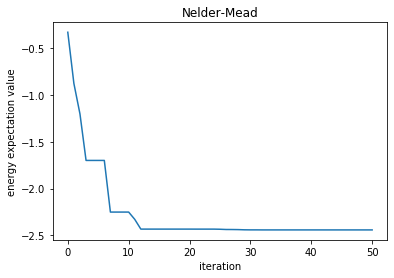

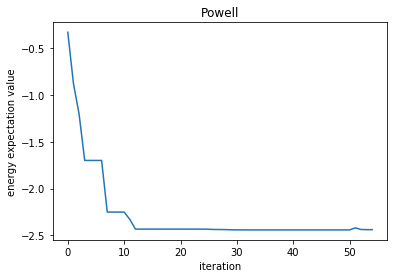

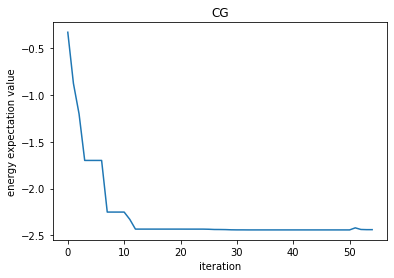

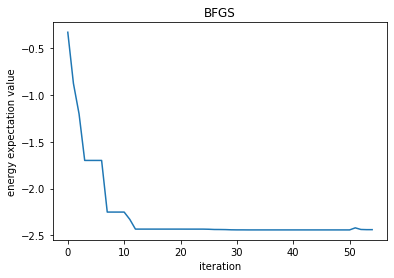

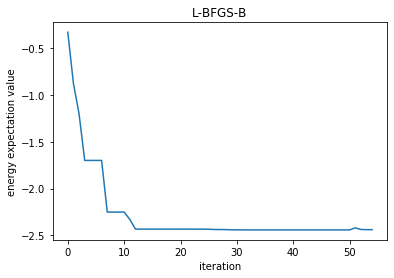

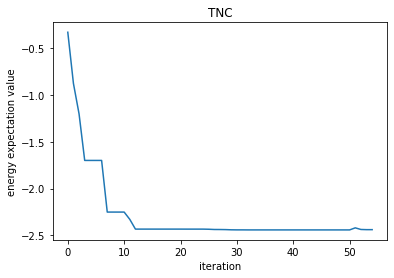

/usr/lib/python3.8/site-packages/scipy/optimize/_minimize.py:531: RuntimeWarning: Method COBYLA does not support callback.
  warn('Method %s does not support callback.' % method, RuntimeWarning)


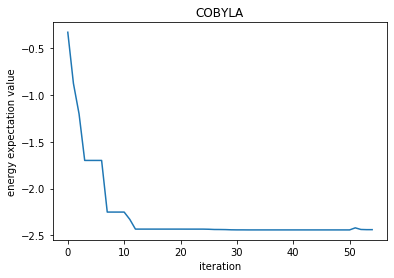

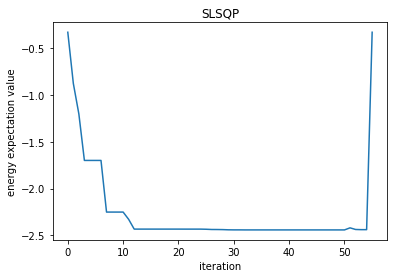

TypeError: callback() takes 1 positional argument but 2 were given

In [230]:
import scipy.optimize
from scipy.optimize import fmin_l_bfgs_b
import matplotlib.pyplot as plt
cost_val = [] #コスト関数の変化を保存するための関数

#この関数がiteration ごとに呼ばれる。
def callback(param):
    global cost_val
    cost_val.append(exp_value(param))
N=2
layers=1
init = param_tight(N,layers)
# init = [0.65328148+0.j, 0.27059805+0.j, 0.27059805+0.j, 0.65328148+0.j]
callback(init)
methods = ['Nelder-Mead','Powell','CG','BFGS','L-BFGS-B','TNC','COBYLA','SLSQP','trust-constr','dogleg','trust-ncg','trust-exact','trust-krylov','Newton-CG']
for i in range(len(methods)):
    method = methods[i]
    res = scipy.optimize.minimize(exp_value, init, method=method,jac=None, bounds=None, tol=None, callback=callback)
    plt.plot(cost_val)
    plt.xlabel("iteration")
    plt.ylabel("energy expectation value")
    plt.title(method)
    plt.show()
print(type(res))

# Lets try with some other Optimizers

In [652]:
# from qiskit.aqua.components.optimizers import COBYLA, NELDER_MEAD, SLSQP, SPSA, ADAM, CG, L_BFGS_B,TNC
optimizers = [SPSA,SPSA]
opt_energy = []
error  = []
opt_param = []
# optimizer = COBYLA(maxiter=10000, tol=0.001)
for i in range(len(optimizers)):
    optimizer = optimizers[i](max_trials=10,  save_steps=1)
#     optimizer = optimizers[i](maxiter=10000, tol=0.001)
    ret = optimizer.optimize(num_vars=len(param), objective_function=exp_value, initial_point=param)
    opt_param.append(repr(ret[0]))
    print("ret[0] =",ret[0])
    print("ret[1]=",ret[1])
    opt_energy.append(exp_value(ret[0]))
# Obtain the output distribution using the final parameters
    print("\nMinimal Energy:",opt_energy)
    print("\nParameters:",opt_param)

ret[0] = [5.51776228 5.5119684  0.42350786 1.70316958]
ret[1]= -2.08501

Minimal Energy: [-2.08501]

Parameters: ['array([5.51776228, 5.5119684 , 0.42350786, 1.70316958])']
ret[0] = [5.78845052 4.03998678 3.89925894 3.1378882 ]
ret[1]= -2.255146

Minimal Energy: [-2.08501, -2.255146]

Parameters: ['array([5.51776228, 5.5119684 , 0.42350786, 1.70316958])', 'array([5.78845052, 4.03998678, 3.89925894, 3.1378882 ])']


---

# Particle Swarm Optimization

In [1407]:
#------------------------------------------------------------------------------+
#
#	Nathan A. Rooy
#	Simple Particle Swarm Optimization (PSO) with Python
#	Last update: 2018-JAN-26
#	Python 3.6
#
#------------------------------------------------------------------------------+

#--- IMPORT DEPENDENCIES ------------------------------------------------------+

from __future__ import division
from random import random
from random import uniform

#--- MAIN ---------------------------------------------------------------------+

class Particle:
    def __init__(self,x0):
        self.position_i=[]          # particle position
        self.velocity_i=[]          # particle velocity
        self.pos_best_i=[]          # best position individual
        self.err_best_i=-1          # best error individual
        self.err_i=-1               # error individual

        for i in range(0,num_dimensions):
            self.velocity_i.append(uniform(-1,1))
            self.position_i.append(x0[i])

    # evaluate current fitness
    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)

        # check to see if the current position is an individual best
        if self.err_i<self.err_best_i or self.err_best_i==-1:
            self.pos_best_i=self.position_i.copy()
            self.err_best_i=self.err_i
                    
    # update new particle velocity
    def update_velocity(self,pos_best_g):
        w=0.5       # constant inertia weight (how much to weigh the previous velocity)
        c1=1        # cognative constant
        c2=2        # social constant
        
        for i in range(0,num_dimensions):
            r1=random()
            r2=random()
            
            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    # update the particle position based off new velocity updates
    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]
            
            # adjust maximum position if necessary
            if self.position_i[i]>bounds[i][1]:
                self.position_i[i]=bounds[i][1]

            # adjust minimum position if neseccary
            if self.position_i[i]<bounds[i][0]:
                self.position_i[i]=bounds[i][0]
        
        
def minimize_pso(costFunc, x0, bounds, num_particles, maxiter, verbose=False):
    global num_dimensions

    num_dimensions=len(x0)
    global err_best_g
    err_best_g=-1                    # best error for group
    global pos_best_g
    pos_best_g=[]                    # best position for group

    # establish the swarm
    swarm=[]
    for i in range(0,num_particles):
        swarm.append(Particle(x0))

    # begin optimization loop
    i=0
    while i<maxiter:
        if verbose: print(f'iter: {i:>4d}, best solution: {err_best_g:10.6f}')
            
        # cycle through particles in swarm and evaluate fitness
        for j in range(0,num_particles):
            swarm[j].evaluate(costFunc)

            # determine if current particle is the best (globally)
            if swarm[j].err_i<err_best_g or err_best_g==-1:
                pos_best_g=np.array(swarm[j].position_i)
                err_best_g=float(swarm[j].err_i)
        
        # cycle through swarm and update velocities and position
        for j in range(0,num_particles):
            swarm[j].update_velocity(pos_best_g)
            swarm[j].update_position(bounds)
        i+=1

    # print final results
    print('\nFINAL SOLUTION:')
    print(f'   > {pos_best_g}')
    print(f'   > {err_best_g}\n')

    pass

#--- END ----------------------------------------------------------------------+

In [646]:
N =2
layers = 1
init= param_tight(N,layers)

# the bounds
xmin = -np.ones(4*layers)*10
xmax = np.ones(4*layers)*10

# rewrite the bounds in the way required by PSO
bounds = [(low, high) for low, high in zip(xmin, xmax)]
# print(type(bounds))
res = minimize_pso(base_term,init,bounds=bounds,num_particles=1,maxiter=100,verbose=False)


FINAL SOLUTION:
   > [2.19513519 2.07719565 2.19834219 0.47279963]
   > -1.2546199999999998



In [343]:
res_pso = minimize_pso(exp_value,init,bounds=bounds,num_particles=10 ,maxiter=100,verbose=False)
print(pos_best_g)
print(err_best_g)
param0 = []
param0.append(pos_best_g)
print(param0[0])

[0.0011792882890312194, 3.6721257839519983, 0.017810924887329063, 4.73265233262717]
-2.5032760000000005
[0.0011792882890312194, 3.6721257839519983, 0.017810924887329063, 4.73265233262717]


# L-BFGS-B

In [667]:
from scipy.optimize import basinhopping
from scipy.optimize import minimize
# the starting point
N =2
layers = 1
x0 = param_tight(N,layers)

# the bounds
xmin = -np.ones(4*layers)*10
xmax = np.ones(4*layers)*10

# rewrite the bounds in the way required by L-BFGS-B
bounds = [(low, high) for low, high in zip(xmin, xmax)]

# use method L-BFGS-B because the problem is smooth and bounded
minimizer_kwargs = dict(method="L-BFGS-B", bounds=bounds)
res = basinhopping(base_term, x0, minimizer_kwargs=minimizer_kwargs)
print(res)

                        fun: -2.426828
 lowest_optimization_result:       fun: -2.426828
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([0., 0., 0., 0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 5
      nit: 0
   status: 0
  success: True
        x: array([-2.51630639, -0.07383686,  8.50187584,  4.89569907])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 505
                        nit: 100
                          x: array([-2.51630639, -0.07383686,  8.50187584,  4.89569907])


# Optimization excited states

In [ ]:
# the bounds
xmin = -np.ones(4*layers)*10
xmax = np.ones(4*layers)*10

# rewrite the bounds in the way required by L-BFGS-B
bounds = [(low, high) for low, high in zip(xmin, xmax)]

en_values = []
res_pso = minimize_pso(base_term,init,bounds=bounds,num_particles=10 ,maxiter=100,verbose=False)
theta = []
theta.append(pos_best_g)
en_values.append(err_best_g)
F = base_term(theta[0])
T = []
for i in range(k):
    def T_term(param):
        b = eval('b_h1j05_10d_k'+str(i))
        T[i] = b[i]*np.abs(np.dot(np.conjugate(psi(param).T),psi(theta[i])))**2
    F+=T[i]

In [ ]:
from scipy.optimize import minimize
from qiskit.aqua.components.optimizers import COBYLA, NELDER_MEAD, SLSQP, SPSA, ADAM, CG, L_BFGS_B,TNC
N=2
layers=10
param = param_tight(N,layers)

cost_val = []

def callback(param):
    global cost_val
    cost_val.append(exp_value(param))
    
# methods = ['Nelder-Mead','Powell','CG','BFGS','L-BFGS-B','TNC','COBYLA','SLSQP','trust-constr','dogleg','trust-ncg','trust-exact','trust-krylov','Newton-CG']
methods = ['Powell']
for i in range(len(methods)):
    method = methods[i]
    res = minimize(exp_value, param, args=(), method=method, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=callback, options=None)
    plt.plot(cost_val)
    plt.xlabel("iteration")
    plt.ylabel("energy expectation value")
    plt.title(method)
    plt.show()
# print(type(res))
# res.x
# exp_value(res.x)


#  <center> <font color ='#4d4d33' size="7"> Smooth Working!

In [1969]:
%%time
from scipy.optimize import basinhopping
from scipy.optimize import minimize
global N    # number of qubits
global K    # number of states to be evaluated (up to K-1 excited)
global layers
global x,xname

N=2
K=4

def psi(param):
    qc0  = circuit_PBC(N,param,layers)
    backend = Aer.get_backend('statevector_simulator')
    result = execute(qc0, backend).result()
    psi = result.get_statevector(qc0, decimals=3)
    return(psi)

def opt_param_callbacks(param):
    global opt_param
    opt_param.append(param)
opt_param = [] # initialization

def opt_energy_callbacks(x):
    global opt_energy
    opt_energy.append(x)
opt_energy = [] #initialization   

def base_term(param):
    energy = np.dot(np.conjugate(psi(param).T),np.dot(eval('H{}d_PBC({})'.format(N,1/h)),psi(param))).real
    return(energy)    

def extra_term(param):
    extra_term = np.dot(np.conjugate(psi(param).T),np.dot(eval('H{}d_PBC({})'.format(N,1/h)),psi(param))).real
#     epsilon = [10,3,2,2]
    b = np.array(eval('b_h{}j1_{}d_k{}'.format(h,N,p)))*2
    for k in range(len(b)):
        extra_term+=b[k]*np.abs(np.dot(np.conjugate(psi(param).T),psi(opt_param[k])))**2
    return extra_term

def error_callbacks(x):
    global error_calls
    state_th = eval('dict_h{}j1_{}d'.format(h,N))['{}'.format(p)]
    error =  1- np.abs(np.dot(np.conjugate(psi(x).T),state_th))**2
#     return(error)
    error_calls.append(error)
                                                     
optimizers = [SPSA,COBYLA]
# optimizer = optimizers[0](max_trials=100,  save_steps=1)
optimizer = optimizers[1](maxiter=100, tol=0.001)
method = ['SPSA','COBYLA']
minimizer_kwargs = dict(method="L-BFGS-B", bounds=bounds)
for layers in [10]:#                                              
    # the bounds
    xmin = -np.ones(4*layers)*np.pi*2
    xmax = np.ones(4*layers)*np.pi*2
    # rewrite the bounds in the way required by PSO
    bounds = [(low, high) for low, high in zip(xmin, xmax)]
#     for x in linspace(1,0,11):
#         if x == 1.0 or x == 0.0:
#             x_name = np.int(x)
#         else:
#             x_name = round(x, 2)
#             x_name = str(x_name).replace('.','')
    for h in [8,10,20]:
        opt_energy = []  
        opt_param = []
        error_calls = []          
        init = param_tight(N,layers)
        global p
        locals()['PSO_h{}j1_l{}_{}d_zero_PBC'.format(h,layers,N)] = []
        locals()['PSO_errors_h{}j1_l{}_{}d_zero_PBC'.format(h,layers,N)] = []
        for p in range(K):
            if p!=0:
                res_pso = minimize_pso(extra_term,init,bounds=bounds,num_particles=100 ,maxiter=100,verbose=False)
                opt_param_callbacks(pos_best_g)
                opt_energy_callbacks(err_best_g)
                error_callbacks(pos_best_g) 
#                 ret = basinhopping(extra_term, init, minimizer_kwargs=minimizer_kwargs)
#                 ret = optimizer.optimize(num_vars=len(init), objective_function=extra_term, initial_point=init)
#                 opt_param_callbacks(ret[0])
#                 opt_energy_callbacks(ret[1])
#                 error_callbacks(ret[0])    
#                 ret = scipy.optimize.minimize(extra_term,init,method=method[1],jac=None, bounds=bounds, tol=None, callback=None,options={'maxiter': 200})
#                 opt_param_callbacks(ret.x)
#                 opt_energy_callbacks(ret.fun)
#                 error_callbacks(ret.x)                                      
            else:
#                 print('k{}'.format(p))
#                 print('b_h05j{}_{}d_k{} = '.format(J,N,p))
                res_pso = minimize_pso(base_term,init,bounds=bounds,num_particles=100,maxiter=100,verbose=False)
                opt_param_callbacks(pos_best_g)
                opt_energy_callbacks(err_best_g)
                error_callbacks(pos_best_g) 
#                 ret = basinhopping(base_term, init, minimizer_kwargs=minimizer_kwargs)
#                 ret = optimizer.optimize(num_vars=len(init), objective_function=base_term, initial_point=init)  
#                 opt_param_callbacks(ret[0])
#                 opt_energy_callbacks(ret[1])
#                 error_callbacks(ret[0])    
#                 ret = scipy.optimize.minimize(base_term,init,method=method[1],jac=None, bounds=bounds, tol=None, callback=None,options={'maxiter': 200})
#                 opt_param_callbacks(ret.x)
#                 opt_energy_callbacks(ret.fun)
#                 error_callbacks(ret.x) 
            if p==K-1:
                    print("PSO_h{}j1_l{}_{}d_zero_PBC = np.array({})".format(h,layers,N,opt_energy))
                    print("PSO_errors_h{}j1_l{}_{}d_zero_PBC = np.array({})".format(h,layers,N,error_calls))
        print("PSO_param_h{}j1_l{}_{}d_zero_PBC = {} ".format(h,layers,N,opt_param))


FINAL SOLUTION:
   > [ 1.1127857   5.78393505  5.20616249  0.69548994  4.97119565  3.38780145
  4.52805163  2.73282312  4.23807622  0.83993957  1.34002381 -0.12009444
  1.76250996  3.31072481  0.6379623   3.67682763  5.25871824  3.02636154
  5.68038966  3.56136471  0.94130325  2.20513518  3.79813202  3.31883211
  2.05046341  5.3751745   4.16508102  6.02072493  3.19546791  2.36649813
  1.47805086 -0.08998608  2.03905219  5.7675001   4.61549803  6.28318531
  2.88491828  4.9701753   4.06764209  5.15393272]
   > -2.0191950000000003


FINAL SOLUTION:
   > [0.66426229 6.24302994 4.36398348 0.6730836  4.48016151 3.69558698
 4.31945236 1.88925323 4.12274706 1.02732664 2.28882271 1.61287216
 1.63644597 2.67154341 0.54636335 2.83033268 5.21838922 4.26464052
 4.7775941  4.16779547 2.45430466 3.4063713  2.78527721 2.47058143
 1.90719371 5.33240784 3.69420639 6.09842561 2.73896875 2.08344307
 1.80109581 0.90347861 2.36550875 6.26656266 4.72820991 5.89334296
 2.06593292 3.97025516 4.3173518  4.5175


FINAL SOLUTION:
   > [0.85607057 6.28318531 5.17530342 0.59205885 5.36298924 4.27291373
 3.61691287 1.89159374 4.14926074 0.35620405 1.25685098 0.85761608
 1.40413197 2.77683057 0.73292838 3.99895805 4.43452852 2.46885954
 5.86712524 3.64744764 1.53100513 1.43204822 2.63764088 2.49680272
 3.30633172 5.4765867  3.57632311 6.06611582 4.23529755 2.57858163
 1.76604355 0.55222574 2.06186526 6.03263196 5.11724664 6.28318531
 3.30581588 4.36000503 4.30152122 4.94008925]
   > -2.0060661


FINAL SOLUTION:
   > [ 1.32347466  5.9353041   5.39887918  0.94576502  4.50454448  3.46482822
  3.73182445  1.8869769   4.13833581 -0.01550783  1.34239234  0.68814216
  1.91497145  3.10391804  0.62650856  3.45843027  4.67355208  2.71661868
  4.7760463   4.18548318  1.10612789  1.73889711  3.44261677  1.2585195
  1.75360514  5.4507936   3.94198282  5.25468405  3.02817581  1.92499748
  2.1478403   1.11282052  1.95976058  5.24811034  5.24384113  5.80725151
  2.59910952  4.3776342   3.48665196  5.3752192 ]
   >

In [1618]:
h=1
j=1
n=4
p = 1
a = array([ 1.63039375e+00,  6.53818578e+00,  4.86634119e+00,  8.84757039e-01,
        4.51725291e+00,  3.64684091e+00,  3.90392798e+00,  2.05629898e+00,
        4.60967188e+00,  5.90265557e-01,  1.33363655e+00,  7.93927103e-01,
        1.68174003e+00,  3.20378127e+00, -1.82045887e-01,  4.05887930e+00,
        5.39564467e+00,  3.26471088e+00,  5.29951546e+00,  3.27921241e+00,
        1.55422577e+00,  2.55223752e+00,  3.36384314e+00,  2.60400630e+00,
        2.56804449e+00,  5.79314005e+00,  4.33818140e+00,  5.75038120e+00,
        3.23414391e+00,  1.86002797e+00,  2.32320667e+00,  2.80505806e-03,
        1.44526197e+00,  5.98972293e+00,  5.49936435e+00,  5.86561224e+00,
        2.42208627e+00,  4.39699833e+00,  3.80086439e+00,  4.43248570e+00,
        2.29363255e+00,  3.54792029e+00,  4.68610693e+00,  4.74388204e+00,
        4.16142988e+00,  3.88173974e+00,  1.64352359e+00, -1.58548581e-01,
        5.76068165e+00,  3.03622148e+00,  2.04621804e+00,  1.47522913e+00,
        4.11625887e+00,  5.05921522e+00,  1.35027057e+00,  2.45042704e+00,
        4.04679364e-01,  5.02975637e+00,  1.15330939e-01,  3.37561363e+00,
        2.96074649e+00,  3.67870656e+00,  3.83718844e+00,  1.77865034e+00,
        6.32319455e+00,  4.71465663e+00,  5.13127103e+00,  4.52257006e+00,
        2.41346389e+00,  3.23105411e+00,  3.53158923e+00, -9.38530337e-02,
        1.98050279e+00,  4.84200962e+00,  2.85308828e+00, -2.77353702e-01,
        5.25493059e+00,  5.47217042e+00,  4.51686982e-01,  3.53268420e+00])
print(psi(a))
state_th = eval('dict_h{}j{}_{}d'.format(h,J,n))['{}'.format(p)]
er = 1-np.abs(np.dot(np.conjugate(psi(a).T),state_th))**2
print(state_th)
print(er)

[0.105-0.463j 0.066-0.051j 0.066-0.051j 0.143-0.1j   0.066-0.051j
 0.149+0.049j 0.143-0.1j   0.198+0.202j 0.066-0.051j 0.143-0.1j
 0.149+0.049j 0.198+0.202j 0.143-0.1j   0.198+0.202j 0.198+0.202j
 0.167+0.478j]
[ 9.19792869e-17+0.j -1.35299025e-01+0.j  1.35299025e-01+0.j
  2.86630163e-16+0.j -1.35299025e-01+0.j  6.53281482e-01+0.j
 -4.38888691e-17+0.j -1.35299025e-01+0.j  1.35299025e-01+0.j
  2.79637059e-16+0.j -6.53281482e-01+0.j  1.35299025e-01+0.j
  2.21686453e-16+0.j -1.35299025e-01+0.j  1.35299025e-01+0.j
  6.62264784e-17+0.j]
1.0


---
---
---

# L_BFGS_B

## epsilon = 1 | layers = 1-20

In [ ]:
# 1
L_BFGS_B_h1j1_l1_2d_zero_PBC = np.array([-1.826916, -1.259502613011852, 1.7393988846539872, 2.1516385723910445])
L_BFGS_B_param_h1j1_l1_2d_zero_PBC = array([0.88234815, 4.09604082, 6.1300736 , 1.90215974]) 

L_BFGS_B_h2j1_l1_2d_zero_PBC = np.array([-1.966729, -0.6545730166727046, 1.0591498991414434, 1.7724588336163378])
L_BFGS_B_param_h2j1_l1_2d_zero_PBC = array([1.16614592, 5.41595219, 6.02860902, 1.23545327]) 

L_BFGS_B_h4j1_l1_2d_zero_PBC = np.array([-1.9732085000000001, -0.36682281504309167, 0.5714392219364329, 1.5739627753494845])
L_BFGS_B_param_h4j1_l1_2d_zero_PBC = array([2.2769968 , 2.23640722, 6.28318531, 1.32458033]) 

L_BFGS_B_h8j1_l1_2d_zero_PBC = np.array([-1.809796, -0.4640882283759178, 0.3283805455879447, 1.6148708390981519])
L_BFGS_B_param_h8j1_l1_2d_zero_PBC = array([1.42491411, 4.0906738 , 6.28318531, 2.89716368]) 

L_BFGS_B_h10j1_l1_2d_zero_PBC = np.array([-1.8148688, -0.44945195713660324, 0.1921257334902169, 1.6061324509616177])
L_BFGS_B_param_h10j1_l1_2d_zero_PBC = array([ 2.1240492 , -0.16810897,  6.28318531,  2.72016606]) 

L_BFGS_B_h20j1_l1_2d_zero_PBC = np.array([-1.8250144, -0.4408118846998945, 0.056549567630599706, 1.3567272675820978])
L_BFGS_B_param_h20j1_l1_2d_zero_PBC = array([1.55509329, 2.91071679, 5.99039332, 1.64421346]) 
L_BFGS_B_l1_time = [192]# 9min 12s

L_BFGS_B_h1j1_l2_2d_zero_PBC = np.array([-2.355972, -1.7325138083448663, 2.2916956587689263, 2.9661419728891154])
L_BFGS_B_param_h1j1_l2_2d_zero_PBC = array([-0.26111136,  5.8858054 ,  1.16540705,  2.29703656,  5.1791942 ,
        3.82902131,  1.4473877 ,  1.31075948]) 
L_BFGS_B_h2j1_l2_2d_zero_PBC = np.array([-1.5426909999999998, -1.0405451126229261, 1.3240264847028265, 2.372572678774101])
L_BFGS_B_param_h2j1_l2_2d_zero_PBC = array([-0.63840589,  6.17504508,  2.56960485,  0.65932691,  4.91978326,
        3.30082414,  0.70034039, -1.55690211]) 
L_BFGS_B_h4j1_l2_2d_zero_PBC = np.array([-1.954895, -0.6065852263610314, 0.6703729236249703, 1.7231297234651275])
L_BFGS_B_param_h4j1_l2_2d_zero_PBC = array([-0.21540427,  6.04257412,  1.28416593,  1.7079125 ,  6.16407073,
        2.73791993,  2.06893275,  1.28232621]) 
L_BFGS_B_h8j1_l2_2d_zero_PBC = np.array([-1.88683925, -0.5178195544979197, 0.13287072604157552, 1.456064433443937])
L_BFGS_B_param_h8j1_l2_2d_zero_PBC = array([0.48600922, 5.83752412, 3.07534299, 1.90179517, 5.9275219 ,
       3.35587242, 2.81404392, 0.24152093]) 
L_BFGS_B_h10j1_l2_2d_zero_PBC = np.array([-1.8833505999999998, -0.49809751859746765, 0.021750267205415952, 1.4200985154412256])
L_BFGS_B_param_h10j1_l2_2d_zero_PBC = array([-1.58019787,  5.24512313,  1.30563664,  1.98432533,  4.31627263,
        2.17186373,  3.01066188, -0.33824204]) 
L_BFGS_B_h20j1_l2_2d_zero_PBC = np.array([-1.7975055, -0.46685355180468124, -0.25905040048647043, 1.3220801065573076])
L_BFGS_B_param_h20j1_l2_2d_zero_PBC = array([-1.58019787,  5.24512313,  1.30563664,  1.98432533,  4.31627263,        2.17186373,  3.01066188, -0.33824204])

L_BFGS_B_h1j1_l5_2d_zero_PBC = np.array([-2.6762599999999996, -1.8082550091146368, 2.0867516883195467, 2.7842993230247273])
L_BFGS_B_param_h1j1_l5_2d_zero_PBC = array([-0.03245341,  6.05727801,  5.70670728,  0.4855633 ,  6.28318531,        2.46018024,  3.84338852,  3.20615555,  3.91515278, -2.51642867,        3.03791561,  1.9530353 ,  2.51622969,  2.52059858, -1.81189877,        2.98054696,  6.21071164,  3.56823446,  5.23471966,  4.86877181]) 

L_BFGS_B_h2j1_l5_2d_zero_PBC = np.array([-2.21363, -0.7702870314733579, 1.2147995412770485, 2.005664616080616])
L_BFGS_B_param_h2j1_l5_2d_zero_PBC = array([-0.89495707,  6.28318531,  5.26931992, -0.52656484,  6.28318531,        2.44829514,  3.04346511,  4.79820346,  2.51407041, -2.13592441,        3.21343933,  2.82456369,  2.82868334,  2.34806389, -1.78283836,        2.70319853,  6.28318531,  4.00506988,  5.78227488,  5.69114831]) 

L_BFGS_B_h4j1_l5_2d_zero_PBC = np.array([-2.0280430000000003, -0.3976982828625175, 0.5816057799527666, 1.6628766143311848])
L_BFGS_B_param_h4j1_l5_2d_zero_PBC = array([-2.94549447,  5.20230782,  6.17991323,  0.45460973,  5.48404957,        2.55031259,  5.19954359,  6.27852047,  3.83917742, -1.65992067,        2.69085392,  3.25840526,  3.66507632,  1.77857325, -2.89257033,        2.8898473 ,  5.55624072,  1.97746098,  3.32519494,  6.04855922]) 

L_BFGS_B_h8j1_l5_2d_zero_PBC = np.array([-1.9352495000000003, -0.23341006395642405, 0.2911062697063581, 1.5028894469683172])
L_BFGS_B_param_h8j1_l5_2d_zero_PBC = array([ 0.77643701,  6.22451359,  5.70410169,  0.19160874,  6.28318531,        3.57780717,  3.76220457,  3.62568967,  4.89158393, -1.23596986,        4.1974207 ,  1.85208909,  2.94305202,  2.06345145, -2.04144016,        3.9183177 ,  6.28318531,  3.2462304 ,  4.42355432,  4.91514232]) 

L_BFGS_B_h10j1_l5_2d_zero_PBC = np.array([-1.9166908, -0.20652703073928302, 0.17901112660831986, 1.4579710033971136])
L_BFGS_B_param_h10j1_l5_2d_zero_PBC = array([ 0.77643701,  6.22451359,  5.70410169,  0.19160874,  6.28318531,        3.57780717,  3.76220457,  3.62568967,  4.89158393, -1.23596986,        4.1974207 ,  1.85208909,  2.94305202,  2.06345145, -2.04144016,        3.9183177 ,  6.28318531,  3.2462304 ,  4.42355432,  4.91514232]) 

L_BFGS_B_h20j1_l5_2d_zero_PBC = np.array([-1.8795734000000002, -0.12239455436531577, 0.0485258910171443, 1.370284756276872])
L_BFGS_B_param_h20j1_l5_2d_zero_PBC = array([ 0.77643701,  6.22451359,  5.70410169,  0.19160874,  6.28318531,        3.57780717,  3.76220457,  3.62568967,  4.89158393, -1.23596986,        4.1974207 ,  1.85208909,  2.94305202,  2.06345145, -2.04144016,        3.9183177 ,  6.28318531,  3.2462304 ,  4.42355432,  4.91514232])

---
---
---

## SPSA epsilon = 2 | layers = [1,2,5,10,20] | maxiter = 100 

In [1729]:
# 2
SPSA_h1j1_l1_2d_zero_PBC = np.array([-1.9998619999999998, -0.30746485002144786, 1.9557877420896226, 5.235112677657902])
SPSA_param_h1j1_l1_2d_zero_PBC = array([-0.44854599,  2.91620267,  5.69092987,  0.17323013]) 

SPSA_h2j1_l1_2d_zero_PBC = np.array([0.5028269999999999, 1.4193337088153217, 3.7326217214313635, 6.519197416652926])
SPSA_param_h2j1_l1_2d_zero_PBC = array([0.06622947, 3.21217461, 5.65577085, 0.01055522]) 

SPSA_h4j1_l1_2d_zero_PBC = np.array([0.2377815, 1.175189007133823, 2.4269254803823155, 5.676937001567322])
SPSA_param_h4j1_l1_2d_zero_PBC = array([0.07362019, 3.21728901, 5.65242607, 0.01693198]) 

SPSA_h8j1_l1_2d_zero_PBC = np.array([-0.011953000000000016, 1.0526860116080308, 1.6551697369178342, 5.216681378814288])
SPSA_param_h8j1_l1_2d_zero_PBC = array([0.04527606, 3.18155991, 5.66598373, 0.02236803]) 

SPSA_h10j1_l1_2d_zero_PBC = np.array([-0.11445259999999996, 1.029844686033869, 1.4126560787602487, 4.773485070280404])
SPSA_param_h10j1_l1_2d_zero_PBC = array([-0.0832942 ,  2.98779469,  5.61061356,  0.03049636]) 

SPSA_h20j1_l1_2d_zero_PBC = np.array([-0.6203937999999999, 0.9809598297624738, 1.1824685494446066, 3.8687743977505598])
SPSA_param_h20j1_l1_2d_zero_PBC = array([ 0.03215069,  2.2513858 ,  5.22173922, -0.28740384]) 

SPSA_h1j1_l2_2d_zero_PBC = np.array([-2.766852, -0.3611104846242761, 8.566056619429071, 16.078283509662715])
SPSA_param_h1j1_l2_2d_zero_PBC = array([4.65172583, 4.11777806, 3.8571747 , 1.6373267 , 1.19112069,       5.47780853, 4.48159744, 2.20845087]) 

SPSA_h2j1_l2_2d_zero_PBC = np.array([-0.5407850000000001, 1.0404995494377007, 7.170920200067098, 13.074500461450906])
SPSA_param_h2j1_l2_2d_zero_PBC = array([4.66944223, 4.12366876, 3.87115665, 1.663875  , 1.18025686,       5.4643666 , 4.48146996, 2.1840136 ]) 

SPSA_h4j1_l2_2d_zero_PBC = np.array([-0.47443899999999983, 1.4996253689540735, 4.565944602228073, 12.018395475663446])
SPSA_param_h4j1_l2_2d_zero_PBC = array([4.66948776, 4.12364344, 3.8712037 , 1.6640203 , 1.18020247,       5.46433572, 4.48141921, 2.1839286 ]) 

SPSA_h8j1_l2_2d_zero_PBC = np.array([-0.45174749999999997, 1.7802217409584766, 3.3133813575954756, 11.739469878748896])
SPSA_param_h8j1_l2_2d_zero_PBC = array([4.66948927, 4.12364364, 3.87120436, 1.66402357, 1.18020229,       5.46433404, 4.48141824, 2.18392776]) 

SPSA_h10j1_l2_2d_zero_PBC = np.array([-0.4472091999999999, 1.840902589826216, 3.067430283135816, 11.70546710441885])
SPSA_param_h10j1_l2_2d_zero_PBC = array([4.66948938, 4.1236436 , 3.87120437, 1.66402378, 1.18020219,       5.46433398, 4.48141826, 2.1839277 ]) 

SPSA_h20j1_l2_2d_zero_PBC = np.array([-0.4381326, 1.9669441610950549, 2.580208007749855, 11.659808800300768])
SPSA_param_h20j1_l2_2d_zero_PBC = array([4.66948938, 4.1236436 , 3.87120437, 1.66402379, 1.18020219,       5.46433398, 4.48141826, 2.18392769]) 

SPSA_h1j1_l5_2d_zero_PBC = np.array([-2.3042540000000002, -0.6491588625523046, 15.333853648823688, 20.299139061166784])
SPSA_param_h1j1_l5_2d_zero_PBC = array([2.68945291, 4.33816966, 1.8232351 , 0.53180968, 0.31130342,       0.24463516, 0.37597956, 5.40521922, 1.13257906, 0.4093923 ,       6.04342595, 2.84562959, 0.35933037, 6.16463214, 3.08998701,       2.1187199 , 3.08322292, 5.65523793, 2.25391056, 2.26369457]) 

SPSA_h2j1_l5_2d_zero_PBC = np.array([-1.642523, 0.8269882436612914, 8.818494499349287, 16.227028230333183])
SPSA_param_h2j1_l5_2d_zero_PBC = array([2.68945291, 4.33816966, 1.8232351 , 0.53180968, 0.31130342,       0.24463516, 0.37597956, 5.40521922, 1.13257906, 0.4093923 ,       6.04342595, 2.84562959, 0.35933037, 6.16463214, 3.08998701,       2.1187199 , 3.08322292, 5.65523793, 2.25391056, 2.26369457]) 

SPSA_h4j1_l5_2d_zero_PBC = np.array([-1.3116575, 1.808132268037237, 5.803885395881235, 15.163254699992956])
SPSA_param_h4j1_l5_2d_zero_PBC = array([2.68945291, 4.33816966, 1.8232351 , 0.53180968, 0.31130342,       0.24463516, 0.37597956, 5.40521922, 1.13257906, 0.4093923 ,       6.04342595, 2.84562959, 0.35933037, 6.16463214, 3.08998701,       2.1187199 , 3.08322292, 5.65523793, 2.25391056, 2.26369457]) 

SPSA_h8j1_l5_2d_zero_PBC = np.array([-1.14622475, 2.381155060925554, 4.379031624847554, 14.96117105762423])
SPSA_param_h8j1_l5_2d_zero_PBC = array([2.68945291, 4.33816966, 1.8232351 , 0.53180968, 0.31130342,       0.24463516, 0.37597956, 5.40521922, 1.13257906, 0.4093923 ,       6.04342595, 2.84562959, 0.35933037, 6.16463214, 3.08998701,       2.1187199 , 3.08322292, 5.65523793, 2.25391056, 2.26369457]) 

SPSA_h10j1_l5_2d_zero_PBC = np.array([-1.1131382000000003, 2.502968681969294, 4.101269933106894, 14.949590579014778])
SPSA_param_h10j1_l5_2d_zero_PBC = array([2.68945291, 4.33816966, 1.8232351 , 0.53180968, 0.31130342,       0.24463516, 0.37597956, 5.40521922, 1.13257906, 0.4093923 ,       6.04342595, 2.84562959, 0.35933037, 6.16463214, 3.08998701,       2.1187199 , 3.08322292, 5.65523793, 2.25391056, 2.26369457]) 

SPSA_h20j1_l5_2d_zero_PBC = np.array([-1.0469651, 2.7539919450754913, 3.5531425706442916, 14.956013705870756])
SPSA_param_h20j1_l5_2d_zero_PBC = array([2.68945291, 4.33816966, 1.8232351 , 0.53180968, 0.31130342,       0.24463516, 0.37597956, 5.40521922, 1.13257906, 0.4093923 ,       6.04342595, 2.84562959, 0.35933037, 6.16463214, 3.08998701,       2.1187199 , 3.08322292, 5.65523793, 2.25391056, 2.26369457]) 

SPSA_h1j1_l10_2d_zero_PBC = np.array([-0.325508, 1.3304251665779816, 17.321530403121976, 22.28932990285593])
SPSA_param_h1j1_l10_2d_zero_PBC = array([2.6855916 , 6.15622786, 3.5800341 , 2.87827601, 4.37217455,       4.16667291, 0.3438953 , 2.7105231 , 3.52397838, 5.33791853,       5.59805104, 4.59738286, 1.87113319, 3.1895078 , 6.04083071,       2.81235963, 0.18031707, 6.15799168, 2.05791861, 5.05767764,       5.62688375, 0.07629085, 5.81944246, 1.98050428, 1.59663041,       1.74999133, 2.82326863, 0.14184885, 1.39286722, 0.68685645,       5.07760667, 1.49233889, 1.41929729, 2.02628891, 3.88076546,       0.79695993, 4.45089838, 3.70992568, 1.04293187, 5.54238543]) 

SPSA_h2j1_l10_2d_zero_PBC = np.array([-0.532422, 1.9383396384651506, 9.933892256737147, 17.346177172132617])
SPSA_param_h2j1_l10_2d_zero_PBC = array([2.6855916 , 6.15622786, 3.5800341 , 2.87827601, 4.37217455,       4.16667291, 0.3438953 , 2.7105231 , 3.52397838, 5.33791853,       5.59805104, 4.59738286, 1.87113319, 3.1895078 , 6.04083071,       2.81235963, 0.18031707, 6.15799168, 2.05791861, 5.05767764,       5.62688375, 0.07629085, 5.81944246, 1.98050428, 1.59663041,       1.74999133, 2.82326863, 0.14184885, 1.39286722, 0.68685645,       5.07760667, 1.49233889, 1.41929729, 2.02628891, 3.88076546,       0.79695993, 4.45089838, 3.70992568, 1.04293187, 5.54238543]) 

SPSA_h4j1_l10_2d_zero_PBC = np.array([-0.6358790000000001, 2.4854904202559096, 6.483266729391908, 15.847374990159649])
SPSA_param_h4j1_l10_2d_zero_PBC = array([2.6855916 , 6.15622786, 3.5800341 , 2.87827601, 4.37217455,       4.16667291, 0.3438953 , 2.7105231 , 3.52397838, 5.33791853,       5.59805104, 4.59738286, 1.87113319, 3.1895078 , 6.04083071,       2.81235963, 0.18031707, 6.15799168, 2.05791861, 5.05767764,       5.62688375, 0.07629085, 5.81944246, 1.98050428, 1.59663041,       1.74999133, 2.82326863, 0.14184885, 1.39286722, 0.68685645,       5.07760667, 1.49233889, 1.41929729, 2.02628891, 3.88076546,       0.79695993, 4.45089838, 3.70992568, 1.04293187, 5.54238543]) 

SPSA_h8j1_l10_2d_zero_PBC = np.array([-0.6876075, 2.84155833939501, 4.840446493963009, 15.42794401214805])
SPSA_param_h8j1_l10_2d_zero_PBC = array([2.6855916 , 6.15622786, 3.5800341 , 2.87827601, 4.37217455,       4.16667291, 0.3438953 , 2.7105231 , 3.52397838, 5.33791853,       5.59805104, 4.59738286, 1.87113319, 3.1895078 , 6.04083071,       2.81235963, 0.18031707, 6.15799168, 2.05791861, 5.05767764,       5.62688375, 0.07629085, 5.81944246, 1.98050428, 1.59663041,       1.74999133, 2.82326863, 0.14184885, 1.39286722, 0.68685645,       5.07760667, 1.49233889, 1.41929729, 2.02628891, 3.88076546,       0.79695993, 4.45089838, 3.70992568, 1.04293187, 5.54238543]) 

SPSA_h10j1_l10_2d_zero_PBC = np.array([-0.6979532, 2.9199846358744526, 4.519095159528852, 15.37290866715221])
SPSA_param_h10j1_l10_2d_zero_PBC = array([2.6855916 , 6.15622786, 3.5800341 , 2.87827601, 4.37217455,       4.16667291, 0.3438953 , 2.7105231 , 3.52397838, 5.33791853,       5.59805104, 4.59738286, 1.87113319, 3.1895078 , 6.04083071,       2.81235963, 0.18031707, 6.15799168, 2.05791861, 5.05767764,       5.62688375, 0.07629085, 5.81944246, 1.98050428, 1.59663041,       1.74999133, 2.82326863, 0.14184885, 1.39286722, 0.68685645,       5.07760667, 1.49233889, 1.41929729, 2.02628891, 3.88076546,       0.79695993, 4.45089838, 3.70992568, 1.04293187, 5.54238543]) 

SPSA_h20j1_l10_2d_zero_PBC = np.array([-0.7186446, 3.084236994700869, 3.8837922565280696, 15.292437040630668])
SPSA_param_h20j1_l10_2d_zero_PBC = array([2.6855916 , 6.15622786, 3.5800341 , 2.87827601, 4.37217455,       4.16667291, 0.3438953 , 2.7105231 , 3.52397838, 5.33791853,       5.59805104, 4.59738286, 1.87113319, 3.1895078 , 6.04083071,       2.81235963, 0.18031707, 6.15799168, 2.05791861, 5.05767764,       5.62688375, 0.07629085, 5.81944246, 1.98050428, 1.59663041,       1.74999133, 2.82326863, 0.14184885, 1.39286722, 0.68685645,       5.07760667, 1.49233889, 1.41929729, 2.02628891, 3.88076546,       0.79695993, 4.45089838, 3.70992568, 1.04293187, 5.54238543]) 

SPSA_h1j1_l20_2d_zero_PBC = np.array([-1.2480800000000003, 0.409384027950646, 16.41527256964664, 21.387664653498586])
SPSA_param_h1j1_l20_2d_zero_PBC = array([4.00049065, 0.76134592, 5.72455021, 4.24463969, 5.14075878,       6.2082854 , 3.28293994, 1.89351861, 2.8556768 , 3.60725948,       3.51426681, 4.8632493 , 5.54294951, 1.98718886, 4.03038991,       5.10351293, 5.79652638, 4.90896765, 2.83762742, 0.23473682,       5.85663667, 4.42261727, 5.97126163, 5.19043252, 3.77059773,       5.13232383, 4.76629795, 4.62529268, 4.90248065, 2.97150186,       5.05502954, 5.8251209 , 0.75978158, 3.56603349, 3.04344587,       0.80971586, 1.45436072, 0.73555014, 0.80011227, 2.89205996,       1.35260034, 5.88011445, 5.87447013, 0.59155238, 2.75147296,       3.17730975, 5.44503642, 2.11581533, 2.43999333, 0.09841096,       4.1554519 , 1.25517317, 0.01730318, 5.4575117 , 3.35886813,       2.28044993, 2.25481073, 1.94300625, 0.85640265, 6.19882055,       1.32359279, 4.7265016 , 4.30787499, 6.17748179, 6.00908178,       1.98362383, 2.84680585, 1.72575234, 5.25440672, 3.4836495 ,       2.7614637 , 0.59473814, 3.81804972, 3.0812844 , 5.50783252,       1.48287503, 1.53573729, 0.65844905, 5.29367119, 5.16126923]) 

SPSA_h2j1_l20_2d_zero_PBC = np.array([-0.84788, 1.62516578472765, 9.628110055575647, 17.047247409758615])
SPSA_param_h2j1_l20_2d_zero_PBC = array([4.00049065, 0.76134592, 5.72455021, 4.24463969, 5.14075878,       6.2082854 , 3.28293994, 1.89351861, 2.8556768 , 3.60725948,       3.51426681, 4.8632493 , 5.54294951, 1.98718886, 4.03038991,       5.10351293, 5.79652638, 4.90896765, 2.83762742, 0.23473682,       5.85663667, 4.42261727, 5.97126163, 5.19043252, 3.77059773,       5.13232383, 4.76629795, 4.62529268, 4.90248065, 2.97150186,       5.05502954, 5.8251209 , 0.75978158, 3.56603349, 3.04344587,       0.80971586, 1.45436072, 0.73555014, 0.80011227, 2.89205996,       1.35260034, 5.88011445, 5.87447013, 0.59155238, 2.75147296,       3.17730975, 5.44503642, 2.11581533, 2.43999333, 0.09841096,       4.1554519 , 1.25517317, 0.01730318, 5.4575117 , 3.35886813,       2.28044993, 2.25481073, 1.94300625, 0.85640265, 6.19882055,       1.32359279, 4.7265016 , 4.30787499, 6.17748179, 6.00908178,       1.98362383, 2.84680585, 1.72575234, 5.25440672, 3.4836495 ,       2.7614637 , 0.59473814, 3.81804972, 3.0812844 , 5.50783252,       1.48287503, 1.53573729, 0.65844905, 5.29367119, 5.16126923]) 

SPSA_h4j1_l20_2d_zero_PBC = np.array([-0.64778, 2.476475034223749, 6.477947169647747, 15.850712272319006])
SPSA_param_h4j1_l20_2d_zero_PBC = array([4.00049065, 0.76134592, 5.72455021, 4.24463969, 5.14075878,       6.2082854 , 3.28293994, 1.89351861, 2.8556768 , 3.60725948,       3.51426681, 4.8632493 , 5.54294951, 1.98718886, 4.03038991,       5.10351293, 5.79652638, 4.90896765, 2.83762742, 0.23473682,       5.85663667, 4.42261727, 5.97126163, 5.19043252, 3.77059773,       5.13232383, 4.76629795, 4.62529268, 4.90248065, 2.97150186,       5.05502954, 5.8251209 , 0.75978158, 3.56603349, 3.04344587,       0.80971586, 1.45436072, 0.73555014, 0.80011227, 2.89205996,       1.35260034, 5.88011445, 5.87447013, 0.59155238, 2.75147296,       3.17730975, 5.44503642, 2.11581533, 2.43999333, 0.09841096,       4.1554519 , 1.25517317, 0.01730318, 5.4575117 , 3.35886813,       2.28044993, 2.25481073, 1.94300625, 0.85640265, 6.19882055,       1.32359279, 4.7265016 , 4.30787499, 6.17748179, 6.00908178,       1.98362383, 2.84680585, 1.72575234, 5.25440672, 3.4836495 ,       2.7614637 , 0.59473814, 3.81804972, 3.0812844 , 5.50783252,       1.48287503, 1.53573729, 0.65844905, 5.29367119, 5.16126923]) 

SPSA_h8j1_l20_2d_zero_PBC = np.array([-0.54773, 2.9846984491248585, 4.9854345168368575, 15.582719864211446])
SPSA_param_h8j1_l20_2d_zero_PBC = array([4.00049065, 0.76134592, 5.72455021, 4.24463969, 5.14075878,       6.2082854 , 3.28293994, 1.89351861, 2.8556768 , 3.60725948,       3.51426681, 4.8632493 , 5.54294951, 1.98718886, 4.03038991,       5.10351293, 5.79652638, 4.90896765, 2.83762742, 0.23473682,       5.85663667, 4.42261727, 5.97126163, 5.19043252, 3.77059773,       5.13232383, 4.76629795, 4.62529268, 4.90248065, 2.97150186,       5.05502954, 5.8251209 , 0.75978158, 3.56603349, 3.04344587,       0.80971586, 1.45436072, 0.73555014, 0.80011227, 2.89205996,       1.35260034, 5.88011445, 5.87447013, 0.59155238, 2.75147296,       3.17730975, 5.44503642, 2.11581533, 2.43999333, 0.09841096,       4.1554519 , 1.25517317, 0.01730318, 5.4575117 , 3.35886813,       2.28044993, 2.25481073, 1.94300625, 0.85640265, 6.19882055,       1.32359279, 4.7265016 , 4.30787499, 6.17748179, 6.00908178,       1.98362383, 2.84680585, 1.72575234, 5.25440672, 3.4836495 ,       2.7614637 , 0.59473814, 3.81804972, 3.0812844 , 5.50783252,       1.48287503, 1.53573729, 0.65844905, 5.29367119, 5.16126923])

SPSA_h10j1_l20_2d_zero_PBC = np.array([-0.52772, 3.0935625126968196, 4.69415136686642, 15.557998904956877])
SPSA_param_h10j1_l20_2d_zero_PBC = array([4.00049065, 0.76134592, 5.72455021, 4.24463969, 5.14075878,       6.2082854 , 3.28293994, 1.89351861, 2.8556768 , 3.60725948,       3.51426681, 4.8632493 , 5.54294951, 1.98718886, 4.03038991,       5.10351293, 5.79652638, 4.90896765, 2.83762742, 0.23473682,       5.85663667, 4.42261727, 5.97126163, 5.19043252, 3.77059773,       5.13232383, 4.76629795, 4.62529268, 4.90248065, 2.97150186,       5.05502954, 5.8251209 , 0.75978158, 3.56603349, 3.04344587,       0.80971586, 1.45436072, 0.73555014, 0.80011227, 2.89205996,       1.35260034, 5.88011445, 5.87447013, 0.59155238, 2.75147296,       3.17730975, 5.44503642, 2.11581533, 2.43999333, 0.09841096,       4.1554519 , 1.25517317, 0.01730318, 5.4575117 , 3.35886813,       2.28044993, 2.25481073, 1.94300625, 0.85640265, 6.19882055,       1.32359279, 4.7265016 , 4.30787499, 6.17748179, 6.00908178,       1.98362383, 2.84680585, 1.72575234, 5.25440672, 3.4836495 ,       2.7614637 , 0.59473814, 3.81804972, 3.0812844 , 5.50783252,      1.48287503, 1.53573729, 0.65844905, 5.29367119, 5.16126923]) 

SPSA_h20j1_l20_2d_zero_PBC = np.array([-0.4877, 3.318697246573568, 4.1189916736583685, 15.538183413379063])
SPSA_param_h20j1_l20_2d_zero_PBC = array([4.00049065, 0.76134592, 5.72455021, 4.24463969, 5.14075878,       6.2082854 , 3.28293994, 1.89351861, 2.8556768 , 3.60725948,      3.51426681, 4.8632493 , 5.54294951, 1.98718886, 4.03038991,       5.10351293, 5.79652638, 4.90896765, 2.83762742, 0.23473682,       5.85663667, 4.42261727, 5.97126163, 5.19043252, 3.77059773,       5.13232383, 4.76629795, 4.62529268, 4.90248065, 2.97150186,       5.05502954, 5.8251209 , 0.75978158, 3.56603349, 3.04344587,       0.80971586, 1.45436072, 0.73555014, 0.80011227, 2.89205996,       1.35260034, 5.88011445, 5.87447013, 0.59155238, 2.75147296,       3.17730975, 5.44503642, 2.11581533, 2.43999333, 0.09841096,       4.1554519 , 1.25517317, 0.01730318, 5.4575117 , 3.35886813,       2.28044993, 2.25481073, 1.94300625, 0.85640265, 6.19882055,       1.32359279, 4.7265016 , 4.30787499, 6.17748179, 6.00908178,       1.98362383, 2.84680585, 1.72575234, 5.25440672, 3.4836495 ,       2.7614637 , 0.59473814, 3.81804972, 3.0812844 , 5.50783252,       1.48287503, 1.53573729, 0.65844905, 5.29367119, 5.16126923]) 

---

# COBYLA

## 2d epsilon = 20 | layers = 20 | maxiter = 100

In [1776]:
#3
COBYLA_h05j1_l20_2d_zero_PBC_e20  = np.array([-4.470572, -3.9984814224705065, 4.475177745565376, 13.915372878185508])
COBYLA_param_h05j1_l20_2d_zero_PBC_e20 =  [array([3.00443805, 0.97525387, 5.57203984, 5.78056012, 3.1982728 ,       4.67824693, 4.02483456, 1.1941076 , 5.31534992, 1.80860019,       2.06443066, 0.0700317 , 0.1344886 , 3.27060403, 3.16660802,       3.27259433, 4.64017976, 5.22546584, 4.57224293, 6.07747293,       3.02525394, 4.3645758 , 5.41187719, 5.24930794, 5.778241  ,       5.86365138, 0.06873779, 1.97186405, 5.48642795, 2.44940402,       1.27324328, 2.07292212, 1.98103107, 1.63801633, 3.23308763,      0.72165861, 3.68560468, 5.15430945, 3.26598021, 4.64717766,       4.09479985, 0.42859134, 5.88832387, 3.02951854, 1.76968202,       5.50928751, 3.1312736 , 3.56255216, 7.09410789, 4.59333473,       6.27387459, 0.58920403, 4.65817565, 0.09357366, 4.86458321,       2.31223088, 1.24202505, 1.25551281, 5.42676458, 4.82995511,       1.91297881, 2.66778888, 4.52587281, 1.21795723, 1.60005376,       1.3656238 , 5.92798518, 0.52401894, 3.48117231, 5.2965129 ,       1.92029159, 2.56582236, 4.69272714, 2.47465509, 0.72512244,       0.74658197, 5.53706271, 2.45090309, 4.63579068, 2.79933309]), array([ 2.97621897,  0.97742968,  6.03514951,  5.8030348 ,  2.0695412 ,        5.83349677,  4.05072434, -0.26881413,  5.34056301,  1.6426452 ,        1.0934533 ,  0.07711307,  0.36143802,  2.18422776,  3.22965213,        3.29832474,  4.66326775,  5.42038106,  4.603371  ,  6.09838112,        2.96345399,  3.41038428,  5.43652968,  5.27579835,  5.80295281,        5.89085348,  0.09336074,  2.08530066,  5.4473737 ,  3.36437475,        1.2748114 ,  2.08108163,  1.70866174,  1.619518  ,  3.22788898,        0.72289038,  3.68183006,  5.15950358,  3.30064986,  4.7177    ,        4.18314288,  0.22169917,  5.93009574,  2.90402619,  1.90383952,        5.48660972,  3.22575014,  3.53027994,  6.06343228,  3.59443159,        6.21720216,  0.59230903,  4.6596496 ,  0.09626548,  4.82145666,        1.31455601,  1.24720155,  1.25754502,  5.43357939,  3.70492659,        1.92648343,  2.68099418,  4.52680596,  1.10724127,  1.61545019,        1.36491849,  5.94741141,  0.52516078,  3.53451981,  5.39046416,        1.83501173,  2.56706735,  4.70048848,  2.56752198,  0.73422074,        0.74284273,  5.53768781,  3.46445387,  4.62956827,  3.87874058]), array([2.14390805, 1.75782853, 4.53591044, 5.77651603, 2.18381405,       4.68864887, 4.00600066, 0.15751514, 5.08502909, 1.66169139,       1.27695427, 0.07421184, 0.25851318, 2.2364062 , 3.18178265,       3.25286314, 4.58781856, 5.20699393, 4.54703355, 6.03126464,       2.92252054, 3.34047998, 5.39508271, 5.24528929, 5.48340472,       5.80807952, 0.09609399, 2.12103209, 5.61650865, 2.43225874,       2.17420929, 2.09201799, 1.88083536, 1.55127125, 3.24706379,       0.74606944, 3.6209899 , 5.13242395, 3.41254753, 4.7009051 ,       4.22846291, 0.39338936, 5.8446201 , 2.95252921, 1.64379224,       5.50274964, 3.25424746, 3.28497733, 5.82842161, 3.6146912 ,       6.24860102, 0.63596747, 4.66370388, 0.09016525, 4.81377559,       1.32244543, 1.23787943, 1.25742089, 5.42838376, 3.71339898,       1.92412049, 2.67644489, 4.53246673, 0.87292716, 1.65015248,       1.37113662, 5.97200535, 0.53670461, 3.5040848 , 5.22539005,       1.81212986, 2.56249875, 4.68994772, 2.568615  , 0.72772697,       0.73877096, 5.54703652, 2.43472998, 4.40371611, 2.94039839]), array([ 2.19196155,  1.77514027,  4.69415086,  5.7977957 ,  2.37657476, 4.72751194,  4.03206954,  0.19092906,  5.07015347,  1.586799  ,        1.21430889, -0.00653055,  0.25922502,  2.27144116,  3.0539888 ,        3.45939126,  4.63539989,  5.2239747 ,  4.56208669,  6.01901158,        2.66364611,  3.45526453,  5.39551565,  5.25181695,  5.76896272,        5.85401171,  0.05997961,  2.05337896,  5.41677467,  2.4382694 ,        2.26365679,  2.0964893 ,  1.88491754,  1.64340415,  3.22300059,        0.7264527 ,  3.66894218,  5.16186561,  3.29656046,  4.70930642,        4.17432398,  0.21995594,  5.92477564,  2.90580371,  1.90953409,        5.48855258,  3.22992901,  3.47079657,  6.11752263,  3.58874314,        6.21086769,  0.59166465,  4.6593678 ,  0.10987099,  4.76871453,        1.31069584,  1.24021567,  1.27714481,  5.42113611,  3.69385445,1.92154836,  2.68035199,  4.52658714,  1.07155176,  1.61433365, 1.36062046,  5.94686535,  0.50230275,  3.53892045,  5.19362613,1.82218997,  2.57100814,  4.70462301,  2.56021702,  0.7431022 ,0.73901208,  5.54186085,  2.45483251,  4.63969039,  2.89511579])]
COBYLA_h05j1_l20_2d_zero_PBC_e20_time = [1320] #22min
# b=20
COBYLA_h1j1_l20_2d_zero_PBC_e20 = np.array([-2.8291180000000002, -2.0023877510469217, 2.8245121556129216, 19.40038415620062])
COBYLA_param_h1j1_l20_2d_zero_PBC_e20 =  [array([2.7590574 , 1.37200546, 3.57968967, 1.10194669, 0.3821944 ,       5.66730312, 0.8840322 , 6.94841324, 3.19021689, 2.58725338,       1.20252758, 0.41481559, 5.68314484, 2.15180581, 1.37119205,       4.58379   , 2.90654219, 5.4549802 , 0.8960799 , 2.1132473 ,       2.44722729, 4.50366569, 6.12635431, 4.62276417, 5.81880501,       2.9238042 , 4.67470281, 5.61199969, 0.69006628, 6.07306984,       1.12292313, 2.5204209 , 4.1924721 , 5.69538242, 0.25768788,       4.5830475 , 5.68439727, 5.44009206, 5.17910842, 3.54090287,       4.75770778, 3.78077214, 2.14935081, 3.24665519, 2.8750068 ,       1.86294215, 2.49957602, 0.75031582, 5.8701938 , 0.77871281,       4.53662487, 3.51525405, 5.52820156, 4.30297628, 2.75236305,       5.39886016, 5.06067463, 0.28436162, 4.0669064 , 3.69098611,       3.30958273, 0.9018218 , 4.0392959 , 0.37190594, 3.32438084,       3.76566059, 1.17966396, 0.62079006, 5.50570992, 1.09599355,       5.40530426, 0.67847557, 4.55791447, 1.00507033, 1.51131219,       2.81359429, 5.60887734, 1.99438833, 3.49680399, 4.04452574]), array([3.60726434, 2.43396536, 2.55387343, 1.00698588, 0.37048123,       6.72220269, 1.10456403, 5.94129031, 3.19628788, 1.54960647,       1.20764827, 0.44228426, 5.873207  , 3.17988286, 1.30108615,       4.6145534 , 3.10537297, 5.39853569, 0.75629713, 2.16912253,       3.4064147 , 4.58138447, 6.17174604, 4.69242713, 5.77540301,       2.95471857, 4.86733648, 5.65482554, 0.74237384, 6.05834768,       1.11071641, 2.5210757 , 4.2974533 , 5.66229279, 0.02941357,       4.57187866, 5.96575308, 5.49766856, 5.20231264, 3.56266561,       4.8524851 , 3.80879098, 3.22719352, 3.12261231, 2.89606645,       2.01700055, 2.46544805, 0.67020963, 5.89970986, 0.79568407,       4.5270294 , 2.56214765, 5.48783923, 4.33497958, 2.80722757,       5.38413623, 5.02200151, 0.20474887, 4.05567468, 3.71128293,       3.28225375, 0.89329654, 4.02890494, 0.36139092, 3.31496676,       3.77905779, 1.22335937, 0.65431166, 5.51508661, 1.10132222,       5.36043546, 0.66441309, 4.57329389, 1.0263036 , 1.50703248,       2.83940349, 5.61385632, 2.01340658, 3.43433583, 4.9960565 ]), array([ 3.76069776,  1.41165339,  2.54771229,  1.26629606,  0.30997592,        5.838918  ,  0.85718878,  6.83868037,  3.22454077,  1.53647445,        1.67750488,  0.49961301,  5.67107896,  2.15212533,  1.13957037,        4.62783991,  3.01477814,  5.3915141 ,  0.93159458,  2.17032145,        2.42679669,  4.8732185 ,  6.09767487,  4.64746692,  5.8634028 ,        3.03425324,  4.51421874,  5.44029878,  0.74153561,  6.00653347,        1.05263386,  2.44591599,  4.23317788,  5.97235736, -0.01510519,        4.51454803,  5.9390182 ,  5.43251104,  5.1694652 ,  3.50735748,      4.80463886,  3.7419462 ,  2.16995395,  3.34162047,  2.8818711 ,        2.18944066,  2.46062323,  0.64634861,  5.87152083,  0.78481738,        4.51300513,  2.54356373,  5.51046544,  4.39016502,  2.74289163,        5.42752518,  5.0170422 ,  0.45101063,  4.03717296,  3.68500275,        3.28120021,  0.88040517,  4.02390156,  0.35157845,  3.30902912,        3.76411397,  1.29482423,  0.64840012,  5.53921226,  1.27286279,        5.12857805,  0.6480327 ,  4.52733407,  1.0159319 ,  1.47595564,        2.83202735,  5.54265363,  2.01423451,  3.44096779,  3.96694742]), array([3.76014424, 1.41227923, 2.55621285, 1.26115859, 0.31858304,       5.84028885, 0.86445536, 6.84555375, 3.22744874, 1.5400273 ,       1.68143874, 0.49205818, 5.68516317, 2.16284738, 1.1408283 ,       4.62588552, 2.93578316, 5.3953633 , 0.9213348 , 2.1691123 ,       2.42744348, 4.87328995, 6.10256993, 4.57438786, 5.79520938,       2.97599115, 4.5329825 , 5.43514083, 0.52417768, 6.02415862,       1.08525011, 2.453371  , 4.24771348, 5.97367248, 0.00711802,       4.5325074 , 5.92981124, 5.44576859, 5.17339104, 3.50926879,       4.80209507, 3.80245146, 2.19687803, 3.33879285, 2.88620924,       2.16740664, 2.44979102, 0.65027446, 5.85582452, 0.79575044,       4.51461263, 2.53349764, 5.52006051, 4.32034342, 2.74719526,       5.42986395, 5.01747466, 0.46389689, 4.03724662, 3.68426126,       3.27994471, 0.89218372, 4.07297558, 0.34840251, 3.30991591,       3.76593709, 1.20238266, 0.57850962, 5.49525285, 1.29331789,       5.1644587 , 0.65111223, 4.54272188, 1.01393792, 1.48236698,       2.83368003, 5.77610345, 2.00329708, 3.43519356, 3.95748115])]
COBYLA_h1j1_l20_2d_zero_PBC_e20_time = [1316] #21min 56s
# 
COBYLA_h2j1_l20_2d_zero_PBC_e20 =  np.array([-2.237303, -0.9996674948888378, 2.2344009829345963, 26.94285746687868])
COBYLA_param_h2j1_l20_2d_zero_PBC_e20 =  [array([0.12917535, 0.29185033, 2.90375229, 2.56507852, 1.49135523, 4.8459828 , 0.28525868, 3.65850408, 5.48538512, 0.19820774,       6.82706262, 1.98336303, 3.90240414, 3.89191502, 5.05211482,       5.48826607, 5.41104867, 5.31248514, 5.35140741, 2.20222878,       0.64424858, 5.8861448 , 6.37393099, 0.68713716, 0.81570823,       3.88370479, 5.46745318, 4.97711612, 1.72081684, 2.69796812,       5.24612208, 1.49553014, 5.24713323, 2.00646852, 2.78280471,       5.98798943, 0.64424182, 4.53667535, 2.16489835, 5.54897043,       2.11404976, 3.29294907, 1.7257849 , 1.92931728, 2.32658987,       0.74343491, 5.88478712, 3.53010775, 3.91761198, 0.09299822,       2.03584633, 3.68432021, 6.06211613, 5.68283269, 6.19459827,       4.48152088, 3.97837714, 4.64148378, 1.28294486, 1.65398879,       3.9993775 , 0.3980428 , 5.41218226, 0.80508377, 4.30929167,     3.12059374, 4.26664771, 1.49328943, 4.0593827 , 1.12410073,       4.28171007, 0.35536286, 3.88788281, 3.52222114, 2.58453134,      4.48115496, 1.65857402, 6.09683677, 3.80488415, 0.12304629]), array([0.12188768, 0.29680074, 3.00487505, 3.51083983, 2.64387021,       5.84456171, 0.29096039, 4.66666775, 5.35942862, 0.35038801,       5.87597359, 2.01952718, 3.89246273, 3.76362208, 5.08123338,       5.60369511, 5.37912995, 4.23466102, 5.34571499, 1.45976838,       0.80256134, 5.90426409, 6.0055557 , 0.42789534, 0.81449772,       3.92548389, 5.45474946, 3.97889755, 1.55808367, 2.78184695,       5.24146401, 1.5757905 , 5.25417886, 2.01737791, 2.78398542,       6.0862187 , 0.56135012, 4.71141464, 2.20931877, 5.54314245,       2.09570822, 3.25287837, 1.74507685, 1.89541943, 1.3360109 ,       0.75274665, 5.85016707, 3.52401464, 4.08413921, 0.11146172,       2.05716511, 3.89753697, 6.02741879, 5.69740728, 6.2614174 ,       4.64415299, 3.97947941, 4.64692943, 1.27393959, 1.66740224,       3.99792246, 0.40610406, 5.42181222, 0.82384013, 4.2705597 ,       3.06698476, 4.21454965, 1.50116573, 4.10195086, 1.13534297,       4.33193372, 0.36881339, 3.89891969, 3.42832863, 2.5196533 ,       4.40532709, 1.70402982, 6.09446882, 3.89453465, 0.05535657]), array([ 1.12091845,  0.19714332,  1.52510943,  2.71607504,  2.48071908,        5.86675415, -0.05612058,  3.56105981,  5.48988259,  0.46833666,        7.01926758,  2.02050821,  3.89998722,  3.86686043,  5.01876501,        5.52292924,  5.49332287,  4.24075846,  5.34383198,  1.5196015 ,        0.62235048,  5.91292979,  5.99869172,  0.43015375,  0.82617065,        3.93180537,  5.40935031,  3.99222923,  1.57078868,  2.71469506,        5.25220861,  1.50093037,  5.00145116,  2.02603193,  2.80115701,        6.0306129 ,  0.65887446,  4.7250407 ,  2.12887382,  5.55220615,        2.12139956,  3.33277741,  1.74716529,  1.93833569,  2.35929486,        0.75542998,  5.85240788,  3.52275093,  3.91806586,  0.10959364,        2.05700604,  3.71268194,  6.03207707,  5.70250295,  6.20676505,        4.52008834,  3.98223808,  4.65316535,  1.2783096 ,  1.66951471,        4.01300689,  0.41088793,  5.42331628,  0.82506209,  4.27639275,        3.16182694,  4.28553463,  1.50917635,  4.1090613 ,  1.13774094,        4.33501887,  0.37110985,  3.89733063,  3.53215329,  2.59035756,        4.50851168,  1.70659255,  6.10667713,  3.81183647,  0.15274826]), array([1.12311123, 0.19534994, 1.51093784, 2.70286086, 2.47732935,       5.81066045, 0.29798257, 3.66017541, 5.48219253, 0.22245973,       6.78856079, 2.02546182, 3.882894  , 3.86825803, 5.03361206,       5.56294354, 5.46313556, 4.2321793 , 5.3450913 , 1.29921419,       0.60360145, 5.90410696, 6.09818855, 0.66234129, 0.79604364,       3.91388347, 5.44743142, 3.95799758, 1.54306552, 2.69086251,       5.22468087, 1.47137925, 5.24191189, 2.00478291, 2.77094828,       5.99443628, 0.63926958, 4.69873041, 2.10875645, 5.52479497,       2.09154505, 3.23302378, 1.72619143, 1.9172933 , 2.30098549,       0.76409028, 5.8607249 , 3.53449944, 3.92405188, 0.11502316,       2.05421371, 3.72635334, 6.03481179, 5.7110748 , 6.21386182,       4.529082  , 3.98302464, 4.76862257, 1.22863408, 1.66945145,       4.0210291 , 0.41391192, 5.5361924 , 0.8294518 , 4.21587779,       3.16356438, 4.28335695, 1.51236785, 4.11518887, 1.13882597,       4.33654821, 0.37178592, 3.89730276, 3.521487  , 2.58571709,       4.50472983, 1.70804327, 6.1049991 , 3.5697462 , 0.1587575 ])]
COBYLA_h2j1_l20_2d_zero_PBC_e20_time = [1188]# 19min 48s
# b=20
COBYLA_param_h4j1_l20_2d_zero_PBC_e20 = [array([4.61160164, 5.20847057, 5.14400949, 3.14383933, 1.05081108,  5.91689522, 3.81527664, 2.63761483, 5.07568801, 0.61653923,       2.66257095, 2.08213161, 4.15232609, 6.10494451, 3.16765829,       5.56261179, 0.48648283, 3.47997271, 4.13107763, 2.70384033,       6.27717962, 0.84649608, 1.31603465, 0.71308107, 3.576321  ,       5.83158438, 5.8288908 , 6.09759538, 0.87082691, 0.36012508,       5.89827571, 1.5448013 , 2.45342499, 4.63215241, 2.61215163,       3.41794341, 4.73979817, 1.40971236, 3.65168299, 0.54655363,       4.51207095, 4.31731539, 1.31873113, 4.01502582, 5.50100064,       0.14265245, 3.59218332, 1.65157628, 2.85433696, 4.71557001,       5.89977216, 2.72055541, 1.2811838 , 3.59751416, 1.83280486,       2.53054715, 4.57218351, 0.56279923, 0.39739218, 1.1329417 ,       5.72411248, 4.88838854, 0.86238019, 5.43312388, 3.81593946,       4.15446781, 0.45263976, 4.81699748, 5.23670821, 1.70122622,       0.41655152, 3.79761137, 5.06489366, 3.72675159, 5.25528496,       1.06320101, 4.29961383, 2.78914488, 5.79556926, 3.23462125]), array([4.59482588, 4.19766551, 6.48316394, 2.01196643, 0.92771564,       6.87295103, 3.81903416, 2.727101  , 5.11996615, 0.6635182 ,       2.72018233, 2.4406199 , 4.24401515, 6.07004543, 2.97539317,       4.60192958, 0.45249569, 3.43495823, 4.1077413 , 2.67756421,       6.39926252, 0.82731952, 1.29847862, 0.65478411, 3.54315567,       5.8049223 , 5.83440599, 6.13827919, 0.85811855, 0.36254117,       5.90394085, 1.52439806, 1.50788128, 4.70570868, 2.81134382,      3.41555309, 4.6985113 , 1.36741265, 3.56109295, 0.56667148,       4.59421118, 4.32773674, 1.42528195, 3.94278441, 5.58262349,       0.14279218, 3.57697119, 1.63974426, 2.86227253, 4.70672555,       5.95468179, 2.577199  , 1.20451078, 3.61397186, 1.81056712,       2.51822791, 4.55477401, 0.57146196, 0.22710226, 1.14144551,       5.73563326, 4.88758252, 0.61400377, 5.38239916, 3.85168398,       4.14807781, 0.46566043, 4.89240592, 5.16344326, 1.69994713,       0.40694047, 3.77586352, 4.96010488, 3.6978902 , 5.22894402,       1.04941835, 4.32308696, 2.81004023, 5.85412079, 3.22605013]), array([5.59757413, 5.15738395, 6.19289243, 1.94673814, 1.87087149,       5.92785262, 3.88333617, 2.71458842, 5.19096919, 0.68027441,       2.7563066 , 2.40331979, 4.19680066, 6.11031664, 3.32223989,       4.4189175 , 0.66788133, 3.33942639, 5.1092376 , 2.67135755,       6.27930422, 0.8221414 , 1.29961802, 0.65922323, 3.54174769,       5.8134732 , 5.88255298, 6.0856313 , 0.87308831, 0.33738832,       5.8904747 , 1.51642909, 1.45076966, 4.62728505, 2.87976511,       3.46464387, 4.68854933, 1.38080662, 3.57510077, 0.55798586,       4.50474174, 4.3121601 , 1.31430891, 3.93190393, 5.3670458 ,       0.31803412, 3.58180813, 1.64550797, 2.59076885, 4.73243339,       5.9045644 , 2.6055218 , 1.28211884, 3.60627963, 1.83194317,       2.5272344 , 4.57230721, 0.55887583, 0.39408561, 1.09837785,       5.73298539, 4.83552198, 0.63341549, 5.47881467, 3.80282382,      4.13504412, 0.53038984, 4.85058421, 5.22555583, 1.67947845,       0.48613898, 3.82510756, 5.062793  , 3.74702871, 5.24384355,       1.04731425, 4.29857263, 2.74596919, 5.78064841, 3.17865488]), array([5.58994161, 5.2162318 , 6.47495402, 2.00582719, 1.93094614,       5.98535035, 3.88120362, 2.73788243, 5.22141874, 0.67830242,       2.72923679, 2.44530258, 4.42675163, 5.92065179, 3.16101546,       4.55637215, 0.4822859 , 3.44318096, 5.10586392, 2.67726004,       6.27709568, 0.84589622, 1.29021347, 0.65270806, 3.5554847 ,       5.80103427, 5.82110059, 6.08974916, 0.8616613 , 0.35021206,       5.87397151, 1.52830431, 1.42539486, 4.6119436 , 2.86361957,       3.42584092, 4.74041403, 1.37609737, 3.5746809 , 0.55673032,       4.50171533, 4.3054794 , 1.31071563, 3.93374491, 5.38847817,       0.32450408, 3.57784425, 1.65866454, 2.85200597, 4.71250188,       5.9200432 , 2.59873404, 1.38498639, 3.60707252, 1.79532351,       2.51542049, 4.57075722, 0.56217918, 0.34361624, 1.13788637,       5.74094177, 4.88509208, 0.63372083, 5.48376553, 3.81487945,       4.15317696, 0.53801475, 4.8523084 , 5.20969504, 1.69091595,       0.40013202, 3.79781564, 5.06026864, 3.70089781, 5.24753001,       1.05368122, 4.30945195, 2.79680417, 5.79315497, 3.22605429])]
COBYLA_h4j1_l20_2d_zero_PBC_e20 =  np.array([-2.0620965, -0.4999604318575084, 2.0631990863065464, 33.33686035828732])
COBYLA_h4j1_l20_2d_zero_PBC_e20_time = [1278] #21min 18s
# 
COBYLA_h8j1_l20_2d_zero_PBC_e20 = np.array([-2.01509875, -0.24993442431217447, 2.0164161285214814, 37.33888233827814])
COBYLA_param_h8j1_l20_2d_zero_PBC_e20 = [array([3.84002323, 2.77025579, 7.22407857, 2.72115064, 0.9817614 ,       4.38061799, 4.62460895, 5.12782707, 4.71473327, 1.35336191,       3.11975208, 1.56043207, 4.13535472, 1.71847687, 3.74924106,       2.08372978, 4.58155504, 6.34968951, 1.19568682, 1.80288918,       4.89691482, 3.6144741 , 0.80649106, 2.74524962, 2.20600597,       5.83522697, 6.22857145, 5.65935935, 5.35204063, 4.47916979,       3.78044443, 5.79016344, 3.33588517, 6.15228862, 4.51110358,       4.01678598, 2.30613249, 5.61354602, 5.9577085 , 4.82588932,       1.44184182, 4.47213546, 4.11407949, 5.55440216, 3.5788239 ,       6.27663453, 5.16043274, 2.01105031, 0.49976636, 2.00358514,       3.29799417, 1.38530607, 3.45078996, 6.05856881, 4.57074471,       5.26395212, 3.69766121, 3.88194107, 1.17948158, 4.03340397,       3.70888965, 3.76596493, 2.42992728, 5.95521281, 3.98950857,       4.85779601, 0.51577925, 0.42022233, 1.12387158, 0.24730455,       5.71589329, 1.80891993, 3.47444896, 1.21142026, 4.42870606,       5.13329931, 2.85086178, 0.64090375, 3.41128864, 3.0484626 ]), array([4.95242115, 2.58673711, 6.18134191, 1.64131508, 1.14044539,       4.3354352 , 4.6311206 , 5.14108128, 4.76078933, 1.42082849,       1.85283444, 1.56647139, 3.22840918, 1.97581312, 3.74183679,       2.07445656, 4.6242629 , 5.36453804, 1.16514799, 1.78207088,      4.90615938, 3.62673272, 0.80416334, 2.74060821, 2.20851671,       5.83285362, 6.2163362 , 5.63585278, 5.34888889, 4.47709653,       3.77729328, 5.80310537, 3.34577025, 6.10641634, 4.50771361,       5.01582094, 2.42884194, 5.64485126, 5.95278791, 4.80724773,       1.36955102, 4.4712871 , 4.16102725, 5.48254521, 3.58131883,       5.96397099, 5.22592689, 2.03505432, 0.56656448, 1.98829696,      3.39666182, 1.39962896, 3.44828583, 6.02789252, 4.53759059,       5.24472267, 3.67342493, 3.85892363, 1.1803268 , 4.24422835,       4.73720945, 3.75400265, 2.44346971, 6.00679626, 3.97984086,       4.63909885, 0.54317115, 0.39594097, 1.10633373, 0.24822774,       5.69265113, 1.84330714, 3.47677001, 1.35945887, 4.4361745 ,       5.16770087, 2.86351927, 0.65374939, 3.41021429, 2.7447329 ]), array([4.65106331, 2.62306062, 6.22532735, 1.70283727, 0.96743462,       4.38185261, 4.61833806, 5.12894799, 4.72375605, 1.33892872,       2.10977324, 1.54849178, 3.12411413, 1.97967717, 3.74430812,       2.06543515, 4.57453919, 5.37026217, 1.18014197, 1.64603241,       5.08271336, 3.62998635, 0.79278892, 2.72840243, 2.12645695,       4.89648485, 6.24446056, 5.64624471, 5.35788306, 4.47643736,       3.77386555, 5.78733936, 3.34312414, 6.14436268, 4.49674782,       4.01001695, 2.42560043, 5.61760133, 5.94499564, 4.81088872,       1.47899603, 4.44923337, 4.09944036, 5.5308598 , 3.56334478,       6.26880516, 5.15707832, 2.01220523, 0.50557131, 1.9288352 ,       4.39539222, 1.37833591, 3.46395046, 6.06314996, 4.55570415,       5.26425383, 3.7097374 , 3.90073024, 1.21964603, 4.01625938,       3.75490343, 3.79217469, 2.43016783, 5.95091107, 3.73578158,       4.89724061, 0.51704414, 0.38259473, 1.08569188, 0.30210694,       5.69809097, 1.75187124, 3.4440258 , 1.33272006, 4.43173527,       5.1324749 , 2.85422214, 0.64331629, 3.41487799, 3.03165777]), array([4.61345421, 2.60256571, 6.22424262, 1.68354768, 0.98110478,       4.38362234, 4.62510489, 5.10472456, 4.71786738, 1.3346701 ,       2.10733139, 1.46253532, 3.14800968, 1.97637673, 3.74643471,       2.06227178, 4.59763891, 5.33755666, 1.17441857, 1.78914821,       4.89518604, 3.62769601, 0.80516045, 2.75442361, 2.21033774,       4.85396591, 6.22154941, 5.64799645, 5.34644076, 4.47387913,       3.772933  , 5.78183511, 3.33043616, 6.14188311, 4.53554266,       4.02858659, 2.41717692, 5.63771667, 5.94753683, 4.81409795,       1.50983936, 4.43819243, 4.09656853, 5.53175048, 3.59356822,       6.26348248, 5.16375512, 2.01932663, 0.49867901, 1.92696052,       4.40177638, 1.16011664, 3.56395951, 6.08029628, 4.56037532,       5.28473413, 3.71638049, 3.89904421, 1.19614508, 4.03298766,       3.70822801, 3.76616663, 2.45808255, 5.95509471, 3.9933169 ,       4.85712587, 0.51744255, 0.41095114, 1.12412548, 0.24643469,       5.68399025, 1.80808584, 3.47304368, 1.33488274, 4.43135242,       5.13344405, 2.85294192, 0.64278819, 3.41574193, 3.03402545])]
COBYLA_h8j1_l20_2d_zero_PBC_e20_time = [1298] #21min 38s
# 
COBYLA_h10j1_l20_2d_zero_PBC_e20 =  np.array([-2.005495, -0.20134861276518404, 2.011610287639921, 38.178221952662966])
COBYLA_param_h10j1_l20_2d_zero_PBC_e20 =  [array([1.41945042, 0.06283276, 1.31285561, 0.83809878, 3.3996274 ,       3.40230775, 4.35609058, 6.21950741, 3.95079473, 6.16077737,       5.26164898, 5.00124056, 5.04194826, 4.22169527, 6.29971143,       4.54456719, 1.96160945, 5.82258512, 4.83994442, 0.49904425,       5.3855931 , 0.26722157, 3.37258437, 4.05177632, 1.46397347,       6.31571008, 3.27359503, 5.13845013, 2.49570477, 5.0319595 ,       1.95074038, 5.60042609, 2.82086943, 0.85371074, 3.51446052,       3.87947308, 4.70299624, 3.68912764, 4.48886145, 4.91738872,       4.9822089 , 1.00403054, 5.37018788, 5.04848421, 5.57277031,       4.50282329, 5.07017714, 1.07564987, 0.33493071, 4.33015502,       4.38377138, 1.74507993, 4.38268783, 5.13060911, 5.19497731,       4.81568825, 3.31976155, 2.25311642, 3.18677166, 0.51295168,       1.72001229, 0.86322432, 5.49729908, 3.95173617, 1.63547042,       2.11553941, 3.14207294, 5.54070004, 3.25080062, 4.26918011,       2.02995735, 5.30726076, 3.2196674 , 1.15578397, 2.06351341,       1.19905855, 6.16508784, 4.85106627, 0.62688156, 2.04461581]), array([2.4090027 , 1.02934715, 1.17830171, 2.07339237, 3.69823972,       4.14563311, 4.08943706, 7.19313165, 3.83082638, 6.14991515,       4.77295162, 4.91402185, 5.25785442, 4.23903937, 6.17658875,       4.48882799, 1.86706709, 5.79887513, 4.76849673, 0.49137316,       5.60814633, 0.29383338, 3.29578291, 4.02993365, 0.40793551,       5.29909465, 3.21235672, 5.13726156, 3.50127394, 4.99158523,       2.95418467, 5.58082677, 2.82568672, 0.86766145, 3.60953151,       3.80755046, 5.70497852, 3.63998009, 4.48335358, 4.86978705,       5.05398571, 1.0292612 , 5.3402264 , 5.27323214, 5.54870818,       4.44228497, 5.0737584 , 1.07683485, 0.28712665, 4.33614382,       4.34436503, 2.7334633 , 4.37430706, 5.14834116, 5.17019816,       4.82989417, 3.32795099, 2.27840474, 3.15137101, 1.78475115,       1.65239972, 0.81385944, 5.47877266, 3.90634544, 1.58962456,       3.10333826, 3.07983551, 5.55070744, 3.21493264, 4.23662364,       2.05923862, 5.29907242, 4.20633752, 1.09712788, 2.04812633,       1.15096376, 6.09374947, 4.8484948 , 0.5569457 , 2.03255531]), array([2.48142855e+00, 2.69666967e-03, 2.37309320e+00, 2.24093563e+00,       3.36409660e+00, 3.88186025e+00, 4.07228480e+00, 6.01666338e+00,       3.77433052e+00, 6.19214476e+00, 5.32182001e+00, 4.94039095e+00,       5.20076878e+00, 4.24397502e+00, 6.20822718e+00, 5.43995501e+00,       2.87849287e+00, 5.80179471e+00, 4.81684619e+00, 4.86847425e-01,       5.61934306e+00, 1.27172453e+00, 3.70192748e+00, 3.91641519e+00,       3.62338902e-01, 5.28541151e+00, 3.23204278e+00, 5.09590647e+00,       2.46989176e+00, 4.99778807e+00, 1.92172013e+00, 5.57538460e+00,       2.79533510e+00, 8.58052704e-01, 3.56546365e+00, 4.32642315e+00,       4.52335017e+00, 3.64797533e+00, 4.41717926e+00, 5.85827155e+00,       5.00711336e+00, 9.90145696e-01, 5.31998485e+00, 4.88392501e+00,       5.53932181e+00, 4.44690926e+00, 5.04619965e+00, 8.07664141e-01,       2.77239319e-01, 4.32423620e+00, 4.91996298e+00, 1.66046273e+00,       4.35112484e+00, 5.08141889e+00, 5.16479176e+00, 4.80830894e+00,       3.28940439e+00, 2.29802918e+00, 3.31600977e+00, 4.92858814e-01,       1.70062935e+00, 8.31820157e-01, 5.48917364e+00, 4.11461822e+00,       1.61568206e+00, 2.11302006e+00, 3.44828864e+00, 5.59076140e+00,       3.25562580e+00, 4.21588097e+00, 2.09290097e+00, 5.24214794e+00,       3.21733926e+00, 1.12789267e+00, 2.04637886e+00, 1.20220113e+00,       7.31494293e+00, 4.86732015e+00, 6.12711583e-01, 1.98245926e+00]), array([2.54314391, 0.07987848, 2.13559779, 2.13833709, 3.4057594 ,       3.8235755 , 4.04580849, 6.13953535, 3.94600104, 6.028412  ,       5.25515889, 4.97521233, 5.19705967, 4.25010933, 6.23379363,       5.63867784, 2.94617919, 5.97010822, 4.9494747 , 0.51599832,       5.57688379, 1.25760714, 3.52582981, 3.98814883, 0.3840418 ,       5.32463194, 3.28210642, 5.19202061, 2.5043408 , 5.02196669,       1.96177477, 5.58869098, 2.78234314, 0.853198  , 3.63832691,       3.87553912, 4.72225653, 3.67848451, 4.46288507, 5.894805  ,       4.93437806, 0.985203  , 5.34290535, 5.28654412, 5.53032122,       4.43660823, 5.02230215, 1.0886712 , 0.33631096, 4.32293189,       4.37880163, 1.75049778, 4.37170973, 5.14259614, 5.18556676,       4.81056779, 3.33126022, 2.22628495, 3.19397901, 0.50054059,       1.72056586, 0.88767535, 5.48391719, 3.96901477, 1.63595313,       2.11020884, 3.15261754, 5.53207101, 3.25216747, 4.23152882,       2.08753598, 5.32419111, 3.21054451, 1.17348891, 2.06941601,       1.18981367, 7.14017943, 4.90247906, 0.6513576 , 2.05337347])]
COBYLA_h10j1_l20_2d_zero_PBC_e20_time = [1278]# 21min 18s
# 
COBYLA_h20j1_l20_2d_zero_PBC_e20 = np.array([-2.0004599, -0.10013288256048737, 2.0039618692080414, 39.37731870292634])
COBYLA_param_h20j1_l20_2d_zero_PBC_e20 =  [array([1.59668255, 2.28597565, 6.78629239, 4.55300737, 4.87877123,       2.42819102, 5.31120205, 4.75438034, 3.17041329, 4.46690468,       2.3600737 , 0.49133541, 3.31957948, 4.64443739, 3.90509151,       5.05082951, 6.14300143, 0.16517886, 4.25144144, 6.74865027,       1.77110008, 3.3249325 , 4.41494639, 4.2321337 , 5.24500559,       4.88641294, 6.01271332, 5.56283003, 4.56848356, 1.75419853,       0.79025678, 2.77387671, 3.73155708, 4.25072328, 2.2774754 ,       0.28136292, 3.27977574, 4.62979446, 0.48850131, 1.57415344,       4.7452384 , 2.12843695, 4.82440118, 3.76759233, 5.8876467 ,      6.39362343, 1.40636564, 0.95558167, 0.71560492, 0.67896446,       2.35232223, 0.78572327, 1.5798455 , 6.13892284, 1.69675584,       5.00655062, 2.41241676, 4.70984403, 2.90460902, 0.14754189,       0.71748217, 0.5288094 , 5.18349563, 4.68817234, 0.41110334,       3.5544459 , 1.01247562, 3.99681743, 0.57354659, 5.02920044,       2.12821084, 2.98613094, 1.05332661, 0.78825597, 2.0068932 ,       4.11479321, 0.25697623, 2.92060964, 3.7049816 , 1.91530729]), array([2.56739154, 0.79396784, 6.7843759 , 4.55768222, 4.94329198,       1.45575951, 5.56643935, 3.88293229, 1.94806036, 4.55684553,      1.36568879, 0.49163062, 3.04350951, 4.64305247, 4.16348127,       5.30268505, 6.20616161, 0.14191399, 4.24695094, 5.74626665,       1.76681195, 3.32891023, 4.41407694, 4.24256664, 5.22118146,       4.9636003 , 5.96210041, 5.34827951, 4.25413624, 1.94142886,       0.57508178, 2.75853881, 3.74841293, 4.18766816, 2.30180137,       0.32499016, 2.31702312, 3.66754666, 0.40266706, 1.66953294,       4.87910803, 2.32453831, 4.98519483, 3.91816814, 5.75149665,       6.12125237, 1.45087092, 0.9339683 , 0.50622817, 0.67443969,       2.32554348, 0.78401428, 1.59411934, 6.05775522, 1.72936603,       4.99951114, 2.51020381, 4.73242991, 2.89901187, 0.16448085,       0.71557932, 0.5408036 , 4.1094868 , 4.94319541, 0.41237392,       3.54540591, 0.99079484, 3.99987748, 0.56272642, 5.01033901,       3.13210186, 2.99487987, 1.05290043, 0.77849504, 1.97501711,       4.13456248, 0.25459282, 2.93294734, 3.658821  , 1.92388196]), array([2.61868285, 0.81130969, 6.88363676, 4.82903315, 4.92687126,       1.86547723, 5.63506712, 4.01879883, 1.93250559, 4.26695545,       2.398941  , 0.44396455, 3.10893726, 4.74652648, 3.87177845,       5.03433595, 6.11943583, 0.13927567, 4.39182107, 5.55404885,       1.74808823, 3.3429334 , 4.35053572, 4.22356403, 5.22128373,       4.92102893, 5.9665182 , 5.53262385, 4.19943193, 1.93985961,       0.74705406, 2.74029528, 3.82658366, 4.38110963, 2.09828758,       0.3185333 , 2.23345072, 3.63077603, 0.48364004, 1.55473292,       4.76649784, 2.08837201, 4.95036389, 3.88678884, 5.69541975,       6.09196542, 1.34348492, 0.92218678, 0.70080148, 0.62364606,       2.31288315, 0.83583331, 1.56864806, 6.01552482, 1.6680741 ,       4.96867918, 2.42210028, 4.70546778, 2.85675865, 0.12426092,       0.63501209, 0.50661459, 4.23088089, 4.65801066, 0.93146608,       3.5714633 , 1.05715019, 4.1333392 , 0.520459  , 5.99329986,       2.11462107, 2.81448114, 1.01008631, 0.76902298, 2.16516008,       4.11879348, 0.24625128, 2.93324464, 3.68934128, 1.89034401]), array([2.56736959, 0.79502691, 6.46510699, 4.30373685, 5.13614861,       1.4372795 , 5.57645279, 3.87178483, 2.52768968, 4.26784875,       2.19184037, 0.39424475, 3.32184123, 4.61434603, 3.89455864,       5.04904716, 6.14275781, 0.16065755, 4.25684882, 5.73759296,       1.7749241 , 3.3283631 , 4.4181842 , 4.23805126, 5.22886916,       4.93878135, 5.96610354, 5.55420504, 4.41117149, 1.94227957,       0.57874732, 2.79534848, 3.78672837, 4.30511068, 2.33068408,       0.31809769, 3.29410877, 4.65351727, 0.46081971, 2.42066689,       4.77400284, 2.10181126, 4.97821402, 3.90488159, 5.75053237,       6.13531382, 1.43943985, 0.93327908, 0.71746941, 0.65758621,       2.3217695 , 0.76700686, 1.57343208, 6.04228232, 1.71194035,       4.9813312 , 2.49791369, 4.66486534, 2.87784301, 0.1453756 ,       0.69727372, 0.53172429, 4.18928115, 4.69354786, 0.40355901,       3.54843653, 0.99697589, 3.9943901 , 0.55678982, 5.01502873,       2.1040211 , 2.99198677, 1.03760262, 0.53817898, 2.12445321,       4.13610114, 0.24450542, 2.92713017, 3.65235039, 1.91450895])]
COBYLA_h20j1_l20_2d_zero_PBC_e20_time = [1274]# 21min 14s

In [1777]:
#4
# 4d
COBYLA_h1j1_l20_4d_zero_PBC_e20 = np.array([-5.190384, -4.831918128578443, -1.777161630740753, 0.20172344609967796])
COBYLA_param_h1j1_l20_4d_zero_PBC_e20 =  [array([6.47977313, 6.0481655 , 1.13010037, 4.5323456 , 5.63109864,       5.08881765, 1.36615609, 4.74680475, 5.6600513 , 5.44930539,       2.00959043, 2.09527565, 3.13744902, 5.90908363, 5.03504439,       4.99260384, 2.48879865, 4.01489069, 5.24064533, 4.19012843,       2.04518358, 5.54573591, 1.02452884, 3.10988215, 0.39973416,       0.99395679, 0.57656857, 0.96125292, 3.59146769, 1.52267698,       2.62837365, 1.54378558, 5.0394468 , 6.12134402, 2.73062366,       0.64432608, 7.16071198, 4.40193497, 1.25731699, 4.60232576]), array([7.18330974, 4.67040942, 1.01313319, 4.7056184 , 5.5512822 ,       5.40494975, 2.37146264, 4.97083665, 4.63314145, 5.44401281,       2.08315459, 2.07657097, 3.38083278, 5.85739068, 5.00148106,       4.93859965, 2.58575597, 4.16535324, 4.93299993, 4.06485296,       1.84770134, 6.29713745, 0.96754324, 3.03639989, 0.47240274,       0.99983881, 0.69190979, 0.94415286, 3.79717193, 1.23708401,       3.00756291, 1.52459549, 5.02038105, 5.87426242, 2.73913913,       0.62426904, 6.11595606, 4.55597835, 1.246833  , 4.66544997]), array([6.08084652, 4.98712525, 0.94504503, 4.60569768, 5.53893951,       5.3814682 , 2.3243638 , 4.97614415, 4.62242036, 5.6183935 ,       1.7513273 , 3.19633486, 3.56605885, 5.92419868, 5.06461638,       5.01586129, 2.54947067, 4.01848642, 4.99948311, 4.19422684,       2.19610078, 5.41327625, 1.00354807, 3.10372921, 0.41525773,       1.10153237, 0.71623856, 0.97512358, 3.76096791, 1.03057234,       3.03418479, 1.47947712, 4.8566833 , 5.7940421 , 2.73851922,       0.84916153, 6.03159715, 4.85631662, 1.06260471, 4.7859663 ]), array([6.0770753 , 4.98017403, 0.92756999, 4.73461277, 5.6390608 ,       5.36743409, 2.3364218 , 4.8459797 , 4.58104058, 5.65371611,       1.80946005, 2.93053746, 3.34192643, 5.85003607, 5.07811725,       4.86834911, 2.50831277, 4.02145738, 5.09941013, 4.11025851,       2.33581553, 5.6128798 , 0.70543383, 3.07594823, 0.59479411,       1.13443092, 0.67270804, 0.98626305, 3.80168642, 1.12893533,       2.64861296, 1.45192312, 4.79987332, 5.80238534, 2.69996273,       0.47382461, 5.86053149, 4.33674697, 1.19584155, 4.58164407])]
COBYLA_h1j1_l20_4d_zero_PBC_time_e20 = [2339]# 38min 59s
# 
COBYLA_h2j1_l20_4d_zero_PBC_e20 = np.array([-4.263594, -3.23355575483956, -1.3015823024930446, -1.3084444840093215])
COBYLA_param_h2j1_l20_5d_zero_PBC_time_e20 =  [array([1.58082543, 3.44916109, 7.16514195, 4.62271049, 1.01287844,       5.74236112, 3.97534204, 0.28338415, 0.0533043 , 4.60808887,       3.76886631, 2.45079682, 2.73954308, 5.70420784, 2.76282198,       4.91796438, 3.59319252, 2.1180254 , 5.19980987, 0.37952152,       0.97804363, 3.62725018, 3.41868469, 0.80791028, 1.17922061,       0.63231719, 2.2667837 , 1.0378749 , 4.83398982, 2.05265719,       0.05651098, 4.67510171, 5.65179445, 2.44925149, 0.98661205,       3.28994779, 2.93475441, 5.12588392, 1.97395358, 3.58602362,       4.89034895, 1.21826116, 3.58561821, 1.7594803 , 4.29120269,       5.13605133, 3.9933872 , 3.92639252, 5.88340179, 0.87792869,       3.87105073, 1.98514215, 5.63179814, 0.84421588, 6.09050634,       6.02654608, 4.88693522, 5.90983292, 3.38725829, 0.1629439 ,       4.57682129, 5.5458972 , 2.01628777, 2.08585108, 1.96256984,       2.25255308, 3.36491304, 0.50638296, 5.90206614, 4.35136453,       2.44289228, 5.16606194, 5.87944022, 0.9962037 , 1.06296745,       5.086381  , 4.22964291, 5.27857852, 1.6367892 , 3.2508047 ]), array([ 1.60617786,  2.46582033,  6.08795062,  3.77410779,  1.07379304,        4.59471884,  3.96558744,  0.31264023,  0.08277434,  4.59803931,        3.54505138,  2.58247624,  2.58960934,  5.60038017,  2.02173752,        4.46694797,  3.55110613,  2.10292186,  4.07065169,  0.26107325,        0.97297001,  3.39043457,  3.39254864,  0.8723098 ,  1.2199429 ,        0.63683494,  2.23016899,  1.44525477,  5.1551165 ,  2.34515723,        0.04115851,  4.5975308 ,  6.22876156,  3.37311643,  0.92282225,        3.28909288,  3.13578166,  5.44864178,  1.98274613,  3.57973972,        4.68670122,  1.17391841,  3.37959145,  1.74038254,  4.40774952,        5.14581294,  5.01415493,  3.97040139,  5.87785362,  1.84907763,        3.79249082,  2.00949174,  5.49785659,  0.89348722,  6.11289145,        6.23255789,  4.96514118,  6.15639213,  3.32312144, -0.07177744,        4.47109219,  5.36596236,  1.86164533,  2.08359779,  2.00646646,        2.22109749,  3.2007677 ,  0.65721811,  6.00442019,  4.42904611,        2.56091007,  4.94547781,  5.86903679,  0.94909506,  0.79749823,        4.08514064,  4.32921214,  6.35910919,  1.40775188,  3.0011174 ]), array([ 2.30506641,  4.28380307,  5.93406605,  3.6108761 ,  1.00305506,        4.51309123,  3.88544885,  0.19691394, -0.00790044,  4.5323327 ,        4.0076178 ,  2.65128504,  2.49434874,  5.84191738,  1.74140367,        4.8615389 ,  3.55828945,  2.12426929,  4.50595743,  0.27758496,        1.12837459,  3.39196125,  3.29122228,  0.74857409,  1.64699085,        0.5585043 ,  2.24176097,  0.94743505,  4.80094566,  2.00745517,        0.0265768 ,  4.6313856 ,  5.80544232,  3.47616853,  1.2477665 ,        3.35267315,  2.90325399,  5.15368613,  3.02396957,  3.44899625,        4.8617587 ,  0.98990378,  3.58309947,  1.65042786,  4.32217179,        5.17118045,  3.99971332,  3.94418998,  5.85972385,  0.848225  ,        3.83792186,  1.94387885,  5.65710323,  0.80490209,  6.02527422,        5.97365145,  4.90821769,  6.02094457,  3.12313216,  0.21724442,        4.55227416,  5.65449908,  1.9388945 ,  1.9659854 ,  1.93109789,        2.2640017 ,  3.30511981,  0.63253458,  5.96695547,  4.35634969,        2.13696995,  5.00682523,  5.98789168,  0.97110106,  0.84194634,        4.05489717,  4.36413027,  5.25387251,  1.46891003,  3.22339265]), array([2.3091833 , 4.27460123, 5.95391273, 3.59143033, 0.9800091 ,       4.44804534, 3.90961488, 0.15822043, 0.00796175, 4.54694098,       3.99232558, 2.60673811, 2.47782179, 5.8587761 , 1.7717573 ,       4.85325505, 3.55526472, 2.10741281, 4.5082359 , 0.31915123,       1.13916789, 3.37749533, 3.36070872, 0.78038174, 1.62746836,       0.58356392, 2.25010619, 0.9333435 , 4.82447078, 1.97681301,       0.0187882 , 4.63939931, 5.80149106, 3.48254832, 1.24440048,       3.36443276, 2.89270125, 5.1682239 , 3.0006318 , 3.39836635,       4.84785323, 1.02028702, 3.57025029, 1.64046638, 4.28439924,       5.17884082, 3.98845943, 3.96836648, 5.89369265, 0.86461512,       3.81166457, 1.93596596, 5.65243244, 0.8614762 , 6.00335447,       5.95560254, 4.8881671 , 6.05358571, 3.11876472, 0.15223309,       4.55401988, 5.64072009, 1.94082531, 1.98212244, 1.96342767,       2.22280831, 3.28954786, 0.58457166, 5.95681667, 4.3429802 ,       2.1052987 , 5.01294151, 6.03015533, 0.94462   , 0.82572094,       4.02699326, 4.33939282, 5.24096498, 1.45013099, 3.21672939])]
COBYLA_h2j1_l20_4d_zero_PBC_time_e20 =[3446]# 57min 26s
# 
COBYLA_h4j1_l20_4d_zero_PBC_e20 =  np.array([-4.0485750000000005, -2.5511056496555313, -0.7058820276869091, -0.7035207628534613])
COBYLA_param_h4j1_l20_4d_zero_PBC_e20 =  [array([5.43228572, 2.62365878, 4.7049028 , 2.63977137, 0.15950339,       4.15575469, 1.36565769, 6.0210533 , 3.14126694, 2.04332481,       3.05403301, 1.69557071, 3.35668082, 6.16797714, 0.2375246 ,       4.07841199, 0.50036644, 5.7115249 , 5.3509699 , 2.76485949,       4.23897509, 2.32312197, 1.61767453, 3.59067811, 0.4226357 ,       4.65000054, 0.62288945, 4.80375732, 1.99032658, 1.2915319 ,       3.49233003, 5.73344061, 1.37048694, 0.87381661, 6.00304637,       4.15574335, 3.66990457, 4.05720581, 1.43797497, 3.74851996,       4.14274288, 3.19989229, 1.11014158, 2.74239848, 2.76022782,       4.85152641, 3.4913812 , 5.44527961, 0.82999183, 5.58617546,       3.83990155, 3.0757872 , 2.95838861, 1.43238525, 5.57509031,       2.31900972, 2.03004704, 1.70217872, 0.85822319, 1.55464279,       3.69610654, 4.72899015, 2.45056017, 5.68247956, 3.03936787,       3.26749269, 0.27793763, 4.46253846, 2.29930175, 1.56408475,       1.67989855, 3.96554568, 3.11560175, 1.8022072 , 0.27041278,       1.68223586, 3.63603943, 5.05587876, 3.12380307, 4.23596923]), array([5.45650918, 1.36443753, 4.70462696, 2.60417797, 1.32601262,       4.31639853, 1.31014821, 5.99922139, 3.04869695, 1.88885176,       2.89810919, 0.74091239, 3.19168707, 6.3760198 , 0.21418322,       4.07189403, 0.05947178, 5.5153312 , 5.23038056, 2.8219718 ,       4.37532815, 2.4488625 , 1.55522143, 3.58999085, 0.46784445,       4.85580622, 0.48335499, 4.80289942, 1.91958655, 1.11030535,       3.38205056, 5.94521346, 1.56850242, 0.8244086 , 6.14091172,       4.37294224, 3.86364029, 3.63397036, 1.46150076, 3.88570218,       4.17600191, 3.21424633, 1.19729002, 2.8809932 , 2.77841048,       4.77031705, 3.47683919, 5.45192106, 1.06078215, 5.59581448,       3.59380174, 3.07683048, 3.01004164, 1.49921498, 5.60777265,       2.09942394, 2.10436929, 1.86086693, 0.91169517, 1.5540645 ,       3.59036111, 4.70881066, 2.5052482 , 5.76511977, 2.96197017,       3.21134304, 0.25011315, 4.44800433, 2.36127756, 1.2347039 ,       1.59718115, 4.08202459, 2.97540226, 1.82104577, 0.29395749,       1.69355204, 3.73589213, 5.05050671, 3.17670694, 4.03837725]), array([ 4.16873253e+00,  2.34920465e+00,  4.66276400e+00,  3.59888656e+00,        1.90080653e-01,  4.03461990e+00,  1.40145409e+00,  6.08689905e+00,        4.33109910e+00,  2.12272011e+00,  2.80172882e+00,  6.82359230e-01,        3.21138833e+00,  6.15981073e+00,  3.51798310e-01,  4.10035509e+00,       -3.22755020e-04,  5.48776490e+00,  5.29361320e+00,  2.87425494e+00,        4.33134645e+00,  2.43917136e+00,  5.60467321e-01,  3.56511560e+00,        4.83374697e-01,  4.81211612e+00,  3.95917323e-01,  4.73102342e+00,        1.94789506e+00,  1.09023453e+00,  3.36013743e+00,  5.71470091e+00,        1.36439009e+00,  8.44778723e-01,  6.18104734e+00,  4.30847366e+00,        4.85796911e+00,  3.86429503e+00,  1.65381553e+00,  3.78255201e+00,        4.17586154e+00,  3.29676115e+00,  1.39281906e+00,  3.00383639e+00,        2.70789359e+00,  4.81790447e+00,  3.44743398e+00,  5.36946367e+00,        1.08075818e+00,  5.59587919e+00,  3.50635502e+00,  3.03986552e+00,        2.88316489e+00,  1.54478771e+00,  5.65506562e+00,  2.10021495e+00,        1.99790224e+00,  1.83584469e+00,  8.32467383e-01,  1.60810240e+00,        4.14461438e+00,  4.93597092e+00,  2.41907718e+00,  5.63194640e+00,        2.87906547e+00,  3.21096788e+00,  1.81342108e-01,  4.39107899e+00,        2.22114421e+00,  1.13309917e+00,  1.59109290e+00,  5.01361549e+00,        2.94654104e+00,  1.85226485e+00,  3.07111159e-01,  1.76540435e+00,        3.80989257e+00,  5.92322017e+00,  3.13575617e+00,  4.23695528e+00]), array([4.17470129, 2.37077061, 4.62408216, 3.68891746, 0.27045206,       4.09983674, 1.37239469, 6.07837011, 4.3015579 , 2.11522129,       2.86840557, 0.68607403, 3.19045259, 6.13827171, 0.2816784 ,       4.03143555, 0.03703606, 5.52287071, 5.25996383, 2.80826923,       4.33122493, 2.54488515, 0.61280733, 3.57615128, 0.47313167,       4.84623862, 0.43897608, 4.65933348, 2.02665527, 1.1018088 ,       3.40182598, 5.78690534, 1.36757977, 0.80329756, 6.17051042,       4.35499594, 4.8637233 , 3.85259334, 1.57541794, 3.8773232 ,       4.1470472 , 3.2694027 , 1.34775272, 2.95390882, 2.76865043,       4.81837172, 3.48430009, 5.43674894, 1.08111893, 5.54427908,       3.56773329, 3.0498024 , 2.96856251, 1.49335372, 5.59206837,       2.03436571, 1.99191338, 1.83189345, 0.89850771, 1.66572565,       4.11817819, 4.94339103, 2.43507828, 5.62870701, 2.92812458,       3.1641422 , 0.22259958, 4.34528755, 2.19896073, 1.10215598,       1.54263711, 5.02937961, 3.00316905, 1.91247813, 0.26638662,       1.80092715, 3.76683357, 6.06531248, 3.09431819, 4.24885991])]
COBYLA_h4j1_l20_4d_zero_PBC_time_e20 =[3624]# 1h 24s
# 
COBYLA_h8j1_l20_4d_zero_PBC_e20 =  np.array([-4.0027135, -2.240960697432056, -0.37710332877224345, -0.37616068539822534])
COBYLA_param_h8j1_l20_4d_zero_PBC_e20 =  [array([ 0.01686793,  0.9570843 ,  0.28523058,  1.01871785,  3.72110455,        4.10336462,  1.75868472,  2.54320517,  1.68195308,  5.0705264 ,        2.66150802,  4.98727054,  3.27722853,  0.93311625,  5.4024679 ,        2.97383638,  6.0743568 ,  0.93098454,  2.85875632,  3.44452551,        0.35056176,  4.79888476,  0.7550557 ,  1.27464251,  2.18374681,        5.2593085 ,  6.27125467,  1.57352475,  3.09756951,  5.7375886 ,        2.71488789,  1.98863016,  0.89862768,  0.10591085,  2.15686932,        3.11662468,  5.27532832,  5.52372826,  0.62689538,  4.02194345,        4.4619072 ,  0.88845097,  3.95922943,  5.00994188,  4.28455384,        4.43675865,  1.28281657,  5.37727545, -0.21944772,  4.70828325,        5.53712037,  3.67721346,  5.44305492,  1.66793701,  1.79917069,        0.84868116,  3.25814174,  4.32466786,  3.73007512,  1.90237654,        5.37085612,  5.26807379,  4.22876236,  2.90738899,  2.69777052,        0.6465556 ,  5.50349806,  2.41743745,  3.38958086,  0.69218689,        1.52516709,  5.1477879 ,  4.68001828,  0.01068028,  5.59917148,        4.98550355,  5.24331029,  0.24787955,  6.10253759,  1.57856264]), array([0.17033175, 1.64561454, 0.32876774, 0.57750536, 3.51850846,       4.22007189, 1.70217401, 3.76037897, 1.53982889, 4.73958367,       2.39282441, 5.19906087, 3.34711554, 1.18274102, 4.88748815,       3.13675094, 6.01813735, 0.91727757, 2.90567156, 3.49760172,       0.39367526, 5.01847644, 0.72923045, 1.29911812, 2.04689664,       5.089283  , 7.25324426, 1.59072265, 2.88926629, 5.60862336,       2.6802677 , 2.17427078, 0.80629746, 0.15481806, 1.99646613,       3.23471091, 5.28286894, 5.60890077, 0.64769972, 4.09992042,       4.8343024 , 0.89030478, 4.9574343 , 5.11846284, 4.24133539,       3.37585029, 1.46339897, 5.09809032, 0.15799818, 4.66997021,       5.41465622, 3.76351918, 5.482214  , 1.44424464, 1.91552374,       0.72211112, 3.02376852, 4.38148762, 3.40675505, 2.11559327,       5.34769872, 5.18259569, 4.21305057, 3.0225377 , 2.72959895,       0.69429014, 5.74568792, 2.21744359, 3.39114637, 0.64099229,       2.72427165, 4.16516491, 4.45549513, 0.08512913, 5.47419988,       4.98205559, 5.49217292, 0.53846646, 6.19841922, 1.43829506]), array([ 0.15351362,  2.10838333,  0.35430905,  0.59874292,  3.14261625,        4.43228228,  1.59065227,  3.99657709,  1.33090686,  5.16250935,        2.48743164,  5.15485326,  4.38086943,  1.16181949,  4.4463067 ,        2.95046881,  5.96335617,  0.57502089,  2.63765194,  3.30248943,        0.29899367,  4.80584827,  0.78722082,  1.2829099 ,  1.80133421,        5.30262895,  6.11835128,  1.47687598,  2.97064072,  5.62957496,        2.45791772,  1.90187079,  0.75642542,  0.15997537,  1.956089  ,        3.1734066 ,  5.03404871,  5.58051463,  0.57266885,  4.01715933,        4.64631667,  0.58240848,  3.99477857,  5.11379099,  4.23042432,        3.42346194,  1.3009243 ,  5.13575527, -0.00716878,  4.68192123,        5.40681351,  3.44009581,  5.5959681 ,  1.68227302,  1.64465454,        0.4513402 ,  2.93962767,  4.35835718,  3.42571865,  1.93376526,        5.32841926,  4.90704095,  4.2437328 ,  4.00802015,  2.65417069,        0.60128231,  5.95946715,  2.09629958,  3.35869492,  0.53903732,        1.27553277,  3.93633616,  4.59950119, -0.12618893,  5.33837657,        4.84748692,  5.30876199,  0.40834444,  6.30945843,  1.43201922]), array([ 0.14850574,  2.11943203,  0.28720384,  0.56823563,  3.1130414 ,        4.47400262,  1.60251099,  3.95985874,  1.30722453,  5.206632  ,        2.58703548,  5.16699344,  4.35634465,  1.1922046 ,  4.45950226,        3.01452528,  6.00614235,  0.71570841,  2.65070552,  3.28269767,        0.33125495,  4.80238429,  0.73172198,  1.1836803 ,  1.85509966,        5.15241448,  6.03512326,  1.52317183,  2.84389377,  5.63087414,        2.4743866 ,  1.88620437,  0.7732012 ,  0.1574612 ,  1.97088943,        3.04991356,  5.06461634,  5.56529719,  0.62541618,  4.06280851,        4.65801563,  0.56140443,  4.02996825,  5.15308367,  4.20914654,        3.3433339 ,  1.30845409,  5.24893822,  0.09920869,  4.7352722 ,        5.36961816,  3.56409669,  5.61006384,  1.51455506,  1.58965715,        0.39763633,  2.97538683,  4.30645937,  3.17546804,  1.91876283,        5.34387582,  5.12396459,  4.17216982,  3.99805947,  2.70122066,        0.62468424,  5.88747365,  2.14389191,  3.40049323,  0.58672554,        1.34252493,  3.93949244,  4.65437473, -0.15354068,  5.41413872,        4.90655927,  5.30542726,  0.4319877 ,  6.22033367,  1.46160658])]
COBYLA_h8j1_l20_4d_zero_PBC_time_e20 = [3522]# 58min 42s
# 
COBYLA_h10j1_l20_4d_zero_PBC_e20 = np.array([-4.0040892, -2.17756032661664, -0.3198346468498009, -0.3177445184261021])
COBYLA_param_h10j1_l20_4d_zero_PBC_e20 = [array([3.74557324, 3.81034325, 6.52324825, 2.90649169, 1.67977325,       6.19851387, 6.87155777, 2.89628703, 4.41569317, 0.17186022,       0.46908219, 3.99091705, 4.32992075, 6.0925533 , 4.10291475,       2.90678174, 1.29977995, 5.77122308, 4.4122327 , 6.25759022,       1.07897269, 0.26029127, 0.07798802, 2.82155191, 3.53383148,       2.71913067, 3.42844077, 0.96967733, 3.18086503, 6.19895981,       1.45173309, 1.03603791, 3.96071557, 2.32300248, 2.01556617,       2.7951209 , 2.38099794, 2.08393926, 4.10351068, 0.50310783,       5.03118753, 4.56326321, 0.35624214, 0.81011858, 0.6720456 ,       1.25992056, 5.02593381, 4.74271968, 4.41453532, 2.56934117,       3.83097023, 5.30878761, 0.10618987, 3.5561118 , 1.06187116,       3.37001381, 2.90340052, 2.26220522, 4.53236617, 3.87366433,       1.59217279, 0.41165825, 1.35833097, 2.02825847, 5.96251382,       1.04433008, 2.28575342, 5.43482006, 3.17810978, 2.85711581,       5.2925558 , 0.61822657, 5.35729923, 4.4528774 , 5.94672786,       3.33082811, 0.51181501, 2.26036267, 3.1776998 , 3.84171975]), array([3.98242709, 2.79389955, 5.57700756, 1.84614894, 1.60034694,       7.19257961, 5.97919869, 2.81964622, 4.38962865, 0.19257028,       0.57850099, 3.96890278, 4.41893141, 5.95217971, 4.25284771,       3.85503785, 2.29408722, 5.81291704, 4.03139952, 6.0659454 ,       1.18123496, 0.0817023 , 0.0975766 , 2.8628097 , 3.50569223,       2.55575138, 3.43950802, 0.76695978, 3.06054485, 6.05530173,       1.45002747, 1.05417551, 3.82531899, 2.29730159, 1.90448332,       2.86039058, 2.14123151, 2.60210423, 4.08462074, 0.52750737,       4.96572714, 4.61694607, 0.31205189, 0.89540641, 0.62747734,       1.31621846, 5.04661613, 4.80508414, 5.37823929, 2.56345756,       3.85334099, 5.43937802, 0.22298751, 3.61336283, 1.1257305 ,      3.36927615, 2.87090094, 2.1851784 , 4.49181888, 4.03373843,       1.68939718, 0.34223028, 0.95316721, 2.20037709, 6.20971278,       0.90378195, 2.5075759 , 5.45688769, 3.11892964, 2.77942862,       5.34600167, 0.66841341, 5.32512303, 4.60324264, 5.99291597,       4.10808762, 0.54012277, 2.39260435, 3.13901342, 3.91489433]), array([3.76123005, 2.85189409, 5.54701316, 1.83338919, 1.62008793,       7.18702374, 6.00143421, 2.76771876, 4.39995329, 0.2606682 ,       0.777401  , 4.11471492, 4.29846681, 6.04910741, 4.19030052,       3.8295141 , 2.66965781, 6.42537032, 4.14504411, 6.04562344,       1.29972229, 0.07872933, 0.18247143, 2.87027949, 3.50947694,       2.61534741, 3.47000128, 0.8038562 , 4.16890216, 5.99774066,       1.41968096, 0.9647412 , 3.88464539, 2.27347716, 1.81461443,       2.82993178, 2.32684577, 2.17421526, 4.01768596, 0.51567774,       5.01332972, 4.6065734 , 0.2924418 , 0.85233135, 0.61963389,       1.25704567, 5.02316651, 4.82616685, 4.24486823, 2.59966302,       3.8010999 , 5.38472306, 0.18432121, 3.5740946 , 1.14695296,       3.36852038, 2.85290171, 2.13534935, 4.60269976, 3.93427328,       1.63975867, 0.31527887, 2.12958236, 2.17758882, 6.03042604,       0.88328002, 2.33298245, 5.45313397, 3.13541157, 2.83611947,       5.45796498, 0.6592606 , 5.35761504, 4.62648863, 6.13983363,       3.14311698, 0.54366893, 2.20130385, 3.12693857, 3.85384043]), array([3.81521704, 2.80865019, 5.54798127, 1.83961982, 1.59802462,       7.18709816, 5.96263807, 2.72439008, 4.36253504, 0.29791567,       0.70368308, 4.13379768, 4.38619761, 6.03055368, 4.14642094,       3.83061059, 2.81727357, 6.43577876, 4.22853893, 6.02037506,       1.23961318, 0.0800259 , 0.10538426, 2.85674668, 3.51558901,       2.62900418, 3.47175814, 0.80135773, 4.14234323, 6.03698768,       1.4085851 , 0.99324867, 3.86889229, 2.24011094, 1.83722756,       2.8263265 , 2.31814529, 2.07929495, 3.95817327, 0.56843792,       4.9970158 , 4.72269083, 0.28568464, 0.80348532, 0.5836633 ,       1.27301547, 4.95347434, 4.83323887, 4.32129922, 2.58014738,       3.77613938, 5.41511711, 0.11684109, 3.61257505, 1.12995498,       3.32812449, 2.82792873, 2.10875201, 4.57118576, 3.97884638,       1.64175647, 0.33026178, 2.09794311, 2.11051754, 6.04857246,       0.93704468, 2.34928968, 5.43142849, 3.20029467, 2.85405842,       5.44712255, 0.69087008, 5.3206122 , 4.62746189, 6.1668682 ,       3.08662423, 0.52148373, 2.24398888, 3.18849413, 3.90425289])] 
COBYLA_h10j1_l20_4d_zero_PBC_time_e20 = [3428]#  57min 8s
# 
COBYLA_h20j1_l20_4d_zero_PBC_e20 = np.array([-3.9893542000000006, -2.093923336903735, -0.20976606756310467, -0.16598195587520548])
COBYLA_param_h20j1_l20_4d_zero_PBC_e20 = [array([1.77293011, 5.58060459, 3.95413956, 1.78017501, 4.2756439 ,       4.0147765 , 2.31748499, 3.1619398 , 5.52802991, 0.42755613,       0.53322331, 4.82129187, 4.9995484 , 3.95552592, 2.1440816 ,       5.56754835, 5.88898969, 1.03348485, 0.83435446, 2.09268399,       4.82733829, 2.43941001, 2.11942531, 3.40570489, 1.14264391,       5.81949979, 6.16240403, 3.49233657, 4.05533719, 1.1067304 ,       0.5171891 , 2.55521981, 3.74449443, 4.83102376, 3.45656872,       5.69693526, 0.76531705, 2.09602006, 5.36306273, 2.74418745,       1.84596897, 1.24751354, 0.8479117 , 0.62453193, 4.14755699,       1.57797862, 2.76062415, 0.84178219, 2.43742324, 5.49357325,       4.25655635, 3.54506749, 2.30688877, 2.01190372, 2.83174284,       1.62832262, 4.68103187, 3.63068364, 1.32402053, 2.03496454,       0.51779301, 0.44755285, 3.67599749, 3.95481277, 0.09512623,       0.01273882, 2.70828412, 3.89013629, 4.31668334, 5.72484362,       0.33613028, 5.72922304, 5.37291084, 3.56482936, 2.94023528,       5.32938718, 5.02139339, 1.29028419, 0.20299875, 1.3656275 ]), array([0.62817248, 5.61700878, 4.05643054, 1.80018144, 4.33551727,       4.02391709, 1.37776429, 3.02019241, 5.34885804, 1.41374278,       0.22077609, 4.68379895, 4.98059499, 3.96344419, 3.25731164,       4.94805228, 5.76441609, 1.11462358, 0.94796566, 2.13781168,       4.92697841, 2.26510725, 3.11967427, 3.36711192, 1.46799244,       5.90364635, 6.15412672, 3.50509095, 4.28204922, 0.85781875,       0.70975172, 2.56399901, 3.79574675, 4.9514783 , 3.53679362,       5.65396825, 0.80774711, 2.17868183, 5.63548485, 2.90860196,       1.832447  , 1.1707841 , 0.84507966, 0.82318134, 4.21135381,       1.70357828, 2.77012904, 1.16201533, 3.65111016, 5.46233825,       4.37430909, 3.50467096, 2.32916225, 2.11751725, 3.83060837,       1.59572359, 4.67814341, 3.35964574, 1.55955543, 2.05245828,       0.61458202, 0.53582696, 3.38763807, 4.24709873, 0.18183042,       0.05422141, 2.52960873, 4.04136474, 4.30086614, 5.74732106,       0.60299195, 5.56595979, 5.31765028, 3.63257449, 3.00345732,       5.32314573, 4.99162631, 1.2214637 , 0.19466133, 1.37032587]), array([0.27333932, 5.59176139, 3.88804438, 1.66704642, 4.4159391 ,       4.01011329, 1.36938937, 2.9155349 , 5.42190204, 1.35393059,       0.32554465, 4.83572884, 5.10832235, 4.13182144, 3.24389847,       5.29289242, 5.79617242, 1.00308638, 1.19495892, 2.27666819,       4.83190366, 2.31384811, 2.98595289, 3.38205027, 1.50244974,       5.88943458, 6.20632555, 3.56594695, 4.15308384, 1.12034482,       0.71173015, 2.58789605, 3.85894251, 4.94203681, 3.4150052 ,       5.78951099, 0.8385724 , 2.1453225 , 5.598799  , 2.72245466,       1.79999305, 1.30615297, 1.88705992, 0.83744493, 4.29135612,       1.6268953 , 2.81446927, 0.98553579, 2.46672198, 5.51737799,       4.29532555, 3.45103896, 2.30962942, 2.06210011, 2.90047143,       1.4978653 , 4.56216139, 3.31330079, 1.68956903, 2.07667791,       0.64897865, 0.55753876, 3.39149853, 4.01818422, 0.29733891,       0.16819043, 2.59666531, 4.15259235, 4.47816233, 5.77089716,       0.633934  , 5.65111676, 5.42742629, 3.70528133, 3.01913971,       5.28973601, 5.06139404, 1.35373474, 0.54472293, 1.24985663]), array([0.30021177, 5.5786727 , 3.82526276, 1.67164615, 4.40749012,       4.05691992, 1.32641559, 3.01183524, 5.50179204, 1.32399657,       0.34662353, 4.75819612, 5.10419905, 4.10854592, 3.25767202,       5.23605461, 5.7216433 , 1.02027344, 1.08792785, 2.23669937,       4.90140713, 2.29944311, 3.01563913, 3.40039008, 1.41735342,       5.86557261, 6.19519406, 3.59509327, 4.0821425 , 1.02676716,       0.75565703, 2.59151226, 3.79201832, 4.88540825, 3.46581207,       5.76595743, 0.84232552, 2.20970447, 5.59568411, 2.73571627,       1.8065416 , 1.25281329, 1.80744783, 0.85513996, 4.22110564,       1.65604211, 2.78081504, 1.07218956, 2.54260158, 5.51436059,       4.32686099, 3.52273118, 2.25797478, 2.06774567, 2.85778244,       1.4419475 , 4.54781206, 3.33540859, 1.61647753, 2.02947621,       0.63238233, 0.55524075, 3.39082458, 4.04215158, 0.28226469,       0.12570141, 2.60268089, 4.13987411, 4.36824468, 5.81417453,       0.63209736, 5.65656568, 5.38763654, 3.6793259 , 2.97722857,       5.32924276, 5.00240884, 1.32158251, 0.59468574, 1.3047667 ])] 
COBYLA_h20j1_l20_4d_zero_PBC_time_e20 = [8731]# 2h 25min 31s

In [1778]:
#5
#n5 h2
COBYLA_h2j1_l20_5d_zero_PBC_e20 =  np.array([-5.2542725, -4.278916084232566, -2.5419199925716707, -2.597634451334091])
COBYLA_param_h2j1_l20_4d_zero_PBC_e20 =  [array([ 1.81313329,  3.58560851,  4.2736598 ,  1.68570872,  5.12440698,        3.29988141,  0.2828544 ,  1.7912978 ,  3.62409784,  6.21133311,        4.5161185 ,  0.34098854,  1.95030966,  1.31581815,  3.61958548,        5.55438604, -0.19922525,  5.29051428,  1.67621793,  0.1448972 ,        3.57204137,  2.82028728,  0.97620395,  1.19744718,  4.92324227,        5.20386473,  4.15691394,  3.53481617,  0.29321459,  6.08558194,        2.32156972,  4.65062956,  1.7960771 ,  4.04113327,  2.01884967,        2.44666261,  2.35781396,  2.9457218 ,  0.74683811,  1.06175892,        4.19366402,  1.42616649,  0.11236183,  5.93601638,  3.2156157 ,        6.01081821,  5.24436211,  3.24928093,  5.97734669,  4.02808782,        1.79252833,  2.27257271,  5.36694224,  0.97857759,  5.12719435,        6.00408449, -0.25926677,  1.83572913,  5.16418591,  3.72946659,        1.47518925,  4.1570559 ,  2.77259314,  2.98079147,  1.53110056,       -0.06467545,  3.81604036,  2.39940062,  6.02228011,  3.90007798,        2.016554  ,  0.81490217,  2.5560355 ,  1.08521103,  4.1649016 ,        4.81094702,  0.69482399,  5.32986818,  0.05270153,  5.68638376]), array([ 2.91325212,  1.86413752,  3.26282244,  1.39240866,  6.2496047 ,        4.80403021,  0.30374256,  1.73662546,  3.67842812,  6.21235219,        4.67851438,  0.5394183 ,  1.72535916,  1.49427054,  3.65812313,        5.55535155, -0.02402847,  5.32750632,  1.70378668,  0.27579866,        3.77400204,  2.92908045,  1.11649887,  0.17320876,  5.0638338 ,        5.30522165,  4.29169872,  3.61514382,  0.15235704,  6.19471689,        2.48939282,  4.7512247 ,  2.44312328,  4.27072768,  2.98024045,        2.51254755,  2.56541367,  3.1804041 ,  0.88488505,  1.08977092,        4.37685717,  1.64311164,  0.16909415,  6.2453942 ,  3.35065818,        6.14764464,  5.06883327,  3.48014843,  6.28789588,  4.09677516,        1.84661326,  2.32768842,  5.51926501,  1.03534168,  5.22274145,        6.207869  ,  0.19497752,  2.1392678 ,  5.17558346,  3.90379845,        1.60544278,  3.91046344,  2.75341592,  3.06625452,  1.37114968,        0.06306914,  3.8413999 ,  2.64996322,  6.12746251,  4.03206027,        2.14024472,  0.53632473,  2.57331071,  1.24809316,  4.36703883,        4.94661087,  0.92561338,  5.30354003,  0.08867823,  5.60868501]), array([ 2.75073052,  1.90259473,  3.27992635,  1.39826103,  5.24810407,        3.51186202,  1.31608358,  1.76676411,  3.75913636,  5.17391316,        4.66236422,  0.37969938,  1.87488709,  1.49601045,  3.7761385 ,        5.67298136, -0.0331073 ,  5.26126373,  1.68086568,  0.44785758,        3.24964365,  2.9467588 ,  1.07901693,  0.17358896,  5.03344373,        5.34117564,  4.32920478,  3.71054961,  0.37358347,  6.26072081,        2.3818988 ,  4.69413442,  2.17630627,  4.20600957,  2.28931431,        2.47607009,  3.64309655,  3.30388558,  0.86373116,  1.22895098,        4.49591007,  1.36160935,  0.06750494,  6.05299116,  3.45407978,        5.96514802,  5.23900431,  3.56824938,  6.1557171 ,  4.12201836,        1.92425552,  2.20745962,  6.54373227,  0.9522442 ,  5.16803807,        6.22792484,  0.09616997,  2.1314167 ,  5.1776886 ,  3.79828588,        1.53714874,  3.89084488,  2.775515  ,  2.98231645,  1.62700748,       -0.03636527,  3.82485405,  2.64146406,  6.18368043,  3.97018704,        2.15040408,  0.69330032,  2.71117971,  1.32668215,  4.21339809,        4.9618897 ,  0.87981669,  5.27505763,  0.05860704,  5.39728046]), array([ 2.70565100e+00,  1.98761935e+00,  3.30760591e+00,  1.39349610e+00,        5.25104615e+00,  3.52648830e+00,  1.26035639e+00,  1.68322299e+00,        3.74008120e+00,  5.14963779e+00,  4.61562340e+00,  4.05939186e-01,        1.86292211e+00,  1.45833095e+00,  3.73073652e+00,  5.62568960e+00,       -2.94329563e-03,  5.34926067e+00,  1.66446172e+00,  4.22755132e-01,        3.23149621e+00,  2.90689501e+00,  1.19098385e+00,  2.07716000e-01,        5.01108424e+00,  5.25570450e+00,  4.26045150e+00,  3.60162239e+00,        3.86955236e-01,  6.25675228e+00,  2.47343240e+00,  4.75207546e+00,        2.32519852e+00,  4.28007683e+00,  2.26167912e+00,  2.54838375e+00,        3.60949370e+00,  3.13227725e+00,  8.80603329e-01,  1.18297973e+00,        4.46494585e+00,  1.23404834e+00,  1.68794088e-01,  6.11822666e+00,        3.40198678e+00,  5.92613773e+00,  5.29537455e+00,  3.61770697e+00,        6.15131523e+00,  3.99173876e+00,  1.97006166e+00,  2.16138418e+00,        6.52845160e+00,  1.19043892e+00,  5.19439857e+00,  6.26057017e+00,        1.60883722e-03,  2.04254259e+00,  5.14504639e+00,  3.81518057e+00,        1.50751100e+00,  3.88610641e+00,  2.71944252e+00,  3.02745524e+00,        1.75679314e+00, -8.55828334e-02,  3.79756010e+00,  2.65271127e+00,        6.04839288e+00,  3.91119300e+00,  2.09637076e+00,  7.42859002e-01,        2.75071648e+00,  1.29628721e+00,  4.36170674e+00,  4.96533939e+00,        1.01356435e+00,  5.30047316e+00, -4.08859248e-02,  5.23521983e+00])]
COBYLA_h2j1_l20_5d_zero_PBC_time_e20 = [4680]# 1h 18min

## 2d epsilon = 1 | layers = 10 | maxiter = 100

In [1762]:
#6
COBYLA_h20j1_l10_2d_zero_PBC_e1 = np.array([-1.9878017000000001, -0.12208113206706939, 0.08687650132112149, 1.9596288840888905])
COBYLA_param_h20j1_l10_2d_zero_PBC_e1 = [ 4.20797062e+00 , 1.99005888e+00 , 9.54340654e-01 , 4.16214145e+00 , 5.23718366e+00 , 1.11320306e+00 , 5.30635468e-01 -2.95209844e-02 , 3.05965602e+00 , 4.85567601e+00 , 6.32268475e+00 , 1.31807467e+00 , 5.55844406e+00 , 9.61763463e-01 -4.58803062e-03 , 4.16098718e+00 , 5.26807949e+00 , 2.76937479e+00 , 6.20286889e+00 , 4.72179356e+00 , 1.12886843e+00 , 1.58326091e+00 , 4.81034870e+00 , 5.83738507e+00 -1.48397360e-01 , 2.60684863e+00 , 1.98363485e+00 , 4.21228708e+00 , 1.80398025e+00 , 5.21118509e+00 , 1.54268691e-02 , 1.37317196e+00 , 3.39431420e+00 , 4.38735183e+00 , 4.90548596e+00 , 5.87129436e+00 , 1.47377142e+00 , 3.14564491e+00 , 1.02155768e-01 , 4.67577666e+00]
COBYLA_h10j1_l10_2d_zero_PBC_e1 = np.array([-2.0056355999999997, -0.2134423004349828, 0.23219278416975453, 1.9631273042407005])
COBYLA_param_h10j1_l10_2d_zero_PBC_e1 = [ 4.20693878e+00 , 2.27360144e+00 , 9.87417213e-01 , 4.11838601e+00 , 5.23057626e+00 , 1.11765988e+00 , 5.26869759e-01 , 6.19573975e-02 , 3.29381795e+00 , 4.79549802e+00 , 6.34903529e+00 , 1.31941435e+00 , 5.56210070e+00 , 9.57774559e-01 -5.49690054e-03 , 4.16737710e+00 , 5.25949636e+00 , 2.76788747e+00 , 6.20467386e+00 , 4.85800376e+00 , 1.18147541e+00 , 1.58305563e+00 , 4.69759729e+00 , 5.83321636e+00 , 8.71283255e-02 , 2.60608091e+00 , 1.97959190e+00 , 4.20046425e+00 , 1.79835106e+00 , 5.21107276e+00 , 1.00532409e-02 , 1.37177766e+00 , 3.14022498e+00 , 4.38829968e+00 , 4.85533543e+00 , 5.87134352e+00 , 1.47186242e+00 , 3.30163708e+00 -1.01119260e-01 , 4.68728713e+00]
COBYLA_h8j1_l10_2d_zero_PBC_e1 = np.array([-1.99956925, -0.27897040925102146, 0.2806871107709571, 1.9624180599844467])
COBYLA_param_h8j1_l10_2d_zero_PBC_e1 = [ 4.09635674e+00 , 2.30054396e+00 , 1.26270636e+00 , 4.03572794e+00 , 5.47920748e+00 , 1.13748302e+00 , 5.36881225e-01 -6.77833567e-04 , 3.03076456e+00 , 4.57274528e+00 , 5.91583586e+00 , 1.36562681e+00 , 5.20387673e+00 , 9.71312189e-01 , 1.28548439e-03 , 4.23300280e+00 , 5.25113762e+00 , 2.91584792e+00 , 7.02888763e+00 , 4.80877299e+00 , 1.16531315e+00 , 1.61918976e+00 , 4.72187751e+00 , 5.74184407e+00 , 4.70180024e-01 , 2.29442023e+00 , 2.22342349e+00 , 3.82551614e+00 , 1.60229434e+00 , 5.65258584e+00 -9.63319073e-03 , 1.37245310e+00 , 3.31036555e+00 , 4.39683965e+00 , 4.68516515e+00 , 5.90547763e+00 , 1.42917581e+00 , 4.12146351e+00 , 1.00916791e-01 , 4.62909577e+00]
COBYLA_h4j1_l10_2d_zero_PBC_e1 = np.array([-2.0468140000000004, -0.7573884246653604, 0.43277439999205836, 1.2215499233238303])
COBYLA_param_h4j1_l10_2d_zero_PBC_e1 =  [6.60623555 , 4.87850575 , 1.76883302 , 0.18789339 , 4.7244489 , 1.75821175 , 3.08067709 , 3.02068219 , 3.22022974 , 1.68135116 , 0.52263542 , 2.8129873 , 2.90796139 , 3.40662729 , 4.33066756 , 2.58937756 , 3.46223931 , 5.74154724 , 5.37231893 , 0.9979737 , 4.37198692 , 2.55935969 , 4.96907825 , 1.0908251 , 5.05259302 , 1.82382518 , 1.57211495 , 4.52641753 , 5.17556029 , 1.49459437 , 1.42234688 , 4.07141044 , 1.12321387 , 3.43506922 , 5.16925594 , 0.85365423 , 4.46608938 , 1.73387556 , 3.38086197 , 4.09963311]
COBYLA_h2j1_l10_2d_zero_PBC_e1 = np.array([-2.196959, -1.089841892436502, 0.9929945471426305, 1.7811943321928505])
COBYLA_param_h2j1_l10_2d_zero_PBC_e1 =  [6.93978556 , 5.14956751 , 2.12174419 , -0.2303649 , 4.53775726 , 1.80887466 , 2.10305415 , 2.95686294 , 3.18707486 , 1.56988603 , 0.50562807 , 2.60879655 , 2.71643977 , 3.33568682 , 4.25661525 , 2.35345648 , 3.39633127 , 5.57121689 , 5.33296119 , 0.83509035 , 4.36718559 , 2.54016252 , 4.88501696 , 0.86072571 , 4.93778815 , 1.71927223 , 1.53444802 , 4.04036522 , 5.09707714 , 1.42496611 , 1.37047537 , 3.97792627 , 1.00224945 , 3.31552577 , 5.12187849 , 0.77836752 , 4.43924843 , 1.70418184 , 3.2486651 , 3.07777718]
COBYLA_h1j1_l10_2d_zero_PBC_e1 = np.array([-2.7596759999999994, -1.988104861592323, 2.0189987895921515, 2.7036269023955053])
COBYLA_param_h1j1_l10_2d_zero_PBC_e1 = [6.58501634 , 4.91901792 , 2.05304414 , 0.1581509 , 4.67276015 , 1.71149114 , 2.21462833 , 3.0153087 , 3.21860609 , 1.68521011 , 1.52743893 , 2.81007931 , 2.90685412 , 3.54279163 , 4.28239155 , 2.65488093 , 3.4642768 , 5.79285526 , 5.37465863 , 0.89840071 , 4.36892112 , 2.56307371 , 4.84828966 , 1.14523901 , 5.05303306 , 1.82695607 , 1.66718695 , 4.46695193 , 5.05302677 , 1.53239708 , 1.42148378 , 4.07915061 , 1.12986198 , 3.43508011 , 5.19840244 , 0.7293086 , 4.5852375 , 1.68765616 , 3.32500862 , 3.13781441]

## 2d epsilon = 1,3,4 | layers = 20 | maxiter = 100


In [1342]:
#7
# epsilon = 1
COBYLA_h1j1_l20_2d_zero_PBC_e1 = np.array([-2.1557739999999996, -1.90563136998969, 2.3944237855491552, 2.5533469994553832])
COBYLA_param_h1j1_l20_2d_zero_PBC_e1 = array([ 9.30650713e-01,  2.33078183e+00, -3.75807023e-02,  3.46441194e-01,        7.14031205e-01,  3.32061548e+00,  2.81405812e+00,  4.76422363e+00,        3.90891379e+00,  5.44255608e+00,  5.07322399e+00,  5.52276818e-01,        1.45655109e+00,  5.51161361e+00,  3.10121938e+00,  2.76467788e+00,        2.33160344e+00, -2.01518980e-03,  2.84583247e+00,  2.95561434e+00,        2.30173114e+00,  1.06362848e+00,  9.58246733e-01,  2.12909683e+00,        2.15406869e+00,  5.85362452e+00,  2.74270135e+00,  2.69141513e+00,        3.62590065e+00,  2.30009279e+00,  3.91608797e-01,  3.57969616e+00,        7.97930292e-01,  3.37877036e+00,  5.48496966e+00,  1.05296465e+00,        4.41381008e+00,  2.82455943e-01,  3.76169509e+00,  4.70975702e-01,        1.25038874e+00,  3.88777005e+00,  4.73173404e-01,  2.95281817e+00,        1.24185868e+00,  8.77797462e-01,  4.93137194e+00,  3.47378716e+00,        4.87679345e+00,  4.24659418e-01,  6.20664224e+00,  2.96093851e+00,        5.62332777e+00,  2.06252833e+00,  5.57626193e+00,  3.19075328e+00,        6.99988094e-01,  4.32138880e+00,  8.38880395e-02,  4.21974012e+00,        1.71761531e+00,  5.59652232e+00,  4.26008388e+00,  5.15696421e-01,        1.59959148e+00,  1.28301815e+00,  4.37844668e+00,  2.37807226e+00,        5.94583482e+00,  2.72402012e+00,  5.54518433e+00,  3.62543657e+00,        3.64085813e+00,  5.06516943e+00,  1.11755394e+00,  1.80341262e+00,        5.45888227e+00,  2.90932322e+00,  2.86431680e+00,  7.65217129e-01])
COBYLA_h2j1_l20_2d_zero_PBC_e1 = np.array([-2.189646, -1.1626046252792832, 1.237436317776039, 1.5092194396140683])
COBYLA_param_h2j1_l20_2d_zero_PBC_e1 = array([1.87160575e+00, 2.09801829e+00, 1.83962044e-01, 3.74410822e-01,       2.21375678e+00, 3.20467669e+00, 1.81331736e+00, 5.76603563e+00,       3.91295689e+00, 5.44823129e+00, 5.07463875e+00, 5.54660732e-01,       1.45699288e+00, 5.51309640e+00, 3.10392898e+00, 2.76901223e+00,       2.33885986e+00, 2.69976657e-03, 2.75110223e+00, 3.05152493e+00,       2.39771397e+00, 1.16008548e+00, 1.05481740e+00, 2.23258220e+00,       3.24901980e+00, 5.85455122e+00, 2.74584292e+00, 2.69296855e+00,       3.62729681e+00, 2.30197759e+00, 3.95532494e-01, 3.58095621e+00,       7.98961630e-01, 3.38433473e+00, 5.48617742e+00, 1.05577492e+00,       4.41802253e+00, 2.83076800e-01, 3.76650874e+00, 4.75127626e-01,       1.25382649e+00, 3.89011749e+00, 4.78854325e-01, 2.95341155e+00,       1.24499274e+00, 8.81266317e-01, 4.93284735e+00, 3.47426307e+00,       4.87990543e+00, 4.25192123e-01, 6.21607449e+00, 2.96178475e+00,       5.62619596e+00, 3.06996381e+00, 5.57975639e+00, 3.19322709e+00,       7.07193197e-01, 4.32474476e+00, 9.04780400e-02, 4.22285235e+00,       1.72162551e+00, 5.60435947e+00, 4.26290800e+00, 5.16699445e-01,       1.60551736e+00, 1.28542802e+00, 4.38463775e+00, 2.38141378e+00,       5.95140296e+00, 2.72503257e+00, 5.54796165e+00, 3.62625305e+00,       3.64862635e+00, 5.06623729e+00, 1.12595184e+00, 1.80534589e+00,       5.46056128e+00, 2.91598575e+00, 2.86773764e+00, 1.76622731e+00])
COBYLA_h4j1_l20_2d_zero_PBC_e1 = np.array([-1.9810745000000003, -0.7166565554333996, 0.406729542109455, 0.9261158933914135])
COBYLA_param_h4j1_l20_2d_zero_PBC_e1 = array([1.43767855e+00, 2.59415250e+00, 2.45467656e-01, 3.51799677e-01,       1.95931077e+00, 3.20467669e+00, 1.81331736e+00, 4.76603563e+00,       4.91295689e+00, 6.44919127e+00, 5.07367877e+00, 6.03725613e-01,       1.45603290e+00, 5.51213642e+00, 3.10296900e+00, 2.76805225e+00,       2.33789988e+00, 1.73978400e-03, 1.84406071e+00, 2.95664648e+00,       2.30283552e+00, 1.06520704e+00, 9.59938959e-01, 2.13770376e+00,       2.15414136e+00, 5.85359123e+00, 2.74488294e+00, 2.69200857e+00,       3.62633683e+00, 2.30101761e+00, 3.94572511e-01, 3.57999623e+00,       7.98001647e-01, 3.38337474e+00, 5.48521743e+00, 1.05481494e+00,       4.41706255e+00, 2.82116817e-01, 3.76554876e+00, 4.74167644e-01,       1.25286651e+00, 3.88915751e+00, 4.78861179e-01, 2.95245157e+00,       1.24403276e+00, 8.80306334e-01, 4.93188737e+00, 3.47330308e+00,       4.87894545e+00, 4.24232140e-01, 6.21601680e+00, 2.96082476e+00,       5.62523598e+00, 2.06900383e+00, 5.57879641e+00, 3.19226711e+00,       7.07201337e-01, 4.32378478e+00, 8.95180574e-02, 4.22189237e+00,       1.72066553e+00, 5.60339949e+00, 4.26194802e+00, 1.51577341e+00,       1.60548341e+00, 1.28539407e+00, 4.38460380e+00, 2.38137983e+00,       5.95136901e+00, 2.72499862e+00, 5.54792770e+00, 3.62621910e+00,       3.64859240e+00, 5.06620334e+00, 1.12591789e+00, 1.80531194e+00,       5.46052733e+00, 2.91595180e+00, 2.86770369e+00, 7.66193363e-01]) 
COBYLA_h8j1_l20_2d_zero_PBC_e1 = np.array([-1.9539497499999998, -0.6827050212325294, -0.10842839430626333, 0.5904539395034839])
COBYLA_param_h8j1_l20_2d_zero_PBC_e1 = array([1.91934214, 2.59394726, 0.24763663, 0.35182827, 1.71426442,       4.20467634, 2.81331418, 4.76604692, 3.91295915, 5.44824073,       6.06109687, 0.56820261, 1.47053476, 5.52663827, 3.11747086,       2.7825541 , 2.35240173, 0.01624164, 1.85856256, 2.97114834,       2.31733738, 1.07970889, 0.97444082, 2.15220561, 2.16864321,       5.86809309, 2.7593848 , 2.70651042, 3.64083868, 2.31551946,       0.40907437, 3.59449808, 0.8125035 , 3.3978766 , 5.49971929,       1.0693168 , 4.43156441, 0.29661867, 3.78005062, 0.4886695 ,       1.26736837, 3.90365937, 0.4923962 , 2.96695343, 1.25853461,       0.89480819, 4.94638922, 3.48780494, 4.8934473 , 0.438734  ,       6.22961637, 2.97532662, 5.63973783, 2.08350569, 5.59329827,       3.20676897, 0.72073507, 4.31847051, 0.10825267, 4.48755416,       1.73516739, 5.61790135, 4.27644987, 0.53024132, 1.61905923,       2.29916707, 4.38444058, 2.38121661, 5.95120579, 2.7248354 ,       5.54776448, 3.62605588, 3.64842919, 5.06604012, 1.12575467,       1.80514872, 5.46036411, 2.91578858, 2.86754047, 0.76603015]) 
COBYLA_h10j1_l20_2d_zero_PBC_e1 = np.array([-1.892492, -0.6695373169777912, -0.20935870858243188, 0.6327319011543668])
COBYLA_param_h10j1_l20_2d_zero_PBC_e1 = array([1.91951542, 2.59390601, 0.24795709, 0.35179358, 1.71426858,       4.20467669, 2.81331736, 4.76603563, 3.91295689, 5.44823129,       6.05677271, 0.57252677, 1.47485892, 5.53096243, 3.12179502,       2.78687826, 2.35672589, 0.0205658 , 1.86288673, 2.9754725 ,       2.32166154, 1.08403306, 0.97876498, 2.15652978, 2.17296737,       5.87241725, 2.76370896, 2.71083458, 3.64516284, 2.31984362,       0.41339853, 3.59882225, 0.81682766, 3.40220076, 5.50404345,       1.07364096, 4.43588857, 0.30094283, 3.78437478, 0.49299366,       1.27169253, 3.90798353, 0.49672036, 2.97127759, 1.26285877,       0.89913235, 4.95071338, 3.4921291 , 4.89777146, 0.44305816,       6.23394053, 2.97965078, 5.644062  , 2.08782985, 5.59762243,       3.21109313, 0.72505923, 4.34261079, 0.10834407, 4.24071839,       1.73949155, 5.62222551, 4.28077403, 0.53456548, 1.62338339,       2.30329406, 4.38463775, 2.38141378, 5.95140296, 2.72503257,       5.54796165, 3.62625305, 3.64862635, 5.06623729, 1.12595184,       1.80534589, 5.46056128, 2.91598575, 2.86773764, 0.76622731]) 
COBYLA_h20j1_l20_2d_zero_PBC_e1 = np.array([-1.9553922, -0.6535947293613393, -0.4187170099837175, 0.42220181971937865])
COBYLA_param_h20j1_l20_2d_zero_PBC_e1 = array([1.91853109, 2.59382149, 0.2486087 , 0.35183614, 1.71426286,       4.20467601, 2.81331391, 4.76604874, 3.91295938, 5.44824291,       6.06198274, 0.56731674, 1.46964889, 5.52575241, 3.11658499,       2.78166824, 2.35151587, 0.01535577, 1.8576767 , 2.97026247,       2.31645151, 1.07882303, 0.97355495, 2.15131975, 2.16775735,       5.86720722, 2.75849893, 2.70562456, 3.63995282, 2.3146336 ,       0.4081885 , 3.59361222, 0.81161764, 3.39699073, 5.49883342,       1.06843093, 4.43067854, 0.29573281, 3.77916475, 0.48778363,       1.2664825 , 3.9027735 , 0.49151033, 2.96606756, 1.25764875,       0.89392232, 4.94550336, 3.48691907, 4.89256144, 0.43784813,       6.2287305 , 2.97444075, 5.63885197, 2.08261982, 5.5924124 ,       3.2058831 , 0.7198492 , 4.33740077, 0.10859132, 4.4837362 ,       1.78429862, 5.61701548, 4.275564  , 0.52935545, 1.61817337,       2.29833873, 4.38438306, 2.38115908, 5.95114826, 2.72477787,       5.54770696, 3.62599836, 3.64837166, 5.0659826 , 1.12569714,       1.8050912 , 5.46030659, 2.91573106, 2.86748294, 0.76597262]) 

# epsilon = 3
COBYLA_h1j1_l20_2d_zero_PBC_e3 = np.array([-2.501118, -0.4464256095251602, 2.3861232400706323, 4.1268741806585965])
COBYLA_param_h1j1_l20_2d_zero_PBC_e3 = array([ 6.40664798,  5.81551278,  5.07961197,  3.67102342,  2.68052154,        4.82260591,  0.73191449,  1.56797704,  4.72886444,  6.00183536,        1.01404845,  5.10400553,  0.74981529,  5.88637987,  4.20060685,        4.45775424,  5.31381556,  5.77993672,  5.47542886,  5.90602227,        4.38406586,  4.05298719,  3.0350902 ,  3.0127239 ,  1.22332511,        1.3591119 ,  1.44365361,  3.15599076,  5.88836731,  0.54591377,        0.59756305,  5.1762273 ,  5.40903907,  2.4769766 ,  2.92463754,        5.77519621,  3.05829942,  0.96127296,  3.63101682,  0.71125163,        3.23927643,  2.32565597,  0.69027271,  6.02426701,  5.27781063,        0.07168216,  4.84858444, -0.05927563,  3.3071147 ,  5.41808637,        2.6343065 ,  4.39584631,  3.92089517,  4.0971214 ,  0.19551179,        1.36803254,  0.78920452,  4.54848911,  4.01229546,  1.66570895,        5.36851706,  3.3747018 ,  2.67571773,  1.30552304,  3.51427811,        4.63050615,  5.0404619 ,  1.95519627,  1.38562684,  0.63266416,        6.06150428,  5.71656535,  0.60541589,  2.93750242,  5.75929419,        3.87164086,  4.75519203,  6.06565972,  1.00456334,  2.81052545]) 
COBYLA_h2j1_l20_2d_zero_PBC_e3 = np.array([-2.072006, 0.48277845664433916, 1.326166392293351, 3.0275020008170253])
COBYLA_param_h2j1_l20_2d_zero_PBC_e3 = array([6.27517666, 4.81546363, 5.08125494, 2.66320989, 1.86369616,       5.65532858, 0.58733915, 1.46528144, 4.55131347, 5.85165532,       0.86297931, 4.92393548, 0.63305346, 5.7351176 , 4.03308657,       4.39946612, 6.19295145, 5.59551582, 6.29508398, 5.70442703,       4.24361268, 3.88552049, 2.84236297, 2.93752196, 1.04989465,       1.25150062, 1.25699709, 3.05451631, 5.71280308, 0.42632521,       0.39168233, 5.12691768, 5.34209829, 2.30095654, 2.87403897,       5.5819768 , 1.84787139, 1.12264106, 3.63997224, 0.8452616 ,       3.23554253, 2.36650104, 0.69397372, 6.18707908, 5.3147509 ,       0.08372137, 4.92205839, 0.0367398 , 3.31072935, 5.47495859,       2.64383087, 4.51872601, 3.928683  , 4.11675421, 0.19624182,       0.3675562 , 0.80470698, 4.55807734, 4.02962224, 1.80226983,      5.43627194, 3.38971366, 2.70639074, 1.33405673, 4.51907766,       4.68475189, 5.04535015, 2.10188926, 1.4105263 , 0.64724155,       6.10894869, 5.73094594, 0.70251096, 2.94498018, 5.86218138,       3.93555936, 4.81586738, 6.17324974, 1.05922659, 2.8276182 ]) 
COBYLA_h4j1_l20_2d_zero_PBC_e3 = np.array([-1.9200375, 0.31857325198692854, 0.6916150871492202, 2.7458968340069863])
COBYLA_param_h4j1_l20_2d_zero_PBC_e3 = array([6.27517666, 4.81546363, 5.55142473, 2.66320989, 1.69357748,       5.65532858, 0.58733915, 1.46528144, 4.55131347, 5.85165532,       0.86297931, 4.92393548, 0.63305346, 5.7351176 , 4.03308657,       4.39946612, 6.19295145, 5.59551582, 6.29508398, 5.70442703,       4.24361268, 3.88552049, 2.84236297, 2.93752196, 1.04989465,       1.25150062, 1.25699709, 3.05451631, 5.71280308, 0.42632521,       0.39168233, 5.12691768, 5.34209829, 2.30095654, 2.87403897,       5.5819768 , 2.84787139, 1.12264106, 3.63997224, 0.8452616 ,       2.23554253, 2.36650104, 0.69397372, 6.18707908, 5.3147509 ,       0.08372137, 4.92205839, 0.0367398 , 3.31072935, 5.47495859,       2.64383087, 4.51872601, 3.928683  , 4.11675421, 0.19624182,       1.3675562 , 0.80470698, 4.55807734, 4.02962224, 1.80226983,       5.43627194, 3.38971366, 2.70639074, 1.33405673, 3.51907766,       4.68475189, 5.04535015, 2.10188926, 1.4105263 , 0.64724155,       6.10894869, 5.73094594, 0.70251096, 2.94498018, 5.86218138,       3.93555936, 4.81586738, 6.17324974, 1.05922659, 2.8276182 ])
COBYLA_h8j1_l20_2d_zero_PBC_e3 = np.array([-1.9457935000000002, 0.153018884544871, 0.3156806256199166, 2.097951564039487])
COBYLA_param_h8j1_l20_2d_zero_PBC_e3 = array([6.27517666, 4.81546363, 5.08125494, 2.66320989, 1.86369616,       5.65532858, 0.80447245, 1.4326959 , 4.62745002, 5.81906978,       0.83039377, 4.89134994, 0.60046792, 5.70253206, 4.00050103,       4.36688058, 6.16036591, 5.59551582, 6.29508398, 5.70442703,       4.24361268, 3.88552049, 2.84236297, 2.93752196, 1.04989465,       1.25150062, 1.25699709, 3.05451631, 5.71280308, 0.42632521,       0.39168233, 5.12691768, 5.34209829, 2.30095654, 2.87403897,       5.5819768 , 2.84787139, 1.12264106, 3.63997224, 0.8452616 ,       2.23554253, 2.36650104, 0.69397372, 6.18707908, 5.3147509 ,       0.08372137, 4.92205839, 0.0367398 , 3.31072935, 5.47495859,       2.64383087, 4.51872601, 3.928683  , 4.11675421, 0.19624182,       0.3675562 , 0.80470698, 4.55807734, 4.02962224, 1.80226983,       5.43627194, 3.38971366, 2.70639074, 1.33405673, 3.51907766,       4.68475189, 5.04535015, 2.10188926, 1.4105263 , 0.64724155,       6.10894869, 5.73094594, 0.70251096, 2.94498018, 5.86218138,       3.93555936, 4.81586738, 6.17324974, 1.05922659, 2.8276182 ]) 
COBYLA_h10j1_l20_2d_zero_PBC_e3 = np.array([-1.8741052000000002, 0.08940004843066174, 0.3211518602769617, 2.0254836596921986])
COBYLA_param_h10j1_l20_2d_zero_PBC_e3 = array([6.27517666, 4.81546363, 5.08125494, 2.66320989, 1.86369616,       5.65532858, 0.80395424, 1.43262211, 4.6286324 , 5.81899599,       0.83031998, 4.89127615, 0.60039412, 5.70245826, 4.00042723,       4.36680678, 6.16029212, 5.59551582, 6.29508398, 5.70442703,       4.24361268, 3.88552049, 2.84236297, 2.93752196, 1.04989465,       1.25150062, 1.25699709, 3.05451631, 5.71280308, 0.42632521,       0.39168233, 5.12691768, 5.34209829, 2.30095654, 2.87403897,       5.5819768 , 2.84787139, 1.12264106, 3.63997224, 0.8452616 ,       2.23554253, 2.36650104, 0.69397372, 6.18707908, 5.3147509 ,       0.08372137, 4.92205839, 0.0367398 , 3.31072935, 5.47495859,       2.64383087, 4.51872601, 3.928683  , 4.11675421, 0.19624182,       0.3675562 , 0.80470698, 4.55807734, 4.02962224, 1.80226983,       5.43627194, 3.38971366, 2.70639074, 1.33405673, 3.51907766,       4.68475189, 5.04535015, 2.10188926, 1.4105263 , 0.64724155,       6.10894869, 5.73094594, 0.70251096, 2.94498018, 5.86218138,       3.93555936, 4.81586738, 6.17324974, 1.05922659, 2.8276182 ]) 
COBYLA_h20j1_l20_2d_zero_PBC_e3 = np.array([-1.8353408999999998, 0.017689120620756046, 0.09017350112785767, 1.8826591446930605])
COBYLA_param_h20j1_l20_2d_zero_PBC_e3 = array([6.27517666, 4.81546363, 5.08125494, 2.66320989, 1.86369616,       5.65532858, 0.80281013, 1.43246517, 4.63118894, 5.81883905,       0.83016304, 4.89111921, 0.60023718, 5.70230132, 4.00027029,       4.36664985, 6.16013518, 5.59551582, 6.29508398, 5.70442703,       4.24361268, 3.88552049, 2.84236297, 2.93752196, 1.04989465,       1.25150062, 1.25699709, 3.05451631, 5.71280308, 0.42632521,       0.39168233, 5.12691768, 5.34209829, 2.30095654, 2.87403897,       5.5819768 , 2.84787139, 1.12264106, 3.63997224, 0.8452616 ,       2.23554253, 2.36650104, 0.69397372, 6.18707908, 5.3147509 ,       0.08372137, 4.92205839, 0.0367398 , 3.31072935, 5.47495859,       2.64383087, 4.51872601, 3.928683  , 4.11675421, 0.19624182,       0.3675562 , 0.80470698, 4.55807734, 4.02962224, 1.80226983,       5.43627194, 3.38971366, 2.70639074, 1.33405673, 3.51907766,       4.68475189, 5.04535015, 2.10188926, 1.4105263 , 0.64724155,       6.10894869, 5.73094594, 0.70251096, 2.94498018, 5.86218138,       3.93555936, 4.81586738, 6.17324974, 1.05922659, 2.8276182 ])

# epsilon = 4
COBYLA_h1j1_l20_2d_zero_PBC_e4 = np.array([-2.66015, 0.3621599399456781, 2.3590266040715355, 5.233307078162024])
COBYLA_param_h1j1_l20_2d_zero_PBC_e4 = array([3.04082972, 2.75349625, 2.14559067, 5.56617949, 2.5504487 ,       4.50599462, 6.26796347, 1.69912328, 3.07981563, 3.99355162,       5.50159584, 3.68323684, 5.93833226, 4.46964602, 2.18527622,       3.13752891, 3.81044826, 4.41400833, 5.62956567, 2.78574807,       2.23838848, 4.35623391, 4.58552919, 0.24770649, 2.1894955 ,       0.38337845, 5.63852125, 4.17076333, 6.23746817, 0.5914378 ,       3.69403961, 2.57875415, 3.9414613 , 1.52045381, 3.95245067,       2.8539082 , 5.2862011 , 5.76025613, 2.56057889, 3.19732814,       4.85511412, 3.5484952 , 0.55029482, 2.74567966, 2.06028413,       6.19561236, 2.59587794, 3.2531293 , 4.9596941 , 1.83391159,       5.68024953, 5.37245693, 4.65936358, 5.93497962, 3.30383894,       4.18680383, 2.96356722, 6.03852013, 0.5230075 , 5.57241635,       0.54125067, 3.64068384, 2.99003016, 6.13078302, 2.14401424,       1.34967446, 2.52137762, 3.82233821, 5.12557466, 2.78726139,       1.15516111, 4.36914472, 1.3816925 , 1.04666521, 3.77806001,       2.05683344, 4.29832511, 5.03317056, 2.05287289, 4.64412021])
COBYLA_h2j1_l20_2d_zero_PBC_e4 = np.array([-2.007075, 0.9206042338302156, 1.2917452321272096, 4.399097390433835])
COBYLA_param_h2j1_l20_2d_zero_PBC_e4 = array([3.04082972, 2.75349625, 2.14559067, 5.56617949, 2.5504487 ,       4.50599462, 6.26796347, 1.70551826, 3.32973383, 3.99355162,       5.50159584, 3.68323684, 5.93833226, 4.46964602, 2.18527622,       3.13752891, 3.81044826, 4.41400833, 5.62956567, 2.78574807,       2.23838848, 4.35623391, 4.58552919, 0.24770649, 2.1894955 ,       0.38337845, 5.63852125, 4.17076333, 6.23746817, 0.5914378 ,       3.69403961, 2.57875415, 3.9414613 , 1.52045381, 3.95245067,       2.8539082 , 5.2862011 , 5.76025613, 2.56057889, 3.19732814,       4.85511412, 3.5484952 , 0.55029482, 2.74567966, 2.06028413,       6.19561236, 2.59587794, 3.2531293 , 4.9596941 , 1.83391159,       5.68024953, 5.37245693, 4.65936358, 5.93497962, 3.30383894,       4.18680383, 2.96356722, 6.03852013, 0.5230075 , 5.57241635,       0.54125067, 3.64068384, 2.99003016, 6.13078302, 2.14401424,       1.34967446, 2.52137762, 3.82233821, 5.12557466, 2.78726139,       1.15516111, 4.36914472, 1.3816925 , 1.04666521, 3.77806001,       2.05683344, 3.29832511, 5.03317056, 2.05287289, 4.64412021]) 
COBYLA_h4j1_l20_2d_zero_PBC_e4 = np.array([-1.9962535000000001, 0.46604728144731683, 0.9826557175436572, 3.8710846694406316])
COBYLA_param_h4j1_l20_2d_zero_PBC_e4 = array([3.5405979 , 2.75349625, 2.56200487, 5.28941386, 2.5504487 ,       4.50599462, 6.26796347, 1.69912328, 2.07981563, 3.99355162,       5.50159584, 3.68323684, 5.93833226, 5.46964602, 2.18527622,       3.13752891, 3.81044826, 4.41400833, 5.62956567, 2.78574807,       2.23838848, 4.35623391, 4.58552919, 0.24770649, 2.1894955 ,       0.38337845, 5.63852125, 4.17076333, 6.23746817, 0.5914378 ,       3.69403961, 2.57875415, 3.9414613 , 1.52045381, 3.95245067,       2.8539082 , 5.2862011 , 5.76025613, 2.56057889, 3.21255214,       4.85511412, 3.5484952 , 0.55029482, 2.74567966, 2.06028413,       6.19561236, 2.59587794, 3.2531293 , 5.9596941 , 1.83391159,       5.68024953, 5.37245693, 4.65936358, 5.93497962, 3.30383894,       4.18680383, 2.96356722, 6.03852013, 0.5230075 , 5.57241635,       0.54125067, 3.64068384, 2.99003016, 6.13078302, 2.14401424,       1.34967446, 2.52137762, 3.82233821, 5.12557466, 2.78726139,       1.15516111, 4.36914472, 1.3816925 , 1.04666521, 3.77806001,       2.05683344, 3.29832511, 5.03317056, 2.05287289, 4.64412021]) 
COBYLA_h8j1_l20_2d_zero_PBC_e4 = np.array([-1.93982425, 0.24355007669251624, 0.492307960363428, 3.4825284287029956])
COBYLA_param_h8j1_l20_2d_zero_PBC_e4 = array([3.03654003, 2.76115514, 3.1112296 , 6.12381586, 2.54353959,       4.52041127, 6.26284381, 1.68767609, 2.07911143, 3.99236815,       5.75176529, 3.68128124, 5.93329042, 5.47391963, 2.17746861,       3.12575545, 3.80664308, 4.41071167, 5.62453845, 2.77666015,       2.23779307, 4.34399708, 4.58333231, 0.23207549, 2.1863227 ,       0.38073909, 5.62298297, 4.16118824, 6.23390138, 0.58668646,       3.67263394, 2.57778678, 3.93702186, 1.50559963, 3.95050233,       2.85166368, 5.26742032, 5.75522839, 2.55708552, 3.18624072,       4.84446921, 3.54276816, 0.54617752, 2.73644129, 2.05261285,       6.1837851 , 2.59151803, 3.24532637, 4.95932663, 1.82878058,       5.67313123, 5.35669507, 4.64805172, 5.92889215, 4.30359042,       4.16550115, 2.94090138, 6.03452486, 0.52281661, 5.55563275,       0.52725611, 3.62698358, 2.9839873 , 6.11659194, 2.14015798,       1.34473666, 2.52007342, 3.81244256, 5.11267869, 2.78614168,       1.14301042, 4.35504046, 1.37883157, 1.03897378, 3.76452086,       2.04621328, 3.29479641, 5.02487697, 2.05146468, 4.63713878]) 
COBYLA_h10j1_l20_2d_zero_PBC_e4 = np.array([-1.9356414000000002, 0.1982517105300041, 0.44044851959383136, 3.4301611186983036])
COBYLA_param_h10j1_l20_2d_zero_PBC_e4 = array([3.03644393, 2.76081567, 3.1106487 , 6.12498711, 2.5443525 ,       4.51992417, 6.25904648, 1.68798377, 2.07905126, 3.99235666,       5.75172799, 3.68123367, 5.93330787, 5.47399092, 2.17762434,       3.1259522 , 3.80670882, 4.41075163, 5.62459896, 2.77692311,       2.23777143, 4.34425815, 4.58327964, 0.23219348, 2.18786882,       0.38077083, 5.62325537, 4.16125362, 6.23410454, 0.58670297,       3.67301689, 2.57774587, 3.93704304, 1.50585746, 3.95057829,       2.85161739, 5.26767554, 5.75522505, 2.55714453, 3.1864842 ,       4.84478694, 3.54285227, 0.54614701, 2.73651899, 2.05276142,       6.18406926, 2.59139773, 3.24514807, 4.95927614, 1.82867285,       5.67330437, 5.357094  , 4.64831043, 5.92904415, 4.30362923,       4.16603949, 2.94142444, 6.03468137, 0.52272128, 5.55597123,       0.52750776, 3.62734273, 2.98391481, 6.11694285, 2.14018969,       1.34477677, 2.51999422, 3.81238999, 5.11266128, 2.78608311,       1.14344882, 4.35528066, 1.37880103, 1.03895532, 3.7648321 ,       2.04620204, 3.29485097, 5.02513858, 2.05149246, 4.63718798])
COBYLA_h20j1_l20_2d_zero_PBC_e4 = np.array([-1.9335627000000002, 0.10349704114910119, 0.22405433395117022, 3.322198450608202])
COBYLA_param_h20j1_l20_2d_zero_PBC_e4 = array([3.03625781, 2.76064207, 3.10942816, 6.12740568, 2.54475098,       4.51908411, 6.25944413, 1.68849797, 2.07893201, 3.99232673,       5.7516299 , 3.68112664, 5.9333051 , 5.47415891, 2.17786437,       3.12624388, 3.80680771, 4.41079892, 5.62467862, 2.77736732,       2.23771934, 4.34466976, 4.58315753, 0.23231062, 2.19101216,       0.38080851, 5.62367784, 4.16130871, 6.23446669, 0.58669596,       3.67361735, 2.57765503, 3.93704966, 1.50625474, 3.95070507,       2.85150925, 5.26804736, 5.75517891, 2.55723413, 3.18682425,       4.8453175 , 3.54297583, 0.54605632, 2.736606  , 2.05298989,       6.18452862, 2.59113551, 3.24474816, 4.95917424, 1.82842903,       5.67358195, 5.35774721, 4.64873308, 5.92928791, 4.30369869,       4.16693362, 2.94228519, 6.03495582, 0.52253725, 5.55650803,       0.52790123, 3.627946  , 2.98373337, 6.11751959, 2.14022523,       1.3448226 , 2.51983114, 3.8122251 , 5.11254336, 2.78596043,       1.14420839, 4.35564993, 1.37872472, 1.0388687 , 3.76534515,       2.04611135, 3.29493278, 5.02558607, 2.05153564, 4.6372328 ]) 

## 2d epsilon = 2 | layers = [20,10,5,2,1] | maxiter = 100 

In [1801]:
# 8
COBYLA_h1j1_l1_2d_zero_PBC_e2 = np.array([-2.0024, -0.33092105048003373, 1.9587683775072338, 2.3749897536466262])
COBYLA_param_h1j1_l1_2d_zero_PBC_e2 = array([2.2673924 , 1.81809253, 1.28923941, 3.23372299]) 

COBYLA_h2j1_l1_2d_zero_PBC_e2 = np.array([-1.993533, 0.3690276962659951, 1.7761304032364789, 2.4450662018477836])
COBYLA_param_h2j1_l1_2d_zero_PBC_e2 = array([2.31765095, 1.93586649, 1.14918703, 3.2876783 ]) 

COBYLA_h4j1_l1_2d_zero_PBC_e2 = np.array([-2.0009285, 0.6915683793819378, 1.2171148271827135, 2.5453377865801885])
COBYLA_param_h4j1_l1_2d_zero_PBC_e2 = array([2.36699801, 2.0859241 , 1.0839732 , 3.31028935]) 

COBYLA_h8j1_l1_2d_zero_PBC_e2 = np.array([-2.0014075, 0.8238877301347955, 1.108630794718436, 2.4125363808972327])
COBYLA_param_h8j1_l1_2d_zero_PBC_e2 = array([1.32968766, 2.18768894, 3.30735875, 4.63407016]) 

COBYLA_h10j1_l1_2d_zero_PBC_e2 = np.array([-2.0020206000000003, 0.8563510244257777, 1.0846955528747084, 2.2796542099549573])
COBYLA_param_h10j1_l1_2d_zero_PBC_e2 = array([0.73104999, 2.27923069, 2.74118131, 4.49221081]) 

COBYLA_h20j1_l1_2d_zero_PBC_e2 = np.array([-1.9835608, 0.9337035985790008, 1.0401636075799066, 2.292371520037477])
COBYLA_param_h20j1_l1_2d_zero_PBC_e2 = array([0.89216101, 2.76021392, 3.07884792, 4.42666117]) 

COBYLA_h1j1_l2_2d_zero_PBC_e2 = np.array([-2.817324, -0.6785091309056794, 2.0925190055320426, 3.9696934923625884])
COBYLA_param_h1j1_l2_2d_zero_PBC_e2 = array([5.1055728 , 3.32235632, 4.19695895, 6.1995675 , 4.84176432,       1.40755073, 0.07868794, 2.81335846]) 

COBYLA_h2j1_l2_2d_zero_PBC_e2 = np.array([-2.0034229999999997, 0.02898543368055284, 1.0040015040321633, 2.718406321125539])
COBYLA_param_h2j1_l2_2d_zero_PBC_e2 = array([ 4.28505523,  3.261685  ,  4.25460666,  5.29692588,  5.11883228,        1.13022046, -0.28064975,  2.4455456 ]) 

COBYLA_h4j1_l2_2d_zero_PBC_e2 = np.array([-2.001468, 0.3480650458980341, 0.5008456339107018, 2.246811374943626])
COBYLA_param_h4j1_l2_2d_zero_PBC_e2 = array([ 4.16620473,  3.20913177,  4.34556122,  5.22234081,  5.27978403,        1.06951742, -0.10203665,  2.42783446]) 

COBYLA_h8j1_l2_2d_zero_PBC_e2 = np.array([-1.999253, 0.2466919516226606, 0.2504702152821206, 2.0014437642450496])
COBYLA_param_h8j1_l2_2d_zero_PBC_e2 = array([ 4.3472221 ,  2.99062106,  4.26804267,  5.07834522,  5.36496418,        1.34343578, -0.07271443,  2.38392854]) 

COBYLA_h10j1_l2_2d_zero_PBC_e2 = np.array([-2.0009284, 0.1964042431722726, 0.20186120936895566, 1.9532249049213921])
COBYLA_param_h10j1_l2_2d_zero_PBC_e2 = array([ 4.41052899,  3.4801991 ,  4.38298727,  5.01877917,  5.37873072, 1.61121723, -0.13705116,  2.43069525]) 

COBYLA_h20j1_l2_2d_zero_PBC_e2 = np.array([-1.9980145999999999, 0.09554891118082769, 0.09910791163728726, 1.8593781360345998])
COBYLA_param_h20j1_l2_2d_zero_PBC_e2 = array([ 4.29091409,  3.17383449,  4.52138142,  5.07853077,  5.29740992,  1.01940062, -0.1206391 ,  2.28294588]) 

COBYLA_h1j1_l5_2d_zero_PBC_e2 = np.array([-2.8305540000000002, -1.1685461089509146, 2.036094372924205, 2.777181471945476])
COBYLA_param_h1j1_l5_2d_zero_PBC_e2 = array([0.62182795, 1.54332501, 0.31343302, 0.67839962, 1.09058995,  0.50413669, 1.62390597, 3.06961839, 2.0555936 , 1.66243388,       0.89911162, 4.82214198, 3.50827826, 5.58628806, 2.98290285,   4.56772065, 4.16652188, 1.83579232, 6.53969698, 3.85158527]) 

COBYLA_h2j1_l5_2d_zero_PBC_e2 = np.array([-2.23649, 0.10429602517136916, 1.0036603303787883, 2.0210510131099775])
COBYLA_param_h2j1_l5_2d_zero_PBC_e2 = array([ 1.49681928,  1.61307627, -0.07089394,  0.660549  ,  1.13415838,        0.19311903,  1.23207146,  4.0807718 ,  1.97422989,  1.5914264 ,        0.96245627,  4.30878396,  3.66082617,  5.48860108,  2.54032234,        3.85864264,  4.22039941,  1.64742634,  5.44428475,  4.00024989]) 

COBYLA_h4j1_l5_2d_zero_PBC_e2 = np.array([-2.060941, 0.5112439710499042, 0.5012984023239928, 1.5922945851965273])
COBYLA_param_h4j1_l5_2d_zero_PBC_e2 = array([0.84399777, 3.11061907, 0.45136443, 1.82512226, 0.05340923,       0.48134803, 1.83565715, 3.30249177, 3.27089675, 1.73296927,       1.98093692, 4.91632558, 3.70019572, 5.50332583, 2.84984559,       3.74849307, 4.25707832, 1.74025724, 5.55158919, 3.61023473]) 

COBYLA_h8j1_l5_2d_zero_PBC_e2 = np.array([-2.0110095, 0.25347260096780755, 0.25232594112237533, 1.362024285935273])
COBYLA_param_h8j1_l5_2d_zero_PBC_e2 = array([ 1.11255028,  2.72110384, -0.29237997,  1.97492179, -0.39172366,        0.20041063,  1.37108675,  3.10226992,  2.98845675,  1.4815836 ,        2.03349601,  4.7215154 ,  3.694805  ,  5.31658271,  2.69792562,       3.67773892,  4.11360035,  1.27042767,  5.44333433,  3.8581146 ]) 

COBYLA_h10j1_l5_2d_zero_PBC_e2 = np.array([-2.0087728, 0.19959479425949295, 0.20045674506293187, 1.3332181629139324])
COBYLA_param_h10j1_l5_2d_zero_PBC_e2 = array([ 1.21391958,  2.57443881, -0.33445531,  2.04349791, -0.54706919,        0.14551496,  1.40523083,  2.98593476,  2.99494287,  1.42004798,        2.24419465,  4.47309194,  3.56797336,  5.17726293,  2.4240724 ,        3.65454584,  4.16319251,  1.55045397,  5.37874718,  3.84821367]) 

COBYLA_h20j1_l5_2d_zero_PBC_e2 = np.array([-1.9987023000000002, 0.09940791007890262, 0.10073560503643628, 1.2340073198256294])
COBYLA_param_h20j1_l5_2d_zero_PBC_e2 = array([ 1.1178704 ,  2.75605999, -0.39901072,  2.15440909, -0.61585367,        0.21624425,  1.45392887,  2.98232671,  3.0763966 ,  1.36799036,        2.24472313,  4.59124801,  3.52755789,  5.33367019,  2.63005061,        3.59462288,  4.16224645,  1.3026886 ,  5.33485373,  3.85109023]) 
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
COBYLA_h1j1_l10_2d_zero_PBC_e2 = np.array([-2.8291320000000004, -1.1709370539685648, 2.043012364177877, 2.8603936532769976])
COBYLA_param_h1j1_l10_2d_zero_PBC_e2 = array([ 1.94520617,  2.68161484,  1.19126329,  1.19332204,  5.55295279,        0.93930251,  4.24398115,  1.75900407,  1.70587637,  2.10537376,       -0.06104008,  0.71235765,  2.3931959 ,  5.72028641,  4.02873266,        0.94225091,  0.51248997,  2.72645876,  4.61386226,  2.84074082,        3.93101758,  1.99382471,  2.58303236,  2.27195688,  0.53240996,        1.99479395,  1.73604356,  4.09399153,  5.04494333,  2.33742723,        3.94583128,  5.41751725,  5.43233239,  0.78548309,  2.71697938,        0.82938631,  1.53846367,  5.98978465,  5.9516319 ,  1.45259682]) 
# COBYLA_h1j1_l10_2d_zero_PBC_e2 = np.array([-2.721328, -1.21199441423348, 2.28863992360693, 2.883317218451023])
# COBYLA_param_h1j1_l10_2d_zero_PBC_e2 = array([1.98925969, 2.06047915, 1.55737025, 0.5368519 , 3.37296084,       0.49004303, 2.45601687, 5.24516159, 1.10091572, 6.02721943,       1.13568868, 2.52730996, 0.29021018, 4.66355438, 3.17752858,       1.76202845, 6.9192622 , 0.23218062, 3.0088594 , 2.8543651 ,       0.16190481, 3.14008513, 5.34842997, 1.67616279, 3.39282221,       3.6563717 , 1.49014543, 3.40094661, 1.38747931, 0.15510657,       2.04159412, 1.63592229, 2.6223425 , 2.11586438, 2.5498403 ,       0.71145144, 1.99839627, 4.60724093, 5.00385642, 1.4979159 ]) 

COBYLA_h2j1_l10_2d_zero_PBC_e2 = np.array([-2.234484, 0.12413713783943114, 1.0410894104568822, 2.0758834433411693])
COBYLA_param_h2j1_l10_2d_zero_PBC_e2 = array([ 1.96761851,  2.38786488,  1.26825013,  1.2043539 ,  5.58282087,        0.71012531,  4.18172321,  1.77893269,  1.70085864,  2.15792768,        0.02340939,  0.54289705,  2.56337949,  5.70363671,  4.05637816,        1.187922  ,  0.34459639,  2.91665055,  4.67091904,  3.14961289,        3.99924798,  2.2163752 ,  2.63463821,  2.31453036, -0.06418311,        2.03725835,  1.36732834,  4.16237489,  5.09116444,  2.39388168,        3.9915169 ,  5.45743861,  5.50168642,  0.82059637,  2.78141829,        0.89711681,  1.31061934,  6.03407429,  7.02631586,  1.47551991]) 
# COBYLA_h2j1_l10_2d_zero_PBC_e2 = np.array([-2.2321820000000003, 0.06480093847171386, 1.146233449482513, 2.1089496049868215])
# COBYLA_param_h2j1_l10_2d_zero_PBC_e2 = array([1.49731144, 1.98671536, 1.55620356, 0.51271166, 3.78224163,       0.20157648, 2.52404959, 4.92512572, 0.78103136, 5.70007985,       1.18455779, 2.52176788, 0.22301501, 4.82688054, 3.34692896,       1.35944834, 5.92893511, 0.73708036, 3.47384839, 2.52399085,       0.1904093 , 3.30776813, 5.41579987, 2.70372184, 3.26722952,       4.66204732, 1.51012589, 3.66153826, 1.26827779, 0.36549326,       0.78863487, 2.66062058, 2.68506534, 2.10264362, 2.57408371,       0.70805182, 2.0225594 , 4.60554361, 5.03036495, 1.53832078]) 

# COBYLA_h4j1_l10_2d_zero_PBC_e2 = np.array([-2.0589120000000003, 0.4921091594251905, 0.521517456652577, 1.6568953434766744])
# COBYLA_param_h4j1_l10_2d_zero_PBC_e2 = array([1.70758073, 2.43087857, 0.65509901, 1.23012855, 5.62911341,       0.92978013, 4.16424837, 1.80602062, 1.74626251, 1.94383639,       0.03350063, 0.61101984, 2.41165278, 5.95589604, 4.0718088 ,       0.91775703, 0.52187198, 2.74197947, 4.66020885, 2.94533332,       3.94307528, 2.08803723, 2.20820746, 2.09651074, 0.18554881,       2.08560377, 1.4448973 , 4.15663428, 5.14331797, 2.47411609,       4.04755092, 5.53044475, 5.54767114, 0.8624977 , 2.83007572,       0.94395825, 1.57900981, 6.07202621, 7.01321256, 1.51333997]) 
COBYLA_h4j1_l10_2d_zero_PBC_e2 = np.array([-2.0436104999999998, 0.2370535013304309, 0.5594915503882203, 1.6946110183520458])
COBYLA_param_h4j1_l10_2d_zero_PBC_e2 = array([1.5212569 , 2.06730017, 1.57033145, 0.54802042, 3.81575493,  0.12163234, 2.52620365, 5.15050335, 1.18255127, 5.82227103,       1.21774311, 2.57026084, 0.33551528, 5.02833023, 3.1993503 ,       1.0994125 , 5.94141403, 0.08028263, 3.21726608, 2.91331358,       0.21909746, 3.19971489, 5.46003118, 1.7378274 , 3.3466838 ,       3.71507963, 1.61754144, 3.6244482 , 1.03213541, 0.4074637 ,       1.06324784, 2.71558281, 2.66058499, 2.12301553, 2.59075543,       0.71817958, 2.03095665, 4.63177047, 5.037349  , 1.56952544]) 

# COBYLA_h8j1_l10_2d_zero_PBC_e2 = np.array([-2.0135315, 0.2587779542051373, 0.26393152484624255, 1.5141301528360975])
# COBYLA_param_h8j1_l10_2d_zero_PBC_e2 = array([ 1.96980990e+00,  2.39914327e+00,  7.71961861e-01,  1.44577527e+00,        5.86093772e+00,  1.05481028e+00,  4.14076606e+00,  2.16316168e+00,        1.93524466e+00,  2.74391879e+00,  5.58874645e-01,  9.01313660e-01,        2.60034316e+00,  5.62665516e+00,  4.21146905e+00,  1.21660423e+00,        7.30751615e-01,  2.92924114e+00,  5.87344987e+00,  2.73946961e+00,        3.90207122e+00,  1.92855267e+00,  2.61748132e+00,  2.29144715e+00,       -3.82116610e-03,  1.89297196e+00,  2.41054751e+00,  4.07019417e+00,        4.95960820e+00,  2.36822048e+00,  3.98083720e+00,  5.31636255e+00,        5.37828434e+00,  7.11228340e-01,  2.76663422e+00,  7.62942083e-01,        1.42207453e+00,  5.99876207e+00,  5.88978591e+00,  1.42218700e+00]) 
COBYLA_h8j1_l10_2d_zero_PBC_e2 = np.array([-1.9777155, 0.09695660108966236, 0.25484467793731747, 1.4784695406775805])
COBYLA_param_h8j1_l10_2d_zero_PBC_e2 = array([1.51966088, 1.49079197, 2.55857444, 0.5488511 , 3.755076  ,    0.19813634, 2.53063129, 5.25553521, 2.1084523 , 5.73126696,       1.40422917, 2.39665198, 0.38777498, 4.80821278, 4.16033893,       1.55710272, 6.0024426 , 0.2660914 , 3.21345558, 2.8360909 ,       0.14320722, 3.12613741, 5.38541676, 1.66059154, 3.27038987,       3.64105357, 1.54290312, 3.63861699, 1.24857968, 0.37043286,       2.02088248, 1.65810434, 2.66356211, 2.1264953 , 2.59133844,       0.71893403, 2.02994505, 4.63443117, 5.03630976, 1.57108431]) 

# COBYLA_h10j1_l10_2d_zero_PBC_e2 = np.array([-2.0044015999999996, 0.2035190233664125, 0.21930254421463952, 1.4295052711039673])
# COBYLA_param_h10j1_l10_2d_zero_PBC_e2 = array([ 1.94131833e+00,  2.39872611e+00,  7.72388255e-01,  1.45267414e+00,        5.97677400e+00,  1.05169992e+00,  4.15256407e+00,  2.15330371e+00,        1.92440376e+00,  2.73790502e+00,  5.50399667e-01,  8.91816506e-01,        2.59116772e+00,  5.63337355e+00,  4.19437443e+00,  1.20508055e+00,        7.21238056e-01,  2.92154534e+00,  5.86331943e+00,  2.73905414e+00,        3.90084719e+00,  1.93034213e+00,  2.62000826e+00,  2.29258430e+00,       -4.69136963e-03,  1.89317917e+00,  2.41101674e+00,  4.06749123e+00,        4.96140985e+00,  2.37124402e+00,  3.97885612e+00,  5.31134256e+00,        5.38433436e+00,  7.05604377e-01,  2.76717203e+00,  7.64519477e-01,        1.41810118e+00,  5.99735138e+00,  5.88801027e+00,  1.42198289e+00]) 
COBYLA_h10j1_l10_2d_zero_PBC_e2 = np.array([-1.9919145999999999, 0.06485584362315733, 0.1968700761860982, 1.4787200455035554])
COBYLA_param_h10j1_l10_2d_zero_PBC_e2 = array([1.83737694, 2.04821127, 3.54789391, 0.49341487, 3.57568502,       0.05157321, 3.61057724, 5.6809811 , 2.07634266, 5.85891672,       1.11659558, 2.39685118, 0.46701661, 4.30037853, 4.16067743,       1.26247371, 5.7544158 , 0.05694979, 3.35291366, 3.08475107,       0.08415296, 2.98014501, 5.37396533, 1.60446645, 4.1916232 ,       3.59841977, 1.46686921, 3.69627446, 1.31359446, 0.38666804,       1.11934125, 1.72942672, 2.71473201, 2.13431184, 2.65116104,       0.81375604, 2.12448059, 4.58208648, 5.13039199, 1.65910208])

# COBYLA_h20j1_l10_2d_zero_PBC_e2 = np.array([-1.9966686999999999, 0.10022826207106321, 0.10197624371374325, 1.3629206530615292])
# COBYLA_param_h20j1_l10_2d_zero_PBC_e2 = array([ 1.97069111e+00,  2.18107128e+00,  8.87302251e-01,  1.45552621e+00,        5.85594111e+00,  1.04793007e+00,  4.14348424e+00,  2.16268080e+00,        1.93584193e+00,  2.75924841e+00,  5.53387313e-01,  8.95036024e-01,        2.57519171e+00,  5.62252650e+00,  4.21824602e+00,  1.21145250e+00,        7.35262845e-01,  2.93011235e+00,  5.90395013e+00,  2.73093513e+00,        3.90071061e+00,  1.92631416e+00,  2.62137390e+00,  2.30240823e+00,       -7.71472068e-05,  1.89218785e+00,  2.41100620e+00,  4.06415898e+00,        5.07404999e+00,  2.37208223e+00,  3.97477654e+00,  5.31108731e+00,        5.37437914e+00,  7.00188622e-01,  2.76703473e+00,  7.57084996e-01,        1.41349557e+00,  6.00035656e+00,  5.87731032e+00,  1.41701851e+00]) 
COBYLA_h20j1_l10_2d_zero_PBC_e2 = np.array([-1.9965764999999998, -0.011234036133670078, 0.05251029739086152, 1.3636647390591903])
COBYLA_param_h20j1_l10_2d_zero_PBC_e2 = array([1.53420958, 1.48796139, 2.48415863, 0.411426  , 3.86456203,       0.0337181 , 2.49230898, 5.25359005, 2.12885528, 5.70756133,       0.61645953, 2.53869703, 0.39516495, 5.12855559, 3.17041704,       1.29566258, 6.06707378, 0.2290474 , 3.03200248, 2.80174506,       0.16760839, 3.14651475, 5.9507322 , 1.64457435, 3.07981885,       3.80289659, 1.54574905, 3.62274828, 1.21114153, 0.32885244,       1.04290002, 1.62475541, 2.66483843, 2.21149746, 2.57713373,       0.71133726, 2.04278499, 4.94074322, 6.05025505, 2.57546536]) 
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
COBYLA_h1j1_l20_2d_zero_PBC_e2 = np.array([-2.8125620000000007, -1.148142814362142, 2.1340382277136527, 3.0583857626999933])
COBYLA_param_h1j1_l20_2d_zero_PBC_e2 = array([4.31792155, 0.8705753 , 2.04038486, 3.57720036, 6.55433577,       6.14658996, 3.07423536, 0.46152022, 0.19007106, 2.0979825 ,       0.75329433, 1.40360638, 4.8077421 , 5.74533112, 7.20645642,       4.56223706, 1.45324404, 5.49213109, 3.26969068, 6.12010049,       4.85157351, 5.97907424, 4.82710864, 2.40725514, 5.27333708,       5.28854074, 2.85073335, 2.75101487, 4.55107716, 6.24571552,       1.72749458, 5.45532546, 4.24016778, 1.36024591, 3.0777732 ,       3.6658742 , 1.04633215, 5.38122163, 4.17859395, 3.39049081,       5.01676726, 0.4850401 , 0.37098414, 2.8282204 , 2.48482094,       3.07394976, 4.75163173, 6.26860436, 0.03309849, 5.12432494,       0.88949833, 2.35057537, 0.88724046, 4.47805867, 5.48020562,       4.95842294, 3.01329235, 5.45802291, 0.68057014, 3.97677845,       5.80177044, 3.51295951, 5.51776325, 3.74377207, 2.47426474,       3.96627969, 4.4274084 , 2.71665791, 2.68110599, 2.50665022,       3.18557283, 4.67208687, 0.32791674, 4.35506465, 3.80100162,       0.88883195, 2.22127645, 4.01759727, 4.35375559, 0.38690223]) 
# COBYLA_h1j1_l20_2d_zero_PBC_e2 = np.array([-2.6200539999999997, -1.0088826298839313, 2.829001110249602, 2.861065513841873])
# COBYLA_param_h1j1_l20_2d_zero_PBC_e2 = array([3.00053386e+00, 2.40589171e+00, 5.57376194e+00, 3.01443730e+00,       2.62013789e+00, 5.75486635e-01, 7.14450918e-01, 5.59554877e+00,       1.20043117e+00, 4.76086894e+00, 6.47598474e-01, 6.99118315e-01,       1.47103570e+00, 3.74833179e+00, 5.00794478e+00, 3.18099753e+00,       7.02879169e-01, 2.48881316e-01, 5.87806444e+00, 1.79839476e+00,       5.67529712e+00, 1.80388283e+00, 2.20621149e-03, 5.01592597e+00,       2.39612670e+00, 2.31375469e+00, 4.76746587e+00, 2.00192201e+00,       3.77864096e+00, 3.87284672e+00, 6.77055479e-01, 5.86450330e+00,       4.63535845e+00, 5.30956946e+00, 5.26481597e+00, 2.58953239e+00,       5.16189456e+00, 3.36619549e+00, 6.63201876e-02, 9.27068933e-01,       2.68094631e+00, 7.30271539e-01, 5.43074388e+00, 1.00237720e+00,       3.67055000e+00, 2.69342740e+00, 2.02180141e-01, 3.00676055e+00,       6.15069133e+00, 2.78808779e+00, 8.05241126e-01, 8.21623963e-03,       1.60278823e+00, 3.10637966e+00, 1.78418233e+00, 4.21330464e+00,       1.76879745e+00, 2.56147142e+00, 1.06173509e+00, 5.91707714e+00,       9.88799210e-01, 5.43809151e+00, 8.10444219e-01, 3.66733069e-01,       5.14997847e+00, 2.98288430e+00, 6.25197772e+00, 3.21799293e+00,       2.51212590e+00, 2.37198756e+00, 4.01206635e+00, 5.17242195e+00,       5.88080960e+00, 2.60875279e+00, 2.17013249e+00, 5.64221759e+00,       2.94789689e+00, 4.43021066e-01, 2.15779592e+00, 6.12487767e+00])

# COBYLA_h2j1_l20_2d_zero_PBC_e2 = np.array([-1.899971, 0.11603949222426846, 1.0093378545615266, 2.0129499221083753])
# COBYLA_param_h2j1_l20_2d_zero_PBC_e2 = array([4.31754029, 1.3701778 , 2.04007107, 3.57685093, 6.05989482,       6.14682671, 3.07423993, 0.46150416, 0.19006968, 2.09797296,       0.75329132, 1.40358215, 4.8276604 , 4.72541631, 5.9497773 ,       4.60236873, 1.44939925, 4.4882863 , 3.26584588, 6.1162557 ,       4.84772872, 5.97522945, 4.82326385, 2.40750591, 5.26949229,       5.28469595, 2.84688856, 3.74695646, 4.55129078, 6.24592913,       1.7277082 , 5.45553908, 4.2403814 , 1.36045953, 3.07798681,       3.66608781, 1.04654576, 5.38143525, 4.17880756, 3.39070442,       5.01698088, 0.48525371, 0.37119775, 2.82843401, 2.48503456,       3.07416337, 4.75184535, 6.26881798, 0.03331211, 5.12453856,       0.88971195, 2.35078898, 0.88745407, 4.47827228, 5.48041924,       4.95863655, 3.01350597, 5.45823653, 0.68078375, 3.97699206,       5.80198406, 3.51317312, 5.51797687, 3.74398569, 2.47447836,       3.96649331, 4.42762202, 2.71687152, 2.6813196 , 2.50686384,       3.18578645, 4.67230049, 0.32813036, 4.35527827, 3.80121523,       0.88904556, 2.22149007, 4.01781088, 4.3539692 , 0.38711585])
COBYLA_h2j1_l20_2d_zero_PBC_e2 = np.array([-2.21545, -0.13816140360962414, 1.604777515345879, 1.9005409069390504])
COBYLA_param_h2j1_l20_2d_zero_PBC_e2 = array([3.99965644e+00, 3.40612345e+00, 5.57324956e+00, 3.01287308e+00,       2.62064371e+00, 5.74824562e-01, 1.71370917e+00, 5.59490153e+00,       1.99573482e-01, 5.74882460e+00, 6.46263352e-01, 6.97731328e-01,       1.46977147e+00, 4.02697072e+00, 5.00513382e+00, 3.17751010e+00,       7.01793554e-01, 2.47464716e-01, 4.87664067e+00, 1.79530639e+00,       5.67377737e+00, 1.80112249e+00, 1.82725597e-03, 5.01478337e+00,       2.39567329e+00, 1.31176954e+00, 4.76597269e+00, 1.00038557e+00,       3.77644005e+00, 2.86865090e+00, 6.76665395e-01, 4.86345864e+00,       4.63270644e+00, 5.30911505e+00, 5.26107191e+00, 2.58635270e+00,       5.15956317e+00, 3.36353671e+00, 6.18298467e-02, 9.24933590e-01,       2.68038683e+00, 7.29315004e-01, 5.42883490e+00, 1.00024443e+00,       3.66918330e+00, 2.69084062e+00, 1.98699945e-01, 3.00656488e+00,       6.14975287e+00, 2.78581061e+00, 8.00950710e-01, 8.08012342e-03,       1.60027511e+00, 3.10450674e+00, 1.78358809e+00, 4.21116199e+00,       1.67549483e+00, 2.56013077e+00, 1.05910691e+00, 5.91655531e+00,       9.87289445e-01, 5.43676112e+00, 8.08291349e-01, 3.64126354e-01,       5.14929138e+00, 2.98044890e+00, 6.24869597e+00, 3.21752155e+00,       2.51151153e+00, 2.45542308e+00, 4.00901225e+00, 5.17076672e+00,       5.87931183e+00, 2.60508499e+00, 2.16865488e+00, 5.63900991e+00,       2.94361496e+00, 4.42414003e-01, 2.15687344e+00, 6.12415087e+00]) 

# COBYLA_h4j1_l20_2d_zero_PBC_e2 = np.array([-1.9703135, 0.35841790307919286, 0.6163273195997988, 1.819411922687711])
# COBYLA_param_h4j1_l20_2d_zero_PBC_e2 = array([4.31792155, 1.3705753 , 2.04038486, 3.57720036, 6.55433577,       6.14658996, 3.07423536, 0.46152022, 1.19007106, 2.0979825 ,       0.75329433, 2.40360638, 3.8077421 , 4.74533112, 6.20645642,       4.56223706, 1.45324404, 4.49213109, 3.26969068, 6.12010049,       4.85157351, 5.97907424, 4.82710864, 2.40725514, 6.27333708,       5.28854074, 2.85073335, 3.75101487, 4.55107716, 6.24571552,       1.72749458, 5.45532546, 4.24016778, 1.36024591, 3.0777732 ,       3.6658742 , 1.04633215, 5.38122163, 4.17859395, 3.39049081,       5.01676726, 0.4850401 , 0.37098414, 2.8282204 , 2.48482094,       3.07394976, 4.75163173, 6.26860436, 0.03309849, 5.12432494,       0.88949833, 2.35057537, 0.88724046, 4.47805867, 5.48020562,       4.95842294, 3.01329235, 5.45802291, 0.68057014, 3.97677845,       5.80177044, 3.51295951, 5.51776325, 3.74377207, 2.47426474,       3.96627969, 4.4274084 , 2.71665791, 2.68110599, 2.50665022,       3.18557283, 4.67208687, 0.32791674, 4.35506465, 3.80100162,       0.88883195, 2.22127645, 4.01759727, 4.35375559, 0.38690223])
COBYLA_h4j1_l20_2d_zero_PBC_e2 = np.array([-1.9373155, 0.005143138552837323, 0.783462655135905, 1.6936972857042807])
COBYLA_param_h4j1_l20_2d_zero_PBC_e2 = array([4.00053386e+00, 3.40589171e+00, 5.57376194e+00, 3.01443730e+00,       3.62013789e+00, 5.88644528e-01, 2.14624078e-01, 5.59554877e+00,       2.00431172e-01, 5.76086894e+00, 1.64759847e+00, 6.99118315e-01,       1.47103570e+00, 3.74833179e+00, 5.00794478e+00, 3.18099753e+00,       7.02879169e-01, 2.48881316e-01, 4.87806444e+00, 1.79839476e+00,       5.67529712e+00, 1.80388283e+00, 2.20621149e-03, 5.01592597e+00,       2.39612670e+00, 1.31375469e+00, 4.76746587e+00, 1.00192201e+00,       3.77864096e+00, 2.87284672e+00, 6.77055479e-01, 4.86450330e+00,       4.63535845e+00, 5.30956946e+00, 5.26481597e+00, 2.58953239e+00,       5.16189456e+00, 3.36619549e+00, 6.63201876e-02, 9.27068933e-01,       2.68094631e+00, 1.73027154e+00, 5.43074388e+00, 1.00237720e+00,       3.67055000e+00, 2.69342740e+00, 2.02180141e-01, 3.00676055e+00,       6.15069133e+00, 2.78808779e+00, 8.05241126e-01, 1.00821624e+00,       1.60278823e+00, 3.10637966e+00, 1.78418233e+00, 4.21330464e+00,       1.76879745e+00, 2.56147142e+00, 1.06173509e+00, 5.91707714e+00,       9.88799210e-01, 5.43809151e+00, 8.10444219e-01, 3.66733069e-01,       5.14997847e+00, 2.98288430e+00, 6.25197772e+00, 3.21799293e+00,       2.51212590e+00, 2.37198756e+00, 4.01206635e+00, 5.17242195e+00,       5.88080960e+00, 2.60875279e+00, 2.17013249e+00, 5.64221759e+00,       2.94789689e+00, 4.43021066e-01, 2.15779592e+00, 6.12487767e+00]) 

# COBYLA_h8j1_l20_2d_zero_PBC_e2 = np.array([-1.8648637500000003, 0.22556642450386638, 0.32664778913194115, 1.4335570825060961])
# COBYLA_param_h8j1_l20_2d_zero_PBC_e2 = array([4.31792155, 1.3705753 , 2.04038486, 3.57720036, 6.55433577,       6.14658996, 3.07423536, 0.46152022, 1.19007106, 2.0979825 ,       0.92644368, 2.23045702, 4.02768214, 4.74665832, 6.17538765,       4.47850814, 1.42217527, 4.46106233, 3.23862191, 6.08903172,       4.82050474, 5.94800547, 4.79603987, 2.37618637, 6.24226831,       5.28854074, 2.85073335, 3.75101487, 4.55107716, 6.24571552,       1.72749458, 5.45532546, 4.24016778, 1.36024591, 3.0777732 ,       3.6658742 , 1.04633215, 5.38122163, 4.17859395, 3.39049081,       5.01676726, 0.4850401 , 0.37098414, 2.8282204 , 2.48482094,       3.07394976, 4.75163173, 6.26860436, 0.03309849, 5.12432494,       0.88949833, 2.35057537, 0.88724046, 4.47805867, 5.48020562,       4.95842294, 3.01329235, 5.45802291, 0.68057014, 3.97677845,       5.80177044, 3.51295951, 5.51776325, 3.74377207, 2.47426474,       3.96627969, 4.4274084 , 2.71665791, 2.68110599, 2.50665022,       3.18557283, 4.67208687, 0.32791674, 4.35506465, 3.80100162,       0.88883195, 2.22127645, 4.01759727, 4.35375559, 0.38690223]) 
COBYLA_h8j1_l20_2d_zero_PBC_e2 = np.array([-1.99598375, -0.09850287511655209, 0.32993167141321655, 1.0948310069203344])
COBYLA_param_h8j1_l20_2d_zero_PBC_e2 = array([4.00053386, 3.88906624, 5.57376194, 3.14305445, 3.62013789,       0.57548664, 0.71445092, 5.59554877, 1.20043117, 4.76086894,       0.64759847, 0.69911831, 1.4710357 , 4.74833179, 5.00794478,       3.18099753, 0.70287917, 0.24888132, 4.87806444, 1.79839476,       5.67529712, 1.80388283, 1.00220621, 5.01592597, 2.3961267 ,       1.31375469, 4.76746587, 1.00192201, 3.77864096, 2.87284672,       0.67705548, 4.8645033 , 5.63535845, 5.30956946, 5.26481597,       2.58953239, 5.16189456, 3.36619549, 0.06632019, 0.92706893,       2.68094631, 0.73027154, 5.43074388, 1.0023772 , 3.67055   ,       2.6934274 , 0.20218014, 4.00676055, 6.15069133, 2.78808779,       0.80524113, 0.00821624, 1.60278823, 3.10637966, 1.78418233,       4.21330464, 1.76879745, 2.56147142, 1.06173509, 5.91707714,       0.98879921, 5.43809151, 0.81044422, 0.36673307, 5.14997847,       2.9828843 , 6.25197772, 3.21799293, 2.5121259 , 2.37198756,       4.01206635, 5.17242195, 5.8808096 , 2.60875279, 2.17013249,       5.64221759, 2.94789689, 0.44302107, 2.15779592, 6.12487767])

# COBYLA_h10j1_l20_2d_zero_PBC_e2 = np.array([-1.8165826000000003, 0.18535006978194837, 0.26466043007056017, 1.4399781110486156])
# COBYLA_param_h10j1_l20_2d_zero_PBC_e2 = array([4.31786117, 1.37053178, 2.0115492 , 3.58410794, 6.55450131,       6.14621212, 3.07434322, 0.46124307, 1.19016036, 1.84974832,       0.75329433, 2.40375458, 3.8075939 , 4.74518292, 6.20630822,       4.56208886, 1.45309584, 4.4919829 , 3.26954248, 6.11995229,       4.85142531, 5.97892604, 4.82696044, 2.40710694, 6.27318888,       5.28854074, 2.85073335, 3.75101487, 4.55107716, 6.24571552,       1.72749458, 5.45532546, 4.24016778, 1.36024591, 3.0777732 ,       3.6658742 , 1.04633215, 5.38122163, 4.17859395, 3.39049081,       5.01676726, 0.4850401 , 0.37098414, 2.8282204 , 2.48482094,       3.07394976, 4.75163173, 6.26860436, 0.03309849, 5.12432494,       0.88949833, 2.35057537, 0.88724046, 4.47805867, 5.48020562,       4.95842294, 3.01329235, 5.45802291, 0.68057014, 3.97677845,       5.80177044, 3.51295951, 5.51776325, 3.74377207, 2.47426474,       3.96627969, 4.4274084 , 2.71665791, 2.68110599, 2.50665022,       3.18557283, 4.67208687, 0.32791674, 4.35506465, 3.80100162,       0.88883195, 2.22127645, 4.01759727, 4.35375559, 0.38690223])
COBYLA_h10j1_l20_2d_zero_PBC_e2 = np.array([-1.9444246, -0.11098671493373935, 0.23971577883125636, 1.046526038461215])
COBYLA_param_h10j1_l20_2d_zero_PBC_e2 = array([4.00053386, 3.88996622, 5.57376194, 3.13962462, 3.62013789,       0.57548664, 0.71445092, 5.59554877, 1.20043117, 4.76086894,       0.64759847, 0.69911831, 1.4710357 , 4.74833179, 5.00794478,       3.18099753, 0.70287917, 0.24888132, 4.87806444, 1.79839476,       5.67529712, 1.80388283, 1.00220621, 5.01592597, 2.3961267 ,       1.31375469, 4.76746587, 1.00192201, 3.77864096, 2.87284672,       0.67705548, 4.8645033 , 5.63535845, 5.30956946, 5.26481597,       2.58953239, 5.16189456, 3.36619549, 0.06632019, 0.92706893,       2.68094631, 0.73027154, 5.43074388, 1.0023772 , 3.67055   ,       2.6934274 , 0.20218014, 4.00676055, 6.15069133, 2.78808779,       0.80524113, 0.00821624, 1.60278823, 3.10637966, 1.78418233,       4.21330464, 1.76879745, 2.56147142, 1.06173509, 5.91707714,       0.98879921, 5.43809151, 0.81044422, 0.36673307, 5.14997847,       2.9828843 , 6.25197772, 3.21799293, 2.5121259 , 2.37198756,       4.01206635, 5.17242195, 5.8808096 , 2.60875279, 2.17013249,       5.64221759, 2.94789689, 0.44302107, 2.15779592, 6.12487767]) 

# COBYLA_h20j1_l20_2d_zero_PBC_e2 = np.array([-1.8941173999999998, 0.10065984697476216, 0.1066777731600868, 1.3654129068650183])
# COBYLA_param_h20j1_l20_2d_zero_PBC_e2 = array([4.31792155, 1.3705753 , 2.04038486, 3.57720036, 6.55433577,       6.14658996, 3.07423536, 0.46152022, 1.19007106, 2.0979825 ,       0.75329433, 2.40360638, 4.04595193, 4.74533112, 6.18713168,       4.51727462, 1.4339193 , 4.47280636, 3.25036594, 6.10077575,       4.83224877, 5.9597495 , 4.8077839 , 2.3879304 , 6.25401234,       5.28854074, 2.85073335, 3.75101487, 4.55107716, 6.24571552,       1.72749458, 5.45532546, 4.24016778, 1.36024591, 3.0777732 ,       3.6658742 , 1.04633215, 5.38122163, 4.17859395, 3.39049081,       5.01676726, 0.4850401 , 0.37098414, 2.8282204 , 2.48482094,       3.07394976, 4.75163173, 6.26860436, 0.03309849, 5.12432494,       0.88949833, 2.35057537, 0.88724046, 4.47805867, 5.48020562,       4.95842294, 3.01329235, 5.45802291, 0.68057014, 3.97677845,       5.80177044, 3.51295951, 5.51776325, 3.74377207, 2.47426474,       3.96627969, 4.4274084 , 2.71665791, 2.68110599, 2.50665022,       3.18557283, 4.67208687, 0.32791674, 4.35506465, 3.80100162,       0.88883195, 2.22127645, 4.01759727, 4.35375559, 0.38690223])
# COBYLA_h20j1_l20_2d_zero_PBC_e2 = np.array([-1.9557203000000003, -0.052185498515885276, 0.01950783192951404, 0.9520265132014787])
# COBYLA_param_h20j1_l20_2d_zero_PBC_e2 = array([4.00053386, 3.89160712, 5.57376194, 3.13309876, 3.62013789,       0.57548664, 0.71445092, 5.59554877, 1.20043117, 4.76086894,       0.64759847, 0.69911831, 1.4710357 , 4.74833179, 5.00794478,       3.18099753, 0.70287917, 0.24888132, 4.87806444, 1.79839476,       5.67529712, 1.80388283, 1.00220621, 5.01592597, 2.3961267 ,       1.31375469, 4.76746587, 1.00192201, 3.77864096, 2.87284672,       0.67705548, 4.8645033 , 5.63535845, 5.30956946, 5.26481597,       2.58953239, 5.16189456, 3.36619549, 0.06632019, 0.92706893,       2.68094631, 0.73027154, 5.43074388, 1.0023772 , 3.67055   ,       2.6934274 , 0.20218014, 4.00676055, 6.15069133, 2.78808779,       0.80524113, 0.00821624, 1.60278823, 3.10637966, 1.78418233,       4.21330464, 1.76879745, 2.56147142, 1.06173509, 5.91707714,       0.98879921, 5.43809151, 0.81044422, 0.36673307, 5.14997847,       2.9828843 , 6.25197772, 3.21799293, 2.5121259 , 2.37198756,       4.01206635, 5.17242195, 5.8808096 , 2.60875279, 2.17013249,       5.64221759, 2.94789689, 0.44302107, 2.15779592, 6.12487767])

# COBYLA_h4j1_l20_2d_zero_PBC_e2 = np.array([-1.8852045000000004, 0.2534237930479266, 0.5196468255276233, 2.1119583517664138])
# COBYLA_param_h4j1_l20_2d_zero_PBC_e2 = array([6.46177145, 2.95085777, 2.03978507, 4.19338874, 0.19923462,       1.13807938, 3.41470481, 1.1453499 , 4.87922201, 2.6746188 ,       2.71012147, 3.47074228, 1.58544184, 1.91501304, 2.34509867,       3.94272975, 3.26274703, 5.35498608, 1.11718447, 3.90630742,       3.39277418, 2.82949995, 1.82027663, 0.15002609, 0.53512655,       4.31302858, 1.91368884, 1.24642219, 2.58300326, 3.42012785,       3.80870733, 4.14801634, 2.72773813, 3.0001628 , 6.25304194,       3.2041996 , 5.063258  , 2.90618908, 1.42658173, 5.65141653,       1.95877021, 0.43903264, 5.65851243, 2.57611913, 1.99526784,       2.71686574, 1.71285284, 1.52906068, 0.81635283, 5.40033086,       1.52993609, 0.05741328, 2.81774747, 2.88428635, 4.98219606,       6.25027964, 3.6335813 , 0.89412245, 5.70102063, 2.67119729,       5.43395581, 0.53184817, 3.12078318, 2.5009216 , 2.97476113,       3.94207571, 0.73424223, 2.86465411, 1.26497528, 2.29445797,       4.2604593 , 5.39087892, 4.21875442, 3.97940203, 2.24958397,       6.20660333, 5.20159029, 5.7748431 , 0.32973617, 3.55453341])
# COBYLA_h8j1_l20_2d_zero_PBC_e2 = np.array([-1.96055175, 0.1436866684571193, 0.2592302260680182, 1.4768903042369217])
# COBYLA_param_h8j1_l20_2d_zero_PBC_e2 = array([6.82522858, 5.12763568, 4.94466908, 5.09122685, 1.75187097,       3.31943461, 3.70984235, 0.7759595 , 5.36855438, 3.60209327,       4.14805016, 0.13633053, 0.87104387, 0.77994528, 2.65196803,       0.90693856, 1.09658277, 1.14775849, 5.4113134 , 1.03005592,       5.16258569, 0.44694431, 0.45149662, 2.31772484, 4.5514036 ,       3.19454387, 4.64116881, 1.78528615, 0.48132544, 5.92617183,       0.39729645, 2.73203139, 5.37118584, 3.40515161, 3.37871715,       4.52647223, 1.77014961, 4.05318122, 2.91171419, 1.22774931,       1.19219151, 5.30627116, 5.09910965, 3.41754191, 1.60245034,       1.83080119, 3.48820233, 5.15348437, 3.26930539, 0.64678486,       4.07925077, 0.19752101, 2.65857171, 5.15681648, 1.69889825,       5.35817933, 3.90791518, 0.60600294, 6.07774282, 5.41339702,       4.54638273, 0.49122902, 0.85417638, 5.64397023, 5.84061614,       3.60155989, 2.54148648, 2.87017946, 2.29074127, 0.50367517,       0.05275008, 1.45052699, 1.56400745, 1.15369989, 5.36463431,       1.2445967 , 0.93780081, 0.19416326, 5.40183878, 5.76842083])
# COBYLA_h10j1_l20_2d_zero_PBC_e2 = np.array([-1.958955, 0.10929745289472301, 0.18364247568813447, 1.272749815426536])
# COBYLA_param_h10j1_l20_2d_zero_PBC_e2 = array([2.07780389, 5.16815714, 0.60893549, 7.03978723, 4.77983147,       3.20466097, 0.46028105, 2.42095753, 2.75717726, 5.45755992,       6.12262705, 5.01524896, 1.92748514, 3.75613983, 5.91003217,       5.0802914 , 3.16841073, 4.59071675, 1.35595094, 2.06206629,       1.13469948, 5.00773373, 1.49385535, 2.76448858, 4.36351465,       5.88280386, 6.03944765, 0.74787982, 2.10861429, 2.43710105,       3.13377396, 3.96639451, 4.69632419, 5.06146074, 0.93917472,       2.90978263, 6.15356053, 4.3491455 , 3.46473917, 0.6915077 ,       0.24375539, 1.39428668, 1.317006  , 2.13701465, 6.04744091,       0.23594676, 3.97284114, 1.75050242, 1.02277917, 0.43563925,       4.67601996, 4.35830125, 6.03765429, 2.14428569, 0.52303349,       0.57270399, 0.08531336, 5.58786132, 4.85534425, 3.57434195,       2.7269167 , 3.6884344 , 6.23375923, 0.50027363, 1.50691601,       4.35482468, 5.78677378, 5.4977939 , 4.27282079, 3.61126117,       1.64564564, 0.59362579, 3.76448648, 6.19438391, 0.8222238 ,       4.96468738, 3.82285415, 0.33156702, 2.5569252 , 5.28407021])
COBYLA_h20j1_l20_2d_zero_PBC_e2 = np.array([-1.9352609000000003, 0.012900851661335366, 0.11800491117595706, 1.2743052284335028])
COBYLA_param_h20j1_l20_2d_zero_PBC_e2 = array([7.24965114, 6.77240569, 1.75139022, 3.37608478, 2.80767387,       4.92521734, 4.50485715, 3.03157309, 0.59359517, 3.65891427,       5.85576868, 2.24923615, 2.02121484, 4.65132245, 1.68826866,       5.68802875, 2.29024356, 1.08449836, 0.33127997, 4.7300239 ,       2.22915118, 1.11820301, 3.30964087, 3.46263279, 6.14107569,       6.01168659, 5.64843067, 5.38225704, 5.13405511, 3.77152502,       2.91421733, 1.12398002, 1.02476005, 0.82951532, 0.27405438,       4.4494762 , 4.24002279, 4.34694403, 2.01020104, 1.09546941,       4.68077004, 5.65781755, 1.66015527, 1.81521956, 0.88605922,       2.93492238, 5.89811311, 5.7814497 , 5.95886026, 4.4466431 ,       4.17120319, 6.19841332, 0.70803749, 5.31902974, 5.57349659,       1.70892387, 1.82018718, 5.43184744, 3.54503798, 5.32549186,       2.93588169, 5.74313434, 3.80271923, 0.81306107, 3.06057087,       1.02289556, 6.17333932, 3.17685526, 3.23991033, 4.2194687 ,       4.16182675, 3.40987831, 3.55356492, 6.19213943, 6.09492374,       1.48346435, 6.65978368, 5.93078583, 0.79961063, 6.26837103])

## 4d epsilon = 3 | layers = [20,10,5,2,1] | maxiter = 100 

In [1791]:
#9
COBYLA_h1j1_l20_4d_zero_PBC_e3 = np.array([-3.4164199999999996, -3.260045788572813, -0.6267341379746458, -0.5460454568873587])
COBYLA_errors_h1j1_l20_4d_zero_PBC_e3 = np.array([0.3677058432900163, 1.0, 0.6155029336010618, 1.0])
# COBYLA_param_h1j1_l20_4d_zero_PBC_e3 = [array([1.3010364 , 7.20882843, 5.19569854, 0.55539969, 4.84661026,       3.97619826, 3.57457064, 1.72694163, 4.28031453, 0.26090821,       1.6629939 , 1.12328445, 2.01109738, 3.53313862, 0.14731146,       3.72952195, 5.06628733, 2.93535354, 5.62887281, 3.60856975,       1.22486843, 3.22288017, 3.03448579, 2.27464896, 2.23868714,       6.12249739, 4.00882405, 6.07973854, 3.56350126, 2.18938531,       1.99384933, 0.3321624 , 1.77461932, 5.66036559, 5.170007  ,       6.19496958, 2.75144361, 4.06764099, 4.13022173, 4.76184304,       1.96427521, 3.21856294, 4.35674958, 5.07323939, 4.49078722,       3.5523824 , 1.31416624, 0.17080876, 5.43132431, 2.70686413,       1.7168607 , 1.80458648, 3.78690152, 5.38857256, 1.67962791,       2.77978438, 0.07532202, 5.35911371, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154]), array([1.31027222, 7.66857727, 5.04536675, 0.58690967, 4.87186629,       4.00431045, 3.5976304 , 1.55973755, 4.46519217, 0.28459553,       1.68603269, 1.14865911, 2.0376795 , 3.5557232 , 0.17644885,       3.74366523, 5.07908288, 2.96162234, 5.657665  , 3.63334294,       1.24827859, 2.25856601, 3.0575024 , 2.30848454, 2.26580258,       7.14305638, 4.00337157, 6.08040882, 3.56503882, 2.19303066,       1.99594311, 0.33602914, 1.77358667, 5.66575992, 5.17319494,       6.19722614, 2.75435056, 4.06333069, 4.13661243, 4.7712644 ,       1.9664122 , 3.21870278, 4.35575822, 5.07072399, 4.49999529,       3.55235602, 1.30729774, 0.16311833, 5.42820517, 2.71018477,       1.7237809 , 1.80592622, 3.78676378, 5.39160636, 1.67239036,       2.78903299, 0.08143068, 5.35779451, 0.45095917, 3.71565218,       3.28997965, 4.01794513, 3.5124806 , 2.11356565, 6.00612491,       4.3914659 , 4.81351211, 4.8561843 , 2.08398229, 2.90080145,       4.22004027, 0.23024052, 2.30149749, 5.1651026 , 3.1689076 ,       0.03750761, 4.91777865, 5.79047469, 0.12174705, 3.86117892]), array([2.3010364 , 7.20882843, 5.19569854, 0.55539969, 4.84661026,       4.11702775, 3.36801059, 2.72694163, 4.28031453, 0.42125175,       1.47350391, 2.1524309 , 2.01226324, 3.53430448, 0.14847732,       3.73068781, 5.06745318, 2.93651939, 5.63003866, 3.60973561,       1.22603429, 2.22404603, 3.03565165, 2.27581482, 2.239853  ,       6.12366325, 4.00998991, 6.0809044 , 3.56466711, 2.19055117,       1.99501519, 0.33332826, 1.77578518, 5.66153144, 5.17117286,       6.19613544, 3.75260947, 4.06764099, 4.13022173, 4.76184304,       1.96427521, 3.21856294, 4.35674958, 5.07323939, 4.49078722,       3.5523824 , 1.31416624, 0.17080876, 5.43132431, 2.70686413,       1.7168607 , 1.80458648, 3.78690152, 5.38857256, 1.67962791,       2.77978438, 0.07532202, 5.35911371, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154]), array([2.29512887, 7.20589293, 5.19493768, 0.54965568, 4.8454352 ,       4.10558746, 3.36009894, 2.72388814, 4.27684554, 0.43058631,       1.47935887, 2.13541614, 2.03404454, 3.55698052, 0.17379331,       3.75742937, 5.0926212 , 2.96036875, 5.65691835, 3.63583034,       1.25061761, 2.24980322, 3.05846274, 2.3003787 , 2.26659802,       6.14784926, 4.03356781, 6.10624281, 3.10085268, 2.05073077,       2.01790187, 0.35848597, 1.80020757, 5.68845806, 5.19387734,       6.22315132, 3.78133148, 4.06383616, 4.12470515, 4.75674292,       1.95873429, 3.21781908, 4.34964642, 5.06898037, 4.48654453,       3.54737179, 1.30573004, 0.16618274, 5.43053997, 2.69988615,       1.71604476, 1.80061938, 3.78483265, 5.3841108 , 1.67647137,       2.77505404, 0.06901554, 5.35453105, 0.43876744, 3.70070027,       3.28528763, 4.0039806 , 3.50525246, 2.10252813, 5.99047582,       4.38336047, 4.79914808, 4.84429009, 2.08162595, 2.8982705 ,       3.19916754, 0.22998208, 2.30696904, 5.16930537, 3.18116081,       0.04625921, 4.92297282, 5.80021464, 0.11950149, 3.85593669])] 

COBYLA_h2j1_l20_4d_zero_PBC_e3 = np.array([ -3.2023859999999997, -1.976197175283997, -0.33783117890060427, -0.3378311789005994])
COBYLA_errors_h2j1_l20_4d_zero_PBC_e3 = np.array([ 0.19291059216347461, 1.0, 1.0, 1.0])
# COBYLA_param_h2j1_l20_4d_zero_PBC_e3 = [array([1.3010364 , 7.20882843, 5.19569854, 0.55539969, 4.84661026,       3.97619826, 3.57457064, 1.72694163, 4.28031453, 0.26090821,       1.6629939 , 1.12328445, 2.01109738, 3.53313862, 0.14731146,       3.72952195, 5.06628733, 2.93535354, 5.62887281, 3.60856975,       1.22486843, 3.22288017, 3.03448579, 2.27464896, 2.23868714,       6.12249739, 4.00882405, 6.07973854, 3.56350126, 2.18938531,       1.99384933, 0.3321624 , 1.77461932, 5.66036559, 5.170007  ,       6.19496958, 2.75144361, 4.06764099, 4.13022173, 4.76184304,       1.96427521, 3.21856294, 4.35674958, 5.07323939, 4.49078722,       3.5523824 , 1.31416624, 0.17080876, 5.43132431, 2.70686413,       1.7168607 , 1.80458648, 3.78690152, 5.38857256, 1.67962791,       2.77978438, 0.07532202, 5.35911371, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154]), array([1.04251919, 7.20831628, 5.1943119 , 0.66608142, 4.90447389,       3.85093668, 3.54879782, 1.76131655, 4.15976455, 0.46760528,       1.79611138, 1.11928948, 2.00897023, 3.52926678, 0.14355413,       3.71882805, 5.06244045, 2.93110102, 5.6288961 , 3.6052355 ,       1.22039565, 2.22024695, 3.03027672, 2.27444401, 2.23628004,       6.12223191, 4.00146382, 6.0795394 , 3.5611524 , 2.18531251,       1.98862923, 0.32804187, 1.77071147, 5.6575837 , 5.1623187 ,       6.19094474, 2.74748615, 4.058092  , 4.1231971 , 4.75567948,       1.95956344, 3.21357405, 4.35010456, 5.06565119, 4.48763987,       3.54621895, 1.30997496, 0.16657741, 5.42534408, 2.7038513 ,       1.71299109, 1.80203132, 3.77934949, 5.38653873, 1.67168056,       2.7722404 , 0.07609632, 5.34946438, 0.44264725, 3.69890123,       3.28166014, 4.0039436 , 3.50478236, 2.09959049, 5.99282735,       4.37751551, 4.80045028, 4.84112614, 2.07881073, 2.89367881,       3.20148615, 0.22899224, 2.30341789, 5.16643666, 3.17894828,       0.04711464, 4.92209313, 5.79914076, 0.12085209, 3.85758528]), array([1.3010364 , 6.20882843, 6.19569854, 0.55539969, 5.84661026,       3.97619826, 4.57457064, 1.72694163, 4.28031453, 0.26090821,       1.6629939 , 1.12328445, 2.01109738, 3.53313862, 0.14731146,       3.72952195, 5.06628733, 2.93535354, 5.62887281, 3.60856975,       1.22486843, 2.22288017, 4.03448579, 2.27464896, 2.23868714,       7.12249739, 4.00882405, 6.07973854, 3.56350126, 2.18938531,       1.99384933, 0.3321624 , 1.77461932, 5.66036559, 5.170007  ,       6.19496958, 2.75144361, 4.06764099, 4.13022173, 4.76184304,       1.96427521, 3.21856294, 4.35674958, 5.07323939, 4.49078722,       3.5523824 , 1.31416624, 0.17080876, 5.43132431, 2.70686413,       2.7168607 , 1.80458648, 3.78690152, 5.38857256, 1.67962791,       2.77978438, 0.07532202, 5.35911371, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154]), array([1.3010364 , 6.20882843, 6.19569854, 0.55539969, 5.84661026,       3.97619826, 4.57457064, 1.72694163, 4.28031453, 0.26090821,       1.6629939 , 1.12328445, 2.01109738, 3.53313862, 0.14731146,       3.72952195, 5.06628733, 2.93535354, 5.62887281, 3.60856975,       1.22486843, 2.22288017, 4.03448579, 2.27464896, 2.23868714,       7.12249739, 4.00882405, 6.07973854, 3.56350126, 2.18938531,       1.99384933, 0.3321624 , 1.77461932, 5.66036559, 5.170007  ,       6.19496958, 2.75144361, 4.06764099, 4.13022173, 4.76184304,       1.96427521, 3.21856294, 4.35674958, 5.07323939, 4.49078722,       3.5523824 , 1.31416624, 0.17080876, 5.43132431, 2.70686413,       2.7168607 , 1.80458648, 3.78690152, 5.38857256, 1.67962791,       2.77978438, 0.07532202, 5.35911371, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154])] 

COBYLA_h4j1_l20_4d_zero_PBC_e3 = np.array([ -3.254547999999999, -1.089027148751151, -0.3947825955692186, -0.39478259556921735])
COBYLA_errors_h4j1_l20_4d_zero_PBC_e3 = np.array([0.15983598811310606, 1.0, 1.0, 1.0])
# COBYLA_param_h4j1_l20_4d_zero_PBC_e3 = [array([1.3010364 , 7.20882843, 5.19569854, 0.55539969, 4.84661026,       3.97619826, 3.57457064, 1.72694163, 4.28031453, 0.26090821,       1.6629939 , 1.12328445, 2.01109738, 3.53313862, 0.14731146,       3.72952195, 5.06628733, 2.93535354, 5.62887281, 3.60856975,       1.22486843, 3.22288017, 3.03448579, 2.27464896, 2.23868714,       6.12249739, 4.00882405, 6.07973854, 3.56350126, 2.18938531,       1.99384933, 0.3321624 , 1.77461932, 5.66036559, 5.170007  ,       6.19496958, 2.75144361, 4.06764099, 4.13022173, 4.76184304,       1.96427521, 3.21856294, 4.35674958, 5.07323939, 4.49078722,       3.5523824 , 1.31416624, 0.17080876, 5.43132431, 2.70686413,       1.7168607 , 1.80458648, 3.78690152, 5.38857256, 1.67962791,       2.77978438, 0.07532202, 5.35911371, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154]), array([1.31027222, 7.66857727, 5.04536675, 0.58690967, 4.87186629,       4.00431045, 3.5976304 , 1.55973755, 4.46519217, 0.28459553,       1.68603269, 1.14865911, 2.0376795 , 3.5557232 , 0.17644885,       3.74366523, 5.07908288, 2.96162234, 5.657665  , 3.63334294,       1.24827859, 2.25856601, 3.0575024 , 2.30848454, 2.26580258,       7.14305638, 4.00337157, 6.08040882, 3.56503882, 2.19303066,       1.99594311, 0.33602914, 1.77358667, 5.66575992, 5.17319494,       6.19722614, 2.75435056, 4.06333069, 4.13661243, 4.7712644 ,       1.9664122 , 3.21870278, 4.35575822, 5.07072399, 4.49999529,       3.55235602, 1.30729774, 0.16311833, 5.42820517, 2.71018477,       1.7237809 , 1.80592622, 3.78676378, 5.39160636, 1.67239036,       2.78903299, 0.08143068, 5.35779451, 0.45095917, 3.71565218,       3.28997965, 4.01794513, 3.5124806 , 2.11356565, 6.00612491,       4.3914659 , 4.81351211, 4.8561843 , 2.08398229, 2.90080145,       4.22004027, 0.23024052, 2.30149749, 5.1651026 , 3.1689076 ,       0.03750761, 4.91777865, 5.79047469, 0.12174705, 3.86117892]), array([2.3010364 , 7.20882843, 5.19569854, 0.55539969, 4.84661026,       4.11702775, 3.36801059, 2.72694163, 4.28031453, 0.42125175,       1.47350391, 2.1524309 , 2.01226324, 3.53430448, 0.14847732,       3.73068781, 5.06745318, 2.93651939, 5.63003866, 3.60973561,       1.22603429, 2.22404603, 3.03565165, 2.27581482, 2.239853  ,       6.12366325, 4.00998991, 6.0809044 , 3.56466711, 2.19055117,       1.99501519, 0.33332826, 1.77578518, 5.66153144, 5.17117286,       6.19613544, 3.75260947, 4.06764099, 4.13022173, 4.76184304,       1.96427521, 3.21856294, 4.35674958, 5.07323939, 4.49078722,       3.5523824 , 1.31416624, 0.17080876, 5.43132431, 2.70686413,       1.7168607 , 1.80458648, 3.78690152, 5.38857256, 1.67962791,       2.77978438, 0.07532202, 5.35911371, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154]), array([2.29512887, 7.20589293, 5.19493768, 0.54965568, 4.8454352 ,       4.10558746, 3.36009894, 2.72388814, 4.27684554, 0.43058631,       1.47935887, 2.13541614, 2.03404454, 3.55698052, 0.17379331,       3.75742937, 5.0926212 , 2.96036875, 5.65691835, 3.63583034,       1.25061761, 2.24980322, 3.05846274, 2.3003787 , 2.26659802,       6.14784926, 4.03356781, 6.10624281, 3.10085268, 2.05073077,       2.01790187, 0.35848597, 1.80020757, 5.68845806, 5.19387734,       6.22315132, 3.78133148, 4.06383616, 4.12470515, 4.75674292,       1.95873429, 3.21781908, 4.34964642, 5.06898037, 4.48654453,       3.54737179, 1.30573004, 0.16618274, 5.43053997, 2.69988615,       1.71604476, 1.80061938, 3.78483265, 5.3841108 , 1.67647137,       2.77505404, 0.06901554, 5.35453105, 0.43876744, 3.70070027,       3.28528763, 4.0039806 , 3.50525246, 2.10252813, 5.99047582,       4.38336047, 4.79914808, 4.84429009, 2.08162595, 2.8982705 ,       3.19916754, 0.22998208, 2.30696904, 5.16930537, 3.18116081,       0.04625921, 4.92297282, 5.80021464, 0.11950149, 3.85593669]), array([1.3010364 , 7.20882843, 5.19569854, 0.55539969, 4.84661026,       3.97619826, 3.57457064, 1.72694163, 4.28031453, 0.26090821,       1.6629939 , 1.12328445, 2.01109738, 3.53313862, 0.14731146,       3.72952195, 5.06628733, 2.93535354, 5.62887281, 3.60856975,       1.22486843, 3.22288017, 3.03448579, 2.27464896, 2.23868714,       6.12249739, 4.00882405, 6.07973854, 3.56350126, 2.18938531,       1.99384933, 0.3321624 , 1.77461932, 5.66036559, 5.170007  ,       6.19496958, 2.75144361, 4.06764099, 4.13022173, 4.76184304,       1.96427521, 3.21856294, 4.35674958, 5.07323939, 4.49078722,       3.5523824 , 1.31416624, 0.17080876, 5.43132431, 2.70686413,       1.7168607 , 1.80458648, 3.78690152, 5.38857256, 1.67962791,       2.77978438, 0.07532202, 5.35911371, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154]), array([1.04251919, 7.20831628, 5.1943119 , 0.66608142, 4.90447389,      3.85093668, 3.54879782, 1.76131655, 4.15976455, 0.46760528,       1.79611138, 1.11928948, 2.00897023, 3.52926678, 0.14355413,       3.71882805, 5.06244045, 2.93110102, 5.6288961 , 3.6052355 ,       1.22039565, 2.22024695, 3.03027672, 2.27444401, 2.23628004,       6.12223191, 4.00146382, 6.0795394 , 3.5611524 , 2.18531251,       1.98862923, 0.32804187, 1.77071147, 5.6575837 , 5.1623187 ,       6.19094474, 2.74748615, 4.058092  , 4.1231971 , 4.75567948,       1.95956344, 3.21357405, 4.35010456, 5.06565119, 4.48763987,       3.54621895, 1.30997496, 0.16657741, 5.42534408, 2.7038513 ,       1.71299109, 1.80203132, 3.77934949, 5.38653873, 1.67168056,       2.7722404 , 0.07609632, 5.34946438, 0.44264725, 3.69890123,       3.28166014, 4.0039436 , 3.50478236, 2.09959049, 5.99282735,       4.37751551, 4.80045028, 4.84112614, 2.07881073, 2.89367881,       3.20148615, 0.22899224, 2.30341789, 5.16643666, 3.17894828,       0.04711464, 4.92209313, 5.79914076, 0.12085209, 3.85758528]), array([1.3010364 , 6.20882843, 6.19569854, 0.55539969, 5.84661026,       3.97619826, 4.57457064, 1.72694163, 4.28031453, 0.26090821,       1.6629939 , 1.12328445, 2.01109738, 3.53313862, 0.14731146,       3.72952195, 5.06628733, 2.93535354, 5.62887281, 3.60856975,       1.22486843, 2.22288017, 4.03448579, 2.27464896, 2.23868714,       7.12249739, 4.00882405, 6.07973854, 3.56350126, 2.18938531,       1.99384933, 0.3321624 , 1.77461932, 5.66036559, 5.170007  ,       6.19496958, 2.75144361, 4.06764099, 4.13022173, 4.76184304,       1.96427521, 3.21856294, 4.35674958, 5.07323939, 4.49078722,       3.5523824 , 1.31416624, 0.17080876, 5.43132431, 2.70686413,       2.7168607 , 1.80458648, 3.78690152, 5.38857256, 1.67962791,       2.77978438, 0.07532202, 5.35911371, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154]), array([1.3010364 , 6.20882843, 6.19569854, 0.55539969, 5.84661026,       3.97619826, 4.57457064, 1.72694163, 4.28031453, 0.26090821,       1.6629939 , 1.12328445, 2.01109738, 3.53313862, 0.14731146,       3.72952195, 5.06628733, 2.93535354, 5.62887281, 3.60856975,       1.22486843, 2.22288017, 4.03448579, 2.27464896, 2.23868714,       7.12249739, 4.00882405, 6.07973854, 3.56350126, 2.18938531,       1.99384933, 0.3321624 , 1.77461932, 5.66036559, 5.170007  ,       6.19496958, 2.75144361, 4.06764099, 4.13022173, 4.76184304,       1.96427521, 3.21856294, 4.35674958, 5.07323939, 4.49078722,       3.5523824 , 1.31416624, 0.17080876, 5.43132431, 2.70686413,       2.7168607 , 1.80458648, 3.78690152, 5.38857256, 1.67962791,       2.77978438, 0.07532202, 5.35911371, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154]), array([1.3010364 , 7.20882843, 5.19569854, 0.55539969, 4.84661026,       3.97619826, 3.57457064, 1.72694163, 4.49814835, 0.14191086,       1.65400876, 1.11429931, 2.00211224, 3.52415348, 0.13832632,       3.72952195, 5.05730219, 2.9263684 , 5.61988767, 3.59958462,       1.21588329, 3.21389504, 3.03448579, 2.27464896, 2.23868714,       6.12249739, 4.00882405, 6.07973854, 3.56350126, 2.18938531,       1.99384933, 0.3321624 , 1.77461932, 5.66036559, 5.170007  ,       6.19496958, 2.75144361, 4.06764099, 4.13022173, 4.76184304,       1.96427521, 3.21856294, 4.35674958, 5.07323939, 4.49078722,       3.5523824 , 1.31416624, 0.17080876, 5.43132431, 2.70686413,       1.7168607 , 1.80458648, 3.78690152, 5.38857256, 1.67962791,       2.77978438, 0.07532202, 5.35911371, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154]), array([1.05326009, 6.42326823, 5.12766138, 0.79522479, 4.84392775,       3.97351575, 3.57188813, 1.72425913, 4.27763203, 0.25822571,       1.66031139, 1.12060194, 2.00841487, 3.53045611, 0.14462895,       3.72683945, 5.06622948, 2.93267103, 5.6261903 , 3.60588724,       1.22218592, 2.22019767, 3.03180329, 2.27196645, 2.23600463,       6.11981489, 4.00614155, 6.07705604, 3.56081875, 2.1867028 ,       1.99116682, 0.3294799 , 1.77193681, 5.65768308, 5.1673245 ,       6.19228707, 2.7487611 , 4.06495848, 4.12753923, 4.75916054,       1.9615927 , 3.21588043, 4.35406708, 5.07055688, 4.48810472,       3.54969989, 1.31148373, 0.16812626, 5.4286418 , 2.70418163,       1.71417819, 1.80190397, 3.78421902, 5.38589006, 1.67694541,       2.77710188, 1.07263951, 5.49179059, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154]), array([1.3010364 , 5.7153768 , 6.19569854, 0.63605629, 5.84661026,       3.97619826, 4.57457064, 1.72694163, 4.28031453, 0.26090821,       1.6629939 , 1.12328445, 2.01109738, 3.53313862, 0.14731146,       4.72952195, 5.10877764, 2.68899085, 5.62887281, 3.60856975,       1.22486843, 2.22288017, 3.03448579, 3.27464896, 2.23868714,       7.12249739, 4.00882405, 6.07973854, 3.56350126, 2.18938531,       1.99384933, 0.3321624 , 1.77461932, 5.66036559, 5.170007  ,       6.19496958, 2.75144361, 4.06764099, 4.13022173, 4.76184304,       1.96427521, 3.21856294, 4.35674958, 5.07323939, 4.49078722,       3.5523824 , 1.31416624, 0.17080876, 5.43132431, 2.70686413,       1.7168607 , 1.80458648, 3.78690152, 5.38857256, 1.67962791,       2.77978438, 0.07532202, 5.35911371, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154]), array([1.3010364 , 5.7153768 , 6.19569854, 0.63605629, 5.84661026,       3.97619826, 4.57457064, 1.72694163, 4.28031453, 0.26090821,       1.6629939 , 1.12328445, 2.01109738, 3.53313862, 0.14731146,       4.72952195, 5.10877764, 2.68899085, 5.62887281, 3.60856975,       1.22486843, 2.22288017, 3.03448579, 3.27464896, 2.23868714,       7.12249739, 4.00882405, 6.07973854, 3.56350126, 2.18938531,       1.99384933, 0.3321624 , 1.77461932, 5.66036559, 5.170007  ,       6.19496958, 2.75144361, 4.06764099, 4.13022173, 4.76184304,       1.96427521, 3.21856294, 4.35674958, 5.07323939, 4.49078722,       3.5523824 , 1.31416624, 0.17080876, 5.43132431, 2.70686413,       1.7168607 , 1.80458648, 3.78690152, 5.38857256, 1.67962791,       2.77978438, 0.07532202, 5.35911371, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154])] 

COBYLA_h8j1_l20_4d_zero_PBC_e3 = np.array([ -3.3170245000000005, -1.3341047150380552, -0.9050203149500392, -0.9050203149500357])
COBYLA_errors_h8j1_l20_4d_zero_PBC_e3 = np.array([0.12591230409748655, 1.0, 1.0, 1.0])
# COBYLA_param_h8j1_l20_4d_zero_PBC_e3 = [array([1.3010364 , 7.20882843, 5.19569854, 0.55539969, 4.84661026,       3.97619826, 3.57457064, 1.72694163, 4.28031453, 0.26090821,       1.6629939 , 1.12328445, 2.01109738, 3.53313862, 0.14731146,       3.72952195, 5.06628733, 2.93535354, 5.62887281, 3.60856975,       1.22486843, 3.22288017, 3.03448579, 2.27464896, 2.23868714,       6.12249739, 4.00882405, 6.07973854, 3.56350126, 2.18938531,       1.99384933, 0.3321624 , 1.77461932, 5.66036559, 5.170007  ,       6.19496958, 2.75144361, 4.06764099, 4.13022173, 4.76184304,       1.96427521, 3.21856294, 4.35674958, 5.07323939, 4.49078722,       3.5523824 , 1.31416624, 0.17080876, 5.43132431, 2.70686413,       1.7168607 , 1.80458648, 3.78690152, 5.38857256, 1.67962791,       2.77978438, 0.07532202, 5.35911371, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154]), array([1.31027222, 7.66857727, 5.04536675, 0.58690967, 4.87186629,       4.00431045, 3.5976304 , 1.55973755, 4.46519217, 0.28459553,       1.68603269, 1.14865911, 2.0376795 , 3.5557232 , 0.17644885,       3.74366523, 5.07908288, 2.96162234, 5.657665  , 3.63334294,       1.24827859, 2.25856601, 3.0575024 , 2.30848454, 2.26580258,       7.14305638, 4.00337157, 6.08040882, 3.56503882, 2.19303066,       1.99594311, 0.33602914, 1.77358667, 5.66575992, 5.17319494,       6.19722614, 2.75435056, 4.06333069, 4.13661243, 4.7712644 ,       1.9664122 , 3.21870278, 4.35575822, 5.07072399, 4.49999529,       3.55235602, 1.30729774, 0.16311833, 5.42820517, 2.71018477,       1.7237809 , 1.80592622, 3.78676378, 5.39160636, 1.67239036,       2.78903299, 0.08143068, 5.35779451, 0.45095917, 3.71565218,       3.28997965, 4.01794513, 3.5124806 , 2.11356565, 6.00612491,       4.3914659 , 4.81351211, 4.8561843 , 2.08398229, 2.90080145,       4.22004027, 0.23024052, 2.30149749, 5.1651026 , 3.1689076 ,       0.03750761, 4.91777865, 5.79047469, 0.12174705, 3.86117892]), array([2.3010364 , 7.20882843, 5.19569854, 0.55539969, 4.84661026,       4.11702775, 3.36801059, 2.72694163, 4.28031453, 0.42125175,       1.47350391, 2.1524309 , 2.01226324, 3.53430448, 0.14847732,       3.73068781, 5.06745318, 2.93651939, 5.63003866, 3.60973561,       1.22603429, 2.22404603, 3.03565165, 2.27581482, 2.239853  ,       6.12366325, 4.00998991, 6.0809044 , 3.56466711, 2.19055117,       1.99501519, 0.33332826, 1.77578518, 5.66153144, 5.17117286,       6.19613544, 3.75260947, 4.06764099, 4.13022173, 4.76184304,       1.96427521, 3.21856294, 4.35674958, 5.07323939, 4.49078722,       3.5523824 , 1.31416624, 0.17080876, 5.43132431, 2.70686413,       1.7168607 , 1.80458648, 3.78690152, 5.38857256, 1.67962791,       2.77978438, 0.07532202, 5.35911371, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154]), array([2.29512887, 7.20589293, 5.19493768, 0.54965568, 4.8454352 ,       4.10558746, 3.36009894, 2.72388814, 4.27684554, 0.43058631,       1.47935887, 2.13541614, 2.03404454, 3.55698052, 0.17379331,       3.75742937, 5.0926212 , 2.96036875, 5.65691835, 3.63583034,       1.25061761, 2.24980322, 3.05846274, 2.3003787 , 2.26659802,       6.14784926, 4.03356781, 6.10624281, 3.10085268, 2.05073077,       2.01790187, 0.35848597, 1.80020757, 5.68845806, 5.19387734,       6.22315132, 3.78133148, 4.06383616, 4.12470515, 4.75674292,       1.95873429, 3.21781908, 4.34964642, 5.06898037, 4.48654453,       3.54737179, 1.30573004, 0.16618274, 5.43053997, 2.69988615,       1.71604476, 1.80061938, 3.78483265, 5.3841108 , 1.67647137,       2.77505404, 0.06901554, 5.35453105, 0.43876744, 3.70070027,       3.28528763, 4.0039806 , 3.50525246, 2.10252813, 5.99047582,       4.38336047, 4.79914808, 4.84429009, 2.08162595, 2.8982705 ,       3.19916754, 0.22998208, 2.30696904, 5.16930537, 3.18116081,       0.04625921, 4.92297282, 5.80021464, 0.11950149, 3.85593669]), array([1.3010364 , 7.20882843, 5.19569854, 0.55539969, 4.84661026,       3.97619826, 3.57457064, 1.72694163, 4.28031453, 0.26090821,       1.6629939 , 1.12328445, 2.01109738, 3.53313862, 0.14731146,       3.72952195, 5.06628733, 2.93535354, 5.62887281, 3.60856975,       1.22486843, 3.22288017, 3.03448579, 2.27464896, 2.23868714,       6.12249739, 4.00882405, 6.07973854, 3.56350126, 2.18938531,       1.99384933, 0.3321624 , 1.77461932, 5.66036559, 5.170007  ,       6.19496958, 2.75144361, 4.06764099, 4.13022173, 4.76184304,       1.96427521, 3.21856294, 4.35674958, 5.07323939, 4.49078722,       3.5523824 , 1.31416624, 0.17080876, 5.43132431, 2.70686413,       1.7168607 , 1.80458648, 3.78690152, 5.38857256, 1.67962791,       2.77978438, 0.07532202, 5.35911371, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154]), array([1.04251919, 7.20831628, 5.1943119 , 0.66608142, 4.90447389,       3.85093668, 3.54879782, 1.76131655, 4.15976455, 0.46760528,       1.79611138, 1.11928948, 2.00897023, 3.52926678, 0.14355413,       3.71882805, 5.06244045, 2.93110102, 5.6288961 , 3.6052355 ,       1.22039565, 2.22024695, 3.03027672, 2.27444401, 2.23628004,       6.12223191, 4.00146382, 6.0795394 , 3.5611524 , 2.18531251,       1.98862923, 0.32804187, 1.77071147, 5.6575837 , 5.1623187 ,       6.19094474, 2.74748615, 4.058092  , 4.1231971 , 4.75567948,       1.95956344, 3.21357405, 4.35010456, 5.06565119, 4.48763987,       3.54621895, 1.30997496, 0.16657741, 5.42534408, 2.7038513 ,       1.71299109, 1.80203132, 3.77934949, 5.38653873, 1.67168056,       2.7722404 , 0.07609632, 5.34946438, 0.44264725, 3.69890123,       3.28166014, 4.0039436 , 3.50478236, 2.09959049, 5.99282735,       4.37751551, 4.80045028, 4.84112614, 2.07881073, 2.89367881,       3.20148615, 0.22899224, 2.30341789, 5.16643666, 3.17894828,       0.04711464, 4.92209313, 5.79914076, 0.12085209, 3.85758528]), array([1.3010364 , 6.20882843, 6.19569854, 0.55539969, 5.84661026,       3.97619826, 4.57457064, 1.72694163, 4.28031453, 0.26090821,       1.6629939 , 1.12328445, 2.01109738, 3.53313862, 0.14731146,       3.72952195, 5.06628733, 2.93535354, 5.62887281, 3.60856975,       1.22486843, 2.22288017, 4.03448579, 2.27464896, 2.23868714,       7.12249739, 4.00882405, 6.07973854, 3.56350126, 2.18938531,       1.99384933, 0.3321624 , 1.77461932, 5.66036559, 5.170007  ,       6.19496958, 2.75144361, 4.06764099, 4.13022173, 4.76184304,       1.96427521, 3.21856294, 4.35674958, 5.07323939, 4.49078722,       3.5523824 , 1.31416624, 0.17080876, 5.43132431, 2.70686413,       2.7168607 , 1.80458648, 3.78690152, 5.38857256, 1.67962791,       2.77978438, 0.07532202, 5.35911371, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154]), array([1.3010364 , 6.20882843, 6.19569854, 0.55539969, 5.84661026,       3.97619826, 4.57457064, 1.72694163, 4.28031453, 0.26090821,       1.6629939 , 1.12328445, 2.01109738, 3.53313862, 0.14731146,       3.72952195, 5.06628733, 2.93535354, 5.62887281, 3.60856975,       1.22486843, 2.22288017, 4.03448579, 2.27464896, 2.23868714,       7.12249739, 4.00882405, 6.07973854, 3.56350126, 2.18938531,       1.99384933, 0.3321624 , 1.77461932, 5.66036559, 5.170007  ,       6.19496958, 2.75144361, 4.06764099, 4.13022173, 4.76184304,       1.96427521, 3.21856294, 4.35674958, 5.07323939, 4.49078722,       3.5523824 , 1.31416624, 0.17080876, 5.43132431, 2.70686413,       2.7168607 , 1.80458648, 3.78690152, 5.38857256, 1.67962791,       2.77978438, 0.07532202, 5.35911371, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154]), array([1.3010364 , 7.20882843, 5.19569854, 0.55539969, 4.84661026,       3.97619826, 3.57457064, 1.72694163, 4.49814835, 0.14191086,       1.65400876, 1.11429931, 2.00211224, 3.52415348, 0.13832632,       3.72952195, 5.05730219, 2.9263684 , 5.61988767, 3.59958462,       1.21588329, 3.21389504, 3.03448579, 2.27464896, 2.23868714,       6.12249739, 4.00882405, 6.07973854, 3.56350126, 2.18938531,       1.99384933, 0.3321624 , 1.77461932, 5.66036559, 5.170007  ,       6.19496958, 2.75144361, 4.06764099, 4.13022173, 4.76184304,       1.96427521, 3.21856294, 4.35674958, 5.07323939, 4.49078722,       3.5523824 , 1.31416624, 0.17080876, 5.43132431, 2.70686413,       1.7168607 , 1.80458648, 3.78690152, 5.38857256, 1.67962791,       2.77978438, 0.07532202, 5.35911371, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154]), array([1.05326009, 6.42326823, 5.12766138, 0.79522479, 4.84392775,       3.97351575, 3.57188813, 1.72425913, 4.27763203, 0.25822571,       1.66031139, 1.12060194, 2.00841487, 3.53045611, 0.14462895,       3.72683945, 5.06622948, 2.93267103, 5.6261903 , 3.60588724,       1.22218592, 2.22019767, 3.03180329, 2.27196645, 2.23600463,       6.11981489, 4.00614155, 6.07705604, 3.56081875, 2.1867028 ,       1.99116682, 0.3294799 , 1.77193681, 5.65768308, 5.1673245 ,       6.19228707, 2.7487611 , 4.06495848, 4.12753923, 4.75916054,       1.9615927 , 3.21588043, 4.35406708, 5.07055688, 4.48810472,       3.54969989, 1.31148373, 0.16812626, 5.4286418 , 2.70418163,       1.71417819, 1.80190397, 3.78421902, 5.38589006, 1.67694541,       2.77710188, 1.07263951, 5.49179059, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154]), array([1.3010364 , 5.7153768 , 6.19569854, 0.63605629, 5.84661026,       3.97619826, 4.57457064, 1.72694163, 4.28031453, 0.26090821,       1.6629939 , 1.12328445, 2.01109738, 3.53313862, 0.14731146,       4.72952195, 5.10877764, 2.68899085, 5.62887281, 3.60856975,       1.22486843, 2.22288017, 3.03448579, 3.27464896, 2.23868714,       7.12249739, 4.00882405, 6.07973854, 3.56350126, 2.18938531,       1.99384933, 0.3321624 , 1.77461932, 5.66036559, 5.170007  ,       6.19496958, 2.75144361, 4.06764099, 4.13022173, 4.76184304,       1.96427521, 3.21856294, 4.35674958, 5.07323939, 4.49078722,       3.5523824 , 1.31416624, 0.17080876, 5.43132431, 2.70686413,       1.7168607 , 1.80458648, 3.78690152, 5.38857256, 1.67962791,       2.77978438, 0.07532202, 5.35911371, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154]), array([1.3010364 , 5.7153768 , 6.19569854, 0.63605629, 5.84661026,       3.97619826, 4.57457064, 1.72694163, 4.28031453, 0.26090821,       1.6629939 , 1.12328445, 2.01109738, 3.53313862, 0.14731146,       4.72952195, 5.10877764, 2.68899085, 5.62887281, 3.60856975,       1.22486843, 2.22288017, 3.03448579, 3.27464896, 2.23868714,       7.12249739, 4.00882405, 6.07973854, 3.56350126, 2.18938531,       1.99384933, 0.3321624 , 1.77461932, 5.66036559, 5.170007  ,       6.19496958, 2.75144361, 4.06764099, 4.13022173, 4.76184304,       1.96427521, 3.21856294, 4.35674958, 5.07323939, 4.49078722,       3.5523824 , 1.31416624, 0.17080876, 5.43132431, 2.70686413,       1.7168607 , 1.80458648, 3.78690152, 5.38857256, 1.67962791,       2.77978438, 0.07532202, 5.35911371, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154]), array([1.3010364 , 7.20882843, 5.19569854, 0.55539969, 4.84661026,       3.97619826, 3.57457064, 1.72694163, 4.50771565, 0.16488994,       1.67169758, 1.13198813, 2.01980106, 3.5418423 , 0.15601514,       3.72952195, 5.1052991 , 2.68662574, 5.63757649, 3.61727344,       1.23357211, 3.23158386, 3.03448579, 2.27464896, 2.23868714,       6.12249739, 4.00882405, 6.07973854, 3.56350126, 2.18938531,       1.99384933, 0.3321624 , 1.77461932, 5.66036559, 5.170007  ,       6.19496958, 2.75144361, 4.06764099, 4.13022173, 4.76184304,       1.96427521, 3.21856294, 4.35674958, 5.07323939, 4.49078722,       3.5523824 , 1.31416624, 0.17080876, 5.43132431, 2.70686413,       1.7168607 , 1.80458648, 3.78690152, 5.38857256, 1.67962791,       2.77978438, 0.07532202, 5.35911371, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154]), array([1.24269946, 5.84293634, 5.53073003, 0.48924227, 4.81335603,       3.91004083, 4.01978807, 2.17689954, 4.21415711, 0.20257136,       1.59683647, 1.05712702, 1.94493995, 3.46698119, 0.08115403,       3.66336453, 5.03437549, 2.86919611, 6.56357944, 3.60770569,       1.22400436, 2.22201611, 3.03362173, 2.2737849 , 2.23782308,       6.12163333, 4.00795999, 6.07887448, 3.56263719, 2.18852125,       1.99298527, 0.33129834, 1.77375526, 5.65950152, 5.16914294,       6.19410552, 2.75057955, 4.06677692, 4.12935767, 4.76097898,       1.96341114, 3.21769888, 4.35588552, 5.07237533, 4.48992316,       3.55151834, 1.31330218, 0.1699447 , 5.43046024, 2.70600007,       1.71599664, 1.80372241, 3.78603746, 5.3877085 , 2.70878878,       2.74975945, 0.04529709, 5.32908878, 0.41466335, 3.67494604,       3.2600789 , 3.97803897, 3.47780617, 2.07798276, 6.98030323,       4.36880833, 4.78542272, 4.83543645, 2.06761559, 2.8852058 ,       3.18574092, 0.21901335, 2.29336918, 5.15487601, 3.16595466,       0.03551268, 4.90908228, 5.7850368 , 0.10583868, 3.84555058]), array([1.29621417, 6.2096268 , 5.19752442, 0.55551192, 4.8413595 ,       3.97650882, 3.56854524, 1.72891475, 4.28256313, 0.25516089,       1.94803897, 0.7168716 , 2.03379437, 3.55542979, 0.16484393,       3.74656478, 5.06426686, 2.95359878, 6.6524501 , 3.60819506,       1.2217872 , 2.21825175, 4.03011267, 2.27132998, 2.23946275,       6.12680849, 4.01135955, 6.0805857 , 3.56785516, 2.18945796,       1.99709089, 0.33207199, 1.77269302, 5.66227241, 5.17145754,       6.19897589, 2.75288562, 4.06546312, 4.12779911, 4.76363562,       1.96249292, 3.22148542, 4.35964705, 5.07311592, 4.49400671,       3.5561863 , 1.30906636, 0.17440554, 6.43689638, 2.6980918 ,       1.71467441, 1.79779585, 3.78297521, 5.38451837, 1.67753361,       2.77597087, 0.07289724, 5.35590976, 0.44264662, 3.70071568,       3.28851874, 4.00332149, 3.50669957, 2.10705277, 5.98888972,       4.38426118, 4.79553799, 4.84524138, 2.07945877, 2.89725382,       3.19761011, 0.22951464, 2.3041632 , 5.16792464, 3.17701309,       0.04462494, 4.92308593, 5.79506587, 0.1190157 , 3.856781  ]), array([1.29621417, 6.2096268 , 5.19752442, 0.55551192, 4.8413595 ,       3.97650882, 3.56854524, 1.72891475, 4.28256313, 0.25516089,       1.94803897, 0.7168716 , 2.03379437, 3.55542979, 0.16484393,       3.74656478, 5.06426686, 2.95359878, 6.6524501 , 3.60819506,       1.2217872 , 2.21825175, 4.03011267, 2.27132998, 2.23946275,       6.12680849, 4.01135955, 6.0805857 , 3.56785516, 2.18945796,       1.99709089, 0.33207199, 1.77269302, 5.66227241, 5.17145754,       6.19897589, 2.75288562, 4.06546312, 4.12779911, 4.76363562,       1.96249292, 3.22148542, 4.35964705, 5.07311592, 4.49400671,       3.5561863 , 1.30906636, 0.17440554, 6.43689638, 2.6980918 ,       1.71467441, 1.79779585, 3.78297521, 5.38451837, 1.67753361,       2.77597087, 0.07289724, 5.35590976, 0.44264662, 3.70071568,       3.28851874, 4.00332149, 3.50669957, 2.10705277, 5.98888972,       4.38426118, 4.79553799, 4.84524138, 2.07945877, 2.89725382,       3.19761011, 0.22951464, 2.3041632 , 5.16792464, 3.17701309,       0.04462494, 4.92308593, 5.79506587, 0.1190157 , 3.856781  ])] 

COBYLA_h10j1_l20_4d_zero_PBC_e3 = np.array([-3.2607476, -1.2877248739103428, -0.8930500215528863, -0.8930500215528846])
COBYLA_errors_h10j1_l20_4d_zero_PBC_e3 = np.array([0.15098776213664533, 1.0, 1.0, 1.0])
# COBYLA_param_h10j1_l20_4d_zero_PBC_e3 = [array([1.3010364 , 7.20882843, 5.19569854, 0.55539969, 4.84661026,       3.97619826, 3.57457064, 1.72694163, 4.28031453, 0.26090821,       1.6629939 , 1.12328445, 2.01109738, 3.53313862, 0.14731146,       3.72952195, 5.06628733, 2.93535354, 5.62887281, 3.60856975,       1.22486843, 3.22288017, 3.03448579, 2.27464896, 2.23868714,       6.12249739, 4.00882405, 6.07973854, 3.56350126, 2.18938531,       1.99384933, 0.3321624 , 1.77461932, 5.66036559, 5.170007  ,       6.19496958, 2.75144361, 4.06764099, 4.13022173, 4.76184304,       1.96427521, 3.21856294, 4.35674958, 5.07323939, 4.49078722,       3.5523824 , 1.31416624, 0.17080876, 5.43132431, 2.70686413,       1.7168607 , 1.80458648, 3.78690152, 5.38857256, 1.67962791,       2.77978438, 0.07532202, 5.35911371, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154]), array([1.31027222, 7.66857727, 5.04536675, 0.58690967, 4.87186629,       4.00431045, 3.5976304 , 1.55973755, 4.46519217, 0.28459553,       1.68603269, 1.14865911, 2.0376795 , 3.5557232 , 0.17644885,       3.74366523, 5.07908288, 2.96162234, 5.657665  , 3.63334294,       1.24827859, 2.25856601, 3.0575024 , 2.30848454, 2.26580258,       7.14305638, 4.00337157, 6.08040882, 3.56503882, 2.19303066,       1.99594311, 0.33602914, 1.77358667, 5.66575992, 5.17319494,       6.19722614, 2.75435056, 4.06333069, 4.13661243, 4.7712644 ,       1.9664122 , 3.21870278, 4.35575822, 5.07072399, 4.49999529,       3.55235602, 1.30729774, 0.16311833, 5.42820517, 2.71018477,       1.7237809 , 1.80592622, 3.78676378, 5.39160636, 1.67239036,       2.78903299, 0.08143068, 5.35779451, 0.45095917, 3.71565218,       3.28997965, 4.01794513, 3.5124806 , 2.11356565, 6.00612491,       4.3914659 , 4.81351211, 4.8561843 , 2.08398229, 2.90080145,       4.22004027, 0.23024052, 2.30149749, 5.1651026 , 3.1689076 ,       0.03750761, 4.91777865, 5.79047469, 0.12174705, 3.86117892]), array([2.3010364 , 7.20882843, 5.19569854, 0.55539969, 4.84661026,       4.11702775, 3.36801059, 2.72694163, 4.28031453, 0.42125175,       1.47350391, 2.1524309 , 2.01226324, 3.53430448, 0.14847732,       3.73068781, 5.06745318, 2.93651939, 5.63003866, 3.60973561,       1.22603429, 2.22404603, 3.03565165, 2.27581482, 2.239853  ,       6.12366325, 4.00998991, 6.0809044 , 3.56466711, 2.19055117,       1.99501519, 0.33332826, 1.77578518, 5.66153144, 5.17117286,       6.19613544, 3.75260947, 4.06764099, 4.13022173, 4.76184304,       1.96427521, 3.21856294, 4.35674958, 5.07323939, 4.49078722,       3.5523824 , 1.31416624, 0.17080876, 5.43132431, 2.70686413,       1.7168607 , 1.80458648, 3.78690152, 5.38857256, 1.67962791,       2.77978438, 0.07532202, 5.35911371, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154]), array([2.29512887, 7.20589293, 5.19493768, 0.54965568, 4.8454352 ,       4.10558746, 3.36009894, 2.72388814, 4.27684554, 0.43058631,       1.47935887, 2.13541614, 2.03404454, 3.55698052, 0.17379331,       3.75742937, 5.0926212 , 2.96036875, 5.65691835, 3.63583034,       1.25061761, 2.24980322, 3.05846274, 2.3003787 , 2.26659802,       6.14784926, 4.03356781, 6.10624281, 3.10085268, 2.05073077,       2.01790187, 0.35848597, 1.80020757, 5.68845806, 5.19387734,       6.22315132, 3.78133148, 4.06383616, 4.12470515, 4.75674292,       1.95873429, 3.21781908, 4.34964642, 5.06898037, 4.48654453,       3.54737179, 1.30573004, 0.16618274, 5.43053997, 2.69988615,       1.71604476, 1.80061938, 3.78483265, 5.3841108 , 1.67647137,       2.77505404, 0.06901554, 5.35453105, 0.43876744, 3.70070027,       3.28528763, 4.0039806 , 3.50525246, 2.10252813, 5.99047582,       4.38336047, 4.79914808, 4.84429009, 2.08162595, 2.8982705 ,       3.19916754, 0.22998208, 2.30696904, 5.16930537, 3.18116081,       0.04625921, 4.92297282, 5.80021464, 0.11950149, 3.85593669]), array([1.3010364 , 7.20882843, 5.19569854, 0.55539969, 4.84661026,       3.97619826, 3.57457064, 1.72694163, 4.28031453, 0.26090821,       1.6629939 , 1.12328445, 2.01109738, 3.53313862, 0.14731146,       3.72952195, 5.06628733, 2.93535354, 5.62887281, 3.60856975,       1.22486843, 3.22288017, 3.03448579, 2.27464896, 2.23868714,       6.12249739, 4.00882405, 6.07973854, 3.56350126, 2.18938531,       1.99384933, 0.3321624 , 1.77461932, 5.66036559, 5.170007  ,       6.19496958, 2.75144361, 4.06764099, 4.13022173, 4.76184304,       1.96427521, 3.21856294, 4.35674958, 5.07323939, 4.49078722,       3.5523824 , 1.31416624, 0.17080876, 5.43132431, 2.70686413,       1.7168607 , 1.80458648, 3.78690152, 5.38857256, 1.67962791,       2.77978438, 0.07532202, 5.35911371, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154]), array([1.04251919, 7.20831628, 5.1943119 , 0.66608142, 4.90447389,       3.85093668, 3.54879782, 1.76131655, 4.15976455, 0.46760528,       1.79611138, 1.11928948, 2.00897023, 3.52926678, 0.14355413,       3.71882805, 5.06244045, 2.93110102, 5.6288961 , 3.6052355 ,       1.22039565, 2.22024695, 3.03027672, 2.27444401, 2.23628004,       6.12223191, 4.00146382, 6.0795394 , 3.5611524 , 2.18531251,       1.98862923, 0.32804187, 1.77071147, 5.6575837 , 5.1623187 ,       6.19094474, 2.74748615, 4.058092  , 4.1231971 , 4.75567948,       1.95956344, 3.21357405, 4.35010456, 5.06565119, 4.48763987,       3.54621895, 1.30997496, 0.16657741, 5.42534408, 2.7038513 ,       1.71299109, 1.80203132, 3.77934949, 5.38653873, 1.67168056,       2.7722404 , 0.07609632, 5.34946438, 0.44264725, 3.69890123,       3.28166014, 4.0039436 , 3.50478236, 2.09959049, 5.99282735,       4.37751551, 4.80045028, 4.84112614, 2.07881073, 2.89367881,       3.20148615, 0.22899224, 2.30341789, 5.16643666, 3.17894828,       0.04711464, 4.92209313, 5.79914076, 0.12085209, 3.85758528]), array([1.3010364 , 6.20882843, 6.19569854, 0.55539969, 5.84661026,       3.97619826, 4.57457064, 1.72694163, 4.28031453, 0.26090821,       1.6629939 , 1.12328445, 2.01109738, 3.53313862, 0.14731146,       3.72952195, 5.06628733, 2.93535354, 5.62887281, 3.60856975,       1.22486843, 2.22288017, 4.03448579, 2.27464896, 2.23868714,       7.12249739, 4.00882405, 6.07973854, 3.56350126, 2.18938531,       1.99384933, 0.3321624 , 1.77461932, 5.66036559, 5.170007  ,       6.19496958, 2.75144361, 4.06764099, 4.13022173, 4.76184304,       1.96427521, 3.21856294, 4.35674958, 5.07323939, 4.49078722,       3.5523824 , 1.31416624, 0.17080876, 5.43132431, 2.70686413,       2.7168607 , 1.80458648, 3.78690152, 5.38857256, 1.67962791,       2.77978438, 0.07532202, 5.35911371, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154]), array([1.3010364 , 6.20882843, 6.19569854, 0.55539969, 5.84661026,       3.97619826, 4.57457064, 1.72694163, 4.28031453, 0.26090821,       1.6629939 , 1.12328445, 2.01109738, 3.53313862, 0.14731146,       3.72952195, 5.06628733, 2.93535354, 5.62887281, 3.60856975,       1.22486843, 2.22288017, 4.03448579, 2.27464896, 2.23868714,       7.12249739, 4.00882405, 6.07973854, 3.56350126, 2.18938531,       1.99384933, 0.3321624 , 1.77461932, 5.66036559, 5.170007  ,       6.19496958, 2.75144361, 4.06764099, 4.13022173, 4.76184304,       1.96427521, 3.21856294, 4.35674958, 5.07323939, 4.49078722,       3.5523824 , 1.31416624, 0.17080876, 5.43132431, 2.70686413,       2.7168607 , 1.80458648, 3.78690152, 5.38857256, 1.67962791,       2.77978438, 0.07532202, 5.35911371, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154]), array([1.3010364 , 7.20882843, 5.19569854, 0.55539969, 4.84661026,       3.97619826, 3.57457064, 1.72694163, 4.49814835, 0.14191086,       1.65400876, 1.11429931, 2.00211224, 3.52415348, 0.13832632,       3.72952195, 5.05730219, 2.9263684 , 5.61988767, 3.59958462,       1.21588329, 3.21389504, 3.03448579, 2.27464896, 2.23868714,       6.12249739, 4.00882405, 6.07973854, 3.56350126, 2.18938531,       1.99384933, 0.3321624 , 1.77461932, 5.66036559, 5.170007  ,       6.19496958, 2.75144361, 4.06764099, 4.13022173, 4.76184304,       1.96427521, 3.21856294, 4.35674958, 5.07323939, 4.49078722,       3.5523824 , 1.31416624, 0.17080876, 5.43132431, 2.70686413,       1.7168607 , 1.80458648, 3.78690152, 5.38857256, 1.67962791,       2.77978438, 0.07532202, 5.35911371, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154]), array([1.05326009, 6.42326823, 5.12766138, 0.79522479, 4.84392775,       3.97351575, 3.57188813, 1.72425913, 4.27763203, 0.25822571,       1.66031139, 1.12060194, 2.00841487, 3.53045611, 0.14462895,       3.72683945, 5.06622948, 2.93267103, 5.6261903 , 3.60588724,       1.22218592, 2.22019767, 3.03180329, 2.27196645, 2.23600463,       6.11981489, 4.00614155, 6.07705604, 3.56081875, 2.1867028 ,       1.99116682, 0.3294799 , 1.77193681, 5.65768308, 5.1673245 ,       6.19228707, 2.7487611 , 4.06495848, 4.12753923, 4.75916054,       1.9615927 , 3.21588043, 4.35406708, 5.07055688, 4.48810472,       3.54969989, 1.31148373, 0.16812626, 5.4286418 , 2.70418163,       1.71417819, 1.80190397, 3.78421902, 5.38589006, 1.67694541,       2.77710188, 1.07263951, 5.49179059, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154]), array([1.3010364 , 5.7153768 , 6.19569854, 0.63605629, 5.84661026,       3.97619826, 4.57457064, 1.72694163, 4.28031453, 0.26090821,       1.6629939 , 1.12328445, 2.01109738, 3.53313862, 0.14731146,       4.72952195, 5.10877764, 2.68899085, 5.62887281, 3.60856975,       1.22486843, 2.22288017, 3.03448579, 3.27464896, 2.23868714,       7.12249739, 4.00882405, 6.07973854, 3.56350126, 2.18938531,       1.99384933, 0.3321624 , 1.77461932, 5.66036559, 5.170007  ,       6.19496958, 2.75144361, 4.06764099, 4.13022173, 4.76184304,       1.96427521, 3.21856294, 4.35674958, 5.07323939, 4.49078722,       3.5523824 , 1.31416624, 0.17080876, 5.43132431, 2.70686413,       1.7168607 , 1.80458648, 3.78690152, 5.38857256, 1.67962791,       2.77978438, 0.07532202, 5.35911371, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154]), array([1.3010364 , 5.7153768 , 6.19569854, 0.63605629, 5.84661026,       3.97619826, 4.57457064, 1.72694163, 4.28031453, 0.26090821,       1.6629939 , 1.12328445, 2.01109738, 3.53313862, 0.14731146,       4.72952195, 5.10877764, 2.68899085, 5.62887281, 3.60856975,       1.22486843, 2.22288017, 3.03448579, 3.27464896, 2.23868714,       7.12249739, 4.00882405, 6.07973854, 3.56350126, 2.18938531,       1.99384933, 0.3321624 , 1.77461932, 5.66036559, 5.170007  ,       6.19496958, 2.75144361, 4.06764099, 4.13022173, 4.76184304,       1.96427521, 3.21856294, 4.35674958, 5.07323939, 4.49078722,       3.5523824 , 1.31416624, 0.17080876, 5.43132431, 2.70686413,       1.7168607 , 1.80458648, 3.78690152, 5.38857256, 1.67962791,       2.77978438, 0.07532202, 5.35911371, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154]), array([1.3010364 , 7.20882843, 5.19569854, 0.55539969, 4.84661026,       3.97619826, 3.57457064, 1.72694163, 4.50771565, 0.16488994,       1.67169758, 1.13198813, 2.01980106, 3.5418423 , 0.15601514,       3.72952195, 5.1052991 , 2.68662574, 5.63757649, 3.61727344,       1.23357211, 3.23158386, 3.03448579, 2.27464896, 2.23868714,       6.12249739, 4.00882405, 6.07973854, 3.56350126, 2.18938531,       1.99384933, 0.3321624 , 1.77461932, 5.66036559, 5.170007  ,       6.19496958, 2.75144361, 4.06764099, 4.13022173, 4.76184304,       1.96427521, 3.21856294, 4.35674958, 5.07323939, 4.49078722,       3.5523824 , 1.31416624, 0.17080876, 5.43132431, 2.70686413,       1.7168607 , 1.80458648, 3.78690152, 5.38857256, 1.67962791,       2.77978438, 0.07532202, 5.35911371, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154]), array([1.24269946, 5.84293634, 5.53073003, 0.48924227, 4.81335603,       3.91004083, 4.01978807, 2.17689954, 4.21415711, 0.20257136,       1.59683647, 1.05712702, 1.94493995, 3.46698119, 0.08115403,       3.66336453, 5.03437549, 2.86919611, 6.56357944, 3.60770569,       1.22400436, 2.22201611, 3.03362173, 2.2737849 , 2.23782308,       6.12163333, 4.00795999, 6.07887448, 3.56263719, 2.18852125,       1.99298527, 0.33129834, 1.77375526, 5.65950152, 5.16914294,       6.19410552, 2.75057955, 4.06677692, 4.12935767, 4.76097898,       1.96341114, 3.21769888, 4.35588552, 5.07237533, 4.48992316,       3.55151834, 1.31330218, 0.1699447 , 5.43046024, 2.70600007,       1.71599664, 1.80372241, 3.78603746, 5.3877085 , 2.70878878,       2.74975945, 0.04529709, 5.32908878, 0.41466335, 3.67494604,       3.2600789 , 3.97803897, 3.47780617, 2.07798276, 6.98030323,       4.36880833, 4.78542272, 4.83543645, 2.06761559, 2.8852058 ,       3.18574092, 0.21901335, 2.29336918, 5.15487601, 3.16595466,       0.03551268, 4.90908228, 5.7850368 , 0.10583868, 3.84555058]), array([1.29621417, 6.2096268 , 5.19752442, 0.55551192, 4.8413595 ,       3.97650882, 3.56854524, 1.72891475, 4.28256313, 0.25516089,       1.94803897, 0.7168716 , 2.03379437, 3.55542979, 0.16484393,       3.74656478, 5.06426686, 2.95359878, 6.6524501 , 3.60819506,       1.2217872 , 2.21825175, 4.03011267, 2.27132998, 2.23946275,       6.12680849, 4.01135955, 6.0805857 , 3.56785516, 2.18945796,       1.99709089, 0.33207199, 1.77269302, 5.66227241, 5.17145754,       6.19897589, 2.75288562, 4.06546312, 4.12779911, 4.76363562,       1.96249292, 3.22148542, 4.35964705, 5.07311592, 4.49400671,       3.5561863 , 1.30906636, 0.17440554, 6.43689638, 2.6980918 ,       1.71467441, 1.79779585, 3.78297521, 5.38451837, 1.67753361,       2.77597087, 0.07289724, 5.35590976, 0.44264662, 3.70071568,       3.28851874, 4.00332149, 3.50669957, 2.10705277, 5.98888972,       4.38426118, 4.79553799, 4.84524138, 2.07945877, 2.89725382,       3.19761011, 0.22951464, 2.3041632 , 5.16792464, 3.17701309,       0.04462494, 4.92308593, 5.79506587, 0.1190157 , 3.856781  ]), array([1.29621417, 6.2096268 , 5.19752442, 0.55551192, 4.8413595 ,       3.97650882, 3.56854524, 1.72891475, 4.28256313, 0.25516089,       1.94803897, 0.7168716 , 2.03379437, 3.55542979, 0.16484393,       3.74656478, 5.06426686, 2.95359878, 6.6524501 , 3.60819506,       1.2217872 , 2.21825175, 4.03011267, 2.27132998, 2.23946275,       6.12680849, 4.01135955, 6.0805857 , 3.56785516, 2.18945796,       1.99709089, 0.33207199, 1.77269302, 5.66227241, 5.17145754,       6.19897589, 2.75288562, 4.06546312, 4.12779911, 4.76363562,       1.96249292, 3.22148542, 4.35964705, 5.07311592, 4.49400671,       3.5561863 , 1.30906636, 0.17440554, 6.43689638, 2.6980918 ,       1.71467441, 1.79779585, 3.78297521, 5.38451837, 1.67753361,       2.77597087, 0.07289724, 5.35590976, 0.44264662, 3.70071568,       3.28851874, 4.00332149, 3.50669957, 2.10705277, 5.98888972,       4.38426118, 4.79553799, 4.84524138, 2.07945877, 2.89725382,       3.19761011, 0.22951464, 2.3041632 , 5.16792464, 3.17701309,       0.04462494, 4.92308593, 5.79506587, 0.1190157 , 3.856781  ]), array([1.3010364 , 7.20882843, 5.19569854, 0.55539969, 4.84661026,       3.97619826, 3.57457064, 1.72694163, 4.50918865, 0.16922629,       1.65052188, 1.11081243, 1.99862536, 3.5206666 , 0.13483944,       3.72952195, 5.05381531, 2.92288152, 5.61640079, 3.59609773,       1.21239641, 3.21040816, 3.03448579, 2.27464896, 2.23868714,       6.12249739, 4.00882405, 6.07973854, 3.56350126, 2.18938531,       1.99384933, 0.3321624 , 1.77461932, 5.66036559, 5.170007  ,       6.19496958, 2.75144361, 4.06764099, 4.13022173, 4.76184304,       1.96427521, 3.21856294, 4.35674958, 5.07323939, 4.49078722,       3.5523824 , 1.31416624, 0.17080876, 5.43132431, 2.70686413,       1.7168607 , 1.80458648, 3.78690152, 5.38857256, 1.67962791,       2.77978438, 0.07532202, 5.35911371, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154]), array([1.28716325, 5.7302124 , 5.23803556, 0.59303444, 4.83899193,       4.01914514, 3.5708534 , 1.72091288, 4.31991169, 0.2919446 ,       1.69901161, 1.16499121, 2.0525897 , 3.57451086, 0.18195484,       3.76061313, 5.0655158 , 2.97103247, 6.66597182, 3.61410624,       1.22508245, 2.22356966, 3.04203816, 2.27535756, 2.23771309,      6.12067115, 4.01068851, 6.08093109, 3.56600177, 2.18827957,       1.9951026 , 0.3303295 , 1.77478626, 5.66602992, 5.17317943,       6.19685577, 3.75201291, 4.06997183, 4.12897553, 4.76456391,       1.9638916 , 3.22533496, 4.360112  , 5.06650609, 4.49198955,       3.55587381, 1.3091853 , 0.17399127, 5.43136037, 2.70575448,       1.71007533, 1.80325637, 3.79200816, 5.3812404 , 1.68421184,       2.77689021, 0.07849815, 5.36033237, 0.44727232, 3.70118885,       3.28282165, 4.0104246 , 3.50470554, 2.10813544, 5.98740365,       4.39121448, 4.79934295, 4.84606076, 3.09338769, 2.89277671,       3.1949242 , 0.22211129, 2.29798696, 5.16488092, 3.17182546,       0.04489795, 4.92317244, 5.79204131, 0.11660678, 3.84851571]), array([1.29706467, 6.2099201 , 5.19824097, 0.55654032, 4.84338448,       3.98008628, 3.57208021, 1.72794493, 4.06865839, 0.17852819,       1.98113842, 0.75134216, 2.07177089, 3.59354738, 0.20317352,       3.78476961, 5.06397727, 2.9918991 , 6.6905907 , 3.60800627,       1.22172525, 2.21840523, 4.03087275, 2.27075402, 2.23882247,       6.12596569, 4.01066914, 6.079962  , 3.56710121, 2.18881307,       1.996333  , 0.33130587, 1.77194818, 5.66155932, 5.17061684,       6.19817629, 2.75212393, 4.0648626 , 4.1270844 , 4.76284319,       1.96184865, 3.22080318, 4.35879473, 5.0723381 , 4.49329628,       3.55532015, 1.30846968, 0.17359989, 6.43589488, 2.69843704,       1.71480168, 1.79810747, 3.78313958, 5.38479322, 1.67758582,       2.77622434, 0.07303248, 5.35611972, 0.44268816, 3.70089482,       3.28868796, 4.00356328, 3.50681113, 2.10725542, 5.98907691,       4.38437397, 4.79576667, 4.84551057, 2.07959464, 2.89740738,       3.19780633, 0.22987295, 2.3043739 , 5.1680095 , 3.1771955 ,       0.04497623, 4.92324997, 5.79528712, 0.11914703, 3.85707544]), array([1.29706467, 6.2099201 , 5.19824097, 0.55654032, 4.84338448,       3.98008628, 3.57208021, 1.72794493, 4.06865839, 0.17852819,       1.98113842, 0.75134216, 2.07177089, 3.59354738, 0.20317352,       3.78476961, 5.06397727, 2.9918991 , 6.6905907 , 3.60800627,       1.22172525, 2.21840523, 4.03087275, 2.27075402, 2.23882247,       6.12596569, 4.01066914, 6.079962  , 3.56710121, 2.18881307,       1.996333  , 0.33130587, 1.77194818, 5.66155932, 5.17061684,       6.19817629, 2.75212393, 4.0648626 , 4.1270844 , 4.76284319,       1.96184865, 3.22080318, 4.35879473, 5.0723381 , 4.49329628,       3.55532015, 1.30846968, 0.17359989, 6.43589488, 2.69843704,       1.71480168, 1.79810747, 3.78313958, 5.38479322, 1.67758582,       2.77622434, 0.07303248, 5.35611972, 0.44268816, 3.70089482,       3.28868796, 4.00356328, 3.50681113, 2.10725542, 5.98907691,       4.38437397, 4.79576667, 4.84551057, 2.07959464, 2.89740738,       3.19780633, 0.22987295, 2.3043739 , 5.1680095 , 3.1771955 ,       0.04497623, 4.92324997, 5.79528712, 0.11914703, 3.85707544])] 

COBYLA_h20j1_l20_4d_zero_PBC_e3 = np.array([-3.478000399999999, -1.0554532678326745, -1.0193257148282016, -1.0193257148282007])
COBYLA_errors_h20j1_l20_4d_zero_PBC_e3 = np.array([ 0.10996400462324718, 1.0, 1.0, 1.0])
# COBYLA_param_h20j1_l20_4d_zero_PBC_e3 = [array([1.3010364 , 7.20882843, 5.19569854, 0.55539969, 4.84661026,       3.97619826, 3.57457064, 1.72694163, 4.28031453, 0.26090821,       1.6629939 , 1.12328445, 2.01109738, 3.53313862, 0.14731146,       3.72952195, 5.06628733, 2.93535354, 5.62887281, 3.60856975,       1.22486843, 3.22288017, 3.03448579, 2.27464896, 2.23868714,       6.12249739, 4.00882405, 6.07973854, 3.56350126, 2.18938531,       1.99384933, 0.3321624 , 1.77461932, 5.66036559, 5.170007  ,       6.19496958, 2.75144361, 4.06764099, 4.13022173, 4.76184304,       1.96427521, 3.21856294, 4.35674958, 5.07323939, 4.49078722,       3.5523824 , 1.31416624, 0.17080876, 5.43132431, 2.70686413,       1.7168607 , 1.80458648, 3.78690152, 5.38857256, 1.67962791,       2.77978438, 0.07532202, 5.35911371, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154]), array([1.31027222, 7.66857727, 5.04536675, 0.58690967, 4.87186629,       4.00431045, 3.5976304 , 1.55973755, 4.46519217, 0.28459553,       1.68603269, 1.14865911, 2.0376795 , 3.5557232 , 0.17644885,       3.74366523, 5.07908288, 2.96162234, 5.657665  , 3.63334294,       1.24827859, 2.25856601, 3.0575024 , 2.30848454, 2.26580258,       7.14305638, 4.00337157, 6.08040882, 3.56503882, 2.19303066,       1.99594311, 0.33602914, 1.77358667, 5.66575992, 5.17319494,       6.19722614, 2.75435056, 4.06333069, 4.13661243, 4.7712644 ,       1.9664122 , 3.21870278, 4.35575822, 5.07072399, 4.49999529,       3.55235602, 1.30729774, 0.16311833, 5.42820517, 2.71018477,       1.7237809 , 1.80592622, 3.78676378, 5.39160636, 1.67239036,       2.78903299, 0.08143068, 5.35779451, 0.45095917, 3.71565218,       3.28997965, 4.01794513, 3.5124806 , 2.11356565, 6.00612491,       4.3914659 , 4.81351211, 4.8561843 , 2.08398229, 2.90080145,       4.22004027, 0.23024052, 2.30149749, 5.1651026 , 3.1689076 ,       0.03750761, 4.91777865, 5.79047469, 0.12174705, 3.86117892]), array([2.3010364 , 7.20882843, 5.19569854, 0.55539969, 4.84661026,       4.11702775, 3.36801059, 2.72694163, 4.28031453, 0.42125175,       1.47350391, 2.1524309 , 2.01226324, 3.53430448, 0.14847732,       3.73068781, 5.06745318, 2.93651939, 5.63003866, 3.60973561,       1.22603429, 2.22404603, 3.03565165, 2.27581482, 2.239853  ,       6.12366325, 4.00998991, 6.0809044 , 3.56466711, 2.19055117,       1.99501519, 0.33332826, 1.77578518, 5.66153144, 5.17117286,       6.19613544, 3.75260947, 4.06764099, 4.13022173, 4.76184304,       1.96427521, 3.21856294, 4.35674958, 5.07323939, 4.49078722,       3.5523824 , 1.31416624, 0.17080876, 5.43132431, 2.70686413,       1.7168607 , 1.80458648, 3.78690152, 5.38857256, 1.67962791,       2.77978438, 0.07532202, 5.35911371, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154]), array([2.29512887, 7.20589293, 5.19493768, 0.54965568, 4.8454352 ,       4.10558746, 3.36009894, 2.72388814, 4.27684554, 0.43058631,       1.47935887, 2.13541614, 2.03404454, 3.55698052, 0.17379331,       3.75742937, 5.0926212 , 2.96036875, 5.65691835, 3.63583034,       1.25061761, 2.24980322, 3.05846274, 2.3003787 , 2.26659802,       6.14784926, 4.03356781, 6.10624281, 3.10085268, 2.05073077,       2.01790187, 0.35848597, 1.80020757, 5.68845806, 5.19387734,       6.22315132, 3.78133148, 4.06383616, 4.12470515, 4.75674292,       1.95873429, 3.21781908, 4.34964642, 5.06898037, 4.48654453,       3.54737179, 1.30573004, 0.16618274, 5.43053997, 2.69988615,       1.71604476, 1.80061938, 3.78483265, 5.3841108 , 1.67647137,       2.77505404, 0.06901554, 5.35453105, 0.43876744, 3.70070027,       3.28528763, 4.0039806 , 3.50525246, 2.10252813, 5.99047582,       4.38336047, 4.79914808, 4.84429009, 2.08162595, 2.8982705 ,       3.19916754, 0.22998208, 2.30696904, 5.16930537, 3.18116081,       0.04625921, 4.92297282, 5.80021464, 0.11950149, 3.85593669]), array([1.3010364 , 7.20882843, 5.19569854, 0.55539969, 4.84661026,       3.97619826, 3.57457064, 1.72694163, 4.28031453, 0.26090821,       1.6629939 , 1.12328445, 2.01109738, 3.53313862, 0.14731146,       3.72952195, 5.06628733, 2.93535354, 5.62887281, 3.60856975,       1.22486843, 3.22288017, 3.03448579, 2.27464896, 2.23868714,       6.12249739, 4.00882405, 6.07973854, 3.56350126, 2.18938531,       1.99384933, 0.3321624 , 1.77461932, 5.66036559, 5.170007  ,       6.19496958, 2.75144361, 4.06764099, 4.13022173, 4.76184304,       1.96427521, 3.21856294, 4.35674958, 5.07323939, 4.49078722,       3.5523824 , 1.31416624, 0.17080876, 5.43132431, 2.70686413,       1.7168607 , 1.80458648, 3.78690152, 5.38857256, 1.67962791,       2.77978438, 0.07532202, 5.35911371, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154]), array([1.04251919, 7.20831628, 5.1943119 , 0.66608142, 4.90447389,       3.85093668, 3.54879782, 1.76131655, 4.15976455, 0.46760528,       1.79611138, 1.11928948, 2.00897023, 3.52926678, 0.14355413,       3.71882805, 5.06244045, 2.93110102, 5.6288961 , 3.6052355 ,       1.22039565, 2.22024695, 3.03027672, 2.27444401, 2.23628004,       6.12223191, 4.00146382, 6.0795394 , 3.5611524 , 2.18531251,       1.98862923, 0.32804187, 1.77071147, 5.6575837 , 5.1623187 ,       6.19094474, 2.74748615, 4.058092  , 4.1231971 , 4.75567948,       1.95956344, 3.21357405, 4.35010456, 5.06565119, 4.48763987,       3.54621895, 1.30997496, 0.16657741, 5.42534408, 2.7038513 ,       1.71299109, 1.80203132, 3.77934949, 5.38653873, 1.67168056,       2.7722404 , 0.07609632, 5.34946438, 0.44264725, 3.69890123,       3.28166014, 4.0039436 , 3.50478236, 2.09959049, 5.99282735,       4.37751551, 4.80045028, 4.84112614, 2.07881073, 2.89367881,       3.20148615, 0.22899224, 2.30341789, 5.16643666, 3.17894828,       0.04711464, 4.92209313, 5.79914076, 0.12085209, 3.85758528]), array([1.3010364 , 6.20882843, 6.19569854, 0.55539969, 5.84661026,       3.97619826, 4.57457064, 1.72694163, 4.28031453, 0.26090821,       1.6629939 , 1.12328445, 2.01109738, 3.53313862, 0.14731146,       3.72952195, 5.06628733, 2.93535354, 5.62887281, 3.60856975,       1.22486843, 2.22288017, 4.03448579, 2.27464896, 2.23868714,       7.12249739, 4.00882405, 6.07973854, 3.56350126, 2.18938531,       1.99384933, 0.3321624 , 1.77461932, 5.66036559, 5.170007  ,       6.19496958, 2.75144361, 4.06764099, 4.13022173, 4.76184304,       1.96427521, 3.21856294, 4.35674958, 5.07323939, 4.49078722,       3.5523824 , 1.31416624, 0.17080876, 5.43132431, 2.70686413,       2.7168607 , 1.80458648, 3.78690152, 5.38857256, 1.67962791,       2.77978438, 0.07532202, 5.35911371, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154]), array([1.3010364 , 6.20882843, 6.19569854, 0.55539969, 5.84661026,       3.97619826, 4.57457064, 1.72694163, 4.28031453, 0.26090821,       1.6629939 , 1.12328445, 2.01109738, 3.53313862, 0.14731146,       3.72952195, 5.06628733, 2.93535354, 5.62887281, 3.60856975,       1.22486843, 2.22288017, 4.03448579, 2.27464896, 2.23868714,       7.12249739, 4.00882405, 6.07973854, 3.56350126, 2.18938531,       1.99384933, 0.3321624 , 1.77461932, 5.66036559, 5.170007  ,       6.19496958, 2.75144361, 4.06764099, 4.13022173, 4.76184304,       1.96427521, 3.21856294, 4.35674958, 5.07323939, 4.49078722,       3.5523824 , 1.31416624, 0.17080876, 5.43132431, 2.70686413,       2.7168607 , 1.80458648, 3.78690152, 5.38857256, 1.67962791,       2.77978438, 0.07532202, 5.35911371, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154]), array([1.3010364 , 7.20882843, 5.19569854, 0.55539969, 4.84661026,       3.97619826, 3.57457064, 1.72694163, 4.49814835, 0.14191086,       1.65400876, 1.11429931, 2.00211224, 3.52415348, 0.13832632,       3.72952195, 5.05730219, 2.9263684 , 5.61988767, 3.59958462,       1.21588329, 3.21389504, 3.03448579, 2.27464896, 2.23868714,       6.12249739, 4.00882405, 6.07973854, 3.56350126, 2.18938531,       1.99384933, 0.3321624 , 1.77461932, 5.66036559, 5.170007  ,       6.19496958, 2.75144361, 4.06764099, 4.13022173, 4.76184304,       1.96427521, 3.21856294, 4.35674958, 5.07323939, 4.49078722,       3.5523824 , 1.31416624, 0.17080876, 5.43132431, 2.70686413,       1.7168607 , 1.80458648, 3.78690152, 5.38857256, 1.67962791,       2.77978438, 0.07532202, 5.35911371, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154]), array([1.05326009, 6.42326823, 5.12766138, 0.79522479, 4.84392775,       3.97351575, 3.57188813, 1.72425913, 4.27763203, 0.25822571,       1.66031139, 1.12060194, 2.00841487, 3.53045611, 0.14462895,       3.72683945, 5.06622948, 2.93267103, 5.6261903 , 3.60588724,       1.22218592, 2.22019767, 3.03180329, 2.27196645, 2.23600463,       6.11981489, 4.00614155, 6.07705604, 3.56081875, 2.1867028 ,       1.99116682, 0.3294799 , 1.77193681, 5.65768308, 5.1673245 ,       6.19228707, 2.7487611 , 4.06495848, 4.12753923, 4.75916054,       1.9615927 , 3.21588043, 4.35406708, 5.07055688, 4.48810472,       3.54969989, 1.31148373, 0.16812626, 5.4286418 , 2.70418163,       1.71417819, 1.80190397, 3.78421902, 5.38589006, 1.67694541,       2.77710188, 1.07263951, 5.49179059, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154]), array([1.3010364 , 5.7153768 , 6.19569854, 0.63605629, 5.84661026,       3.97619826, 4.57457064, 1.72694163, 4.28031453, 0.26090821,       1.6629939 , 1.12328445, 2.01109738, 3.53313862, 0.14731146,       4.72952195, 5.10877764, 2.68899085, 5.62887281, 3.60856975,       1.22486843, 2.22288017, 3.03448579, 3.27464896, 2.23868714,       7.12249739, 4.00882405, 6.07973854, 3.56350126, 2.18938531,       1.99384933, 0.3321624 , 1.77461932, 5.66036559, 5.170007  ,       6.19496958, 2.75144361, 4.06764099, 4.13022173, 4.76184304,       1.96427521, 3.21856294, 4.35674958, 5.07323939, 4.49078722,       3.5523824 , 1.31416624, 0.17080876, 5.43132431, 2.70686413,       1.7168607 , 1.80458648, 3.78690152, 5.38857256, 1.67962791,       2.77978438, 0.07532202, 5.35911371, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154]), array([1.3010364 , 5.7153768 , 6.19569854, 0.63605629, 5.84661026,       3.97619826, 4.57457064, 1.72694163, 4.28031453, 0.26090821,       1.6629939 , 1.12328445, 2.01109738, 3.53313862, 0.14731146,       4.72952195, 5.10877764, 2.68899085, 5.62887281, 3.60856975,       1.22486843, 2.22288017, 3.03448579, 3.27464896, 2.23868714,       7.12249739, 4.00882405, 6.07973854, 3.56350126, 2.18938531,       1.99384933, 0.3321624 , 1.77461932, 5.66036559, 5.170007  ,       6.19496958, 2.75144361, 4.06764099, 4.13022173, 4.76184304,       1.96427521, 3.21856294, 4.35674958, 5.07323939, 4.49078722,       3.5523824 , 1.31416624, 0.17080876, 5.43132431, 2.70686413,       1.7168607 , 1.80458648, 3.78690152, 5.38857256, 1.67962791,       2.77978438, 0.07532202, 5.35911371, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154]), array([1.3010364 , 7.20882843, 5.19569854, 0.55539969, 4.84661026,       3.97619826, 3.57457064, 1.72694163, 4.50771565, 0.16488994,       1.67169758, 1.13198813, 2.01980106, 3.5418423 , 0.15601514,       3.72952195, 5.1052991 , 2.68662574, 5.63757649, 3.61727344,       1.23357211, 3.23158386, 3.03448579, 2.27464896, 2.23868714,       6.12249739, 4.00882405, 6.07973854, 3.56350126, 2.18938531,       1.99384933, 0.3321624 , 1.77461932, 5.66036559, 5.170007  ,       6.19496958, 2.75144361, 4.06764099, 4.13022173, 4.76184304,       1.96427521, 3.21856294, 4.35674958, 5.07323939, 4.49078722,       3.5523824 , 1.31416624, 0.17080876, 5.43132431, 2.70686413,       1.7168607 , 1.80458648, 3.78690152, 5.38857256, 1.67962791,       2.77978438, 0.07532202, 5.35911371, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154]), array([1.24269946, 5.84293634, 5.53073003, 0.48924227, 4.81335603,       3.91004083, 4.01978807, 2.17689954, 4.21415711, 0.20257136,       1.59683647, 1.05712702, 1.94493995, 3.46698119, 0.08115403,       3.66336453, 5.03437549, 2.86919611, 6.56357944, 3.60770569,       1.22400436, 2.22201611, 3.03362173, 2.2737849 , 2.23782308,       6.12163333, 4.00795999, 6.07887448, 3.56263719, 2.18852125,       1.99298527, 0.33129834, 1.77375526, 5.65950152, 5.16914294,       6.19410552, 2.75057955, 4.06677692, 4.12935767, 4.76097898,       1.96341114, 3.21769888, 4.35588552, 5.07237533, 4.48992316,       3.55151834, 1.31330218, 0.1699447 , 5.43046024, 2.70600007,       1.71599664, 1.80372241, 3.78603746, 5.3877085 , 2.70878878,       2.74975945, 0.04529709, 5.32908878, 0.41466335, 3.67494604,       3.2600789 , 3.97803897, 3.47780617, 2.07798276, 6.98030323,       4.36880833, 4.78542272, 4.83543645, 2.06761559, 2.8852058 ,       3.18574092, 0.21901335, 2.29336918, 5.15487601, 3.16595466,       0.03551268, 4.90908228, 5.7850368 , 0.10583868, 3.84555058]), array([1.29621417, 6.2096268 , 5.19752442, 0.55551192, 4.8413595 ,       3.97650882, 3.56854524, 1.72891475, 4.28256313, 0.25516089,       1.94803897, 0.7168716 , 2.03379437, 3.55542979, 0.16484393,       3.74656478, 5.06426686, 2.95359878, 6.6524501 , 3.60819506,       1.2217872 , 2.21825175, 4.03011267, 2.27132998, 2.23946275,       6.12680849, 4.01135955, 6.0805857 , 3.56785516, 2.18945796,       1.99709089, 0.33207199, 1.77269302, 5.66227241, 5.17145754,       6.19897589, 2.75288562, 4.06546312, 4.12779911, 4.76363562,       1.96249292, 3.22148542, 4.35964705, 5.07311592, 4.49400671,       3.5561863 , 1.30906636, 0.17440554, 6.43689638, 2.6980918 ,       1.71467441, 1.79779585, 3.78297521, 5.38451837, 1.67753361,       2.77597087, 0.07289724, 5.35590976, 0.44264662, 3.70071568,       3.28851874, 4.00332149, 3.50669957, 2.10705277, 5.98888972,       4.38426118, 4.79553799, 4.84524138, 2.07945877, 2.89725382,       3.19761011, 0.22951464, 2.3041632 , 5.16792464, 3.17701309,       0.04462494, 4.92308593, 5.79506587, 0.1190157 , 3.856781  ]), array([1.29621417, 6.2096268 , 5.19752442, 0.55551192, 4.8413595 ,       3.97650882, 3.56854524, 1.72891475, 4.28256313, 0.25516089,       1.94803897, 0.7168716 , 2.03379437, 3.55542979, 0.16484393,       3.74656478, 5.06426686, 2.95359878, 6.6524501 , 3.60819506,       1.2217872 , 2.21825175, 4.03011267, 2.27132998, 2.23946275,       6.12680849, 4.01135955, 6.0805857 , 3.56785516, 2.18945796,       1.99709089, 0.33207199, 1.77269302, 5.66227241, 5.17145754,       6.19897589, 2.75288562, 4.06546312, 4.12779911, 4.76363562,       1.96249292, 3.22148542, 4.35964705, 5.07311592, 4.49400671,      3.5561863 , 1.30906636, 0.17440554, 6.43689638, 2.6980918 ,       1.71467441, 1.79779585, 3.78297521, 5.38451837, 1.67753361,       2.77597087, 0.07289724, 5.35590976, 0.44264662, 3.70071568,       3.28851874, 4.00332149, 3.50669957, 2.10705277, 5.98888972,       4.38426118, 4.79553799, 4.84524138, 2.07945877, 2.89725382,       3.19761011, 0.22951464, 2.3041632 , 5.16792464, 3.17701309,       0.04462494, 4.92308593, 5.79506587, 0.1190157 , 3.856781  ]), array([1.3010364 , 7.20882843, 5.19569854, 0.55539969, 4.84661026,       3.97619826, 3.57457064, 1.72694163, 4.50918865, 0.16922629,       1.65052188, 1.11081243, 1.99862536, 3.5206666 , 0.13483944,       3.72952195, 5.05381531, 2.92288152, 5.61640079, 3.59609773,       1.21239641, 3.21040816, 3.03448579, 2.27464896, 2.23868714,       6.12249739, 4.00882405, 6.07973854, 3.56350126, 2.18938531,       1.99384933, 0.3321624 , 1.77461932, 5.66036559, 5.170007  ,       6.19496958, 2.75144361, 4.06764099, 4.13022173, 4.76184304,       1.96427521, 3.21856294, 4.35674958, 5.07323939, 4.49078722,       3.5523824 , 1.31416624, 0.17080876, 5.43132431, 2.70686413,       1.7168607 , 1.80458648, 3.78690152, 5.38857256, 1.67962791,       2.77978438, 0.07532202, 5.35911371, 0.44468828, 3.70497097,       3.29010384, 4.00806391, 3.5078311 , 2.10800769, 5.9938372 ,       4.38529929, 4.80191368, 4.85192741, 2.08410655, 2.90169676,       3.20223188, 0.23550431, 2.30986014, 5.17136697, 3.18244562,       0.05200364, 4.92557324, 5.80152776, 0.12232964, 3.86204154], array([1.28716325, 5.7302124 , 5.23803556, 0.59303444, 4.83899193,       4.01914514, 3.5708534 , 1.72091288, 4.31991169, 0.2919446 ,       1.69901161, 1.16499121, 2.0525897 , 3.57451086, 0.18195484,       3.76061313, 5.0655158 , 2.97103247, 6.66597182, 3.61410624,       1.22508245, 2.22356966, 3.04203816, 2.27535756, 2.23771309,       6.12067115, 4.01068851, 6.08093109, 3.56600177, 2.18827957,       1.9951026 , 0.3303295 , 1.77478626, 5.66602992, 5.17317943,       6.19685577, 3.75201291, 4.06997183, 4.12897553, 4.76456391,       1.9638916 , 3.22533496, 4.360112  , 5.06650609, 4.49198955,       3.55587381, 1.3091853 , 0.17399127, 5.43136037, 2.70575448,       1.71007533, 1.80325637, 3.79200816, 5.3812404 , 1.68421184,       2.77689021, 0.07849815, 5.36033237, 0.44727232, 3.70118885,       3.28282165, 4.0104246 , 3.50470554, 2.10813544, 5.98740365,       4.39121448, 4.79934295, 4.84606076, 3.09338769, 2.89277671,       3.1949242 , 0.22211129, 2.29798696, 5.16488092, 3.17182546,       0.04489795, 4.92317244, 5.79204131, 0.11660678, 3.84851571]), array([1.29706467, 6.2099201 , 5.19824097, 0.55654032, 4.84338448,       3.98008628, 3.57208021, 1.72794493, 4.06865839, 0.17852819,       1.98113842, 0.75134216, 2.07177089, 3.59354738, 0.20317352,       3.78476961, 5.06397727, 2.9918991 , 6.6905907 , 3.60800627,       1.22172525, 2.21840523, 4.03087275, 2.27075402, 2.23882247,       6.12596569, 4.01066914, 6.079962  , 3.56710121, 2.18881307,       1.996333  , 0.33130587, 1.77194818, 5.66155932, 5.17061684,       6.19817629, 2.75212393, 4.0648626 , 4.1270844 , 4.76284319,       1.96184865, 3.22080318, 4.35879473, 5.0723381 , 4.49329628,       3.55532015, 1.30846968, 0.17359989, 6.43589488, 2.69843704,       1.71480168, 1.79810747, 3.78313958, 5.38479322, 1.67758582,       2.77622434, 0.07303248, 5.35611972, 0.44268816, 3.70089482,       3.28868796, 4.00356328, 3.50681113, 2.10725542, 5.98907691,       4.38437397, 4.79576667, 4.84551057, 2.07959464, 2.89740738,       3.19780633, 0.22987295, 2.3043739 , 5.1680095 , 3.1771955 ,       0.04497623, 4.92324997, 5.79528712, 0.11914703, 3.85707544]), array([1.29706467, 6.2099201 , 5.19824097, 0.55654032, 4.84338448,       3.98008628, 3.57208021, 1.72794493, 4.06865839, 0.17852819,       1.98113842, 0.75134216, 2.07177089, 3.59354738, 0.20317352,       3.78476961, 5.06397727, 2.9918991 , 6.6905907 , 3.60800627,       1.22172525, 2.21840523, 4.03087275, 2.27075402, 2.23882247,       6.12596569, 4.01066914, 6.079962  , 3.56710121, 2.18881307,       1.996333  , 0.33130587, 1.77194818, 5.66155932, 5.17061684,       6.19817629, 2.75212393, 4.0648626 , 4.1270844 , 4.76284319,       1.96184865, 3.22080318, 4.35879473, 5.0723381 , 4.49329628,       3.55532015, 1.30846968, 0.17359989, 6.43589488, 2.69843704,       1.71480168, 1.79810747, 3.78313958, 5.38479322, 1.67758582,       2.77622434, 0.07303248, 5.35611972, 0.44268816, 3.70089482,       3.28868796, 4.00356328, 3.50681113, 2.10725542, 5.98907691,       4.38437397, 4.79576667, 4.84551057, 2.07959464, 2.89740738,       3.19780633, 0.22987295, 2.3043739 , 5.1680095 , 3.1771955 ,       0.04497623, 4.92324997, 5.79528712, 0.11914703, 3.85707544]), array([ 1.3010364 ,  7.20882843,  5.19569854,  0.55539969,  4.84661026,        3.97619826,  3.57457064,  1.72694163,  4.5117597 ,  0.17761491,        1.64952555,  1.10902826,  2.23157979,  3.51967027, -0.13088186,        3.72952195,  5.06227101,  2.92630719,  5.61982646,  3.5995234 ,        1.21582208,  3.21383382,  3.03448579,  2.27464896,  2.23868714,        6.12249739,  4.00882405,  6.07973854,  3.56350126,  2.18938531,        1.99384933,  0.3321624 ,  1.77461932,  5.66036559,  5.170007  ,        6.19496958,  2.75144361,  4.06764099,  4.13022173,  4.76184304,        1.96427521,  3.21856294,  4.35674958,  5.07323939,  4.49078722,        3.5523824 ,  1.31416624,  0.17080876,  5.43132431,  2.70686413,        1.7168607 ,  1.80458648,  3.78690152,  5.38857256,  1.67962791,        2.77978438,  0.07532202,  5.35911371,  0.44468828,  3.70497097,        3.29010384,  4.00806391,  3.5078311 ,  2.10800769,  5.9938372 ,        4.38529929,  4.80191368,  4.85192741,  2.08410655,  2.90169676,        3.20223188,  0.23550431,  2.30986014,  5.17136697,  3.18244562,        0.05200364,  4.92557324,  5.80152776,  0.12232964,  3.86204154]), array([1.2972509 , 6.20954861, 5.19814413, 0.55645109, 4.84342647,       3.97971827, 3.57214119, 1.72805352, 4.05898777, 0.2017479 ,       1.96533944, 0.74143371, 2.07334421, 3.59546343, 0.20582556,       3.78662494, 5.06423934, 2.9944509 , 6.69277787, 3.60741064,       1.22120958, 2.21895557, 4.03070699, 2.27128538, 2.23936194,       6.12575923, 4.01062495, 6.08040863, 3.56698944, 2.18897688,       1.9963148 , 0.33098836, 1.77177537, 5.66146527, 5.17033436,       6.19825461, 2.75194886, 4.06499989, 4.12692669, 4.76271665,       1.96191238, 3.22120029, 4.35860925, 5.07207963, 4.49342503,       3.55505336, 1.30870075, 0.17370778, 6.43527375, 2.69882475,       1.71500818, 1.79871491, 3.78360644, 5.38564437, 1.67770926,       2.77689556, 0.07330929, 5.35662521, 0.44277999, 3.70112405,       3.28902216, 4.00409738, 3.50706596, 2.10775505, 5.98926533,       4.38472043, 4.79600008, 4.8460962 , 2.07973506, 2.89770407,       3.19833936, 0.23065184, 2.30467077, 5.16807361, 3.17744716,       0.04569633, 4.92351244, 5.79557003, 0.11936534, 3.85775639]), array([1.29723568, 6.20971918, 5.19805436, 0.55639317, 4.84345314,       3.97972136, 3.57213863, 1.72783715, 4.06588038, 0.18402561,       1.97040776, 0.74486579, 2.07392717, 3.59595191, 0.20583468,       3.78720797, 5.06417265, 2.99452627, 6.69306266, 3.60765546,       1.22154529, 2.21855958, 4.03086397, 2.27090346, 2.23895436,       6.12582762, 4.0107722 , 6.08013117, 3.56713177, 2.18893193,       1.99632354, 0.33120528, 1.77183539, 5.66160425, 5.1704113 ,       6.19810265, 2.75206629, 4.06500952, 4.12701614, 4.76273371,       1.96192426, 3.22091539, 4.35860063, 5.07221178, 4.49337211,       3.55512614, 1.30854423, 0.17350294, 6.43549963, 2.69885921,       1.71498211, 1.79850809, 3.78333652, 5.38518494, 1.67762723,       2.77658786, 0.07321942, 5.35642148, 0.4427116 , 3.70112057,       3.28896   , 4.00388537, 3.50698695, 2.107602  , 5.98930167,       4.38455115, 4.79603254, 4.84583306, 2.07973015, 2.89757634,       3.19804375, 0.23037777, 2.30462033, 5.16808104, 3.17739602,       0.04543368, 4.92349131, 5.7955345 , 0.11930549, 3.85747993]), array([1.29723568, 6.20971918, 5.19805436, 0.55639317, 4.84345314,       3.97972136, 3.57213863, 1.72783715, 4.06588038, 0.18402561,       1.97040776, 0.74486579, 2.07392717, 3.59595191, 0.20583468,       3.78720797, 5.06417265, 2.99452627, 6.69306266, 3.60765546,       1.22154529, 2.21855958, 4.03086397, 2.27090346, 2.23895436,       6.12582762, 4.0107722 , 6.08013117, 3.56713177, 2.18893193,       1.99632354, 0.33120528, 1.77183539, 5.66160425, 5.1704113 ,       6.19810265, 2.75206629, 4.06500952, 4.12701614, 4.76273371,       1.96192426, 3.22091539, 4.35860063, 5.07221178, 4.49337211,       3.55512614, 1.30854423, 0.17350294, 6.43549963, 2.69885921,       1.71498211, 1.79850809, 3.78333652, 5.38518494, 1.67762723,       2.77658786, 0.07321942, 5.35642148, 0.4427116 , 3.70112057,       3.28896   , 4.00388537, 3.50698695, 2.107602  , 5.98930167,       4.38455115, 4.79603254, 4.84583306, 2.07973015, 2.89757634,       3.19804375, 0.23037777, 2.30462033, 5.16808104, 3.17739602,       0.04543368, 4.92349131, 5.7955345 , 0.11930549, 3.85747993])] 

COBYLA_h1j1_l10_4d_zero_PBC_e3 = np.array([-4.792004000000001, -3.8854387702155844, -1.367578011724981, -1.291077242655683])
COBYLA_errors_h1j1_l10_4d_zero_PBC_e3 = np.array([0.05702310403441968, 1.0, 0.4480558431871333, 1.0])
# COBYLA_param_h1j1_l10_4d_zero_PBC_e3 = [array([2.30264244, 7.20649943, 5.431933  , 1.55409095, 5.94129005,       4.00142127, 3.56534304, 1.7209273 , 4.3089961 , 0.17557931,       1.66430641, 1.11478307, 2.00159709, 3.52532552, 0.13570158,       3.71763726, 5.07609007, 2.68999685, 5.62214883, 3.82740492,       1.35452914, 2.15643269, 3.02631492, 2.23208928, 2.17982588,       7.08519927, 4.02401494, 6.07368684, 3.58009505, 2.18241544,       2.01096487, 0.32647593, 1.79144848, 5.67554934, 5.15994193,       6.26461578, 2.52966178, 4.06982164, 4.13153587, 4.76336346]), array([2.27674924, 7.18435374, 5.17294691, 1.56490822, 5.80635158,       3.9936579 , 3.59627928, 1.71068826, 4.28613713, 0.26657209,       1.61829392, 1.19497478, 1.97925459, 3.46628384, 0.22140344,       3.7828516 , 5.10299199, 3.01374609, 5.69611042, 3.65799213,       1.31712016, 2.30207823, 3.02891605, 2.35149243, 2.27254694,       7.21806607, 4.12177788, 6.03775071, 3.63584888, 2.0747927 ,       1.99234669, 0.29983436, 1.76762463, 5.65189122, 5.22724019,       6.17487589, 2.74198872, 4.32341188, 4.12241955, 4.75501232]), array([2.29268076, 7.21555554, 5.42262268, 0.5549521 , 4.76332319,       3.9468834 , 3.6632594 , 1.88077799, 4.09934136, 0.34827971,       1.39375537, 1.08547771, 2.95194142, 3.81220499, 0.10490602,       3.89754817, 4.88552819, 3.0280775 , 5.56832393, 3.60286515,       1.16640792, 2.24412756, 2.97316736, 2.28074387, 2.34718745,       5.94296351, 3.98670401, 6.06490156, 3.55862548, 2.17045165,       1.99000121, 0.31948842, 1.77420116, 5.65022346, 5.16460999,       6.18370133, 2.74571558, 4.047324  , 4.12206437, 4.75501473]), array([1.30869959, 6.2114419 , 4.97283286, 1.5453733 , 5.04517864,       3.82097   , 3.56876645, 1.73525921, 5.599364  , 0.25583618,       2.00806562, 1.43858696, 2.00453842, 3.53512961, 0.9690744 ,       3.7354618 , 5.06281514, 2.93235902, 5.61615265, 3.60504156,       1.21819251, 3.06518473, 2.82477325, 2.41796222, 2.22244567,       6.10443394, 3.99391461, 6.06633406, 3.55888385, 2.16476178,       1.97271657, 0.25281088, 1.75171549, 5.6480088 , 5.16433947,       6.18047154, 2.74537782, 4.0418509 , 4.12363889, 4.73896905])] 

COBYLA_h2j1_l10_4d_zero_PBC_e3 = np.array([ -3.753306, -1.9614092621683452, -1.6831496747808086, -1.6831496747808048])
COBYLA_errors_h2j1_l10_4d_zero_PBC_e3 = np.array([0.1147161736944019, 1.0, 1.0, 1.0])
# COBYLA_param_h2j1_l10_4d_zero_PBC_e3 = [array([2.30264244, 7.20649943, 5.431933  , 1.55409095, 5.94129005,       4.00142127, 3.56534304, 1.7209273 , 4.3089961 , 0.17557931,       1.66430641, 1.11478307, 2.00159709, 3.52532552, 0.13570158,       3.71763726, 5.07609007, 2.68999685, 5.62214883, 3.82740492,       1.35452914, 2.15643269, 3.02631492, 2.23208928, 2.17982588,       7.08519927, 4.02401494, 6.07368684, 3.58009505, 2.18241544,       2.01096487, 0.32647593, 1.79144848, 5.67554934, 5.15994193,       6.26461578, 2.52966178, 4.06982164, 4.13153587, 4.76336346]), array([2.27674924, 7.18435374, 5.17294691, 1.56490822, 5.80635158,       3.9936579 , 3.59627928, 1.71068826, 4.28613713, 0.26657209,       1.61829392, 1.19497478, 1.97925459, 3.46628384, 0.22140344,       3.7828516 , 5.10299199, 3.01374609, 5.69611042, 3.65799213,       1.31712016, 2.30207823, 3.02891605, 2.35149243, 2.27254694,       7.21806607, 4.12177788, 6.03775071, 3.63584888, 2.0747927 ,       1.99234669, 0.29983436, 1.76762463, 5.65189122, 5.22724019,       6.17487589, 2.74198872, 4.32341188, 4.12241955, 4.75501232]), array([2.29268076, 7.21555554, 5.42262268, 0.5549521 , 4.76332319,       3.9468834 , 3.6632594 , 1.88077799, 4.09934136, 0.34827971,       1.39375537, 1.08547771, 2.95194142, 3.81220499, 0.10490602,       3.89754817, 4.88552819, 3.0280775 , 5.56832393, 3.60286515,       1.16640792, 2.24412756, 2.97316736, 2.28074387, 2.34718745,       5.94296351, 3.98670401, 6.06490156, 3.55862548, 2.17045165,       1.99000121, 0.31948842, 1.77420116, 5.65022346, 5.16460999,       6.18370133, 2.74571558, 4.047324  , 4.12206437, 4.75501473]), array([1.30869959, 6.2114419 , 4.97283286, 1.5453733 , 5.04517864,       3.82097   , 3.56876645, 1.73525921, 5.599364  , 0.25583618,       2.00806562, 1.43858696, 2.00453842, 3.53512961, 0.9690744 ,       3.7354618 , 5.06281514, 2.93235902, 5.61615265, 3.60504156,       1.21819251, 3.06518473, 2.82477325, 2.41796222, 2.22244567,       6.10443394, 3.99391461, 6.06633406, 3.55888385, 2.16476178,       1.97271657, 0.25281088, 1.75171549, 5.6480088 , 5.16433947,       6.18047154, 2.74537782, 4.0418509 , 4.12363889, 4.73896905]), array([ 2.30938863,  6.78374715,  4.963967  ,  1.18494516,  5.86421347,        3.96894219,  3.61457412,  1.62467004,  5.20742617,  0.31425964,        1.65611212,  1.09658177,  2.00562133,  3.46147499, -0.09633343,        3.61318355,  5.06784276,  3.0188136 ,  5.86213989,  3.57317203,        1.20186373,  2.19153731,  3.01015276,  2.26529445,  2.21957249,        6.327976  ,  3.88155571,  6.0652849 ,  3.53018815,  2.15905002,        2.95823701,  0.34178652,  1.7815367 ,  5.65598207,  5.16760042,        6.20473884,  2.75029415,  4.07962925,  4.12523573,  4.75609664]), array([1.27244133, 5.68930918, 5.26700297, 1.58271855, 4.85295604,       4.08207786, 3.51737617, 2.73185208, 5.26742873, 1.24543785,       1.66864331, 0.99940768, 2.06498153, 3.53915019, 0.14870008,       3.74559982, 5.07117352, 2.94986034, 6.67856976, 3.51003422,       1.30340718, 1.98247985, 3.03900877, 2.27926813, 2.24081642,       6.12493594, 4.00882555, 6.08430483, 4.56453527, 2.19403837,       1.99541054, 0.33566581, 1.77908884, 5.66234822, 5.17253735,       6.19807516, 2.52174299, 4.15716954, 4.14680955, 4.77540711]), array([ 1.2831651 ,  5.65190896,  5.24439542,  1.55836862,  4.7249914 ,        4.59308995,  3.54168511,  1.47196355,  5.54236699,  0.19390249,        1.6420001 ,  1.19055224,  2.01462139,  4.53616804, -0.10297335,        3.70902963,  5.43921926,  2.93068122,  5.6207878 ,  3.56463545,        1.50363022,  3.20232091,  3.00978744,  2.25167827,  2.19059749,        6.08555692,  4.01992201,  6.1000067 ,  3.53423168,  2.14699095,        2.00472323,  0.28737147,  1.78201688,  5.61709427,  5.17905943,        6.18674087,  2.71704179,  4.04050596,  4.15253693,  4.73297513]), array([ 1.2831651 ,  5.65190896,  5.24439542,  1.55836862,  4.7249914 ,        4.59308995,  3.54168511,  1.47196355,  5.54236699,  0.19390249,        1.6420001 ,  1.19055224,  2.01462139,  4.53616804, -0.10297335,        3.70902963,  5.43921926,  2.93068122,  5.6207878 ,  3.56463545,        1.50363022,  3.20232091,  3.00978744,  2.25167827,  2.19059749,        6.08555692,  4.01992201,  6.1000067 ,  3.53423168,  2.14699095,        2.00472323,  0.28737147,  1.78201688,  5.61709427,  5.17905943,        6.18674087,  2.71704179,  4.04050596,  4.15253693,  4.73297513])] 

COBYLA_h4j1_l10_4d_zero_PBC_e3 = np.array([ -3.4069730000000007, -1.9958586683004769, -1.709150102302363, -1.7091501023023616])
COBYLA_errors_h4j1_l10_4d_zero_PBC_e3 = np.array([ 0.16882333399699, 1.0, 1.0, 1.0])
# COBYLA_param_h4j1_l10_4d_zero_PBC_e3 = [array([2.30264244, 7.20649943, 5.431933  , 1.55409095, 5.94129005,       4.00142127, 3.56534304, 1.7209273 , 4.3089961 , 0.17557931,       1.66430641, 1.11478307, 2.00159709, 3.52532552, 0.13570158,       3.71763726, 5.07609007, 2.68999685, 5.62214883, 3.82740492,       1.35452914, 2.15643269, 3.02631492, 2.23208928, 2.17982588,       7.08519927, 4.02401494, 6.07368684, 3.58009505, 2.18241544,       2.01096487, 0.32647593, 1.79144848, 5.67554934, 5.15994193,       6.26461578, 2.52966178, 4.06982164, 4.13153587, 4.76336346]), array([2.27674924, 7.18435374, 5.17294691, 1.56490822, 5.80635158,       3.9936579 , 3.59627928, 1.71068826, 4.28613713, 0.26657209,       1.61829392, 1.19497478, 1.97925459, 3.46628384, 0.22140344,       3.7828516 , 5.10299199, 3.01374609, 5.69611042, 3.65799213,       1.31712016, 2.30207823, 3.02891605, 2.35149243, 2.27254694,       7.21806607, 4.12177788, 6.03775071, 3.63584888, 2.0747927 ,       1.99234669, 0.29983436, 1.76762463, 5.65189122, 5.22724019,       6.17487589, 2.74198872, 4.32341188, 4.12241955, 4.75501232]), array([2.29268076, 7.21555554, 5.42262268, 0.5549521 , 4.76332319,       3.9468834 , 3.6632594 , 1.88077799, 4.09934136, 0.34827971,       1.39375537, 1.08547771, 2.95194142, 3.81220499, 0.10490602,       3.89754817, 4.88552819, 3.0280775 , 5.56832393, 3.60286515,       1.16640792, 2.24412756, 2.97316736, 2.28074387, 2.34718745,       5.94296351, 3.98670401, 6.06490156, 3.55862548, 2.17045165,       1.99000121, 0.31948842, 1.77420116, 5.65022346, 5.16460999,       6.18370133, 2.74571558, 4.047324  , 4.12206437, 4.75501473]), array([1.30869959, 6.2114419 , 4.97283286, 1.5453733 , 5.04517864,       3.82097   , 3.56876645, 1.73525921, 5.599364  , 0.25583618,       2.00806562, 1.43858696, 2.00453842, 3.53512961, 0.9690744 ,       3.7354618 , 5.06281514, 2.93235902, 5.61615265, 3.60504156,       1.21819251, 3.06518473, 2.82477325, 2.41796222, 2.22244567,       6.10443394, 3.99391461, 6.06633406, 3.55888385, 2.16476178,       1.97271657, 0.25281088, 1.75171549, 5.6480088 , 5.16433947,       6.18047154, 2.74537782, 4.0418509 , 4.12363889, 4.73896905]), array([ 2.30938863,  6.78374715,  4.963967  ,  1.18494516,  5.86421347,        3.96894219,  3.61457412,  1.62467004,  5.20742617,  0.31425964,        1.65611212,  1.09658177,  2.00562133,  3.46147499, -0.09633343,        3.61318355,  5.06784276,  3.0188136 ,  5.86213989,  3.57317203,        1.20186373,  2.19153731,  3.01015276,  2.26529445,  2.21957249,        6.327976  ,  3.88155571,  6.0652849 ,  3.53018815,  2.15905002,        2.95823701,  0.34178652,  1.7815367 ,  5.65598207,  5.16760042,        6.20473884,  2.75029415,  4.07962925,  4.12523573,  4.75609664]), array([1.27244133, 5.68930918, 5.26700297, 1.58271855, 4.85295604,       4.08207786, 3.51737617, 2.73185208, 5.26742873, 1.24543785,       1.66864331, 0.99940768, 2.06498153, 3.53915019, 0.14870008,       3.74559982, 5.07117352, 2.94986034, 6.67856976, 3.51003422,       1.30340718, 1.98247985, 3.03900877, 2.27926813, 2.24081642,       6.12493594, 4.00882555, 6.08430483, 4.56453527, 2.19403837,       1.99541054, 0.33566581, 1.77908884, 5.66234822, 5.17253735,       6.19807516, 2.52174299, 4.15716954, 4.14680955, 4.77540711]), array([ 1.2831651 ,  5.65190896,  5.24439542,  1.55836862,  4.7249914 ,        4.59308995,  3.54168511,  1.47196355,  5.54236699,  0.19390249,        1.6420001 ,  1.19055224,  2.01462139,  4.53616804, -0.10297335,        3.70902963,  5.43921926,  2.93068122,  5.6207878 ,  3.56463545,        1.50363022,  3.20232091,  3.00978744,  2.25167827,  2.19059749,        6.08555692,  4.01992201,  6.1000067 ,  3.53423168,  2.14699095,        2.00472323,  0.28737147,  1.78201688,  5.61709427,  5.17905943,        6.18674087,  2.71704179,  4.04050596,  4.15253693,  4.73297513]), array([ 1.2831651 ,  5.65190896,  5.24439542,  1.55836862,  4.7249914 ,        4.59308995,  3.54168511,  1.47196355,  5.54236699,  0.19390249,        1.6420001 ,  1.19055224,  2.01462139,  4.53616804, -0.10297335,        3.70902963,  5.43921926,  2.93068122,  5.6207878 ,  3.56463545,        1.50363022,  3.20232091,  3.00978744,  2.25167827,  2.19059749,        6.08555692,  4.01992201,  6.1000067 ,  3.53423168,  2.14699095,        2.00472323,  0.28737147,  1.78201688,  5.61709427,  5.17905943,        6.18674087,  2.71704179,  4.04050596,  4.15253693,  4.73297513]), array([ 2.80332176,  7.15956669,  5.28609336,  1.64929852,  4.55328596,        4.80391647,  3.60116772,  1.52854471,  4.20937483,  0.11242888,        1.62617319,  0.95077243,  1.91207178,  3.25436524, -0.01960665,        3.55313535,  4.92613123,  2.7783142 ,  5.56853648,  3.5447342 ,        1.09443985,  2.1831127 ,  2.88523408,  2.04514902,  2.00741088,        5.85106721,  3.79253848,  6.01061231,  3.38239843,  1.98402242,        1.82979919,  0.14290301,  1.51628469,  5.49972258,  6.01919459,        5.85470715,  2.53329907,  3.69365475,  4.11711467,  4.67905228]), array([1.79743854, 6.71816025, 5.33907453, 0.55950356, 4.7612805 ,       3.80293092, 3.5504927 , 1.52046888, 4.16118827, 0.12295434,       1.6690217 , 2.00809279, 2.92831922, 3.46153408, 0.04531912,       3.78035661, 4.95094614, 2.93444787, 6.54302452, 3.2044451 ,       1.15511239, 3.22387342, 3.0516819 , 2.63300207, 2.23868714,       6.12249739, 4.00882405, 6.07973854, 4.58179189, 2.17109467,       1.97555869, 0.08100651, 1.75632868, 5.67179859, 5.2062398 ,       6.20640258, 2.76287661, 4.07907399, 4.14165473, 5.77327604]), array([1.30418041, 6.31251565, 5.11588615, 0.5737831 , 4.73345931,       3.90278927, 4.51216185, 2.48719799, 4.29436411, 0.19733203,       1.68393975, 2.1301124 , 3.17146594, 3.81471036, 0.07881211,       4.06357098, 5.03963502, 2.88496355, 5.55248875, 3.55686471,       1.18320264, 2.05749129, 2.96090063, 2.2153341 , 2.14650002,       6.17039067, 3.84571248, 5.99892759, 3.40479201, 2.12421554,       1.82098274, 0.29876766, 2.18932511, 5.62468927, 6.02663146,       6.14756107, 2.72336811, 4.02503864, 5.14537694, 4.71452356]), array([1.30418041, 6.31251565, 5.11588615, 0.5737831 , 4.73345931,       3.90278927, 4.51216185, 2.48719799, 4.29436411, 0.19733203,       1.68393975, 2.1301124 , 3.17146594, 3.81471036, 0.07881211,       4.06357098, 5.03963502, 2.88496355, 5.55248875, 3.55686471,       1.18320264, 2.05749129, 2.96090063, 2.2153341 , 2.14650002,       6.17039067, 3.84571248, 5.99892759, 3.40479201, 2.12421554,       1.82098274, 0.29876766, 2.18932511, 5.62468927, 6.02663146,       6.14756107, 2.72336811, 4.02503864, 5.14537694, 4.71452356])] 

COBYLA_h8j1_l10_4d_zero_PBC_e3 = np.array([-3.511975, -1.6569310328799391, -1.4445998218072176, -1.4850157931533858])
COBYLA_errors_h8j1_l10_4d_zero_PBC_e3 = np.array([0.166683309454705, 1.0, 1.0, 1.0])
# COBYLA_param_h8j1_l10_4d_zero_PBC_e3 = [array([2.30264244, 7.20649943, 5.431933  , 1.55409095, 5.94129005,       4.00142127, 3.56534304, 1.7209273 , 4.3089961 , 0.17557931,       1.66430641, 1.11478307, 2.00159709, 3.52532552, 0.13570158,       3.71763726, 5.07609007, 2.68999685, 5.62214883, 3.82740492,       1.35452914, 2.15643269, 3.02631492, 2.23208928, 2.17982588,       7.08519927, 4.02401494, 6.07368684, 3.58009505, 2.18241544,       2.01096487, 0.32647593, 1.79144848, 5.67554934, 5.15994193,       6.26461578, 2.52966178, 4.06982164, 4.13153587, 4.76336346]), array([2.27674924, 7.18435374, 5.17294691, 1.56490822, 5.80635158,       3.9936579 , 3.59627928, 1.71068826, 4.28613713, 0.26657209,       1.61829392, 1.19497478, 1.97925459, 3.46628384, 0.22140344,       3.7828516 , 5.10299199, 3.01374609, 5.69611042, 3.65799213,       1.31712016, 2.30207823, 3.02891605, 2.35149243, 2.27254694,       7.21806607, 4.12177788, 6.03775071, 3.63584888, 2.0747927 ,       1.99234669, 0.29983436, 1.76762463, 5.65189122, 5.22724019,       6.17487589, 2.74198872, 4.32341188, 4.12241955, 4.75501232], array([2.29268076, 7.21555554, 5.42262268, 0.5549521 , 4.76332319,       3.9468834 , 3.6632594 , 1.88077799, 4.09934136, 0.34827971,       1.39375537, 1.08547771, 2.95194142, 3.81220499, 0.10490602,       3.89754817, 4.88552819, 3.0280775 , 5.56832393, 3.60286515,       1.16640792, 2.24412756, 2.97316736, 2.28074387, 2.34718745,       5.94296351, 3.98670401, 6.06490156, 3.55862548, 2.17045165,       1.99000121, 0.31948842, 1.77420116, 5.65022346, 5.16460999,       6.18370133, 2.74571558, 4.047324  , 4.12206437, 4.75501473]), array([1.30869959, 6.2114419 , 4.97283286, 1.5453733 , 5.04517864,       3.82097   , 3.56876645, 1.73525921, 5.599364  , 0.25583618,       2.00806562, 1.43858696, 2.00453842, 3.53512961, 0.9690744 ,       3.7354618 , 5.06281514, 2.93235902, 5.61615265, 3.60504156,       1.21819251, 3.06518473, 2.82477325, 2.41796222, 2.22244567,       6.10443394, 3.99391461, 6.06633406, 3.55888385, 2.16476178,       1.97271657, 0.25281088, 1.75171549, 5.6480088 , 5.16433947,       6.18047154, 2.74537782, 4.0418509 , 4.12363889, 4.73896905]), array([ 2.30938863,  6.78374715,  4.963967  ,  1.18494516,  5.86421347,        3.96894219,  3.61457412,  1.62467004,  5.20742617,  0.31425964,        1.65611212,  1.09658177,  2.00562133,  3.46147499, -0.09633343,        3.61318355,  5.06784276,  3.0188136 ,  5.86213989,  3.57317203,        1.20186373,  2.19153731,  3.01015276,  2.26529445,  2.21957249,        6.327976  ,  3.88155571,  6.0652849 ,  3.53018815,  2.15905002,        2.95823701,  0.34178652,  1.7815367 ,  5.65598207,  5.16760042,        6.20473884,  2.75029415,  4.07962925,  4.12523573,  4.75609664]), array([1.27244133, 5.68930918, 5.26700297, 1.58271855, 4.85295604,       4.08207786, 3.51737617, 2.73185208, 5.26742873, 1.24543785,       1.66864331, 0.99940768, 2.06498153, 3.53915019, 0.14870008,       3.74559982, 5.07117352, 2.94986034, 6.67856976, 3.51003422,       1.30340718, 1.98247985, 3.03900877, 2.27926813, 2.24081642,       6.12493594, 4.00882555, 6.08430483, 4.56453527, 2.19403837,       1.99541054, 0.33566581, 1.77908884, 5.66234822, 5.17253735,       6.19807516, 2.52174299, 4.15716954, 4.14680955, 4.77540711]), array([ 1.2831651 ,  5.65190896,  5.24439542,  1.55836862,  4.7249914 ,        4.59308995,  3.54168511,  1.47196355,  5.54236699,  0.19390249,        1.6420001 ,  1.19055224,  2.01462139,  4.53616804, -0.10297335,        3.70902963,  5.43921926,  2.93068122,  5.6207878 ,  3.56463545,        1.50363022,  3.20232091,  3.00978744,  2.25167827,  2.19059749,        6.08555692,  4.01992201,  6.1000067 ,  3.53423168,  2.14699095,        2.00472323,  0.28737147,  1.78201688,  5.61709427,  5.17905943,        6.18674087,  2.71704179,  4.04050596,  4.15253693,  4.73297513]), array([ 1.2831651 ,  5.65190896,  5.24439542,  1.55836862,  4.7249914 ,        4.59308995,  3.54168511,  1.47196355,  5.54236699,  0.19390249,        1.6420001 ,  1.19055224,  2.01462139,  4.53616804, -0.10297335,        3.70902963,  5.43921926,  2.93068122,  5.6207878 ,  3.56463545,        1.50363022,  3.20232091,  3.00978744,  2.25167827,  2.19059749,        6.08555692,  4.01992201,  6.1000067 ,  3.53423168,  2.14699095,        2.00472323,  0.28737147,  1.78201688,  5.61709427,  5.17905943,        6.18674087,  2.71704179,  4.04050596,  4.15253693,  4.73297513]), array([ 2.80332176,  7.15956669,  5.28609336,  1.64929852,  4.55328596,        4.80391647,  3.60116772,  1.52854471,  4.20937483,  0.11242888,        1.62617319,  0.95077243,  1.91207178,  3.25436524, -0.01960665,        3.55313535,  4.92613123,  2.7783142 ,  5.56853648,  3.5447342 ,        1.09443985,  2.1831127 ,  2.88523408,  2.04514902,  2.00741088,        5.85106721,  3.79253848,  6.01061231,  3.38239843,  1.98402242,        1.82979919,  0.14290301,  1.51628469,  5.49972258,  6.01919459,        5.85470715,  2.53329907,  3.69365475,  4.11711467,  4.67905228]), array([1.79743854, 6.71816025, 5.33907453, 0.55950356, 4.7612805 ,       3.80293092, 3.5504927 , 1.52046888, 4.16118827, 0.12295434,       1.6690217 , 2.00809279, 2.92831922, 3.46153408, 0.04531912,       3.78035661, 4.95094614, 2.93444787, 6.54302452, 3.2044451 ,       1.15511239, 3.22387342, 3.0516819 , 2.63300207, 2.23868714,       6.12249739, 4.00882405, 6.07973854, 4.58179189, 2.17109467,       1.97555869, 0.08100651, 1.75632868, 5.67179859, 5.2062398 ,       6.20640258, 2.76287661, 4.07907399, 4.14165473, 5.77327604]), array([1.30418041, 6.31251565, 5.11588615, 0.5737831 , 4.73345931,       3.90278927, 4.51216185, 2.48719799, 4.29436411, 0.19733203,       1.68393975, 2.1301124 , 3.17146594, 3.81471036, 0.07881211,       4.06357098, 5.03963502, 2.88496355, 5.55248875, 3.55686471,       1.18320264, 2.05749129, 2.96090063, 2.2153341 , 2.14650002,       6.17039067, 3.84571248, 5.99892759, 3.40479201, 2.12421554,       1.82098274, 0.29876766, 2.18932511, 5.62468927, 6.02663146,       6.14756107, 2.72336811, 4.02503864, 5.14537694, 4.71452356]), array([1.30418041, 6.31251565, 5.11588615, 0.5737831 , 4.73345931,       3.90278927, 4.51216185, 2.48719799, 4.29436411, 0.19733203,       1.68393975, 2.1301124 , 3.17146594, 3.81471036, 0.07881211,       4.06357098, 5.03963502, 2.88496355, 5.55248875, 3.55686471,       1.18320264, 2.05749129, 2.96090063, 2.2153341 , 2.14650002,       6.17039067, 3.84571248, 5.99892759, 3.40479201, 2.12421554,       1.82098274, 0.29876766, 2.18932511, 5.62468927, 6.02663146,       6.14756107, 2.72336811, 4.02503864, 5.14537694, 4.71452356]), array([1.36735186, 5.60024172, 5.23099055, 0.08003589, 5.0047473 ,       3.95985984, 5.08505206, 2.70619221, 4.52525215, 0.31131954,       1.72543628, 1.18795749, 2.10021431, 3.56582989, 1.14520212,       3.74126345, 5.15858107, 2.93051899, 5.62290657, 3.6174264 ,       1.14542026, 3.23738076, 3.02240451, 2.27576286, 2.21932212,       6.11068358, 3.99577721, 6.0516285 , 3.54181155, 2.1669036 ,       1.97847464, 0.31814717, 2.76296871, 5.66076963, 5.1628071 ,       6.2013818 , 3.74219062, 4.06830445, 4.13378513, 4.76306178]), array([1.93502576, 6.22844032, 5.20775996, 0.57590352, 4.85790968,       3.92151222, 3.81521483, 1.74135467, 4.28123644, 0.22476361,       1.63841362, 2.10102739, 3.0209492 , 3.52435212, 0.14084167,       3.72092753, 5.07159062, 2.92343115, 6.63888101, 4.59739496,       1.22671452, 2.21661205, 3.03607541, 2.25634414, 2.23915672,       6.11391195, 5.00195112, 5.83362392, 3.57469019, 2.28604298,       2.0821367 , 0.10088866, 1.77526055, 5.6663492 , 5.36730661,       6.04121691, 2.76540139, 4.07023415, 4.14311987, 4.59357485]), array([1.00721251, 6.159706  , 5.24170716, 0.56474046, 4.94503805,       4.01854988, 3.58526546, 1.74278257, 4.25538491, 0.29668496,       2.10071705, 1.60033072, 1.76084001, 4.51619005, 0.18059437,       3.73507346, 5.08660435, 2.96830976, 5.69645145, 3.80379102,       1.23639711, 2.24370099, 3.04806648, 2.32427028, 2.25827443,       6.15479434, 4.0232685 , 6.11618112, 3.57840563, 2.20595622,       2.04376542, 0.36509921, 1.81543938, 5.67796019, 5.01237054,       6.21006273, 3.75109167, 4.23048097, 4.12594614, 4.78751249]), array([1.00772074, 6.14230952, 5.24258904, 0.56359251, 4.94339994,       4.02067452, 3.58125821, 1.74133767, 4.25484002, 0.29176305,      2.07737733, 1.62117036, 1.74353487, 4.54005318, 0.1836243 ,       3.71369942, 5.25393633, 2.94680807, 5.68432817, 3.76592504,       1.21367474, 2.4255365 , 3.02622833, 2.30592937, 2.2356204 ,       6.14361327, 3.99816378, 6.12472759, 3.55610407, 2.18236064,       2.05130828, 0.37997736, 1.79728602, 5.6549398 , 4.99830487,       6.18736798, 3.72938088, 4.22923477, 4.12416896, 4.78586582])] 

COBYLA_h10j1_l10_4d_zero_PBC_e3 = np.array([-3.0948160000000007, -1.8179799188561303, -1.4892118847985474, -1.5353886104497374])
COBYLA_errors_h10j1_l10_4d_zero_PBC_e3 = np.array([ 1.0, 0.1525301895168939, 1.0, 1.0, 1.0])
# COBYLA_param_h10j1_l10_4d_zero_PBC_e3 = [array([2.30264244, 7.20649943, 5.431933  , 1.55409095, 5.94129005,       4.00142127, 3.56534304, 1.7209273 , 4.3089961 , 0.17557931,       1.66430641, 1.11478307, 2.00159709, 3.52532552, 0.13570158,       3.71763726, 5.07609007, 2.68999685, 5.62214883, 3.82740492,       1.35452914, 2.15643269, 3.02631492, 2.23208928, 2.17982588,       7.08519927, 4.02401494, 6.07368684, 3.58009505, 2.18241544,       2.01096487, 0.32647593, 1.79144848, 5.67554934, 5.15994193,       6.26461578, 2.52966178, 4.06982164, 4.13153587, 4.76336346]), array([2.27674924, 7.18435374, 5.17294691, 1.56490822, 5.80635158,       3.9936579 , 3.59627928, 1.71068826, 4.28613713, 0.26657209,       1.61829392, 1.19497478, 1.97925459, 3.46628384, 0.22140344,       3.7828516 , 5.10299199, 3.01374609, 5.69611042, 3.65799213,       1.31712016, 2.30207823, 3.02891605, 2.35149243, 2.27254694,       7.21806607, 4.12177788, 6.03775071, 3.63584888, 2.0747927 ,       1.99234669, 0.29983436, 1.76762463, 5.65189122, 5.22724019,       6.17487589, 2.74198872, 4.32341188, 4.12241955, 4.75501232]), array([2.29268076, 7.21555554, 5.42262268, 0.5549521 , 4.76332319,       3.9468834 , 3.6632594 , 1.88077799, 4.09934136, 0.34827971,       1.39375537, 1.08547771, 2.95194142, 3.81220499, 0.10490602,       3.89754817, 4.88552819, 3.0280775 , 5.56832393, 3.60286515,       1.16640792, 2.24412756, 2.97316736, 2.28074387, 2.34718745,       5.94296351, 3.98670401, 6.06490156, 3.55862548, 2.17045165,       1.99000121, 0.31948842, 1.77420116, 5.65022346, 5.16460999,       6.18370133, 2.74571558, 4.047324  , 4.12206437, 4.75501473]), array([1.30869959, 6.2114419 , 4.97283286, 1.5453733 , 5.04517864,       3.82097   , 3.56876645, 1.73525921, 5.599364  , 0.25583618,       2.00806562, 1.43858696, 2.00453842, 3.53512961, 0.9690744 ,       3.7354618 , 5.06281514, 2.93235902, 5.61615265, 3.60504156,       1.21819251, 3.06518473, 2.82477325, 2.41796222, 2.22244567,       6.10443394, 3.99391461, 6.06633406, 3.55888385, 2.16476178,       1.97271657, 0.25281088, 1.75171549, 5.6480088 , 5.16433947,       6.18047154, 2.74537782, 4.0418509 , 4.12363889, 4.73896905]), array([ 2.30938863,  6.78374715,  4.963967  ,  1.18494516,  5.86421347,        3.96894219,  3.61457412,  1.62467004,  5.20742617,  0.31425964,        1.65611212,  1.09658177,  2.00562133,  3.46147499, -0.09633343,        3.61318355,  5.06784276,  3.0188136 ,  5.86213989,  3.57317203,        1.20186373,  2.19153731,  3.01015276,  2.26529445,  2.21957249,        6.327976  ,  3.88155571,  6.0652849 ,  3.53018815,  2.15905002,        2.95823701,  0.34178652,  1.7815367 ,  5.65598207,  5.16760042,        6.20473884,  2.75029415,  4.07962925,  4.12523573,  4.75609664]), array([1.27244133, 5.68930918, 5.26700297, 1.58271855, 4.85295604,       4.08207786, 3.51737617, 2.73185208, 5.26742873, 1.24543785,       1.66864331, 0.99940768, 2.06498153, 3.53915019, 0.14870008,       3.74559982, 5.07117352, 2.94986034, 6.67856976, 3.51003422,       1.30340718, 1.98247985, 3.03900877, 2.27926813, 2.24081642,       6.12493594, 4.00882555, 6.08430483, 4.56453527, 2.19403837,       1.99541054, 0.33566581, 1.77908884, 5.66234822, 5.17253735,       6.19807516, 2.52174299, 4.15716954, 4.14680955, 4.77540711]), array([ 1.2831651 ,  5.65190896,  5.24439542,  1.55836862,  4.7249914 ,        4.59308995,  3.54168511,  1.47196355,  5.54236699,  0.19390249,        1.6420001 ,  1.19055224,  2.01462139,  4.53616804, -0.10297335,        3.70902963,  5.43921926,  2.93068122,  5.6207878 ,  3.56463545,        1.50363022,  3.20232091,  3.00978744,  2.25167827,  2.19059749,        6.08555692,  4.01992201,  6.1000067 ,  3.53423168,  2.14699095,        2.00472323,  0.28737147,  1.78201688,  5.61709427,  5.17905943,        6.18674087,  2.71704179,  4.04050596,  4.15253693,  4.73297513]), array([ 1.2831651 ,  5.65190896,  5.24439542,  1.55836862,  4.7249914 ,        4.59308995,  3.54168511,  1.47196355,  5.54236699,  0.19390249,        1.6420001 ,  1.19055224,  2.01462139,  4.53616804, -0.10297335,        3.70902963,  5.43921926,  2.93068122,  5.6207878 ,  3.56463545,        1.50363022,  3.20232091,  3.00978744,  2.25167827,  2.19059749,        6.08555692,  4.01992201,  6.1000067 ,  3.53423168,  2.14699095,        2.00472323,  0.28737147,  1.78201688,  5.61709427,  5.17905943,        6.18674087,  2.71704179,  4.04050596,  4.15253693,  4.73297513]), array([ 2.80332176,  7.15956669,  5.28609336,  1.64929852,  4.55328596,        4.80391647,  3.60116772,  1.52854471,  4.20937483,  0.11242888,        1.62617319,  0.95077243,  1.91207178,  3.25436524, -0.01960665,        3.55313535,  4.92613123,  2.7783142 ,  5.56853648,  3.5447342 ,        1.09443985,  2.1831127 ,  2.88523408,  2.04514902,  2.00741088,        5.85106721,  3.79253848,  6.01061231,  3.38239843,  1.98402242,        1.82979919,  0.14290301,  1.51628469,  5.49972258,  6.01919459,        5.85470715,  2.53329907,  3.69365475,  4.11711467,  4.67905228]), array([1.79743854, 6.71816025, 5.33907453, 0.55950356, 4.7612805 ,       3.80293092, 3.5504927 , 1.52046888, 4.16118827, 0.12295434,       1.6690217 , 2.00809279, 2.92831922, 3.46153408, 0.04531912,       3.78035661, 4.95094614, 2.93444787, 6.54302452, 3.2044451 ,       1.15511239, 3.22387342, 3.0516819 , 2.63300207, 2.23868714,       6.12249739, 4.00882405, 6.07973854, 4.58179189, 2.17109467,       1.97555869, 0.08100651, 1.75632868, 5.67179859, 5.2062398 ,       6.20640258, 2.76287661, 4.07907399, 4.14165473, 5.77327604]), array([1.30418041, 6.31251565, 5.11588615, 0.5737831 , 4.73345931,       3.90278927, 4.51216185, 2.48719799, 4.29436411, 0.19733203,       1.68393975, 2.1301124 , 3.17146594, 3.81471036, 0.07881211,       4.06357098, 5.03963502, 2.88496355, 5.55248875, 3.55686471,       1.18320264, 2.05749129, 2.96090063, 2.2153341 , 2.14650002,       6.17039067, 3.84571248, 5.99892759, 3.40479201, 2.12421554,       1.82098274, 0.29876766, 2.18932511, 5.62468927, 6.02663146,       6.14756107, 2.72336811, 4.02503864, 5.14537694, 4.71452356]), array([1.30418041, 6.31251565, 5.11588615, 0.5737831 , 4.73345931,       3.90278927, 4.51216185, 2.48719799, 4.29436411, 0.19733203,       1.68393975, 2.1301124 , 3.17146594, 3.81471036, 0.07881211,       4.06357098, 5.03963502, 2.88496355, 5.55248875, 3.55686471,       1.18320264, 2.05749129, 2.96090063, 2.2153341 , 2.14650002,       6.17039067, 3.84571248, 5.99892759, 3.40479201, 2.12421554,       1.82098274, 0.29876766, 2.18932511, 5.62468927, 6.02663146,       6.14756107, 2.72336811, 4.02503864, 5.14537694, 4.71452356]), array([1.36735186, 5.60024172, 5.23099055, 0.08003589, 5.0047473 ,       3.95985984, 5.08505206, 2.70619221, 4.52525215, 0.31131954,       1.72543628, 1.18795749, 2.10021431, 3.56582989, 1.14520212,       3.74126345, 5.15858107, 2.93051899, 5.62290657, 3.6174264 ,       1.14542026, 3.23738076, 3.02240451, 2.27576286, 2.21932212,       6.11068358, 3.99577721, 6.0516285 , 3.54181155, 2.1669036 ,       1.97847464, 0.31814717, 2.76296871, 5.66076963, 5.1628071 ,       6.2013818 , 3.74219062, 4.06830445, 4.13378513, 4.76306178]), array([1.93502576, 6.22844032, 5.20775996, 0.57590352, 4.85790968,       3.92151222, 3.81521483, 1.74135467, 4.28123644, 0.22476361,       1.63841362, 2.10102739, 3.0209492 , 3.52435212, 0.14084167,       3.72092753, 5.07159062, 2.92343115, 6.63888101, 4.59739496,       1.22671452, 2.21661205, 3.03607541, 2.25634414, 2.23915672,       6.11391195, 5.00195112, 5.83362392, 3.57469019, 2.28604298,       2.0821367 , 0.10088866, 1.77526055, 5.6663492 , 5.36730661,       6.04121691, 2.76540139, 4.07023415, 4.14311987, 4.59357485]), array([1.00721251, 6.159706  , 5.24170716, 0.56474046, 4.94503805,       4.01854988, 3.58526546, 1.74278257, 4.25538491, 0.29668496,       2.10071705, 1.60033072, 1.76084001, 4.51619005, 0.18059437,       3.73507346, 5.08660435, 2.96830976, 5.69645145, 3.80379102,       1.23639711, 2.24370099, 3.04806648, 2.32427028, 2.25827443,       6.15479434, 4.0232685 , 6.11618112, 3.57840563, 2.20595622,       2.04376542, 0.36509921, 1.81543938, 5.67796019, 5.01237054,       6.21006273, 3.75109167, 4.23048097, 4.12594614, 4.78751249]), array([1.00772074, 6.14230952, 5.24258904, 0.56359251, 4.94339994,       4.02067452, 3.58125821, 1.74133767, 4.25484002, 0.29176305,       2.07737733, 1.62117036, 1.74353487, 4.54005318, 0.1836243 ,       3.71369942, 5.25393633, 2.94680807, 5.68432817, 3.76592504,       1.21367474, 2.4255365 , 3.02622833, 2.30592937, 2.2356204 ,       6.14361327, 3.99816378, 6.12472759, 3.55610407, 2.18236064,       2.05130828, 0.37997736, 1.79728602, 5.6549398 , 4.99830487,       6.18736798, 3.72938088, 4.22923477, 4.12416896, 4.78586582]), array([1.45204116, 6.01620865, 5.16671638, 0.54624929, 4.82231579,       3.94563905, 4.64281312, 2.45158475, 4.55387483, 0.84717792,       2.38446682, 0.96836156, 1.80529062, 3.55135217, 1.15342536,       3.76667908, 5.04190434, 2.93220812, 5.62485528, 3.59777558,       1.25517313, 3.28867732, 2.98014023, 2.61311863, 1.81313729,       6.08723116, 4.0109296 , 6.05828807, 3.57677696, 2.48946222,       1.99265056, 0.31550431, 2.75761323, 6.6580437 , 5.12308046,       6.16898485, 2.73019683, 5.09935509, 3.86042208, 4.7124331 ]), array([1.70606298, 5.58918481, 5.95662237, 0.47980346, 4.35083155,       3.88716899, 3.49256228, 1.64599278, 4.20613826, 0.46201734,       1.58735498, 2.05259209, 3.01114935, 3.52717775, 0.13077161,       3.7219823 , 5.05691071, 2.92087522, 6.62931821, 4.610942  ,       1.34045138, 2.20283251, 3.02125249, 2.24925923, 2.22871918,       5.90068606, 5.01395928, 6.06196379, 3.55175867, 2.16352223,       1.96296842, 0.31405729, 1.75109064, 5.64636378, 5.15074911,       6.17175862, 2.55988482, 4.04764074, 4.29024541, 4.93582514]), array([1.05097637, 6.20803749, 5.19745746, 0.57127484, 4.92505887,       3.85428048, 3.56582605, 1.73236401, 4.29689694, 0.26068658,       1.75900187, 2.03809505, 2.00098319, 4.61394367, 0.1350617 ,       3.73511704, 5.05884129, 2.92014224, 5.62257159, 3.60610125,       1.3234821 , 2.200245  , 3.05572681, 2.27373872, 2.14998287,       6.28793988, 4.02064064, 6.07767565, 3.45885881, 2.08981955,       2.01068655, 0.36790572, 1.83619519, 5.46897909, 5.23822667,       6.2861888 , 3.83296752, 4.07276994, 4.12659118, 4.76520595]), array([1.05808579, 6.21524844, 5.1537931 , 0.56531569, 4.92239165,       4.00313083, 3.574695  , 2.00068445, 4.3315684 , 0.33505996,       1.66378469, 2.11641147, 2.00233413, 4.48595656, 0.20228466,       3.68051896, 5.10750409, 2.95743647, 5.70348055, 3.66059027,       1.36292472, 2.26531531, 3.04927061, 2.40904559, 2.31603502,       6.0817002 , 4.05536724, 6.13598549, 3.60734701, 2.2282023 ,       2.05769806, 0.39097814, 1.87326636, 5.48346341, 5.26283903,       6.29923859, 3.8359518 , 4.06239521, 4.12743052, 4.75459368])] 

COBYLA_h20j1_l10_4d_zero_PBC_e3 = np.array([-3.2592178, -1.9916966279264612, -1.9931427189755682, -1.6532326065373015])
COBYLA_errors_h20j1_l10_4d_zero_PBC_e3 = np.array([0.16461893253861004, 1.0, 1.0, 1.0])
# COBYLA_param_h20j1_l10_4d_zero_PBC_e3 = [array([2.30264244, 7.20649943, 5.431933  , 1.55409095, 5.94129005,       4.00142127, 3.56534304, 1.7209273 , 4.3089961 , 0.17557931,       1.66430641, 1.11478307, 2.00159709, 3.52532552, 0.13570158,       3.71763726, 5.07609007, 2.68999685, 5.62214883, 3.82740492,       1.35452914, 2.15643269, 3.02631492, 2.23208928, 2.17982588,       7.08519927, 4.02401494, 6.07368684, 3.58009505, 2.18241544,       2.01096487, 0.32647593, 1.79144848, 5.67554934, 5.15994193,       6.26461578, 2.52966178, 4.06982164, 4.13153587, 4.76336346]), array([2.27674924, 7.18435374, 5.17294691, 1.56490822, 5.80635158,       3.9936579 , 3.59627928, 1.71068826, 4.28613713, 0.26657209,       1.61829392, 1.19497478, 1.97925459, 3.46628384, 0.22140344,       3.7828516 , 5.10299199, 3.01374609, 5.69611042, 3.65799213,       1.31712016, 2.30207823, 3.02891605, 2.35149243, 2.27254694,       7.21806607, 4.12177788, 6.03775071, 3.63584888, 2.0747927 ,       1.99234669, 0.29983436, 1.76762463, 5.65189122, 5.22724019,       6.17487589, 2.74198872, 4.32341188, 4.12241955, 4.75501232]), array([2.29268076, 7.21555554, 5.42262268, 0.5549521 , 4.76332319,       3.9468834 , 3.6632594 , 1.88077799, 4.09934136, 0.34827971,       1.39375537, 1.08547771, 2.95194142, 3.81220499, 0.10490602,       3.89754817, 4.88552819, 3.0280775 , 5.56832393, 3.60286515,       1.16640792, 2.24412756, 2.97316736, 2.28074387, 2.34718745,       5.94296351, 3.98670401, 6.06490156, 3.55862548, 2.17045165,       1.99000121, 0.31948842, 1.77420116, 5.65022346, 5.16460999,       6.18370133, 2.74571558, 4.047324  , 4.12206437, 4.75501473]), array([1.30869959, 6.2114419 , 4.97283286, 1.5453733 , 5.04517864,       3.82097   , 3.56876645, 1.73525921, 5.599364  , 0.25583618,       2.00806562, 1.43858696, 2.00453842, 3.53512961, 0.9690744 ,       3.7354618 , 5.06281514, 2.93235902, 5.61615265, 3.60504156,       1.21819251, 3.06518473, 2.82477325, 2.41796222, 2.22244567,       6.10443394, 3.99391461, 6.06633406, 3.55888385, 2.16476178,       1.97271657, 0.25281088, 1.75171549, 5.6480088 , 5.16433947,       6.18047154, 2.74537782, 4.0418509 , 4.12363889, 4.73896905]), array([ 2.30938863,  6.78374715,  4.963967  ,  1.18494516,  5.86421347,        3.96894219,  3.61457412,  1.62467004,  5.20742617,  0.31425964,        1.65611212,  1.09658177,  2.00562133,  3.46147499, -0.09633343,        3.61318355,  5.06784276,  3.0188136 ,  5.86213989,  3.57317203,        1.20186373,  2.19153731,  3.01015276,  2.26529445,  2.21957249,        6.327976  ,  3.88155571,  6.0652849 ,  3.53018815,  2.15905002,        2.95823701,  0.34178652,  1.7815367 ,  5.65598207,  5.16760042,        6.20473884,  2.75029415,  4.07962925,  4.12523573,  4.75609664]), array([1.27244133, 5.68930918, 5.26700297, 1.58271855, 4.85295604,       4.08207786, 3.51737617, 2.73185208, 5.26742873, 1.24543785,       1.66864331, 0.99940768, 2.06498153, 3.53915019, 0.14870008,       3.74559982, 5.07117352, 2.94986034, 6.67856976, 3.51003422,       1.30340718, 1.98247985, 3.03900877, 2.27926813, 2.24081642,       6.12493594, 4.00882555, 6.08430483, 4.56453527, 2.19403837,       1.99541054, 0.33566581, 1.77908884, 5.66234822, 5.17253735,       6.19807516, 2.52174299, 4.15716954, 4.14680955, 4.77540711]), array([ 1.2831651 ,  5.65190896,  5.24439542,  1.55836862,  4.7249914 ,        4.59308995,  3.54168511,  1.47196355,  5.54236699,  0.19390249,        1.6420001 ,  1.19055224,  2.01462139,  4.53616804, -0.10297335,        3.70902963,  5.43921926,  2.93068122,  5.6207878 ,  3.56463545,        1.50363022,  3.20232091,  3.00978744,  2.25167827,  2.19059749,        6.08555692,  4.01992201,  6.1000067 ,  3.53423168,  2.14699095,        2.00472323,  0.28737147,  1.78201688,  5.61709427,  5.17905943,        6.18674087,  2.71704179,  4.04050596,  4.15253693,  4.73297513]), array([ 1.2831651 ,  5.65190896,  5.24439542,  1.55836862,  4.7249914 ,        4.59308995,  3.54168511,  1.47196355,  5.54236699,  0.19390249,        1.6420001 ,  1.19055224,  2.01462139,  4.53616804, -0.10297335,        3.70902963,  5.43921926,  2.93068122,  5.6207878 ,  3.56463545,        1.50363022,  3.20232091,  3.00978744,  2.25167827,  2.19059749,        6.08555692,  4.01992201,  6.1000067 ,  3.53423168,  2.14699095,        2.00472323,  0.28737147,  1.78201688,  5.61709427,  5.17905943,        6.18674087,  2.71704179,  4.04050596,  4.15253693,  4.73297513]), array([ 2.80332176,  7.15956669,  5.28609336,  1.64929852,  4.55328596,        4.80391647,  3.60116772,  1.52854471,  4.20937483,  0.11242888,        1.62617319,  0.95077243,  1.91207178,  3.25436524, -0.01960665,        3.55313535,  4.92613123,  2.7783142 ,  5.56853648,  3.5447342 ,        1.09443985,  2.1831127 ,  2.88523408,  2.04514902,  2.00741088,        5.85106721,  3.79253848,  6.01061231,  3.38239843,  1.98402242,        1.82979919,  0.14290301,  1.51628469,  5.49972258,  6.01919459,        5.85470715,  2.53329907,  3.69365475,  4.11711467,  4.67905228]), array([1.79743854, 6.71816025, 5.33907453, 0.55950356, 4.7612805 ,       3.80293092, 3.5504927 , 1.52046888, 4.16118827, 0.12295434,       1.6690217 , 2.00809279, 2.92831922, 3.46153408, 0.04531912,       3.78035661, 4.95094614, 2.93444787, 6.54302452, 3.2044451 ,       1.15511239, 3.22387342, 3.0516819 , 2.63300207, 2.23868714,       6.12249739, 4.00882405, 6.07973854, 4.58179189, 2.17109467,       1.97555869, 0.08100651, 1.75632868, 5.67179859, 5.2062398 ,       6.20640258, 2.76287661, 4.07907399, 4.14165473, 5.77327604]), array([1.30418041, 6.31251565, 5.11588615, 0.5737831 , 4.73345931,       3.90278927, 4.51216185, 2.48719799, 4.29436411, 0.19733203,       1.68393975, 2.1301124 , 3.17146594, 3.81471036, 0.07881211,       4.06357098, 5.03963502, 2.88496355, 5.55248875, 3.55686471,       1.18320264, 2.05749129, 2.96090063, 2.2153341 , 2.14650002,       6.17039067, 3.84571248, 5.99892759, 3.40479201, 2.12421554,       1.82098274, 0.29876766, 2.18932511, 5.62468927, 6.02663146,       6.14756107, 2.72336811, 4.02503864, 5.14537694, 4.71452356]), array([1.30418041, 6.31251565, 5.11588615, 0.5737831 , 4.73345931,       3.90278927, 4.51216185, 2.48719799, 4.29436411, 0.19733203,       1.68393975, 2.1301124 , 3.17146594, 3.81471036, 0.07881211,       4.06357098, 5.03963502, 2.88496355, 5.55248875, 3.55686471,       1.18320264, 2.05749129, 2.96090063, 2.2153341 , 2.14650002,       6.17039067, 3.84571248, 5.99892759, 3.40479201, 2.12421554,       1.82098274, 0.29876766, 2.18932511, 5.62468927, 6.02663146,       6.14756107, 2.72336811, 4.02503864, 5.14537694, 4.71452356]), array([1.36735186, 5.60024172, 5.23099055, 0.08003589, 5.0047473 ,       3.95985984, 5.08505206, 2.70619221, 4.52525215, 0.31131954,       1.72543628, 1.18795749, 2.10021431, 3.56582989, 1.14520212,       3.74126345, 5.15858107, 2.93051899, 5.62290657, 3.6174264 ,       1.14542026, 3.23738076, 3.02240451, 2.27576286, 2.21932212,       6.11068358, 3.99577721, 6.0516285 , 3.54181155, 2.1669036 ,       1.97847464, 0.31814717, 2.76296871, 5.66076963, 5.1628071 ,       6.2013818 , 3.74219062, 4.06830445, 4.13378513, 4.76306178]), array([1.93502576, 6.22844032, 5.20775996, 0.57590352, 4.85790968,       3.92151222, 3.81521483, 1.74135467, 4.28123644, 0.22476361,       1.63841362, 2.10102739, 3.0209492 , 3.52435212, 0.14084167,       3.72092753, 5.07159062, 2.92343115, 6.63888101, 4.59739496,       1.22671452, 2.21661205, 3.03607541, 2.25634414, 2.23915672,       6.11391195, 5.00195112, 5.83362392, 3.57469019, 2.28604298,       2.0821367 , 0.10088866, 1.77526055, 5.6663492 , 5.36730661,       6.04121691, 2.76540139, 4.07023415, 4.14311987, 4.59357485]), array([1.00721251, 6.159706  , 5.24170716, 0.56474046, 4.94503805,       4.01854988, 3.58526546, 1.74278257, 4.25538491, 0.29668496,       2.10071705, 1.60033072, 1.76084001, 4.51619005, 0.18059437,       3.73507346, 5.08660435, 2.96830976, 5.69645145, 3.80379102,      1.23639711, 2.24370099, 3.04806648, 2.32427028, 2.25827443,       6.15479434, 4.0232685 , 6.11618112, 3.57840563, 2.20595622,       2.04376542, 0.36509921, 1.81543938, 5.67796019, 5.01237054,       6.21006273, 3.75109167, 4.23048097, 4.12594614, 4.78751249]), array([1.00772074, 6.14230952, 5.24258904, 0.56359251, 4.94339994,       4.02067452, 3.58125821, 1.74133767, 4.25484002, 0.29176305,       2.07737733, 1.62117036, 1.74353487, 4.54005318, 0.1836243 ,       3.71369942, 5.25393633, 2.94680807, 5.68432817, 3.76592504,       1.21367474, 2.4255365 , 3.02622833, 2.30592937, 2.2356204 ,       6.14361327, 3.99816378, 6.12472759, 3.55610407, 2.18236064,       2.05130828, 0.37997736, 1.79728602, 5.6549398 , 4.99830487,       6.18736798, 3.72938088, 4.22923477, 4.12416896, 4.78586582]), array([1.45204116, 6.01620865, 5.16671638, 0.54624929, 4.82231579,       3.94563905, 4.64281312, 2.45158475, 4.55387483, 0.84717792,       2.38446682, 0.96836156, 1.80529062, 3.55135217, 1.15342536,       3.76667908, 5.04190434, 2.93220812, 5.62485528, 3.59777558,       1.25517313, 3.28867732, 2.98014023, 2.61311863, 1.81313729,       6.08723116, 4.0109296 , 6.05828807, 3.57677696, 2.48946222,       1.99265056, 0.31550431, 2.75761323, 6.6580437 , 5.12308046,       6.16898485, 2.73019683, 5.09935509, 3.86042208, 4.7124331 ]), array([1.70606298, 5.58918481, 5.95662237, 0.47980346, 4.35083155,       3.88716899, 3.49256228, 1.64599278, 4.20613826, 0.46201734,       1.58735498, 2.05259209, 3.01114935, 3.52717775, 0.13077161,       3.7219823 , 5.05691071, 2.92087522, 6.62931821, 4.610942  ,       1.34045138, 2.20283251, 3.02125249, 2.24925923, 2.22871918,       5.90068606, 5.01395928, 6.06196379, 3.55175867, 2.16352223,       1.96296842, 0.31405729, 1.75109064, 5.64636378, 5.15074911,       6.17175862, 2.55988482, 4.04764074, 4.29024541, 4.93582514]), array([1.05097637, 6.20803749, 5.19745746, 0.57127484, 4.92505887,       3.85428048, 3.56582605, 1.73236401, 4.29689694, 0.26068658,       1.75900187, 2.03809505, 2.00098319, 4.61394367, 0.1350617 ,       3.73511704, 5.05884129, 2.92014224, 5.62257159, 3.60610125,       1.3234821 , 2.200245  , 3.05572681, 2.27373872, 2.14998287,       6.28793988, 4.02064064, 6.07767565, 3.45885881, 2.08981955,       2.01068655, 0.36790572, 1.83619519, 5.46897909, 5.23822667,       6.2861888 , 3.83296752, 4.07276994, 4.12659118, 4.76520595]), array([1.05808579, 6.21524844, 5.1537931 , 0.56531569, 4.92239165,       4.00313083, 3.574695  , 2.00068445, 4.3315684 , 0.33505996,       1.66378469, 2.11641147, 2.00233413, 4.48595656, 0.20228466,       3.68051896, 5.10750409, 2.95743647, 5.70348055, 3.66059027,       1.36292472, 2.26531531, 3.04927061, 2.40904559, 2.31603502,       6.0817002 , 4.05536724, 6.13598549, 3.60734701, 2.2282023 ,       2.05769806, 0.39097814, 1.87326636, 5.48346341, 5.26283903,       6.29923859, 3.8359518 , 4.06239521, 4.12743052, 4.75459368]), array([ 0.79875284,  5.69990955,  5.2170602 , -0.14652533,  5.11625604,        4.03034223,  5.05527514,  2.4769276 ,  4.22593709,  0.26259615,        1.64356148,  1.12790256,  1.985254  ,  3.51097084,  1.1691562 ,        3.76612764,  5.06444959,  2.93071022,  5.59863243,  3.77605285,        2.21495498,  3.23435381,  3.013584  ,  2.27091772,  2.5211301 ,        6.40268643,  4.00021039,  5.66256603,  3.15011577,  2.16777428,        1.970981  ,  0.30133406,  2.77533355,  6.66307666,  5.13556663,        6.17942415,  2.74044971,  5.07390923,  4.12415283,  4.71862865]), array([1.11327387, 6.38999138, 5.35497908, 0.5340187 , 4.8777878 ,       4.03759142, 3.61322709, 1.78768906, 4.41516493, 0.30678026,       2.02840161, 1.75946056, 2.08203145, 4.5400915 , 0.007768  ,       3.73018197, 5.05907581, 3.04817328, 5.58471479, 3.60152854,       1.22427837, 2.39124283, 3.03303346, 2.18370067, 2.23127548,       6.13960208, 4.17042229, 5.99363025, 3.56285802, 1.99831914,       2.00584735, 0.3511786 , 1.68795806, 5.47556107, 5.16212954,       6.18843807, 3.75483332, 4.06130681, 4.12569958, 4.75374949]), array([1.0608177 , 6.12078139, 5.19134485, 0.46214914, 4.92397765,       4.10698173, 3.67195146, 1.89310871, 4.19071016, 0.29682814,       1.79306487, 2.21469039, 2.18287319, 4.80149426, 0.31752106,       3.79249069, 5.05112738, 2.57776834, 5.76648698, 3.60437966,       1.27345452, 2.30202852, 2.86798346, 2.29937155, 2.35166955,       6.19577692, 4.09062553, 6.18937916, 3.66021681, 2.28894731,       2.15365433, 0.45596474, 1.91265917, 5.71902213, 5.25816727,       6.29798445, 3.80789332, 4.21832066, 3.92208165, 4.99772397]), array([1.06013032, 5.96272048, 5.19506104, 0.55487946, 4.9136431 ,       3.99898384, 3.58246381, 1.73209926, 4.27845319, 0.2676035 ,       1.66662118, 2.12457422, 2.01466551, 4.53718852, 0.15125165,       3.72646538, 4.87161975, 2.77289562, 5.57460066, 3.64184553,       1.24244792, 2.24791719, 2.82952671, 2.22570985, 2.28368639,       6.17067901, 4.05355921, 6.12866888, 3.60770325, 2.23352867,       2.0452191 , 0.38083866, 1.82396362, 5.70547591, 5.21591687,       6.23957748, 3.79244763, 4.20929365, 3.92376375, 4.76725928])] 
 
COBYLA_h1j1_l5_4d_zero_PBC_e3 = np.array([-5.0886960000000006, -3.919054005723785, -0.908475301695253, -0.3924502578015096])
COBYLA_errors_h1j1_l5_4d_zero_PBC_e3 = np.array([0.015078422476801023, 1.0, 0.8508419495536883, 1.0])
# COBYLA_param_h1j1_l5_4d_zero_PBC_e3 = [array([2.38686391, 7.11656075, 5.15377582, 0.67813434, 4.55261524,       4.10747351, 3.43646208, 2.36482306, 4.28662373, 0.62677597,       3.17758432, 1.2221578 , 1.89810964, 3.3812458 , 0.38519639,       3.90943526, 4.83813761, 2.86287132, 6.05194525, 3.6148154 ]), array([2.42100525, 7.34993345, 5.30859116, 0.38139919, 4.46941168,       3.41971571, 3.54208666, 1.39489941, 4.42479036, 0.11786734,       2.8068584 , 0.9951049 , 1.53427026, 3.10761116, 1.53862543,       3.50789292, 6.24649957, 2.59689011, 5.2597326 , 3.62094357]), array([2.41320005, 6.25608548, 5.78671599, 0.31158855, 4.74028411,     3.97989121, 3.47813701, 1.58059148, 4.27815499, 0.63605811,       1.71978021, 1.10165376, 2.02484895, 3.69510464, 0.34153552,       3.88996947, 5.03321533, 3.20520299, 5.34426014, 3.31667431]), array([2.40326029, 6.26505562, 5.86543362, 0.32850407, 4.74160821,       3.76818367, 3.77307496, 1.61433963, 4.358656  , 0.28641927,       1.79830824, 1.20085311, 2.15729214, 3.53000438, 0.16722071,       3.79985144, 5.11160946, 3.25712605, 5.40737955, 3.41012328])] 
 
COBYLA_h2j1_l5_4d_zero_PBC_e3 = np.array([-3.923463999999999, -1.972441625822884, -1.348046297168614, -1.348046297168609])
COBYLA_errors_h2j1_l5_4d_zero_PBC_e3 = np.array([ 0.08238964504716562, 1.0, 1.0, 1.0])
# COBYLA_param_h2j1_l5_4d_zero_PBC_e3 = [array([2.38686391, 7.11656075, 5.15377582, 0.67813434, 4.55261524,       4.10747351, 3.43646208, 2.36482306, 4.28662373, 0.62677597,       3.17758432, 1.2221578 , 1.89810964, 3.3812458 , 0.38519639,       3.90943526, 4.83813761, 2.86287132, 6.05194525, 3.6148154 ]), array([2.42100525, 7.34993345, 5.30859116, 0.38139919, 4.46941168,       3.41971571, 3.54208666, 1.39489941, 4.42479036, 0.11786734,       2.8068584 , 0.9951049 , 1.53427026, 3.10761116, 1.53862543,       3.50789292, 6.24649957, 2.59689011, 5.2597326 , 3.62094357]), array([2.41320005, 6.25608548, 5.78671599, 0.31158855, 4.74028411,       3.97989121, 3.47813701, 1.58059148, 4.27815499, 0.63605811,       1.71978021, 1.10165376, 2.02484895, 3.69510464, 0.34153552,       3.88996947, 5.03321533, 3.20520299, 5.34426014, 3.31667431]), array([2.40326029, 6.26505562, 5.86543362, 0.32850407, 4.74160821,       3.76818367, 3.77307496, 1.61433963, 4.358656  , 0.28641927,       1.79830824, 1.20085311, 2.15729214, 3.53000438, 0.16722071,       3.79985144, 5.11160946, 3.25712605, 5.40737955, 3.41012328]), array([1.97894266, 6.81293949, 5.20758172, 0.45728016, 5.08015596,       4.97947754, 3.51996071, 1.51974936, 5.35409004, 0.19827353,       1.41805238, 1.09246229, 2.87771825, 3.31599306, 0.70368459,       3.71462276, 4.78321831, 2.77124416, 6.04186055, 4.66431024]), array([2.66144273, 6.23110309, 6.18090049, 1.3526897 , 4.3056587 ,       3.63939196, 3.50638122, 1.17007308, 4.69459401, 0.1015206 ,       2.68703594, 2.09958029, 1.97889693, 3.2581285 , 0.09397071,       3.54510853, 5.26826814, 2.93391728, 5.22718658, 3.7432546 ]), array([2.30832049, 6.24371314, 6.02682089, 0.77182982, 4.90911543,       4.03679215, 3.6013297 , 1.84224062, 4.55617137, 0.05449824,       1.87613376, 1.30302778, 1.99001297, 3.46287577, 0.27944985,       3.79352645, 5.11155583, 2.91843812, 5.4083254 , 3.65753723]), array([2.30832049, 6.24371314, 6.02682089, 0.77182982, 4.90911543,       4.03679215, 3.6013297 , 1.84224062, 4.55617137, 0.05449824,       1.87613376, 1.30302778, 1.99001297, 3.46287577, 0.27944985,       3.79352645, 5.11155583, 2.91843812, 5.4083254 , 3.65753723])] 

COBYLA_h4j1_l5_4d_zero_PBC_e3 = np.array([ -3.832048000000001, -1.633497238793868, -1.4345667830185291, -1.4901315655012137])
COBYLA_errors_h4j1_l5_4d_zero_PBC_e3 = np.array([ 0.04688638945274348, 1.0, 1.0, 1.0])
# COBYLA_param_h4j1_l5_4d_zero_PBC_e3 = [array([2.38686391, 7.11656075, 5.15377582, 0.67813434, 4.55261524,       4.10747351, 3.43646208, 2.36482306, 4.28662373, 0.62677597,       3.17758432, 1.2221578 , 1.89810964, 3.3812458 , 0.38519639,       3.90943526, 4.83813761, 2.86287132, 6.05194525, 3.6148154 ]), array([2.42100525, 7.34993345, 5.30859116, 0.38139919, 4.46941168,       3.41971571, 3.54208666, 1.39489941, 4.42479036, 0.11786734,       2.8068584 , 0.9951049 , 1.53427026, 3.10761116, 1.53862543,       3.50789292, 6.24649957, 2.59689011, 5.2597326 , 3.62094357]), array([2.41320005, 6.25608548, 5.78671599, 0.31158855, 4.74028411,       3.97989121, 3.47813701, 1.58059148, 4.27815499, 0.63605811,       1.71978021, 1.10165376, 2.02484895, 3.69510464, 0.34153552,       3.88996947, 5.03321533, 3.20520299, 5.34426014, 3.31667431]), array([2.40326029, 6.26505562, 5.86543362, 0.32850407, 4.74160821,       3.76818367, 3.77307496, 1.61433963, 4.358656  , 0.28641927,       1.79830824, 1.20085311, 2.15729214, 3.53000438, 0.16722071,       3.79985144, 5.11160946, 3.25712605, 5.40737955, 3.41012328]), array([1.97894266, 6.81293949, 5.20758172, 0.45728016, 5.08015596,       4.97947754, 3.51996071, 1.51974936, 5.35409004, 0.19827353,       1.41805238, 1.09246229, 2.87771825, 3.31599306, 0.70368459,       3.71462276, 4.78321831, 2.77124416, 6.04186055, 4.66431024]), array([2.66144273, 6.23110309, 6.18090049, 1.3526897 , 4.3056587 ,       3.63939196, 3.50638122, 1.17007308, 4.69459401, 0.1015206 ,       2.68703594, 2.09958029, 1.97889693, 3.2581285 , 0.09397071,       3.54510853, 5.26826814, 2.93391728, 5.22718658, 3.7432546 ]), array([2.30832049, 6.24371314, 6.02682089, 0.77182982, 4.90911543,       4.03679215, 3.6013297 , 1.84224062, 4.55617137, 0.05449824,       1.87613376, 1.30302778, 1.99001297, 3.46287577, 0.27944985,       3.79352645, 5.11155583, 2.91843812, 5.4083254 , 3.65753723]), array([2.30832049, 6.24371314, 6.02682089, 0.77182982, 4.90911543,       4.03679215, 3.6013297 , 1.84224062, 4.55617137, 0.05449824,       1.87613376, 1.30302778, 1.99001297, 3.46287577, 0.27944985,       3.79352645, 5.11155583, 2.91843812, 5.4083254 , 3.65753723]), array([2.20049193, 6.33286803, 6.18421772, 1.50187294, 4.77785017,       4.00471919, 3.60583375, 1.67498586, 4.2870262 , 0.45752084,       2.799901  , 1.05232766, 1.92890649, 3.5006504 , 1.16472651,       3.75885375, 5.96102163, 3.04040714, 5.56682138, 3.65679002]), array([2.41741995, 6.94912142, 6.08992995, 0.63074703, 5.00651042,       3.993664  , 3.53549568, 1.78932438, 4.36107113, 0.44641482,       1.78052106, 1.13521309, 2.00365809, 3.34648405, 0.55289146,       3.37607418, 5.36931963, 2.81487831, 5.63949108, 3.23000038]), array([2.37247102, 6.20229286, 6.1913454 , 0.87816881, 4.9164276 ,       4.13568768, 3.54202988, 2.05116825, 4.42173108, 0.21688876,       1.74115464, 1.1828188 , 1.86212009, 3.38627695, 0.13170676,       3.76391946, 5.00964623, 3.02671011, 5.43851933, 3.73354562]), array([2.51772231, 6.1567826 , 6.29504534, 0.8422421 , 4.8981028 ,       4.03566304, 3.470919  , 2.03303746, 4.48265217, 0.29647025,       1.71433786, 1.23815769, 1.78949225, 3.53271291, 0.19083549,       3.72196165, 4.982137  , 2.94617616, 5.4455024 , 3.80726262])] 

COBYLA_h8j1_l5_4d_zero_PBC_e3 = np.array([-3.8861825000000008, -1.6791836210987745, -1.6433620200170098, -1.6433620200170056])
COBYLA_errors_h8j1_l5_4d_zero_PBC_e3 = np.array([ 0.028518421706075325, 1.0, 1.0, 1.0])
# COBYLA_param_h8j1_l5_4d_zero_PBC_e3 = [array([2.38686391, 7.11656075, 5.15377582, 0.67813434, 4.55261524,       4.10747351, 3.43646208, 2.36482306, 4.28662373, 0.62677597,       3.17758432, 1.2221578 , 1.89810964, 3.3812458 , 0.38519639,       3.90943526, 4.83813761, 2.86287132, 6.05194525, 3.6148154 ]), array([2.42100525, 7.34993345, 5.30859116, 0.38139919, 4.46941168,       3.41971571, 3.54208666, 1.39489941, 4.42479036, 0.11786734,       2.8068584 , 0.9951049 , 1.53427026, 3.10761116, 1.53862543,       3.50789292, 6.24649957, 2.59689011, 5.2597326 , 3.62094357]), array([2.41320005, 6.25608548, 5.78671599, 0.31158855, 4.74028411,       3.97989121, 3.47813701, 1.58059148, 4.27815499, 0.63605811,       1.71978021, 1.10165376, 2.02484895, 3.69510464, 0.34153552,       3.88996947, 5.03321533, 3.20520299, 5.34426014, 3.31667431]), array([2.40326029, 6.26505562, 5.86543362, 0.32850407, 4.74160821,       3.76818367, 3.77307496, 1.61433963, 4.358656  , 0.28641927,       1.79830824, 1.20085311, 2.15729214, 3.53000438, 0.16722071,       3.79985144, 5.11160946, 3.25712605, 5.40737955, 3.41012328]), array([1.97894266, 6.81293949, 5.20758172, 0.45728016, 5.08015596,       4.97947754, 3.51996071, 1.51974936, 5.35409004, 0.19827353,       1.41805238, 1.09246229, 2.87771825, 3.31599306, 0.70368459,       3.71462276, 4.78321831, 2.77124416, 6.04186055, 4.66431024]), array([2.66144273, 6.23110309, 6.18090049, 1.3526897 , 4.3056587 ,       3.63939196, 3.50638122, 1.17007308, 4.69459401, 0.1015206 ,       2.68703594, 2.09958029, 1.97889693, 3.2581285 , 0.09397071,       3.54510853, 5.26826814, 2.93391728, 5.22718658, 3.7432546 ]), array([2.30832049, 6.24371314, 6.02682089, 0.77182982, 4.90911543,       4.03679215, 3.6013297 , 1.84224062, 4.55617137, 0.05449824,       1.87613376, 1.30302778, 1.99001297, 3.46287577, 0.27944985,       3.79352645, 5.11155583, 2.91843812, 5.4083254 , 3.65753723]), array([2.30832049, 6.24371314, 6.02682089, 0.77182982, 4.90911543,       4.03679215, 3.6013297 , 1.84224062, 4.55617137, 0.05449824,       1.87613376, 1.30302778, 1.99001297, 3.46287577, 0.27944985,       3.79352645, 5.11155583, 2.91843812, 5.4083254 , 3.65753723]), array([2.20049193, 6.33286803, 6.18421772, 1.50187294, 4.77785017,       4.00471919, 3.60583375, 1.67498586, 4.2870262 , 0.45752084,       2.799901  , 1.05232766, 1.92890649, 3.5006504 , 1.16472651,       3.75885375, 5.96102163, 3.04040714, 5.56682138, 3.65679002]), array([2.41741995, 6.94912142, 6.08992995, 0.63074703, 5.00651042,       3.993664  , 3.53549568, 1.78932438, 4.36107113, 0.44641482,       1.78052106, 1.13521309, 2.00365809, 3.34648405, 0.55289146,       3.37607418, 5.36931963, 2.81487831, 5.63949108, 3.23000038]), array([2.37247102, 6.20229286, 6.1913454 , 0.87816881, 4.9164276 ,       4.13568768, 3.54202988, 2.05116825, 4.42173108, 0.21688876,       1.74115464, 1.1828188 , 1.86212009, 3.38627695, 0.13170676,       3.76391946, 5.00964623, 3.02671011, 5.43851933, 3.73354562]), array([2.51772231, 6.1567826 , 6.29504534, 0.8422421 , 4.8981028 ,       4.03566304, 3.470919  , 2.03303746, 4.48265217, 0.29647025,       1.71433786, 1.23815769, 1.78949225, 3.53271291, 0.19083549,       3.72196165, 4.982137  , 2.94617616, 5.4455024 , 3.80726262]), array([1.7534215 , 6.34406396, 6.37858757, 1.56672787, 4.80528163,       3.76268402, 4.10545971, 1.84931677, 4.18013754, 0.13767798,       3.35206207, 1.02485119, 2.08719191, 3.90614461, 1.12517322,       3.88932983, 6.05590414, 2.8073692 , 5.68291802, 3.4423092 ]), array([2.17541174, 6.76211218, 6.35364397, 0.81816197, 4.95616971,       3.98821351, 3.3370075 , 1.61668307, 4.35332168, 0.25072612,       1.65000068, 1.20368085, 1.83632138, 3.41111408, 0.1273114 ,       3.48654796, 5.00223587, 3.09386498, 5.52572556, 3.47044079]), array([2.33451835, 6.50779768, 5.98766681, 0.83785286, 4.6806444 ,       4.07708206, 3.62327943, 1.8031358 , 4.48301493, 0.18184006,       1.71124721, 1.14570599, 2.1205575 , 3.4226643 , 0.13653337,       3.7059805 , 5.09510548, 3.2324014 , 5.33357489, 3.64648164]), array([2.33451835, 6.50779768, 5.98766681, 0.83785286, 4.6806444 ,       4.07708206, 3.62327943, 1.8031358 , 4.48301493, 0.18184006,       1.71124721, 1.14570599, 2.1205575 , 3.4226643 , 0.13653337,       3.7059805 , 5.09510548, 3.2324014 , 5.33357489, 3.64648164])] 

COBYLA_h10j1_l5_4d_zero_PBC_e3 = np.array([-3.8636540000000004, -1.7346115946983598, -1.7274684492863086, -1.7050977649742507])
COBYLA_errors_h10j1_l5_4d_zero_PBC_e3 = np.array([ 0.0296879807258692, 1.0, 1.0, 1.0])
# COBYLA_param_h10j1_l5_4d_zero_PBC_e3 = [array([2.38686391, 7.11656075, 5.15377582, 0.67813434, 4.55261524,       4.10747351, 3.43646208, 2.36482306, 4.28662373, 0.62677597,       3.17758432, 1.2221578 , 1.89810964, 3.3812458 , 0.38519639,       3.90943526, 4.83813761, 2.86287132, 6.05194525, 3.6148154 ]), array([2.42100525, 7.34993345, 5.30859116, 0.38139919, 4.46941168,       3.41971571, 3.54208666, 1.39489941, 4.42479036, 0.11786734,       2.8068584 , 0.9951049 , 1.53427026, 3.10761116, 1.53862543,       3.50789292, 6.24649957, 2.59689011, 5.2597326 , 3.62094357]), array([2.41320005, 6.25608548, 5.78671599, 0.31158855, 4.74028411,       3.97989121, 3.47813701, 1.58059148, 4.27815499, 0.63605811,       1.71978021, 1.10165376, 2.02484895, 3.69510464, 0.34153552,       3.88996947, 5.03321533, 3.20520299, 5.34426014, 3.31667431]), array([2.40326029, 6.26505562, 5.86543362, 0.32850407, 4.74160821,       3.76818367, 3.77307496, 1.61433963, 4.358656  , 0.28641927,       1.79830824, 1.20085311, 2.15729214, 3.53000438, 0.16722071,       3.79985144, 5.11160946, 3.25712605, 5.40737955, 3.41012328]), array([1.97894266, 6.81293949, 5.20758172, 0.45728016, 5.08015596,       4.97947754, 3.51996071, 1.51974936, 5.35409004, 0.19827353,       1.41805238, 1.09246229, 2.87771825, 3.31599306, 0.70368459,       3.71462276, 4.78321831, 2.77124416, 6.04186055, 4.66431024]), array([2.66144273, 6.23110309, 6.18090049, 1.3526897 , 4.3056587 ,       3.63939196, 3.50638122, 1.17007308, 4.69459401, 0.1015206 ,       2.68703594, 2.09958029, 1.97889693, 3.2581285 , 0.09397071,       3.54510853, 5.26826814, 2.93391728, 5.22718658, 3.7432546 ]), array([2.30832049, 6.24371314, 6.02682089, 0.77182982, 4.90911543,       4.03679215, 3.6013297 , 1.84224062, 4.55617137, 0.05449824,       1.87613376, 1.30302778, 1.99001297, 3.46287577, 0.27944985,       3.79352645, 5.11155583, 2.91843812, 5.4083254 , 3.65753723]), array([2.30832049, 6.24371314, 6.02682089, 0.77182982, 4.90911543,       4.03679215, 3.6013297 , 1.84224062, 4.55617137, 0.05449824,       1.87613376, 1.30302778, 1.99001297, 3.46287577, 0.27944985,       3.79352645, 5.11155583, 2.91843812, 5.4083254 , 3.65753723]), array([2.20049193, 6.33286803, 6.18421772, 1.50187294, 4.77785017,      4.00471919, 3.60583375, 1.67498586, 4.2870262 , 0.45752084,       2.799901  , 1.05232766, 1.92890649, 3.5006504 , 1.16472651,       3.75885375, 5.96102163, 3.04040714, 5.56682138, 3.65679002]), array([2.41741995, 6.94912142, 6.08992995, 0.63074703, 5.00651042,       3.993664  , 3.53549568, 1.78932438, 4.36107113, 0.44641482,       1.78052106, 1.13521309, 2.00365809, 3.34648405, 0.55289146,       3.37607418, 5.36931963, 2.81487831, 5.63949108, 3.23000038]), array([2.37247102, 6.20229286, 6.1913454 , 0.87816881, 4.9164276 ,       4.13568768, 3.54202988, 2.05116825, 4.42173108, 0.21688876,       1.74115464, 1.1828188 , 1.86212009, 3.38627695, 0.13170676,       3.76391946, 5.00964623, 3.02671011, 5.43851933, 3.73354562]), array([2.51772231, 6.1567826 , 6.29504534, 0.8422421 , 4.8981028 ,       4.03566304, 3.470919  , 2.03303746, 4.48265217, 0.29647025,       1.71433786, 1.23815769, 1.78949225, 3.53271291, 0.19083549,       3.72196165, 4.982137  , 2.94617616, 5.4455024 , 3.80726262]), array([1.7534215 , 6.34406396, 6.37858757, 1.56672787, 4.80528163,       3.76268402, 4.10545971, 1.84931677, 4.18013754, 0.13767798,       3.35206207, 1.02485119, 2.08719191, 3.90614461, 1.12517322,       3.88932983, 6.05590414, 2.8073692 , 5.68291802, 3.4423092 ]), array([2.17541174, 6.76211218, 6.35364397, 0.81816197, 4.95616971,       3.98821351, 3.3370075 , 1.61668307, 4.35332168, 0.25072612,       1.65000068, 1.20368085, 1.83632138, 3.41111408, 0.1273114 ,       3.48654796, 5.00223587, 3.09386498, 5.52572556, 3.47044079]), array([2.33451835, 6.50779768, 5.98766681, 0.83785286, 4.6806444 ,       4.07708206, 3.62327943, 1.8031358 , 4.48301493, 0.18184006,       1.71124721, 1.14570599, 2.1205575 , 3.4226643 , 0.13653337,       3.7059805 , 5.09510548, 3.2324014 , 5.33357489, 3.64648164]), array([2.33451835, 6.50779768, 5.98766681, 0.83785286, 4.6806444 ,       4.07708206, 3.62327943, 1.8031358 , 4.48301493, 0.18184006,       1.71124721, 1.14570599, 2.1205575 , 3.4226643 , 0.13653337,       3.7059805 , 5.09510548, 3.2324014 , 5.33357489, 3.64648164]), array([1.55611295, 6.254849  , 6.13846729, 1.585453  , 4.83232566,       4.04658117, 3.97540503, 1.87973943, 4.16869424, 0.27192885,       2.82409454, 1.0641104 , 1.92816347, 3.43825659, 1.23749764,       3.69725894, 6.18120452, 2.70770869, 5.68049975, 3.57160164]), array([2.52850639, 6.58070226, 6.30192436, 0.69031048, 4.92913192,       3.96139009, 3.43227129, 1.68987683, 4.28992746, 0.36505239,       1.67488384, 1.33568698, 2.23487036, 3.3396987 , 0.08678727,       3.29354559, 4.91360177, 3.21498849, 5.6514847 , 3.16481598]), array([2.37822714, 6.27340648, 5.81012177, 0.53019708, 4.85464624,       3.78581327, 3.43719174, 1.59383105, 4.46433703, 0.33441007,       1.70729184, 1.20479223, 2.21433646, 3.51942358, 0.32620504,       3.61797828, 5.0142227 , 3.13676195, 5.39609759, 3.50569407]), array([2.24737458, 6.40827538, 6.03304268, 0.81883334, 4.73585275,       4.09456599, 3.66952733, 1.68976248, 4.47129801, 0.21083645,       1.9954203 , 1.10204224, 2.16208775, 3.63344524, 0.09534203,       3.52287172, 5.09296284, 3.05869593, 5.37222946, 3.50574742])] 

COBYLA_h20j1_l5_4d_zero_PBC_e3 = np.array([-1.8802601116584343, -1.5795047802662638, -1.579504780266263])
COBYLA_errors_h20j1_l5_4d_zero_PBC_e3 = np.array([ 0.04025535821329829, 1.0, 1.0, 1.0])
# COBYLA_param_h20j1_l5_4d_zero_PBC_e3 = [array([2.38686391, 7.11656075, 5.15377582, 0.67813434, 4.55261524,       4.10747351, 3.43646208, 2.36482306, 4.28662373, 0.62677597,       3.17758432, 1.2221578 , 1.89810964, 3.3812458 , 0.38519639,       3.90943526, 4.83813761, 2.86287132, 6.05194525, 3.6148154 ]), array([2.42100525, 7.34993345, 5.30859116, 0.38139919, 4.46941168,       3.41971571, 3.54208666, 1.39489941, 4.42479036, 0.11786734,       2.8068584 , 0.9951049 , 1.53427026, 3.10761116, 1.53862543,       3.50789292, 6.24649957, 2.59689011, 5.2597326 , 3.62094357]), array([2.41320005, 6.25608548, 5.78671599, 0.31158855, 4.74028411,       3.97989121, 3.47813701, 1.58059148, 4.27815499, 0.63605811,       1.71978021, 1.10165376, 2.02484895, 3.69510464, 0.34153552,       3.88996947, 5.03321533, 3.20520299, 5.34426014, 3.31667431]), array([2.40326029, 6.26505562, 5.86543362, 0.32850407, 4.74160821,       3.76818367, 3.77307496, 1.61433963, 4.358656  , 0.28641927,       1.79830824, 1.20085311, 2.15729214, 3.53000438, 0.16722071,       3.79985144, 5.11160946, 3.25712605, 5.40737955, 3.41012328]), array([1.97894266, 6.81293949, 5.20758172, 0.45728016, 5.08015596,       4.97947754, 3.51996071, 1.51974936, 5.35409004, 0.19827353,       1.41805238, 1.09246229, 2.87771825, 3.31599306, 0.70368459,       3.71462276, 4.78321831, 2.77124416, 6.04186055, 4.66431024]), array([2.66144273, 6.23110309, 6.18090049, 1.3526897 , 4.3056587 ,       3.63939196, 3.50638122, 1.17007308, 4.69459401, 0.1015206 ,       2.68703594, 2.09958029, 1.97889693, 3.2581285 , 0.09397071,       3.54510853, 5.26826814, 2.93391728, 5.22718658, 3.7432546 ]), array([2.30832049, 6.24371314, 6.02682089, 0.77182982, 4.90911543,       4.03679215, 3.6013297 , 1.84224062, 4.55617137, 0.05449824,       1.87613376, 1.30302778, 1.99001297, 3.46287577, 0.27944985,       3.79352645, 5.11155583, 2.91843812, 5.4083254 , 3.65753723]), array([2.30832049, 6.24371314, 6.02682089, 0.77182982, 4.90911543,       4.03679215, 3.6013297 , 1.84224062, 4.55617137, 0.05449824,       1.87613376, 1.30302778, 1.99001297, 3.46287577, 0.27944985,       3.79352645, 5.11155583, 2.91843812, 5.4083254 , 3.65753723]), array([2.20049193, 6.33286803, 6.18421772, 1.50187294, 4.77785017,       4.00471919, 3.60583375, 1.67498586, 4.2870262 , 0.45752084,       2.799901  , 1.05232766, 1.92890649, 3.5006504 , 1.16472651,       3.75885375, 5.96102163, 3.04040714, 5.56682138, 3.65679002]), array([2.41741995, 6.94912142, 6.08992995, 0.63074703, 5.00651042,       3.993664  , 3.53549568, 1.78932438, 4.36107113, 0.44641482,       1.78052106, 1.13521309, 2.00365809, 3.34648405, 0.55289146,       3.37607418, 5.36931963, 2.81487831, 5.63949108, 3.23000038]), array([2.37247102, 6.20229286, 6.1913454 , 0.87816881, 4.9164276 ,       4.13568768, 3.54202988, 2.05116825, 4.42173108, 0.21688876,       1.74115464, 1.1828188 , 1.86212009, 3.38627695, 0.13170676,       3.76391946, 5.00964623, 3.02671011, 5.43851933, 3.73354562]), array([2.51772231, 6.1567826 , 6.29504534, 0.8422421 , 4.8981028 ,       4.03566304, 3.470919  , 2.03303746, 4.48265217, 0.29647025,       1.71433786, 1.23815769, 1.78949225, 3.53271291, 0.19083549,       3.72196165, 4.982137  , 2.94617616, 5.4455024 , 3.80726262]), array([1.7534215 , 6.34406396, 6.37858757, 1.56672787, 4.80528163,       3.76268402, 4.10545971, 1.84931677, 4.18013754, 0.13767798,       3.35206207, 1.02485119, 2.08719191, 3.90614461, 1.12517322,       3.88932983, 6.05590414, 2.8073692 , 5.68291802, 3.4423092 ]), array([2.17541174, 6.76211218, 6.35364397, 0.81816197, 4.95616971,       3.98821351, 3.3370075 , 1.61668307, 4.35332168, 0.25072612,       1.65000068, 1.20368085, 1.83632138, 3.41111408, 0.1273114 ,       3.48654796, 5.00223587, 3.09386498, 5.52572556, 3.47044079]), array([2.33451835, 6.50779768, 5.98766681, 0.83785286, 4.6806444 ,       4.07708206, 3.62327943, 1.8031358 , 4.48301493, 0.18184006,       1.71124721, 1.14570599, 2.1205575 , 3.4226643 , 0.13653337,       3.7059805 , 5.09510548, 3.2324014 , 5.33357489, 3.64648164]), array([2.33451835, 6.50779768, 5.98766681, 0.83785286, 4.6806444 ,       4.07708206, 3.62327943, 1.8031358 , 4.48301493, 0.18184006,       1.71124721, 1.14570599, 2.1205575 , 3.4226643 , 0.13653337,       3.7059805 , 5.09510548, 3.2324014 , 5.33357489, 3.64648164]), array([1.55611295, 6.254849  , 6.13846729, 1.585453  , 4.83232566,       4.04658117, 3.97540503, 1.87973943, 4.16869424, 0.27192885,       2.82409454, 1.0641104 , 1.92816347, 3.43825659, 1.23749764,       3.69725894, 6.18120452, 2.70770869, 5.68049975, 3.57160164]), array([2.52850639, 6.58070226, 6.30192436, 0.69031048, 4.92913192,       3.96139009, 3.43227129, 1.68987683, 4.28992746, 0.36505239,       1.67488384, 1.33568698, 2.23487036, 3.3396987 , 0.08678727,       3.29354559, 4.91360177, 3.21498849, 5.6514847 , 3.16481598]), array([2.37822714, 6.27340648, 5.81012177, 0.53019708, 4.85464624,       3.78581327, 3.43719174, 1.59383105, 4.46433703, 0.33441007,       1.70729184, 1.20479223, 2.21433646, 3.51942358, 0.32620504,       3.61797828, 5.0142227 , 3.13676195, 5.39609759, 3.50569407]), array([2.24737458, 6.40827538, 6.03304268, 0.81883334, 4.73585275,       4.09456599, 3.66952733, 1.68976248, 4.47129801, 0.21083645,       1.9954203 , 1.10204224, 2.16208775, 3.63344524, 0.09534203,       3.52287172, 5.09296284, 3.05869593, 5.37222946, 3.50574742]), array([1.93712445, 6.47134296, 6.15870883, 1.55907428, 4.68599464,       4.12748933, 4.10292157, 1.78254123, 4.20881928, 0.20013691,       2.91169476, 1.00325007, 1.93816932, 3.47854237, 1.23890055,       3.71412211, 5.92293692, 2.82418473, 5.70917315, 3.5343087 ]), array([2.28400977, 6.22550232, 5.99991299, 0.77574546, 4.88692807,       3.88292881, 3.50138172, 1.49336084, 4.4629461 , 0.26199115,       1.77178935, 1.25197632, 2.13558745, 3.61874932, 0.33174503,       3.50862899, 5.06451981, 2.97615392, 5.37841049, 3.38848876]), array([2.35228739, 6.33721014, 6.31279148, 0.80617202, 4.80420312,       3.97525609, 3.65770805, 1.81647335, 4.55005483, 0.1299681 ,       1.81371336, 1.09128303, 2.21535028, 3.55223123, 0.22991891,       3.61015366, 5.03165512, 2.8314146 , 5.54201362, 3.62806718]), array([2.35228739, 6.33721014, 6.31279148, 0.80617202, 4.80420312,       3.97525609, 3.65770805, 1.81647335, 4.55005483, 0.1299681 ,       1.81371336, 1.09128303, 2.21535028, 3.55223123, 0.22991891,       3.61015366, 5.03165512, 2.8314146 , 5.54201362, 3.62806718])] 

COBYLA_h1j1_l2_4d_zero_PBC_e3 = np.array([-4.708924, -3.6045922679831484, -0.628451748281093, -0.0012711537658311456])
COBYLA_errors_h1j1_l2_4d_zero_PBC_e3 = np.array([0.140907702446475, 1.0, 0.606212249220205, 1.0])
# COBYLA_param_h1j1_l2_4d_zero_PBC_e3 = [array([2.30249989, 5.9581523 , 6.06709157, 0.65081063, 6.13961915,       4.03237006, 3.69133971, 3.0056661 ]), array([1.99641958, 5.56256554, 6.09770435, 0.46855633, 6.02256826,       3.74545998, 4.51323233, 2.95361483]), array([1.34851453, 6.37935367, 5.63669821, 1.39864183, 5.41913301,       3.59309991, 3.01273466, 2.64815306]), array([1.38465367, 6.61758251, 6.01975132, 1.41988281, 5.51175413,       3.63258691, 3.24557373, 3.09157005])] 

COBYLA_h2j1_l2_4d_zero_PBC_e3 = np.array([-4.213687999999999, -1.3007882120979386, -1.2050311143537826, -1.1652422006103171])
COBYLA_errors_h2j1_l2_4d_zero_PBC_e3 = np.array([ 0.017232183670090384, 1.0, 1.0, 1.0])
# COBYLA_param_h2j1_l2_4d_zero_PBC_e3 = [array([2.30249989, 5.9581523 , 6.06709157, 0.65081063, 6.13961915,       4.03237006, 3.69133971, 3.0056661 ]), array([1.99641958, 5.56256554, 6.09770435, 0.46855633, 6.02256826,       3.74545998, 4.51323233, 2.95361483]), array([1.34851453, 6.37935367, 5.63669821, 1.39864183, 5.41913301,       3.59309991, 3.01273466, 2.64815306]), array([1.38465367, 6.61758251, 6.01975132, 1.41988281, 5.51175413,       3.63258691, 3.24557373, 3.09157005]), array([2.17241781, 6.78229634, 6.13897672, 0.34016107, 6.23081641,       3.80763528, 3.76192909, 2.98155963]), array([2.83961421, 5.48778409, 6.17127724, 0.77027539, 5.93639255,       4.14005817, 4.55491119, 3.32828542]), array([1.84899996, 7.79512151, 4.00623967, 0.85703882, 3.52286867,       3.69736318, 4.8414623 , 1.17587496]), array([1.64446107, 7.88688432, 3.80160595, 0.76881949, 3.53658651,       3.69833322, 4.97372937, 1.24381771])] 

COBYLA_h4j1_l2_4d_zero_PBC_e3 = np.array([-4.015173999999999, -0.819268685534384, -0.6487112210015157, -0.7452445991504255])
COBYLA_errors_h4j1_l2_4d_zero_PBC_e3 = np.array([ 0.0101203883436225, 1.0, 1.0, 1.0])
# COBYLA_param_h4j1_l2_4d_zero_PBC_e3 = [array([2.30249989, 5.9581523 , 6.06709157, 0.65081063, 6.13961915,       4.03237006, 3.69133971, 3.0056661 ]), array([1.99641958, 5.56256554, 6.09770435, 0.46855633, 6.02256826,       3.74545998, 4.51323233, 2.95361483]), array([1.34851453, 6.37935367, 5.63669821, 1.39864183, 5.41913301,       3.59309991, 3.01273466, 2.64815306]), array([1.38465367, 6.61758251, 6.01975132, 1.41988281, 5.51175413,       3.63258691, 3.24557373, 3.09157005]), array([2.17241781, 6.78229634, 6.13897672, 0.34016107, 6.23081641,       3.80763528, 3.76192909, 2.98155963]), array([2.83961421, 5.48778409, 6.17127724, 0.77027539, 5.93639255,       4.14005817, 4.55491119, 3.32828542]), array([1.84899996, 7.79512151, 4.00623967, 0.85703882, 3.52286867,       3.69736318, 4.8414623 , 1.17587496]), array([1.64446107, 7.88688432, 3.80160595, 0.76881949, 3.53658651,       3.69833322, 4.97372937, 1.24381771]), array([2.47702969, 6.16319664, 5.76364802, 0.62352457, 6.02828238,       4.11799007, 3.40111304, 2.94527019]), array([1.45157102, 7.32171201, 6.03514644, 0.93359519, 6.43034062,       3.7539817 , 4.00107635, 1.11141955]), array([1.54964356, 8.14462163, 4.32333331, 0.72281145, 3.76161537,       3.37648449, 4.47491042, 1.23478126]), array([1.532338  , 7.92951952, 4.13941572, 0.8546728 , 3.66242881,       3.47960183, 4.39130005, 1.14010731])] 

COBYLA_h8j1_l2_4d_zero_PBC_e3 = np.array([-3.9847265000000003, -0.9608284480968008, -0.7016482818679626, -0.7010449066706452])
COBYLA_errors_h8j1_l2_4d_zero_PBC_e3 = np.array([ 0.007965811989930294, 1.0, 1.0, 1.0])
# COBYLA_param_h8j1_l2_4d_zero_PBC_e3 = [array([2.30249989, 5.9581523 , 6.06709157, 0.65081063, 6.13961915,       4.03237006, 3.69133971, 3.0056661 ]), array([1.99641958, 5.56256554, 6.09770435, 0.46855633, 6.02256826,       3.74545998, 4.51323233, 2.95361483]), array([1.34851453, 6.37935367, 5.63669821, 1.39864183, 5.41913301,       3.59309991, 3.01273466, 2.64815306]), array([1.38465367, 6.61758251, 6.01975132, 1.41988281, 5.51175413,       3.63258691, 3.24557373, 3.09157005]), array([2.17241781, 6.78229634, 6.13897672, 0.34016107, 6.23081641,      3.80763528, 3.76192909, 2.98155963]), array([2.83961421, 5.48778409, 6.17127724, 0.77027539, 5.93639255,       4.14005817, 4.55491119, 3.32828542]), array([1.84899996, 7.79512151, 4.00623967, 0.85703882, 3.52286867,       3.69736318, 4.8414623 , 1.17587496]), array([1.64446107, 7.88688432, 3.80160595, 0.76881949, 3.53658651,       3.69833322, 4.97372937, 1.24381771]), array([2.47702969, 6.16319664, 5.76364802, 0.62352457, 6.02828238,       4.11799007, 3.40111304, 2.94527019]), array([1.45157102, 7.32171201, 6.03514644, 0.93359519, 6.43034062,       3.7539817 , 4.00107635, 1.11141955]), array([1.54964356, 8.14462163, 4.32333331, 0.72281145, 3.76161537,       3.37648449, 4.47491042, 1.23478126]), array([1.532338  , 7.92951952, 4.13941572, 0.8546728 , 3.66242881,       3.47960183, 4.39130005, 1.14010731]), array([2.8411063 , 6.14753025, 6.06722336, 0.98811204, 5.29751256,       4.21002718, 3.98567556, 3.05895604]), array([ 0.5815483 ,  7.81859295,  4.91887839, -0.33672762,  4.19372598,        4.03110046,  4.42988884,  1.67918612]), array([ 0.82924829,  7.63221086,  4.83670567, -0.41790123,  3.90883398,        4.48150998,  4.73217871,  1.52918826]), array([ 0.84561994,  7.64382913,  4.8411872 , -0.42146089,  3.90459757,        4.48302662,  4.73125601,  1.51850519])] 

COBYLA_h10j1_l2_4d_zero_PBC_e3 = np.array([ -3.9791299999999996, -1.0421217978260788, -0.7327455963481279, -0.7327455963481264])
COBYLA_errors_h10j1_l2_4d_zero_PBC_e3 = np.array([0.011229660158034838, 1.0, 1.0, 1.0])
# COBYLA_param_h10j1_l2_4d_zero_PBC_e3 = [array([2.30249989, 5.9581523 , 6.06709157, 0.65081063, 6.13961915,       4.03237006, 3.69133971, 3.0056661 ]), array([1.99641958, 5.56256554, 6.09770435, 0.46855633, 6.02256826,       3.74545998, 4.51323233, 2.95361483]), array([1.34851453, 6.37935367, 5.63669821, 1.39864183, 5.41913301,       3.59309991, 3.01273466, 2.64815306]), array([1.38465367, 6.61758251, 6.01975132, 1.41988281, 5.51175413,       3.63258691, 3.24557373, 3.09157005]), array([2.17241781, 6.78229634, 6.13897672, 0.34016107, 6.23081641,       3.80763528, 3.76192909, 2.98155963]), array([2.83961421, 5.48778409, 6.17127724, 0.77027539, 5.93639255,       4.14005817, 4.55491119, 3.32828542]), array([1.84899996, 7.79512151, 4.00623967, 0.85703882, 3.52286867,       3.69736318, 4.8414623 , 1.17587496]), array([1.64446107, 7.88688432, 3.80160595, 0.76881949, 3.53658651,       3.69833322, 4.97372937, 1.24381771]), array([2.47702969, 6.16319664, 5.76364802, 0.62352457, 6.02828238,       4.11799007, 3.40111304, 2.94527019]), array([1.45157102, 7.32171201, 6.03514644, 0.93359519, 6.43034062,       3.7539817 , 4.00107635, 1.11141955]), array([1.54964356, 8.14462163, 4.32333331, 0.72281145, 3.76161537,       3.37648449, 4.47491042, 1.23478126]), array([1.532338  , 7.92951952, 4.13941572, 0.8546728 , 3.66242881,       3.47960183, 4.39130005, 1.14010731]), array([2.8411063 , 6.14753025, 6.06722336, 0.98811204, 5.29751256,       4.21002718, 3.98567556, 3.05895604]), array([ 0.5815483 ,  7.81859295,  4.91887839, -0.33672762,  4.19372598,        4.03110046,  4.42988884,  1.67918612]), array([ 0.82924829,  7.63221086,  4.83670567, -0.41790123,  3.90883398,        4.48150998,  4.73217871,  1.52918826]), array([ 0.84561994,  7.64382913,  4.8411872 , -0.42146089,  3.90459757,        4.48302662,  4.73125601,  1.51850519]), array([2.69437483, 6.50161282, 6.72216519, 0.61950634, 5.34920479,       3.90071626, 4.03845658, 2.99766205]), array([1.04644462, 7.2698913 , 5.00029081, 0.39459347, 4.47735354,      3.47932395, 5.52977985, 1.7639353 ]), array([ 0.46974919,  7.46774948,  5.55384105, -0.25189215,  4.7240249 ,        3.49087569,  4.3359371 ,  1.76670148]), array([ 0.46974919,  7.46774948,  5.55384105, -0.25189215,  4.7240249 ,        3.49087569,  4.3359371 ,  1.76670148])] 

COBYLA_h20j1_l2_4d_zero_PBC_e3 = np.array([-3.9766415999999993, -1.0116577533144648, -0.716201352528441, -0.7119304074087469])
COBYLA_errors_h20j1_l2_4d_zero_PBC_e3 = np.array([ 0.006689673769413762, 1.0, 1.0, 1.0])
# COBYLA_param_h20j1_l2_4d_zero_PBC_e3 = [array([2.30249989, 5.9581523 , 6.06709157, 0.65081063, 6.13961915,       4.03237006, 3.69133971, 3.0056661 ]), array([1.99641958, 5.56256554, 6.09770435, 0.46855633, 6.02256826,       3.74545998, 4.51323233, 2.95361483]), array([1.34851453, 6.37935367, 5.63669821, 1.39864183, 5.41913301,       3.59309991, 3.01273466, 2.64815306]), array([1.38465367, 6.61758251, 6.01975132, 1.41988281, 5.51175413,       3.63258691, 3.24557373, 3.09157005]), array([2.17241781, 6.78229634, 6.13897672, 0.34016107, 6.23081641,       3.80763528, 3.76192909, 2.98155963]), array([2.83961421, 5.48778409, 6.17127724, 0.77027539, 5.93639255,       4.14005817, 4.55491119, 3.32828542]), array([1.84899996, 7.79512151, 4.00623967, 0.85703882, 3.52286867,       3.69736318, 4.8414623 , 1.17587496]), array([1.64446107, 7.88688432, 3.80160595, 0.76881949, 3.53658651,       3.69833322, 4.97372937, 1.24381771]), array([2.47702969, 6.16319664, 5.76364802, 0.62352457, 6.02828238,       4.11799007, 3.40111304, 2.94527019]), array([1.45157102, 7.32171201, 6.03514644, 0.93359519, 6.43034062,       3.7539817 , 4.00107635, 1.11141955]), array([1.54964356, 8.14462163, 4.32333331, 0.72281145, 3.76161537,       3.37648449, 4.47491042, 1.23478126]), array([1.532338  , 7.92951952, 4.13941572, 0.8546728 , 3.66242881,       3.47960183, 4.39130005, 1.14010731]), array([2.8411063 , 6.14753025, 6.06722336, 0.98811204, 5.29751256,       4.21002718, 3.98567556, 3.05895604]), array([ 0.5815483 ,  7.81859295,  4.91887839, -0.33672762,  4.19372598,        4.03110046,  4.42988884,  1.67918612]), array([ 0.82924829,  7.63221086,  4.83670567, -0.41790123,  3.90883398,        4.48150998,  4.73217871,  1.52918826]), array([ 0.84561994,  7.64382913,  4.8411872 , -0.42146089,  3.90459757,        4.48302662,  4.73125601,  1.51850519]), array([2.69437483, 6.50161282, 6.72216519, 0.61950634, 5.34920479,       3.90071626, 4.03845658, 2.99766205]), array([1.04644462, 7.2698913 , 5.00029081, 0.39459347, 4.47735354,       3.47932395, 5.52977985, 1.7639353 ]), array([ 0.46974919,  7.46774948,  5.55384105, -0.25189215,  4.7240249 ,        3.49087569,  4.3359371 ,  1.76670148]), array([ 0.46974919,  7.46774948,  5.55384105, -0.25189215,  4.7240249 ,        3.49087569,  4.3359371 ,  1.76670148]), array([2.76630658, 6.57047025, 6.77402234, 0.55269014, 5.35455035,       3.88947023, 4.10422963, 2.98947114]), array([ 0.48597753,  7.67145409,  4.93853343, -0.31182091,  4.36704386,        3.96789611,  4.35628714,  1.65270542]), array([ 0.67246755,  7.39077216,  5.24135186, -0.08142156,  4.52045065,        3.44423302,  4.50851175,  1.50203485]), array([ 0.67234714,  7.38940737,  5.23981632, -0.08061211,  4.51976227,        3.44635804,  4.50892878,  1.50099276])] 

COBYLA_h1j1_l1_4d_zero_PBC_e3 = np.array([-4.007672, -2.80540459234025, 0.03734478175917923, 0.5235979883250368])
COBYLA_errors_h1j1_l1_4d_zero_PBC_e3 = np.array([0.3339858099888545, 1.0, 0.8238597723307265, 1.0])
# COBYLA_param_h1j1_l1_4d_zero_PBC_e3 = [array([ 1.57602982,  6.42445323,  4.74512651, -0.00846432]), array([1.18849924, 7.80245336, 4.25412591, 0.04851674]), array([1.29864497, 7.67299208, 6.41751226, 1.55876413]), array([1.51088909, 7.32807886, 6.62326021, 1.55953198])] 

COBYLA_h2j1_l1_4d_zero_PBC_e3 = np.array([ -3.9971479999999997, -1.2651277921679374, 0.5463768142529868, 0.5428359100427503])
COBYLA_errors_h2j1_l1_4d_zero_PBC_e3 = np.array([ 0.07757771948040981, 1.0, 1.0, 1.0])
# COBYLA_param_h2j1_l1_4d_zero_PBC_e3 = [array([ 1.57602982,  6.42445323,  4.74512651, -0.00846432]), array([1.18849924, 7.80245336, 4.25412591, 0.04851674]), array([1.29864497, 7.67299208, 6.41751226, 1.55876413]), array([1.51088909, 7.32807886, 6.62326021, 1.55953198]), array([1.58560091, 5.93412839, 4.67463173, 0.01229697]), array([1.05554298, 7.80162046, 3.45056444, 0.02665631]), array([1.56679326, 6.39903145, 6.11960906, 0.01534194]), array([1.59411014, 6.04978181, 6.13324321, 0.0137106 ])] 

COBYLA_h4j1_l1_4d_zero_PBC_e3 = np.array([-3.999841000000001, -0.42009416009774925, 0.27969315185208155, 0.43908646932002443])
COBYLA_errors_h4j1_l1_4d_zero_PBC_e3 = np.array([0.01693020752881158, 1.0, 1.0, 1.0])
# COBYLA_param_h4j1_l1_4d_zero_PBC_e3 = [array([ 1.57602982,  6.42445323,  4.74512651, -0.00846432]), array([1.18849924, 7.80245336, 4.25412591, 0.04851674]), array([1.29864497, 7.67299208, 6.41751226, 1.55876413]), array([1.51088909, 7.32807886, 6.62326021, 1.55953198]), array([1.58560091, 5.93412839, 4.67463173, 0.01229697]), array([1.05554298, 7.80162046, 3.45056444, 0.02665631]), array([1.56679326, 6.39903145, 6.11960906, 0.01534194]), array([1.59411014, 6.04978181, 6.13324321, 0.0137106 ]), array([2.71150343e+00, 7.82776502e+00, 5.86774245e+00, 5.50431224e-03]), array([2.00712631, 6.88737404, 6.08108756, 0.2275127 ]), array([1.78994143, 6.20090787, 6.01385966, 0.10606092]), array([2.10809309, 6.1096648 , 6.23298565, 0.53033425])] 

COBYLA_h8j1_l1_4d_zero_PBC_e3 = np.array([-3.9962265, -0.3041470842985825, 0.07829995641675114, 0.07440003673858112])
COBYLA_errors_h8j1_l1_4d_zero_PBC_e3 = np.array([0.005605506402216021, 1.0, 1.0, 1.0])
# COBYLA_param_h8j1_l1_4d_zero_PBC_e3 = [array([ 1.57602982,  6.42445323,  4.74512651, -0.00846432]), array([1.18849924, 7.80245336, 4.25412591, 0.04851674]), array([1.29864497, 7.67299208, 6.41751226, 1.55876413]), array([1.51088909, 7.32807886, 6.62326021, 1.55953198]), array([1.58560091, 5.93412839, 4.67463173, 0.01229697]), array([1.05554298, 7.80162046, 3.45056444, 0.02665631]), array([1.56679326, 6.39903145, 6.11960906, 0.01534194]), array([1.59411014, 6.04978181, 6.13324321, 0.0137106 ]), array([2.71150343e+00, 7.82776502e+00, 5.86774245e+00, 5.50431224e-03]), array([2.00712631, 6.88737404, 6.08108756, 0.2275127 ]), array([1.78994143, 6.20090787, 6.01385966, 0.10606092]), array([2.10809309, 6.1096648 , 6.23298565, 0.53033425]), array([ 1.5660923 ,  5.9519211 ,  4.67506398, -0.01543183]), array([2.28838294, 6.22134835, 6.12931122, 0.60229789]), array([2.29263551, 6.19179495, 6.18381486, 0.56144098]), array([2.27663492, 6.18998943, 6.19403971, 0.564224  ])] 

COBYLA_h10j1_l1_4d_zero_PBC_e3 = np.array([-3.989092399999999, -0.31967303789943147, -0.02196607038401746, -0.02563724178848751])
COBYLA_errors_h10j1_l1_4d_zero_PBC_e3 = np.array([0.005888602072648741, 1.0, 1.0, 1.0])
# COBYLA_param_h10j1_l1_4d_zero_PBC_e3 = [array([ 1.57602982,  6.42445323,  4.74512651, -0.00846432]), array([1.18849924, 7.80245336, 4.25412591, 0.04851674]), array([1.29864497, 7.67299208, 6.41751226, 1.55876413]), array([1.51088909, 7.32807886, 6.62326021, 1.55953198]), array([1.58560091, 5.93412839, 4.67463173, 0.01229697]), array([1.05554298, 7.80162046, 3.45056444, 0.02665631]), array([1.56679326, 6.39903145, 6.11960906, 0.01534194]), array([1.59411014, 6.04978181, 6.13324321, 0.0137106 ]), array([2.71150343e+00, 7.82776502e+00, 5.86774245e+00, 5.50431224e-03]), array([2.00712631, 6.88737404, 6.08108756, 0.2275127 ]), array([1.78994143, 6.20090787, 6.01385966, 0.10606092]), array([2.10809309, 6.1096648 , 6.23298565, 0.53033425]), array([ 1.5660923 ,  5.9519211 ,  4.67506398, -0.01543183]), array([2.28838294, 6.22134835, 6.12931122, 0.60229789]), array([2.29263551, 6.19179495, 6.18381486, 0.56144098]), array([2.27663492, 6.18998943, 6.19403971, 0.564224  ]), array([1.60857561, 6.21833434, 4.7151757 , 0.01207206]), array([2.39663281, 5.9934423 , 5.98163127, 0.70876448]), array([2.36417847, 6.16866007, 6.21696629, 0.62230098]), array([2.39199434, 6.14032587, 6.29039938, 0.68603748])] 

COBYLA_h20j1_l1_4d_zero_PBC_e3 = np.array([-3.9984478, -0.3598647726940072, -0.21798593093124646, -0.22418727204832106])
COBYLA_errors_h20j1_l1_4d_zero_PBC_e3 = np.array([0.0011027467061148766, 1.0, 1.0, 1.0])
# COBYLA_param_h20j1_l1_4d_zero_PBC_e3 = [array([ 1.57602982,  6.42445323,  4.74512651, -0.00846432]), array([1.18849924, 7.80245336, 4.25412591, 0.04851674]), array([1.29864497, 7.67299208, 6.41751226, 1.55876413]), array([1.51088909, 7.32807886, 6.62326021, 1.55953198]), array([1.58560091, 5.93412839, 4.67463173, 0.01229697]), array([1.05554298, 7.80162046, 3.45056444, 0.02665631]), array([1.56679326, 6.39903145, 6.11960906, 0.01534194]), array([1.59411014, 6.04978181, 6.13324321, 0.0137106 ]), array([2.71150343e+00, 7.82776502e+00, 5.86774245e+00, 5.50431224e-03]), array([2.00712631, 6.88737404, 6.08108756, 0.2275127 ]), array([1.78994143, 6.20090787, 6.01385966, 0.10606092]), array([2.10809309, 6.1096648 , 6.23298565, 0.53033425]), array([ 1.5660923 ,  5.9519211 ,  4.67506398, -0.01543183]), array([2.28838294, 6.22134835, 6.12931122, 0.60229789]), array([2.29263551, 6.19179495, 6.18381486, 0.56144098]), array([2.27663492, 6.18998943, 6.19403971, 0.564224  ]), array([1.60857561, 6.21833434, 4.7151757 , 0.01207206]), array([2.39663281, 5.9934423 , 5.98163127, 0.70876448]), array([2.36417847, 6.16866007, 6.21696629, 0.62230098]), array([2.39199434, 6.14032587, 6.29039938, 0.68603748]), array([1.58165267, 6.22830263, 4.72100257, 0.00994694]), array([2.47204679, 5.90953903, 6.22119171, 0.96220931]), array([2.44461279, 6.11927083, 6.25758504, 0.74918312]), array([2.46372387, 6.08592334, 6.32524706, 0.81598043])] 

## COBYLA | 4d | maxiter = 100 | b = [10,3,2,2] | r = [0-1] | layers  =[20,10,5,2,1] | errors

In [1792]:
# 10
COBYLA_r1_l20_4d_zero_PBC = np.array([-5.150831999999998, -3.910955446783056, -1.8762693023392123, -1.5396526665337253])
COBYLA_errors_r1_l20_4d_zero_PBC = np.array([0.011067659297084753, 1.0, 0.06718085025003306, 1.0])
COBYLA_param_r1_l20_4d_zero_PBC = [array([1.1761662 , 7.16664697, 5.23430746, 0.5581268 , 4.75460493,       3.97014353, 3.57405175, 1.75330486, 4.26955257, 0.24060243,       1.66837332, 1.12125779, 2.01737342, 3.43539518, 0.15169207,       3.80847704, 5.06254282, 2.863402  , 5.89540106, 3.5513972 ,       1.04910089, 3.29365454, 3.03056171, 2.28250485, 2.4099072 ,       5.96390781, 4.07369244, 6.09483589, 3.51672421, 2.09666088,       1.94057931, 0.5616818 , 1.80671144, 5.83205439, 5.07532269,       6.19941164, 2.74943358, 4.06151854, 4.04130965, 4.76621654,       1.96342509, 3.21518568, 4.43652512, 5.07575864, 4.48876203,       3.45340198, 1.30839877, 0.25199016, 5.33112891, 2.71555386,       1.80046349, 1.79568157, 3.87754224, 5.38284644, 1.67992718,       2.7756946 , 0.07247946, 5.35371429, 0.61452147, 3.6944799 ,       3.19564205, 4.00441936, 3.59649776, 2.10173498, 5.98990852,       4.36922904, 4.79744091, 4.84980025, 2.07956149, 2.89542374,       3.28543153, 0.23185984, 2.38986155, 5.17139579, 3.08887572,       0.22904808, 4.91853946, 5.79710746, 0.02608865, 3.85912721]), array([1.39996486, 7.29609632, 5.19649438, 0.58939518, 4.84605652,       3.97875882, 3.58632329, 1.7209003 , 4.28797005, 0.24925107,       1.65214518, 1.1435515 , 2.04187539, 3.52278622, 0.1623731 ,       3.70583609, 5.05441151, 2.71451559, 5.66094256, 3.64300228,       1.36181933, 3.26858766, 2.9983263 , 2.27308207, 2.33016067,       6.02024588, 4.00012192, 5.95068475, 3.67429905, 2.11883474,       1.97839009, 0.48988537, 1.75632318, 5.63637118, 5.17083155,       6.18393002, 2.75095738, 4.26201736, 4.11059195, 4.75818734,       1.96054455, 3.19061678, 4.42971836, 5.0503156 , 4.48299576,       3.4464984 , 1.29575988, 0.1424913 , 5.58211931, 2.87664516,       1.69786973, 1.79322184, 3.73803856, 5.38296386, 1.93941937,       2.7635763 , 0.06397483, 5.33066264, 0.32783297, 3.67675452,       3.31151086, 3.99693445, 3.66133209, 2.27100658, 5.88791387,       4.35894825, 4.87122448, 4.84728686, 2.06845338, 2.90303298,       3.20406199, 0.24013523, 2.44549367, 5.17293919, 3.16537484,       0.11360416, 4.90323496, 5.79901892, 0.11560701, 3.86515897]), array([ 1.31914126,  6.2291357 ,  6.14270509,  1.33084086,  5.05782131,        3.89333822,  3.54537432,  1.71675868,  5.38978092,  0.24072909,        1.7023016 ,  2.16632307,  1.98326225,  3.49704883,  0.10441149,        3.74641171,  5.10744994,  2.91255598,  5.46416419,  3.72968821,        1.232518  ,  2.23931811,  3.04634342,  2.28102021,  2.24936154,        6.12643594,  4.01775244,  7.0847043 ,  3.54025457,  2.18951673,        2.0006974 ,  0.3318934 ,  2.78432967,  5.65783301,  5.16283314,        6.18931642,  2.74787769,  4.06430327,  4.1223712 ,  4.75494474,        1.96281683,  3.21381611,  4.35199411,  5.06685498,  4.48494241,        3.54705181,  1.40036423,  0.39076984,  5.42228642,  2.70077087,        1.70845176,  1.7989217 ,  3.77716389,  5.38246652,  1.66943193,        2.77280967,  0.06954827,  5.35065124,  0.43668068,  3.69484088,        3.2833395 ,  4.00175772,  3.50162064,  2.10123552,  5.98437105,        4.37629414,  4.79321374,  4.84664214,  2.07742593,  2.89713874,        3.19039871,  0.22759897,  2.30294822,  5.16060941,  3.17378758,        0.14820992,  4.91721336,  5.80596067, -0.13836757,  3.87494533]), array([0.98015828, 6.20337256, 5.94878674, 1.60009724, 4.88221945,       3.93336453, 3.56162192, 1.70022285, 5.31704684, 0.22158711,       2.01159936, 2.16887067, 2.0599757 , 3.7753289 , 0.13452107,       3.72519462, 5.06147182, 2.96740649, 5.37448361, 3.67827992,       1.22681439, 2.19039279, 3.01655179, 2.06695851, 2.25043823,       6.12535956, 3.88125313, 6.15275215, 3.55293165, 2.19329173,       2.11683818, 0.10721985, 1.77411581, 5.67756426, 5.18334825,       6.22109765, 2.75749813, 4.05883032, 4.16730356, 4.750272  ,       2.44518277, 3.10213089, 4.12003461, 4.86959173, 4.40873605,       3.52043716, 1.2117662 , 0.4510542 , 5.58995272, 2.69314912,       1.82439312, 1.7130383 , 3.75803015, 5.34570293, 2.02024259,       2.6718066 , 0.05662175, 5.35199126, 0.44324235, 3.70360241,       3.27033489, 3.90609708, 4.4321616 , 2.1091835 , 5.96857402,       5.38446392, 4.78368624, 4.83530139, 2.06250055, 2.8763246 ,       3.19364457, 0.19778528, 2.28497078, 5.30194212, 3.16106028,       0.05099984, 4.90389328, 5.77030996, 0.10764068, 3.64515455])] 
COBYLA_r09_l20_4d_zero_PBC = np.array([-4.762486799999999, -3.3559772820575624, -1.7513709561791173, -1.632194291068251])
COBYLA_errors_r09_l20_4d_zero_PBC = np.array([0.045558335486042156, 1.0, 0.1963577050251677, 1.0])
COBYLA_param_r09_l20_4d_zero_PBC = [array([1.30826893, 7.20536452, 5.19659317, 0.48117973, 4.85143132,       3.97720955, 3.578496  , 1.72545876, 4.28290336, 0.2690061 ,       1.6687773 , 1.13284632, 2.02420011, 3.52815139, 0.15230238,       3.66533716, 5.00123418, 2.73493087, 5.68181173, 3.65997059,       1.36885467, 3.28095945, 3.01934281, 2.27202468, 2.23715444,       6.10269248, 4.00483086, 5.95568141, 3.59559153, 2.18031135,       1.98731652, 0.32508602, 1.85329496, 5.55555657, 5.16093005,       6.27190359, 2.73343422, 4.05150836, 4.11515684, 4.74531394,       1.96374269, 3.20733664, 4.42605602, 4.97034422, 4.48802249,       3.44540677, 1.21622515, 0.1563849 , 5.41807828, 2.78011396,       1.69898835, 1.78643244, 3.9566378 , 5.37199909, 1.66274364,       2.77353442, 0.05840918, 5.34624627, 0.51487905, 3.69208983,       3.45074712, 4.00269758, 3.49235882, 2.09883388, 5.98857686,       4.27492811, 4.79585444, 4.84914657, 2.09075782, 3.05015987,       3.19463119, 0.23050266, 2.38410632, 5.17182898, 3.17516612,       0.25748186, 4.91524911, 5.79535036, 0.02149197, 3.85805261]), array([ 1.30062455,  7.20829665,  5.19409033,  0.55631233,  4.84181211,        3.96641099,  3.57421917,  1.69837076,  4.23578502,  0.2443359 ,        1.65617482,  1.34965968,  1.82117174,  3.53187763,  0.15843553,        3.7080689 ,  5.02787727,  2.81628776,  5.53533719,  3.53335245,        1.5714115 ,  3.16239636,  3.05550513,  2.28607025,  2.21621986,        6.08929802,  4.00238192,  6.30517022,  3.43830851,  2.24182547,        2.04200217,  0.51219606,  1.96419085,  5.61576507,  5.13251719,        6.15981955,  2.74990587,  4.04062023,  4.13714657,  4.74142517,        1.99265393,  3.31665444,  4.47855983,  5.04825315,  4.51352374,        3.43034572,  1.30775945,  0.26517923,  5.55659714,  2.89622736,        1.58505881,  1.7771855 ,  3.79777893,  5.36524125,  1.68813888,        2.9975953 , -0.03095605,  5.35226361,  0.42708191,  3.68592467,        3.26173709,  3.68700354,  3.54575591,  2.04622078,  6.02058926,        4.30817013,  4.83651615,  4.90066103,  2.02244313,  2.84280887,        3.22467286,  0.17106853,  2.34293614,  5.217972  ,  3.12874856,        0.14041733,  4.74926193,  5.79653933,  0.11168727,  3.86033492]), array([0.7913159 , 6.17734852, 5.25332199, 0.38003346, 4.99373093,       3.87872702, 3.55597112, 1.74473123, 5.25212631, 0.23732701,       1.65896984, 2.11252314, 3.04012465, 3.53075774, 0.13776524,       4.71153082, 5.05133747, 3.90574666, 5.65269075, 3.8474764 ,       1.47177254, 2.57636936, 2.97218344, 2.26722888, 2.18118245,       6.12272568, 4.02001049, 6.07983014, 3.77910221, 1.6883413 ,       2.01495468, 0.36589912, 1.83878721, 5.66778051, 5.83649716,       6.1700008 , 2.73633485, 4.044107  , 4.09802714, 4.72980694,       1.93367826, 3.18521449, 4.32258129, 5.04849694, 4.45446863,       3.51599643, 1.28471234, 0.14673017, 5.41074467, 2.67878214,       1.67910596, 2.81331032, 4.75895969, 5.37706636, 1.84276445,       2.77238178, 0.06758967, 5.34212567, 0.44236303, 3.51068339,       3.27171328, 3.99638986, 3.50203293, 2.10868596, 5.99417774,       4.37639768, 4.80501832, 4.84029327, 2.07807766, 2.8849234 ,       3.1984999 , 0.21181912, 2.29948916, 5.15808508, 3.18003333,       0.04757794, 4.91000738, 5.80052829, 0.12704851, 3.84283157]), array([0.8050903 , 6.20727068, 5.19321868, 0.55077867, 4.8413583 ,       3.97237047, 3.56969641, 1.7317722 , 5.27787316, 0.32829797,       1.65461806, 2.1497334 , 3.07267214, 3.61495364, 0.14203675,      4.72361753, 5.06229688, 3.96658984, 5.5980209 , 3.57159738,       1.1910571 , 2.18748042, 3.0003204 , 2.2437352 , 2.20524147,       6.08717074, 3.97602065, 6.04550314, 3.52779872, 2.20473532,       2.0021279 , 0.34496751, 2.30496418, 5.80858766, 6.13961037,       6.60816615, 2.75059939, 4.08321394, 3.92121895, 4.5564582 ,       2.10188948, 3.21184523, 4.35758231, 4.84252828, 4.48336242,       3.54682393, 1.45213431, 0.16150662, 5.43474266, 2.72316342,       1.71082251, 2.69610062, 4.66822945, 5.38316717, 1.67554002,       2.77531158, 0.07185056, 5.35305325, 0.44237563, 3.70105096,       3.27978037, 4.00007766, 3.5059258 , 2.10557863, 5.99146132,       4.38009567, 4.8003694 , 4.8443512 , 2.07960534, 2.89480425,       3.19842122, 0.03692333, 2.3051357 , 5.16600257, 3.18008666,       0.04826847, 4.92009705, 5.79939745, 0.12118226, 4.01523098])] 
COBYLA_r08_l20_4d_zero_PBC = np.array([-4.4993184, -2.9299752494991576, -1.3349451068854339, -1.3349451068854308])
COBYLA_errors_r08_l20_4d_zero_PBC = np.array([0.036793276539455744, 1.0, 1.0, 1.0])
COBYLA_param_r08_l20_4d_zero_PBC = [array([1.306698  , 6.97751751, 5.17743034, 0.55046525, 4.83194642,       3.96941172, 3.82703334, 1.64795752, 4.23999164, 0.23236859,       1.61768229, 1.10705528, 2.004846  , 3.48046419, 0.13165483,       3.67730786, 5.02222725, 2.91527859, 5.59930547, 3.64142704,       1.13523961, 3.16918754, 3.09851498, 2.26419945, 2.22259449,       6.11659776, 3.98456624, 6.08760969, 3.63672387, 2.32640463,       1.98078956, 0.32794669, 1.75981084, 5.65452869, 5.1396484 ,       6.20550014, 2.73285611, 4.070997  , 4.09995263, 4.77549911,       1.97954009, 3.19842922, 4.48971007, 5.17846003, 4.48301853,       3.4576491 , 1.50892029, 0.03800506, 5.34182381, 2.62348634,       1.7508487 , 1.82048289, 3.95915125, 5.19476305, 1.66390172,       2.77315641, 0.04863126, 5.36284091, 0.42617444, 3.71224734,       3.2678509 , 3.99945612, 3.4892356 , 2.12084998, 5.98831345,       4.35930197, 4.79773321, 4.84803   , 2.07165151, 2.89417804,       3.60938097, 0.52208389, 2.30281878, 4.92784878, 3.17611816,       0.0387035 , 4.91313129, 5.78729511, 0.20639057, 3.85574294]), array([ 1.47081515,  7.03618777,  5.31201636,  0.55953167,  4.85368535,        3.7076774 ,  3.52189811,  1.67353561,  4.64725749,  0.53720279,        1.60194014,  0.89899476,  1.76142406,  3.49173235, -0.12362747,        3.67518235,  5.00352825,  3.39153533,  5.37748327,  3.70296908,        1.55864551,  2.95966524,  3.02019321,  2.27209843,  2.2348195 ,        6.29618394,  4.06346404,  6.0781468 ,  3.55769505,  2.11716012,        1.99235119,  0.50405156,  1.76902964,  5.65581748,  5.15791452,        6.1769142 ,  2.74257916,  4.05863537,  4.18305045,  4.75310022,        1.9625246 ,  3.21279211,  4.34328585,  5.06935743,  4.65913689,        3.72905922,  1.30773018,  0.16413107,  5.36013581,  2.70030373,        1.71698103,  1.61337762,  3.7695263 ,  5.39241313,  1.66940356,        2.77629255,  0.06863644,  5.35142265,  0.44131277,  3.70049199,        3.29253263,  4.00653177,  3.50178229,  2.10344099,  5.98980784,        4.35362808,  4.79995146,  4.66415191,  2.07913044,  2.71769547,        3.01991564,  0.23401327,  2.30796305,  5.17054041,  3.18041823,        0.04631498,  4.92205614,  5.79996836,  0.12058524,  3.86238648]), array([1.2683781 , 6.17945849, 6.25230537, 0.52144437, 4.66405857,       3.9550054 , 3.54994814, 1.73286227, 4.24836179, 0.39936232,       1.45086474, 1.08028779, 1.96965969, 3.25204676, 0.56470931,       3.80370123, 4.54999561, 2.92386099, 5.61999599, 3.6243534 ,       1.23382643, 2.23149783, 4.05183364, 3.26359504, 3.22464973,       6.37332324, 4.00895094, 6.07169211, 4.53131285, 2.19001846,       2.01981904, 0.30839038, 1.79322933, 5.65916339, 5.16276423,       6.19033649, 2.74874183, 4.08914999, 4.13754261, 4.77564518,       1.96421536, 3.2260279 , 4.58106062, 5.52235129, 4.44613512,       3.54336458, 1.27187013, 0.12701849, 5.38696882, 2.83676659,       1.67442013, 1.76077613, 3.74393279, 5.34339155, 2.0238487 ,       2.76179436, 0.06046761, 5.31513135, 0.39931865, 3.6893354 ,       3.44944287, 3.81332211, 3.49579329, 2.09903945, 5.98663053,       4.16169587, 5.11370532, 4.84289329, 2.07671831, 2.88631366,       3.16133265, 0.21908545, 2.29981374, 5.12808384, 3.13762403,       0.03989434, 4.91066909, 5.75763816, 1.0767606 , 3.86067911]), array([1.2683781 , 6.17945849, 6.25230537, 0.52144437, 4.66405857,       3.9550054 , 3.54994814, 1.73286227, 4.24836179, 0.39936232,       1.45086474, 1.08028779, 1.96965969, 3.25204676, 0.56470931,       3.80370123, 4.54999561, 2.92386099, 5.61999599, 3.6243534 ,       1.23382643, 2.23149783, 4.05183364, 3.26359504, 3.22464973,       6.37332324, 4.00895094, 6.07169211, 4.53131285, 2.19001846,       2.01981904, 0.30839038, 1.79322933, 5.65916339, 5.16276423,       6.19033649, 2.74874183, 4.08914999, 4.13754261, 4.77564518,       1.96421536, 3.2260279 , 4.58106062, 5.52235129, 4.44613512,       3.54336458, 1.27187013, 0.12701849, 5.38696882, 2.83676659,       1.67442013, 1.76077613, 3.74393279, 5.34339155, 2.0238487 ,       2.76179436, 0.06046761, 5.31513135, 0.39931865, 3.6893354 ,       3.44944287, 3.81332211, 3.49579329, 2.09903945, 5.98663053,       4.16169587, 5.11370532, 4.84289329, 2.07671831, 2.88631366,       3.16133265, 0.21908545, 2.29981374, 5.12808384, 3.13762403,       0.03989434, 4.91066909, 5.75763816, 1.0767606 , 3.86067911])] 
COBYLA_r07_l20_4d_zero_PBC = np.array([-4.3405232, -2.550547760683653, -1.1084573391427446, -1.2248736910686189])
COBYLA_errors_r07_l20_4d_zero_PBC = np.array([0.06285744479991151, 1.0, 1.0, 1.0])
COBYLA_param_r07_l20_4d_zero_PBC = [array([ 1.2273306 ,  7.18060673,  5.15487634,  0.39691119,  4.71725625,        3.86355786,  3.57229029,  1.70325749,  4.35621554,  0.35122758,        1.75052794,  1.20338807,  2.11160716,  3.56625562,  0.24453635,        3.75767757,  5.06979112,  2.7386695 ,  5.84430403,  3.8836612 ,        1.29185526,  3.36751279,  3.20699972,  2.31110041,  2.13021015,        6.09767986,  4.12613512,  6.1746924 ,  3.37515374,  2.37616131,        2.09293401,  0.34245828,  1.81001387,  5.63250021,  5.14841606,        6.1586818 ,  2.74145046,  4.0354539 ,  4.12098668,  4.73525463,        1.97747103,  3.18220807,  4.34615085,  5.04813524,  4.49823594,        3.57699184,  1.35052334,  0.13943615,  5.42026425,  2.89907549,        1.57118237,  1.77990204,  3.76970059,  5.36380721,  1.6646039 ,        2.99062747, -0.05851594,  5.34087638,  0.42952742,  3.6853015 ,        3.26908627,  3.99583104,  3.48767756,  2.09598704,  5.98830688,        4.35594684,  4.79569152,  4.8482798 ,  2.07229405,  2.88730557,        3.19293398,  0.22563004,  2.30429871,  5.17022952,  3.17029815,        0.03263628,  4.91243096,  5.79050469,  0.11693071,  3.85171028]), array([ 1.38677286,  7.25433194,  5.2050056 ,  0.57162071,  4.81709572,        3.8087502 ,  3.72045088,  1.70695452,  4.3071268 ,  0.24569426,        1.69030585,  1.34202301,  1.99861756,  3.5076592 ,  0.13325809,        3.69701888,  5.03910015,  2.92051438,  5.6030203 ,  3.37692512,        1.31161535,  3.31580622,  3.02542745,  2.26929759,  2.23278068,        6.10761234,  4.00064044,  6.08239349,  3.56052903,  2.17538714,        1.99109462,  0.32709111,  1.77992786,  5.65622703,  5.12495567,        6.18758067,  2.74474534,  4.06578486,  4.123603  ,  4.76412169,        1.97406893,  3.20391716,  4.34341883,  5.06870404,  4.51104443,        3.62621308,  1.72712182,  0.54098641,  5.41924962,  2.52186341,        1.69820741,  1.79133784,  3.94807584,  5.37397247,  1.66613594,        2.77480584,  0.06255849,  5.34967082,  0.43679895,  3.69740824,        3.0974635 ,  4.00625119,  3.49600673,  2.10243296,  6.15713658,        4.36748513,  4.7986039 ,  4.85121218,  2.07988274,  3.07053789,        3.196465  ,  0.23153011,  2.30818874,  5.16948263,  3.17861041,        0.04288261,  4.91927859,  5.79872846, -0.06773889,  3.85957679]), array([ 1.31180484,  6.24583533,  6.25814386,  0.54754359,  5.90846212,        4.22136981,  3.58899006,  1.6963123 ,  4.27641741,  1.30310503,        1.64396325,  1.06786705,  1.94593918,  3.50931598,  1.15242513,        4.02237643,  5.11194563,  2.88827359,  5.93015179,  3.54577977,        1.20831439,  2.16543503,  3.34877108,  2.26145006,  2.16841987,        5.81798795,  3.97612392,  6.02798195,  3.51083414,  2.13496837,        2.10103797,  0.70018156,  1.72903951,  5.87844975,  5.17997141,        6.18252986,  2.74099105,  4.01186188,  4.44932326,  4.74048768,        1.89186293,  2.9779927 ,  4.3368099 ,  5.00088738,  4.43662784,        3.57598103,  1.26289662, -0.38724757,  5.41101643,  2.69329946,        1.66004343,  2.76221999,  3.72573868,  5.34435468,  1.625882  ,        2.71820816,  0.19274109,  5.32518805,  0.39293753,  3.93820161,        3.2700264 ,  3.9510838 ,  3.45245534,  2.04434771,  5.96535515,        4.34231707,  4.78291985,  4.83819629,  1.84638109,  3.28196225,        3.14007826,  0.18185498,  2.27376256,  6.14213184,  3.15804304,        0.04673165,  4.89548635,  5.77986313,  0.10781104,  3.81259242]), array([ 1.30573031,  6.04321308,  6.20574133,  0.56562951,  5.91761278,        3.99369393,  3.57611285,  1.58476662,  4.21897896,  1.28039484,        1.65555724,  1.06885567,  1.98968556,  3.3482257 ,  1.1776975 ,        3.99107837,  5.22280881,  2.92393069,  5.42284056,  3.61034823,        1.21395585,  2.22720384,  3.0212823 ,  2.28841946,  2.23462714,        6.29312944,  4.01182382,  6.19271639,  3.54607196,  2.18206231,        1.98942719,  0.28981811,  1.78702466,  5.62499926,  5.17094039,        6.21742509,  2.7271697 ,  4.09221846,  4.08674442,  4.78505951,        1.96797687,  3.243429  ,  4.35666463,  5.05376573,  4.548984  ,        3.56604359,  0.82478823,  0.19143295,  5.43808801,  2.72636033,        1.71543424,  2.79694117,  3.74395771,  5.33417209,  1.84224572,        2.7367313 ,  0.06333651,  5.3602972 ,  0.4407738 ,  3.66049752,        3.29203649,  4.12941727,  3.27746563,  2.06440379,  5.9924032 ,        4.37442448,  5.13740387,  5.18563546,  2.08528206,  2.85540723,        3.15902617, -0.02047579,  2.31336943,  6.18998013,  3.17180947,       -0.18528149,  5.06007942,  5.79208498,  0.2013302 ,  3.79611626])] 
COBYLA_r06_l20_4d_zero_PBC = np.array([-4.2669064, -1.7523435015755613, -0.8686318496775783, -1.1952170689880512])
COBYLA_errors_r06_l20_4d_zero_PBC = np.array([0.022564165777471668, 1.0, 1.0, 1.0])
COBYLA_param_r06_l20_4d_zero_PBC = [array([1.2949451 , 7.19222514, 5.18763519, 0.41810956, 4.97623158,       3.99720853, 3.58621459, 1.72129758, 4.3563465 , 0.23120639,       1.83492952, 1.12228775, 2.04700868, 3.64781653, 0.15177649,       3.69852168, 5.03999749, 3.00014939, 5.60339761, 3.60250038,       1.22134757, 3.21984809, 3.09253359, 2.15732611, 2.3231604 ,      6.00707388, 3.97200269, 6.06892085, 3.54466633, 2.16612024,       1.99020642, 0.33458768, 1.85933691, 5.56691145, 5.15075184,       6.21095965, 2.72760019, 4.05982466, 4.26234726, 4.99603087,       1.95922586, 3.40427763, 4.32125582, 5.04115467, 4.47861402,       3.61378964, 1.28319198, 0.22801962, 5.41481392, 2.6710944 ,       1.67003055, 1.79374443, 3.95201225, 5.33947935, 1.63761177,       2.76156628, 0.08749924, 5.31821235, 0.41724483, 3.58238612,       3.30578494, 3.98995999, 3.76916568, 2.0941617 , 5.88881885,       4.37454412, 4.96821307, 4.83836431, 2.05777286, 2.87343319,       3.17998357, 0.40355475, 2.38400689, 5.1631239 , 3.16058213,       0.02245217, 4.9154675 , 5.78869254, 0.11154857, 3.8430333 ]), array([ 1.31005636,  7.24412913,  5.16926971,  0.52936773,  4.81968928,        3.949545  ,  3.54992946,  1.80622196,  4.27757285,  0.22587827,        1.62787565,  1.08792277,  1.97397847,  3.26667655, -0.24734375,        3.78054864,  5.11457267,  2.98527435,  5.73143096,  3.72254379,        1.06477645,  3.35208799,  3.03242689,  2.44648121,  2.23727005,        6.12093207,  4.00714628,  6.07940783,  3.56215022,  2.18715445,        1.81224763,  0.33115126,  1.774138  ,  5.65905451,  5.17427206,        6.25113406,  2.7493193 ,  4.06601619,  4.12851436,  4.75922059,        1.96422283,  3.26825982,  4.35439621,  5.07169767,  4.3117547 ,        3.54991656,  1.31366577,  0.33803739,  5.42872381,  2.70563938,        1.72288546,  1.80238024,  4.005294  ,  5.38632681,  1.67736092,        2.77876626,  0.07265286,  5.35748382,  0.44312925,  3.70375374,        3.34663045,  4.00777678,  3.50514503,  2.27668325,  5.99342187,        4.28806082,  4.97641249,  4.85170286,  2.08345601,  2.71548998,        3.20078589,  0.23480195,  2.30962596,  5.17110284,  3.18195709,        0.05042188,  4.74103049,  5.80128606,  0.12206863,  3.86179341]), array([0.81075505, 7.20882821, 6.11191838, 0.7304844 , 4.75418611,       3.84859089, 3.57457943, 1.72685326, 4.28025691, 0.26081396,       1.66297424, 1.12327293, 2.98001776, 3.56420192, 0.17834424,       3.76057037, 5.09733958, 2.96639099, 5.65984711, 3.63956933,       1.25588323, 2.25395113, 3.06556497, 2.30572231, 2.26969225,       6.15350099, 4.03991002, 6.11073465, 3.59450677, 2.22040239,       3.02493895, 0.33208127, 1.77456353, 5.66036025, 5.16999991,       6.19496927, 2.75143808, 4.06758101, 4.13021855, 4.76175368,       1.96418611, 3.21850187, 4.35672948, 5.07315915, 5.49078971,       4.55238389, 2.31416833, 0.17077194, 6.43135971, 2.70682076,       1.59261231, 2.01912103, 3.67965955, 5.38846239, 1.47097959,       2.81755117, 0.07521995, 5.39689582, 0.48248589, 3.74279536,       3.16750489, 5.2046165 , 3.61390704, 2.11219811, 5.9980674 ,       4.38956727, 4.80611458, 4.85611794, 2.08825035, 2.90585446,       3.20645184, 0.23970751, 2.3139909 , 5.17561577, 3.18657666,       0.05620912, 4.92980201, 5.80566727, 0.12658253, 3.86628652]), array([0.79822558, 7.20156719, 6.20206455, 0.55963389, 4.82541084,       3.96731215, 3.55831275, 1.71414297, 4.2913407 , 0.24616675,       1.67161417, 1.06010866, 2.79039368, 3.57395152, 0.17418509,       3.76180704, 5.10047718, 2.9421795 , 5.71209021, 3.89709296,       1.4071244 , 2.20439784, 3.01220527, 2.26941431, 2.20816629,       5.9694691 , 4.18534195, 6.01208611, 3.53397048, 2.12146626,       2.95133792, 0.32642653, 1.92748111, 5.68314971, 5.17615454,       6.20753684, 2.7592923 , 4.05494212, 4.16049758, 4.74317192,       1.96077062, 3.56091696, 4.29489872, 4.85378616, 5.47685632,       4.54232064, 2.28727436, 0.1686133 , 6.41597892, 2.74123508,       1.63246705, 2.05471955, 3.70569022, 5.42210876, 1.4873828 ,       2.83373686, 0.10276579, 5.43390306, 0.5112846 , 3.77269795,       3.168759  , 5.22603777, 3.58602266, 2.10097893, 5.99199878,       4.39464662, 4.81325843, 4.84496634, 2.0747727 , 2.88685689,       3.22616555, 0.22994685, 2.29932835, 5.17780553, 3.16704111,       0.03603328, 4.92746138, 5.78983781, 0.12818769, 3.86421346])] 
COBYLA_r05_l20_4d_zero_PBC = np.array([-4.207606, -1.4728067005534478, -0.9390808146375155, -1.0910829366802761])
COBYLA_errors_r05_l20_4d_zero_PBC = np.array([0.018294726164696407, 1.0, 1.0, 1.0])
COBYLA_param_r05_l20_4d_zero_PBC = [array([1.31725736, 7.2037221 , 5.25320012, 0.58285141, 4.82681115,       3.96039332, 3.56099861, 1.61641782, 4.30006013, 0.25480692,       1.67916617, 1.14645405, 2.02937529, 3.51429049, 0.14388716,       3.70428341, 5.02559138, 2.97905628, 5.53237397, 3.85359692,       1.09359904, 3.21621119, 3.07877664, 2.15358229, 2.33434606,       6.0286946 , 3.97764466, 6.08167854, 3.55499754, 2.17598024,       1.89097637, 0.40934516, 1.76733452, 5.6584436 , 5.15859969,       6.21336116, 2.73606077, 4.06518345, 4.26582683, 4.98725479,       1.96277443, 3.21896332, 4.33841743, 4.96122871, 4.48119281,       3.5450706 , 1.2957054 , 0.15523957, 5.40583647, 2.77220896,       1.6864948 , 1.69145077, 3.77071159, 5.45530502, 1.8471216 ,       2.85451673, 0.06357917, 5.3393286 , 0.42565355, 3.68063191,       3.46061119, 3.9940704 , 3.48802895, 2.10235256, 5.98428965,       4.37609179, 4.87653435, 4.84364951, 2.07089483, 2.88950479,       3.45874868, 0.39672948, 2.48315602, 5.1682456 , 3.17076581,       0.03167531, 4.91743685, 5.79379301, 0.11454737, 3.7606068 ]), array([ 1.29170672,  7.21303138,  5.30009973,  0.10554608,  4.94560625,        4.50596843,  3.58913589,  1.95337353,  4.40940049,  0.04272585,        1.67956326,  1.06585318,  1.9778501 ,  3.49348953, -0.11807205,        3.7361138 ,  5.05869968,  2.72956767,  5.58017083,  3.74773308,        1.25832138,  3.17208092,  3.02489419,  2.27355737,  2.235756  ,        6.11702776,  4.0023086 ,  6.09133964,  3.56067953,  2.18070276,        2.16362773,  0.32968907,  1.78715521,  5.65675924,  5.14803224,        6.18922868,  2.74015003,  4.06325497,  4.12520638,  4.74807161,        1.97487757,  3.21573115,  4.42310976,  5.06650482,  4.63934352,        3.53971706,  1.32485918,  0.1628357 ,  5.51196818,  2.70510352,        1.69695666,  1.79262976,  3.78597427,  5.37745075,  1.66074968,        2.77602147,  0.23052645,  5.35341052,  0.43911314,  3.70112478,        3.30515824,  4.01903873,  3.32470518,  2.10830306,  6.00500286,        4.38237384,  4.81257317,  4.65340701,  1.90153141,  2.89254481,        3.19868992,  0.2349301 ,  2.32058897,  5.17501775,  3.19293545,        0.04543869,  4.92763907,  6.81440499,  0.10735811,  3.83958956]), array([1.31217127, 6.19914696, 5.2029697 , 0.54987248, 4.95968456,       3.45065559, 3.88309005, 1.37732392, 4.38921113, 0.34580148,       1.75594754, 1.19875463, 3.10948918, 3.46161102, 0.14427229,      3.52162534, 5.06922614, 2.91840868, 5.64368008, 3.59596966,       1.22708257, 2.21028432, 3.04404304, 2.25912631, 2.22342525,       6.12423249, 3.48696895, 6.08145001, 3.55695663, 2.18672888,       1.98823822, 0.34433451, 1.76934817, 5.66146293, 5.16296105,       6.19504282, 2.74705427, 4.07264726, 4.12482506, 4.76444366,       1.95350335, 3.22082983, 5.35471494, 5.06742452, 4.48907696,       4.55177344, 1.31306148, 0.17061251, 5.42657602, 2.70768614,       1.7152145 , 2.7985835 , 3.78451174, 5.3847128 , 1.68033131,       2.7764605 , 0.07451019, 6.81775302, 0.2729609 , 3.71911214,       3.36038076, 4.02038172, 3.50116024, 2.10128581, 6.00614784,       4.39509179, 4.81377481, 4.86369529, 2.09801039, 2.90825163,       3.19537138, 0.24941666, 2.32351821, 5.16473423, 3.19439422,       0.06236268, 4.94115088, 5.8137276 , 0.11563988, 3.85522777]), array([ 1.44404544,  6.27012106,  5.07186886,  0.62251988,  4.7974278 ,        3.69804372,  4.01977624,  1.22773966,  4.26429999,  0.30022813,        1.6661024 ,  1.19563426,  3.04592157,  3.48401215,  0.24724119,        3.72154923,  5.02971132,  2.96918555,  5.5795603 ,  3.5993831 ,        1.1750361 ,  2.24758836,  2.98469961,  2.28684893,  2.26888269,        6.08000848,  3.54676184,  6.07397266,  3.55276698,  2.18322182,        1.98522385,  0.33584282,  1.76699222,  5.65482359,  5.15728329,        6.18662797,  2.74269779,  4.06954196,  4.11879289,  4.75842057,        1.95205806,  3.21858648,  5.3556538 ,  5.05982056,  4.52917608,        4.55209712,  1.20362717,  0.17053772,  5.42861752,  2.70667635,        1.71566663,  2.80135177,  3.78511052,  5.38606054,  1.6792618 ,        2.77744351,  0.07428595,  6.32898975,  0.47424492,  3.73407348,        3.31964022,  3.85090895,  3.5377362 ,  2.13786725,  6.02173632,        4.41090028,  4.98473758,  4.68367753,  2.11186906,  2.92622778,        3.12471573,  0.26434002,  2.50570289,  5.20130609,  3.18894134,        0.05673475,  4.9370437 ,  5.80806218, -0.4099557 ,  3.87573   ])] 
COBYLA_r04_l20_4d_zero_PBC = np.array([-3.7885215999999993, -1.6416751131740224, -1.2013812436730191, -1.2451417776465061])
COBYLA_errors_r04_l20_4d_zero_PBC = np.array([0.08511587431021395, 1.0, 1.0, 1.0])
COBYLA_param_r04_l20_4d_zero_PBC = [array([1.38925088, 7.24859379, 5.24251491, 0.55797331, 4.80112663,       4.18803832, 3.57394983, 1.70782324, 4.49870209, 0.08278776,       1.63524008, 1.11397271, 2.23344803, 3.51476739, 0.11990993,       3.66445732, 5.06348484, 2.88166841, 5.57819544, 3.74916653,       1.01402511, 3.12692579, 3.03279287, 2.07572819, 2.38999535,       6.12028642, 4.00685471, 6.07996733, 3.56183298, 2.1879382 ,       1.99264361, 0.51663309, 1.60490539, 5.65946449, 5.16637086,       6.19392414, 2.74971494, 4.06679251, 4.12830721, 4.7600324 ,       1.96370548, 3.21699121, 4.35432507, 5.07245441, 4.49039448,       3.55010502, 1.31282761, 0.1697389 , 5.42952827, 2.70562703,       1.71468962, 1.80236456, 3.78644428, 5.38655961, 1.67927236,       2.7793392 , 0.07299407, 5.35729172, 0.44281418, 3.70434527,       3.28827517, 4.22769165, 3.38586538, 2.10689624, 5.99352149,       4.3819235 , 4.80152105, 4.85218853, 2.08264773, 2.89993179,       3.20091294, 0.23463123, 2.30932276, 5.17082968, 3.18135794,       0.05002188, 4.92460743, 5.80049459, 0.12168387, 3.86152311]), array([ 1.25224504,  7.4610598 ,  5.1569981 ,  0.53383936,  5.09113349,        3.93878803,  3.63515199,  1.80619682,  4.22100413, -0.01037245,        1.55418389,  1.07294227,  1.98655967,  3.47727536, -0.23375612,        3.61109541,  4.9052113 ,  2.87123155,  5.62579165,  3.55532675,        1.35225191,  2.18010398,  2.99220556,  2.27409185,  2.21007412,        6.09885397,  3.90486419,  6.04417157,  3.51414971,  1.96550691,        1.93460643,  0.17440102,  1.72204836,  5.60178524,  5.08999667,        6.15021639,  2.93822119,  3.99061767,  4.03898971,  4.705272  ,        1.90736293,  3.15051337,  4.27488082,  5.01767835,  4.44998202,        3.47023696,  1.26934289,  0.18869028,  5.32364366,  2.67149057,        1.49053238,  1.77922667,  3.6951421 ,  5.37847907,  1.77106529,        2.67279987,  0.06572846,  5.06471659,  0.41186267,  4.04761955,        3.18531837,  4.13059031,  3.46774389,  2.04457438,  5.96303839,        4.28882291,  4.77342587,  4.74579301,  2.14553831,  2.62952144,        3.20175879,  0.19298304,  2.24638069,  5.13497705,  3.14371335,       -0.05057169,  4.88036477,  5.77962018,  0.10934574,  3.8134412 ]), array([1.30197114, 6.26326598, 5.19505419, 0.55387653, 5.34128479,       3.97554204, 3.73386986, 1.84524441, 4.06050547, 0.06836912,       1.66170986, 2.12377407, 2.00794949, 3.70346737, 0.14406987,       3.72942255, 5.06194972, 2.93257166, 5.62759186, 3.60335389,       1.04206073, 2.22165526, 3.03204767, 2.27569169, 2.2365721 ,       7.12607463, 4.00846247, 6.07904248, 3.55857271, 2.19162052,       1.99432157, 0.32494717, 1.77425633, 5.65507301, 5.33354457,       6.18774693, 2.57345925, 4.05931768, 4.12684129, 4.75781494,       1.95976634, 3.2176565 , 4.35122239, 5.06751035, 4.50803961,       3.72377852, 1.31416081, 0.08120089, 5.42477294, 2.70147964,       1.71594275, 1.62323304, 3.78207272, 5.5599327 , 1.67384378,       2.77916392, 0.06912522, 5.35311955, 0.4452838 , 3.69983581,       3.28221751, 4.00131573, 3.50207596, 2.10204923, 5.9091967 ,       4.38183141, 4.82556318, 4.84259176, 2.07908066, 2.89349093,       3.20384106, 0.38897123, 2.30453571, 5.1641641 , 3.1786891 ,       0.05299753, 4.73105031, 5.7973856 , 0.12202609, 3.66468074]), array([1.30306825, 6.26449093, 5.19908171, 0.55482649, 5.34510106,       3.97960226, 3.7273278 , 1.84595185, 4.05605669, 0.06239572,       1.65596752, 2.13707432, 2.00363286, 3.70693723, 0.14063438,       3.73548   , 5.05776234, 2.92280578, 5.7037965 , 3.59942354,       1.03254443, 2.22794919, 3.03390438, 2.25895544, 2.33122242,       7.1269261 , 4.00803807, 6.07822551, 3.55446793, 2.18464539,       1.98577718, 0.3251305 , 1.76584602, 5.652697  , 5.32866254,       6.18932384, 2.56659229, 4.06450563, 4.11909859, 4.75650582,       1.94413758, 3.2165926 , 4.42392912, 5.08117341, 4.4843444 ,       3.71873137, 1.31415444, 0.1655557 , 5.40705354, 2.69704471,       1.71486534, 1.62400407, 3.77999446, 5.54577161, 1.66905647,       2.77843568, 0.15847151, 5.35044401, 0.43691147, 3.69771676,       3.28324388, 3.98187894, 3.498262  , 2.10005519, 5.98834086,       4.37322865, 4.795097  , 4.82754407, 2.07555216, 2.88385965,       3.19564137, 0.38727744, 2.30803458, 5.14591386, 3.17001367,       0.04488098, 4.7324728 , 5.78932026, 0.1130698 , 3.66334355])] 
COBYLA_r03_l20_4d_zero_PBC = np.array([-3.6960232, -1.519919207133326, -0.9452015877750737, -0.9452015877750718])
COBYLA_errors_r03_l20_4d_zero_PBC = np.array([0.0817375417889199, 1.0, 1.0, 1.0])
COBYLA_param_r03_l20_4d_zero_PBC = [array([ 1.39028503,  7.14810084,  5.23933422,  0.36141123,  4.88527867,        4.01186559,  3.57304995,  1.71769812,  4.47864225,  0.14817406,        1.65531577,  1.13741898,  2.02419942,  3.51231602, -0.08553341,        3.70773602,  5.06357611,  2.97089572,  5.66057793,  3.65176576,        1.27655441,  3.26971517,  3.05507549,  2.29123581,  2.24138576,        6.10632965,  3.99298961,  6.08203076,  3.54914941,  2.18603089,        1.98508926,  0.32981486,  2.12303194,  5.57534838,  5.08800971,        6.22809618,  2.67914151,  4.09978966,  4.12047436,  4.88395196,        2.03364309,  3.16787462,  4.28590462,  5.10446499,  4.65227799,        3.46453994,  1.30400466,  0.16038471,  5.41544555,  2.7112454 ,        1.7012963 ,  1.7961404 ,  3.77114182,  5.38895478,  1.78935546,        2.55117867,  0.06179536,  5.35643452,  0.42890256,  3.69878312,        3.27462407,  3.99984844,  3.49654167,  2.11118478,  6.22967489,        4.30662196,  4.79586324,  4.84916674,  2.07465698,  2.89303347,        3.19751012,  0.24005301,  2.30361064,  5.16692153,  3.17714835,        0.04077546,  4.91626001,  5.79475983,  0.43956411,  4.2472303 ]), array([1.04748391, 7.14203651, 5.21928239, 0.3331882 , 4.83083434,       4.03783217, 3.61941738, 1.73493573, 4.32138177, 0.27792413,       1.72135349, 1.35153396, 2.17757057, 3.81469285, 0.1170237 ,       3.71484642, 5.1130983 , 2.95331024, 5.64562581, 3.6019217 ,       1.24001728, 2.24788039, 3.05478105, 2.31597478, 2.2745293 ,       6.17271404, 4.03367717, 6.13699139, 3.62620724, 2.0998408 ,       2.03949307, 0.3636631 , 1.90041549, 5.44800133, 5.26370184,       6.23825441, 2.76070955, 4.06842891, 4.13323445, 4.76787017,       1.97118694, 3.26734535, 4.47037475, 5.07664547, 4.49933647,       3.5562329 , 1.32463825, 0.19415299, 5.2093663 , 2.72098649,       1.766167  , 1.8184055 , 3.77965485, 5.4295317 , 1.69605806,       2.768597  , 1.11472802, 5.32646985, 0.40178044, 3.68307524,       3.27875129, 3.98102016, 3.48937488, 2.0781775 , 5.97011945,       4.36273233, 4.7800184 , 4.92316752, 1.82858556, 2.85816235,       3.17193678, 0.21659774, 2.2699731 , 5.14971588, 3.16514081,       0.01060512, 4.88759361, 5.78163423, 0.11044189, 3.84750228]), array([1.3062325 , 7.17619224, 5.44926219, 0.35411693, 4.84654075,       4.03116508, 3.54689898, 1.78442833, 4.31842446, 0.1936999 ,       1.64844815, 0.96240977, 3.04032712, 3.50690658, 0.12734041,       3.76378887, 5.21052678, 2.90507266, 5.594905  , 3.61058682,       1.70878116, 2.31625167, 3.01486129, 2.05489324, 2.17247081,       5.871753  , 4.96551758, 6.05492466, 3.56079412, 2.18194744,       1.9715518 , 0.33338379, 1.77608413, 5.70218874, 5.17626766,       6.18127757, 2.75481215, 4.0646337 , 4.12956478, 4.58097453,       2.079024  , 3.19157005, 4.33166711, 5.06721708, 4.41324503,       3.45826248, 1.35313257, 0.16259329, 5.41941366, 2.71762455,       1.70378204, 1.90555202, 3.78599984, 5.55284812, 1.66723827,       2.75749493, 0.05157742, 5.3369391 , 0.43804576, 4.71499984,       3.2688755 , 3.9938545 , 3.49917893, 2.10412458, 6.41980539,       4.36322636, 4.78866574, 4.83953635, 2.24089295, 2.8667344 ,       3.18842597, 0.22773724, 2.29572656, 5.15692788, 3.16043333,       0.02373937, 4.72583996, 5.79429129, 0.37637375, 3.85521639]), array([1.3062325 , 7.17619224, 5.44926219, 0.35411693, 4.84654075,       4.03116508, 3.54689898, 1.78442833, 4.31842446, 0.1936999 ,       1.64844815, 0.96240977, 3.04032712, 3.50690658, 0.12734041,       3.76378887, 5.21052678, 2.90507266, 5.594905  , 3.61058682,       1.70878116, 2.31625167, 3.01486129, 2.05489324, 2.17247081,       5.871753  , 4.96551758, 6.05492466, 3.56079412, 2.18194744,       1.9715518 , 0.33338379, 1.77608413, 5.70218874, 5.17626766,       6.18127757, 2.75481215, 4.0646337 , 4.12956478, 4.58097453,       2.079024  , 3.19157005, 4.33166711, 5.06721708, 4.41324503,       3.45826248, 1.35313257, 0.16259329, 5.41941366, 2.71762455,       1.70378204, 1.90555202, 3.78599984, 5.55284812, 1.66723827,       2.75749493, 0.05157742, 5.3369391 , 0.43804576, 4.71499984,       3.2688755 , 3.9938545 , 3.49917893, 2.10412458, 6.41980539,       4.36322636, 4.78866574, 4.83953635, 2.24089295, 2.8667344 ,       3.18842597, 0.22773724, 2.29572656, 5.15692788, 3.16043333,       0.02373937, 4.72583996, 5.79429129, 0.37637375, 3.85521639])] 
COBYLA_r02_l20_4d_zero_PBC = np.array([-3.6823304, -1.605501657160967, -0.7160994191054587, -0.7918128351144386])
COBYLA_errors_r02_l20_4d_zero_PBC = np.array([0.06744724919968836, 1.0, 1.0, 1.0])
COBYLA_param_r02_l20_4d_zero_PBC = [array([1.30072717, 7.20918909, 5.2922843 , 0.56450762, 4.70563327,       3.97833209, 3.57257301, 1.72839131, 4.47062953, 0.16944576,       1.64963358, 1.12004277, 2.01328996, 3.52232329, 0.14853602,       3.72711129, 5.05649221, 2.92427625, 5.61547916, 3.79496527,       1.07724847, 3.17039281, 3.03583336, 2.27595128, 2.23732493,       6.11939139, 4.00846673, 6.08093658, 3.56149722, 2.18718737,       1.99487966, 0.33006505, 1.77510368, 5.65772047, 5.16884354,       6.34725314, 2.5524912 , 4.06505281, 4.1310378 , 4.87029144,       1.97802069, 3.21472819, 4.35659142, 5.06976497, 4.49146643,       3.54869807, 1.31399682, 0.13348037, 5.38536162, 2.70963079,       1.72647922, 1.80122536, 3.78661712, 5.38501226, 1.67911733,       2.77849295, 0.07756055, 5.35514933, 0.44410634, 3.70114411,       3.2889463 , 4.21967604, 3.37870835, 2.10679828, 5.9935662 ,       4.38324844, 4.80166253, 4.85106368, 2.08320285, 2.90013838,       3.20132963, 0.23460804, 2.30915216, 5.39415193, 3.06963391,       0.0505198 , 4.92454851, 5.80087573, 0.12182971, 3.86143795]), array([1.06349968, 6.08900122, 5.42072264, 0.59708704, 4.88796194,       4.02595477, 3.78118259, 1.76793642, 4.32376644, 0.12066433,       1.70526191, 1.16849181, 2.059459  , 3.58164356, 0.16373357,       3.74868561, 5.05244266, 2.9336411 , 5.16129128, 3.64761869,       1.26084744, 2.26475187, 3.25329059, 2.31493334, 2.28553759,       6.12822084, 4.02262819, 5.77735499, 3.42386682, 2.23031164,       2.21731959, 0.37059805, 1.64029584, 5.52283255, 5.20124298,       6.2049051 , 2.69860751, 4.05970348, 4.14112125, 4.76667687,       1.98132537, 3.21871052, 4.34520107, 5.05937756, 4.49304337,       3.54299873, 1.31081801, 0.10243634, 5.4303442 , 2.72868108,       1.72423034, 1.818798  , 3.78002633, 5.49035642, 1.68300954,       2.76767158, 1.13118845, 5.37037004, 0.43114575, 3.70099591,       3.27720479, 3.99835935, 3.50248783, 2.0962902 , 5.98343903,       4.37840782, 4.79275442, 4.99020579, 1.8722994 , 2.89909369,       3.19278645, 0.22436723, 2.29797824, 4.98251573, 3.35083494,       0.04207268, 4.9171098 , 5.7914652 , 0.11123529, 3.85247954]), array([ 1.05148405,  6.12449534,  5.13425335,  0.58015037,  4.87111746,        4.00171011,  3.59666568,  1.74817563,  4.30401085,  0.28174579,        1.66600367,  1.12799921,  2.01725888,  3.53722395,  0.15294907,        3.73449413,  5.06504404,  2.94335591,  5.58280958,  3.63563643,        1.20694118,  2.43897621,  3.03807009,  2.27811705,  2.24212331,        6.12575352,  4.01405354,  6.19523124,  3.56958312,  2.19522204,        1.99966379,  0.34063336,  1.8007583 ,  5.67231312,  5.23021263,        6.31254115,  2.63773398,  4.07147722,  4.13718173,  4.76433336,        1.97857533,  3.22152508,  4.36810477,  5.07579858,  4.4937371 ,        3.55744406,  1.317071  ,  0.1807708 ,  5.43824468,  2.71641284,        1.7238771 ,  1.60541826,  3.64143728,  5.39236822,  1.68636955,        2.77918697,  1.10115567,  5.35482679,  0.44309265,  3.701992  ,        3.28916567,  4.00563934,  3.50748221,  2.10477244,  5.9925249 ,        4.38232559,  4.80091678,  4.84733526,  2.08212799,  2.94503937,        3.27657558,  0.23378785,  2.3088309 ,  5.16968139,  3.18219299,       -0.02552418,  4.87717981,  5.79908563,  0.12244969,  3.86006858]), array([1.03079068, 5.85113458, 4.95054246, 0.61973069, 4.89512769,       4.04643811, 3.60014964, 1.76957848, 4.32790564, 0.29065671,       1.71271856, 1.17733101, 2.07810808, 3.5972451 , 0.20119577,       3.7564162 , 5.00039803, 2.98623916, 5.70499097, 3.66162044,       1.27799118, 2.32209703, 2.97440776, 2.26697488, 2.27375908,       6.15080208, 3.96666922, 6.12049865, 3.58973846, 2.18852779,       2.01641625, 0.32915195, 1.8113221 , 5.69405074, 5.18299163,       6.3130897 , 2.58879654, 3.92643987, 4.15426411, 4.76918355,       1.98960689, 3.22085481, 4.40610278, 5.03217937, 4.47467952,       3.52246536, 1.28247844, 0.19417238, 5.44281456, 2.61593304,       1.55953116, 1.64081758, 3.6032274 , 5.37610927, 1.67714034,       2.73184517, 1.16049332, 5.30849975, 0.4125352 , 3.49247661,       3.26768049, 3.97969897, 3.48822338, 2.07576051, 6.13996403,       4.3542501 , 4.77275951, 4.79107776, 2.03696315, 2.8829169 ,       3.17029577, 0.22261605, 2.25906228, 5.15358675, 3.15506706,       0.0105743 , 4.8981548 , 5.77362423, 0.11120908, 3.84937488])] 
COBYLA_r01_l20_4d_zero_PBC = np.array([-3.8359660000000004, -1.7521046932062327, -1.3642557047927448, -1.333590795364444])
COBYLA_errors_r01_l20_4d_zero_PBC = np.array([0.030971525575597902, 1.0, 1.0, 1.0])
COBYLA_param_r01_l20_4d_zero_PBC = [array([1.34589851, 7.31936007, 5.1946723 , 0.5604428 , 4.7761089 ,       4.05747439, 3.58383896, 1.71701604, 4.46137359, 0.1977392 ,       1.65262996, 1.12395703, 2.02500439, 3.51730696, 0.15910464,       3.72723882, 5.06067664, 2.930583  , 5.6242655 , 3.795051  ,       1.08326559, 3.16800986, 3.03015629, 2.27802707, 2.43231442,       5.97101075, 4.00711502, 6.08027843, 3.56148218, 2.18846275,       1.99228956, 0.33184391, 1.95127242, 5.48483173, 5.16796247,       6.19309297, 2.74990244, 4.06640023, 4.12888738, 4.76009662,       1.96416537, 3.21689209, 4.35527453, 5.07219788, 4.48998683,       3.55120305, 1.31286839, 0.16983271, 5.42979635, 2.70571889,       1.714748  , 1.80310537, 3.78498569, 5.38713448, 1.81424848,       2.56919036, 0.07389856, 5.3575711 , 0.44313793, 3.70374433,       3.28846193, 4.00708864, 3.50630155, 2.10701068, 5.99338934,       4.38344393, 4.80144984, 4.85132932, 2.08311853, 2.90032965,       3.20113167, 0.43844476, 2.16386654, 5.17091805, 3.18165515,       0.18936333, 4.71668326, 5.80086449, 0.12180002, 3.86140202]), array([1.28783079, 5.63313234, 6.13883313, 0.50268971, 6.04564985,       4.97014367, 4.57459729, 1.7066886 , 4.58822506, 0.24428681,       1.63343548, 1.10355284, 1.98290959, 3.53456332, 0.13563837,       4.83617501, 5.05094371, 2.98744357, 5.56009081, 3.61302605,       1.38040795, 2.27889419, 2.9606846 , 2.33129043, 2.23588861,       6.09971656, 4.17434315, 6.03019402, 3.54661358, 2.0007955 ,       2.00880165, 0.36816477, 1.82651826, 5.47731138, 6.3741513 ,       6.21455302, 2.76542494, 4.07389138, 4.14810444, 4.77944473,       1.99286958, 3.22712711, 4.37323619, 5.24064397, 4.52794438,       3.56230723, 1.2929809 , 0.16978958, 5.44264396, 2.68087796,       1.71283161, 1.77441213, 3.77718643, 5.5440909 , 1.85213161,       2.79337125, 0.08217205, 5.17594839, 0.47908884, 3.52663223,       3.27375051, 4.00844103, 3.50296852, 1.91311117, 6.01017081,       4.37243247, 4.97628329, 4.87866351, 2.08383375, 2.77556408,       3.21075243, 0.22454967, 2.12897963, 5.1719093 , 3.18236659,       0.02822869, 4.9494127 , 5.80028364, 0.13580604, 3.85287873]), array([0.81344988, 6.26771226, 5.13623438, 0.57013698, 4.83952187,       4.03650719, 3.56458222, 1.75434979, 4.22575495, 0.27342984,       1.60646634, 2.42630436, 2.01709021, 3.53828953, 0.14245572,       3.72231087, 5.06430867, 2.93685846, 5.62064987, 3.60588889,       1.21767213, 2.216477  , 3.03505029, 2.4809591 , 2.06838442,       7.13039927, 4.01227539, 7.07938434, 3.562132  , 2.3596269 ,       1.81140061, 0.32831267, 1.77209998, 5.6568422 , 5.16571571,       6.19103034, 2.74830481, 4.06723887, 4.12613207, 4.96354222,       1.81561874, 3.21659092, 4.35172916, 5.0708774 , 4.48943133,       3.54724388, 1.31383569, 0.16954202, 5.42773928, 2.93542417,       1.60751797, 1.83850777, 3.77726486, 5.38269285, 1.67319191,       2.7870559 , 0.1712717 , 5.42900307, 0.44228065, 3.72696056,       3.28002667, 4.01233837, 3.55279375, 1.86859932, 5.98846427,       4.38209266, 4.79697758, 4.85011514, 2.30879983, 2.79595111,       3.20053229, 0.23227722, 2.30803903, 5.16820165, 3.18123768,       0.05005822, 4.92324726, 5.79833985, 0.12296126, 3.85853558]), array([1.03060298, 6.22930964, 5.21454785, 0.5464809 , 4.84269736,       4.08738133, 3.55972692, 1.71507036, 4.29737323, 0.25390432,       1.68248426, 2.35907501, 2.01475923, 3.52673022, 0.14937396,       3.73492593, 5.06161762, 2.93170673, 5.63444808, 3.60417445,       1.23052284, 2.22806198, 3.03012175, 2.46877988, 2.07403889,       7.13409553, 4.01264974, 7.07515251, 3.55609174, 2.35539208,       1.81493296, 0.32504605, 1.77158453, 5.6597423 , 5.16620032,       6.18910586, 2.74970129, 4.06481293, 4.12713975, 4.96267472,       1.81662323, 3.21690388, 4.35174027, 5.0693197 , 4.48795873,       3.54733597, 1.3130404 , 0.16984112, 5.42419249, 2.93280736,       1.60967349, 1.81839887, 3.77491696, 5.38548436, 1.69506781,       2.80199441, 0.1698182 , 5.42705147, 0.43083498, 3.6998873 ,       3.27431699, 4.01133835, 3.57499683, 1.87085112, 5.99091305,       4.38154523, 4.79965559, 4.84915763, 2.30998815, 2.79485442,       3.20001372, 0.23210729, 2.30769945, 5.16928281, 3.18057434,       0.04543398, 4.92163664, 5.7995157 , 0.12099958, 3.85862346])] 
COBYLA_r0_l20_4d_zero_PBC = np.array([-3.9132480000000007, -1.825073479954, -1.9529334740599968, -1.9529334740599935])
COBYLA_errors_r0_l20_4d_zero_PBC = np.array([0.02859693749999992, 0.999756239041945, 0.9999931365097098, 0.1145189999999997])
COBYLA_param_r0_l20_4d_zero_PBC = [array([ 1.24881507,  7.09561308,  5.19427176,  0.56084075,  4.84587881,        3.97259167,  3.66559902,  1.79416431,  4.2677237 ,  0.24262323,        1.59205496,  1.11428238,  2.32046376,  3.47142533,  0.12514178,        3.72784627,  5.01041897,  2.89845753,  5.59618488,  3.76564636,        1.01201637,  3.10210272,  3.03567696,  2.06568297,  2.38316086,        6.11739965,  4.00462241,  5.83984889,  3.64434588,  2.18456657,        1.99513135,  0.3283388 ,  1.77533108,  5.65557456,  5.1675852 ,        6.20574467,  2.76374245,  4.06268793,  4.12983404,  4.69634233,        1.96123487,  3.21318167,  4.35638642,  5.06997704,  4.49238973,        3.54736788,  1.31330635,  0.16618127,  5.43005851,  2.70157746,        1.71416455,  1.79898096,  3.78508474,  5.44734018,  1.76475928,        2.77325986,  0.07304094,  5.35188639,  0.44192039,  3.69846951,        3.28679697,  4.21090578,  3.36669212,  2.10532405,  5.99301114,        4.38068439,  4.8011061 ,  4.85008189,  2.08161779,  2.89792346,        3.19955847,  0.23370156,  2.30768144,  5.16981681,  3.18054528,        0.04775722,  4.92317796,  5.95973605, -0.0708754 ,  3.86042116]), array([ 1.34924845,  6.42790363,  5.38474681,  0.52553204,  4.73525161,        3.77426014,  3.42243029,  1.72139116,  4.14841472,  0.24016022,        1.81224398,  1.06992921,  2.04906575,  4.55189096, -0.14133197,        3.63508396,  5.05764474,  3.38156977,  5.56350489,  3.44116837,        1.21853256,  2.12319957,  4.05675751,  2.15708463,  3.26339252,        6.10947621,  3.9428911 ,  5.93528825,  3.55301351,  3.08498677,        1.84420112,  0.35751039,  1.81905132,  5.41648095,  5.18554978,        6.23573097,  2.79279896,  3.83583899,  3.9912417 ,  4.86163681,        2.0528248 ,  3.23949716,  4.26028167,  5.11672014,  4.32787047,        3.46177231,  1.52656778,  0.05467675,  5.49683244,  2.53616157,        1.5780011 ,  1.59133174,  4.91818437,  6.51294514,  1.60563643,        2.71416605, -0.17240114,  5.06958221,  0.67742942,  3.24212496,        3.18092845,  3.82007383,  3.53129755,  1.9193213 ,  5.72662173,        4.24341877,  4.68030795,  4.62219029,  1.7895623 ,  2.76048262,        2.93913589,  0.08084028,  2.03175146,  5.03338185,  2.88267887,       -0.18623548,  4.77721183,  5.48592667, -0.06246692,  3.91132521]), array([ 1.49349164,  5.72347767,  4.95085932,  0.56283117,  5.3721771 ,        3.93494199,  3.53340693,  1.67614346,  4.34793933,  0.22322532,        1.89743093,  0.85777954,  1.99237824,  3.50126336, -0.11567293,        3.68119259,  5.0725905 ,  2.91477193,  6.99035853,  3.41188612,        1.21892906,  2.22630993,  3.05003539,  2.27724522,  2.22410812,        6.29317833,  4.01264765,  6.08337158,  3.37101061,  2.18874583,        1.99477017,  0.31665532,  1.77214679,  5.66609547,  5.17160712,        6.1997061 ,  2.77040604,  4.42294297,  4.13527295,  4.76315262,        1.8596659 ,  3.21889169,  4.51172427,  5.41240253,  4.42371993,        3.54025751,  1.4727053 , -0.02669656,  5.41092454,  2.7109148 ,        1.72533206,  1.8102017 ,  3.79243479,  5.29594744,  1.69790038,        2.7656624 ,  1.07343761,  5.34020296,  0.46250738,  3.70657407,        3.30500745,  3.98621213,  3.52670511,  2.09215566,  5.80719942,        4.38005455,  4.79353946,  4.830695  ,  2.06233715,  2.90989637,        3.18840091,  0.25103598,  2.29341313,  5.17924372,  3.34885855,        0.02480385,  4.91191689,  5.7906563 ,  0.12000881,  3.88111548]), array([ 1.49349164,  5.72347767,  4.95085932,  0.56283117,  5.3721771 ,        3.93494199,  3.53340693,  1.67614346,  4.34793933,  0.22322532,        1.89743093,  0.85777954,  1.99237824,  3.50126336, -0.11567293,        3.68119259,  5.0725905 ,  2.91477193,  6.99035853,  3.41188612,        1.21892906,  2.22630993,  3.05003539,  2.27724522,  2.22410812,        6.29317833,  4.01264765,  6.08337158,  3.37101061,  2.18874583,        1.99477017,  0.31665532,  1.77214679,  5.66609547,  5.17160712,        6.1997061 ,  2.77040604,  4.42294297,  4.13527295,  4.76315262,        1.8596659 ,  3.21889169,  4.51172427,  5.41240253,  4.42371993,        3.54025751,  1.4727053 , -0.02669656,  5.41092454,  2.7109148 ,        1.72533206,  1.8102017 ,  3.79243479,  5.29594744,  1.69790038,        2.7656624 ,  1.07343761,  5.34020296,  0.46250738,  3.70657407,        3.30500745,  3.98621213,  3.52670511,  2.09215566,  5.80719942,        4.38005455,  4.79353946,  4.830695  ,  2.06233715,  2.90989637,        3.18840091,  0.25103598,  2.29341313,  5.17924372,  3.34885855,        0.02480385,  4.91191689,  5.7906563 ,  0.12000881,  3.88111548])] 
COBYLA_r1_l10_4d_zero_PBC = np.array([-5.172575999999999, -3.9984907876505593, -2.0066864762971415, -1.485511523092704])
COBYLA_errors_r1_l10_4d_zero_PBC = np.array([0.009241635845713136, 1.0, 0.07885988156093526, 1.0])
COBYLA_param_r1_l10_4d_zero_PBC = [array([2.26977407, 7.25358877, 5.48892996, 1.49606378, 5.99541898,       4.00158792, 3.5743103 , 1.72731761, 4.39555535, 0.15967332,       1.68586511, 1.20922303, 1.95460481, 3.49550187, 0.19636014,       3.6744129 , 5.09120562, 2.73999704, 5.61088312, 3.79683215,       1.33359105, 2.16638316, 3.05047237, 2.24087908, 2.18511338,       7.09003916, 4.05076639, 6.08259119, 3.64135338, 2.26583185,       1.9826012 , 0.29845235, 1.80895025, 5.69943577, 5.11295942,       6.31519477, 2.51345275, 4.0583267 , 4.11612049, 4.78756682]), array([2.27250022, 7.31579341, 5.18973874, 1.5794451 , 5.83595335,       4.05298686, 3.49305482, 1.69789065, 4.25795274, 0.29352587,       1.58234391, 1.20526188, 2.05038562, 3.49324529, 0.27590656,       3.77757008, 5.07122236, 2.98960569, 5.56645663, 3.66372885,       1.31644064, 2.26774001, 2.97198261, 2.35722966, 2.30814227,      7.22796049, 4.01006461, 6.00016555, 3.56806012, 2.14946669,       2.03574083, 0.26564826, 1.99448074, 5.52624214, 5.11656526,       6.16255181, 2.75567339, 4.30069235, 4.32197708, 4.65190649]), array([2.32451818, 7.68470849, 5.4026783 , 0.37212753, 5.04165264,       3.81993357, 3.88597184, 2.06750521, 4.4787108 , 0.23489425,       1.37720903, 0.90699413, 2.8891553 , 3.48756307, 0.0349515 ,       3.75194955, 5.06465152, 2.86484465, 5.62817934, 3.47328178,       1.21297063, 2.22083903, 2.96227845, 2.18610488, 2.15648168,       6.07558519, 4.01053627, 6.04605228, 3.65922026, 2.18911867,       1.97126154, 0.67176482, 1.82868338, 5.56713606, 5.14533796,       6.55595823, 2.53698153, 3.92940849, 4.13959876, 4.72718344]), array([2.19890017, 7.13362295, 5.2490058 , 0.6940822 , 4.55801798,       3.98764229, 4.01669426, 1.80084084, 4.12582626, 0.32729477,       1.60199541, 1.03333232, 2.87401388, 3.56105317, 0.2398422 ,       3.83572486, 4.86817149, 2.94360453, 5.77084657, 3.57783883,       1.18252058, 2.28966303, 3.06477747, 2.32511077, 2.08618373,       6.00122351, 4.0250334 , 6.04876403, 3.69208594, 2.34809009,       2.08254147, 0.34187282, 1.69167649, 5.61431039, 5.10139398,       6.16472165, 2.48556881, 4.02901392, 4.13299602, 4.85095735])] 
COBYLA_r09_l10_4d_zero_PBC = np.array([-4.8087612, -3.5297988697042797, -1.8939967629333934, -1.7866893926266014])
COBYLA_errors_r09_l10_4d_zero_PBC = np.array([0.03919066978177821, 1.0, 0.05053975379715647, 1.0])
COBYLA_param_r09_l10_4d_zero_PBC = [array([2.27230759, 7.21999006, 5.23019472, 1.53896615, 5.68784853,       4.11072703, 3.54139747, 1.68327387, 4.21357754, 0.32097357,       1.58060297, 1.0777858 , 2.02945984, 3.515798  , 0.22241682,       3.84657703, 5.07888086, 3.04211743, 5.55521324, 3.66899202,       1.34457772, 2.2093797 , 3.3037243 , 2.50048279, 2.20718684,       7.21529689, 4.12110182, 6.02370074, 3.64323442, 2.05624945,       1.84044588, 0.25578191, 1.81456312, 5.62232252, 5.18809428,       6.23871029, 2.71856902, 4.36204349, 4.06258991, 4.73243791]), array([2.12600932, 6.5706445 , 4.80384855, 1.54169655, 5.86262725,       4.00149726, 3.60789496, 1.73238927, 4.239209  , 0.26191727,       1.62338779, 1.07913633, 1.9456458 , 3.54154156, 0.17305615,       3.77639243, 5.10263519, 2.93057801, 5.72981372, 3.82387839,       1.12368152, 2.25073907, 3.00667535, 2.3066253 , 2.12023175,       7.10664124, 4.01891338, 6.08240905, 3.38908629, 2.30227584,       3.01621823, 0.31696226, 1.52437866, 5.68730914, 5.16512188,       6.24911486, 2.68532712, 4.09382324, 3.86139668, 4.85783782]), array([1.95519673e+00, 6.96385812e+00, 5.28521437e+00, 7.53212602e-01,       4.93047498e+00, 4.16288205e+00, 3.61378080e+00, 1.91348533e+00,       4.61627647e+00, 2.22923338e-01, 1.83097395e+00, 1.34995258e+00,       3.23148984e+00, 3.43923901e+00, 1.66542444e-01, 3.58977322e+00,       5.09012253e+00, 2.92499183e+00, 5.65058783e+00, 3.53669050e+00,       1.09321380e+00, 2.22738322e+00, 2.94280908e+00, 2.45241945e+00,       2.59689603e+00, 6.29424592e+00, 3.88480314e+00, 6.05655244e+00,       3.57463620e+00, 1.93328603e+00, 1.97370822e+00, 5.77521591e-03,       2.47773523e+00, 5.44677548e+00, 5.26026901e+00, 6.26323377e+00,       2.83661714e+00, 4.23579850e+00, 4.22042784e+00, 4.78821581e+00]), array([2.05782619, 7.53042412, 5.37203207, 0.55811533, 5.02237835,       4.31008587, 3.75458549, 1.90680266, 4.45739596, 0.16867582,       1.86655506, 1.3850814 , 3.31647215, 3.44315423, 0.06821   ,       3.78005817, 5.11081951, 2.93240485, 5.6417844 , 3.3973131 ,       1.1774622 , 2.31370832, 2.92055479, 2.2616599 , 2.20719302,       6.05029092, 4.00299513, 6.23865836, 3.51699673, 2.03855077,       1.98641725, 0.32149968, 2.7122363 , 5.66918966, 5.20799934,       6.21038843, 2.77474827, 4.05033061, 4.11259988, 4.74430318])] 
COBYLA_r08_l10_4d_zero_PBC = np.array([-4.661531199999999, -2.902806298827345, -1.6168574410468781, -1.7246882895806495])
COBYLA_errors_r08_l10_4d_zero_PBC = np.array([0.02886866217282935, 1.0, 1.0, 1.0])
COBYLA_param_r08_l10_4d_zero_PBC = [array([2.30061143, 7.32534776, 5.24236174, 1.59690161, 5.85832462,       4.02812077, 3.57315573, 1.63449336, 4.31942914, 0.2654052 ,       1.64015796, 1.1636466 , 2.07378638, 3.53181372, 0.29007902,       3.78938049, 5.07982903, 2.94079116, 5.58610517, 3.66787017,       1.32062142, 2.27778433, 3.06985421, 2.36943481, 2.25828641,       7.11755844, 4.11701554, 5.97154357, 3.55772188, 2.39610304,       2.02392461, 0.25341055, 1.94698005, 5.76873105, 5.43923168,       6.22163177, 2.74397593, 4.32918885, 4.03810268, 4.75425918]), array([2.11630709, 6.87077702, 5.11103896, 1.60393646, 5.79765509,       3.89002607, 3.79753007, 1.79120811, 4.13500487, 0.20656902,       1.64600733, 1.2481    , 2.10450817, 3.60335907, 0.19842463,       3.78383836, 5.10710085, 2.89256659, 5.6024316 , 3.67964516,       1.28812381, 2.31888393, 3.04487278, 2.30244063, 2.13803417,       7.3650646 , 3.92675765, 6.03470749, 3.48290266, 2.15611426,       2.16851655, 0.27660302, 1.78679433, 5.6096386 , 5.14516645,       6.14773749, 2.64559826, 4.095299  , 4.17578209, 4.64918274]), array([2.29389617, 7.20093807, 5.18485043, 0.64597479, 4.85977409,       4.19400753, 3.94479787, 1.70099159, 4.14844458, 0.15111143,       1.43650944, 0.97282878, 2.96383602, 3.44993037, 0.04819266,       3.69532186, 5.04294337, 2.9121345 , 5.95811226, 3.50427316,       1.25057233, 2.26500039, 3.01623673, 2.54079295, 2.19914184,       6.08046933, 3.98531555, 5.97116772, 3.6343457 , 2.12095696,       1.96279582, 0.4569232 , 1.76222184, 5.6452842 , 5.17679254,       6.1720427 , 2.47357875, 4.01084846, 4.1085655 , 4.78589106]), array([2.34287257, 7.33763648, 5.16047172, 0.58867404, 4.86614568,       4.14477054, 3.98197978, 1.72757938, 4.18940738, 0.01984599,       1.2861523 , 0.98400179, 2.95897241, 3.42609253, 0.18781916,       3.61893552, 4.99602272, 2.91987449, 5.92810125, 3.65962331,       1.17966598, 2.18453731, 3.01831248, 2.50630071, 2.27795753,       6.21061261, 3.98597002, 6.04229167, 3.71801654, 2.03699247,       2.03139754, 0.45651374, 1.80909194, 5.55490026, 5.15965681,       6.1036374 , 2.4460184 , 3.98868861, 4.15423069, 4.75405133])] 
COBYLA_r07_l10_4d_zero_PBC = np.array([-4.510074399999999, -2.246259781524059, -1.7333309295463002, -1.6865087319528957])
COBYLA_errors_r07_l10_4d_zero_PBC = np.array([0.012383227541211128, 1.0, 1.0, 1.0])
COBYLA_param_r07_l10_4d_zero_PBC = [array([2.29634001, 7.16320957, 5.14603964, 1.29084595, 6.28941248,       3.94261   , 3.64615083, 1.71127522, 4.2293013 , 0.2855315 ,       1.6105018 , 1.51581352, 1.94429519, 3.43029626, 0.03789372,       3.62120635, 4.92598305, 2.83594542, 5.63228246, 3.53100884,       1.14458818, 2.23421946, 2.98537354, 2.36258023, 2.5883381 ,       6.99727878, 4.18081125, 6.01981995, 3.57972414, 2.27034631,       1.98645771, 0.20082349, 1.57378887, 5.67383568, 5.01998046,       5.88178855, 2.58984934, 4.13076584, 4.30305768, 4.93263367]), array([2.29138187, 6.74637444, 4.93300792, 1.68294097, 5.89107479,       3.97305548, 3.61193592, 1.61508804, 4.18085669, 0.21631066,       1.70162551, 1.14379581, 1.93829444, 3.60965943, 0.20505888,       3.70857198, 5.05610369, 2.96939007, 5.64232248, 3.65631973,       1.25485318, 2.26903366, 3.09943676, 2.3312722 , 2.33244458,       7.13306112, 4.05796284, 6.095809  , 3.67366212, 2.09813119,       2.73214794, 0.26111634, 1.78362165, 5.61949049, 5.13872722,       6.19002252, 2.42773085, 4.18592983, 4.13054881, 4.7762974 ]), array([2.00666508, 7.12491803, 5.33431419, 0.69660273, 4.78455181,       4.27433567, 3.72199518, 1.82959891, 4.3339937 , 0.38384895,       1.81328075, 1.31599913, 3.19718247, 3.45335056, 0.10986638,       3.57982634, 5.06036522, 2.94321169, 5.68511378, 3.47882567,       1.27771207, 2.24795736, 3.03945606, 2.60855073, 2.54779912,       6.07326804, 3.88231237, 6.0805674 , 3.531024  , 2.0800485 ,       1.78066124, 0.15835823, 2.70790676, 5.61252071, 5.1369367 ,       6.19821952, 2.72587339, 4.04402621, 4.04400819, 4.71794332]), array([2.04911189, 7.0327002 , 5.28781043, 0.64678314, 4.70139588,       4.29276331, 3.71808116, 1.85441076, 4.35237878, 0.38254926,       1.76220124, 1.23400811, 3.15251436, 3.4917644 , 0.1404168 ,       3.77410249, 5.06182413, 2.84755609, 5.53108111, 3.50354446,       1.33311377, 2.06153203, 2.91849045, 2.35573791, 2.57947598,       5.8597346 , 3.95483894, 6.15310562, 3.58119273, 2.13999649,       1.95389057, 0.29182976, 2.76792418, 5.66161437, 5.35367626,       6.22624823, 2.76966212, 3.98396437, 4.08496593, 4.72817044])] 
COBYLA_r06_l10_4d_zero_PBC = np.array([-4.325762400000001, -1.9841334072297008, -1.4993162276565968, -1.412076309569656])
COBYLA_errors_r06_l10_4d_zero_PBC = np.array([0.022557194428720395, 1.0, 1.0, 1.0])
COBYLA_param_r06_l10_4d_zero_PBC = [array([2.25078713, 6.64155911, 5.16853113, 1.63820896, 5.76264751,       4.19693956, 3.89049749, 1.83460444, 5.2224718 , 0.22261405,       1.55108724, 1.19973207, 2.00971478, 4.63455762, 0.18596549,       3.66202569, 5.00165866, 2.96701182, 5.54445274, 3.49963741,       1.22672602, 2.32922607, 3.21404238, 2.38501754, 3.25509748,       6.15230565, 4.5105674 , 6.10137868, 3.55334075, 2.15662554,       1.68775918, 0.20967177, 1.70901114, 5.66273078, 6.09606923,       6.12660434, 2.74649825, 3.98081501, 4.14606668, 4.74335305]), array([2.34579265, 6.68031433, 5.19839593, 1.60514658, 5.8605734 ,       3.97218717, 3.76897836, 1.61146626, 3.98824567, 0.20299199,       1.45888328, 1.09448123, 1.93301414, 3.57696406, 0.09495469,       3.82145371, 5.01713305, 2.92141845, 5.6493277 , 3.56321402,       1.16332578, 2.30532265, 2.94527746, 2.44218614, 2.15291794,       7.05145541, 3.96273719, 6.09582095, 3.61319053, 2.01688951,       2.04152159, 0.37004622, 1.70714394, 5.68959085, 5.07028774,       6.18750974, 2.95662933, 3.86296637, 4.05261442, 4.72986313]), array([2.31636875, 7.34562466, 5.22173501, 1.66496554, 4.96683494,       3.94846791, 3.43457794, 1.46722454, 4.13349651, 0.07601344,       2.61049881, 1.17595996, 3.0804161 , 3.58182302, 0.10345293,       3.70923787, 5.0507414 , 2.86184018, 5.68998356, 4.6454434 ,       1.19112409, 3.15819187, 3.0537627 , 2.51498084, 2.3654369 ,       6.06530023, 3.95544215, 6.05370021, 3.469384  , 2.26847033,       2.01125196, 0.3634853 , 1.69925883, 5.60103576, 5.03652477,       6.21578678, 2.76123944, 3.93684565, 4.01054664, 4.66053506]), array([ 2.21240051,  7.38365241,  5.22203458,  1.36747838,  4.95188334,        3.9286587 ,  3.27164848,  1.58190461,  4.11061161,  0.17386805,        2.65514904,  1.24918697,  3.10307895,  3.34197573, -0.03546598,        3.88598188,  4.99121333,  3.01078298,  5.69573137,  4.6265341 ,        1.14759777,  3.07026203,  2.93500772,  2.50564752,  2.57659273,        6.28708297,  3.89118222,  6.13813193,  3.50317101,  2.06982378,        2.06481086,  0.24915289,  1.94671165,  5.63141882,  5.1250136 ,        6.33954868,  2.62638397,  4.20045688,  4.04072401,  4.80868191])] 
COBYLA_r05_l10_4d_zero_PBC = np.array([-4.19103, -1.4750126959705474, -1.2198183484901095, -1.2484201224260842])
COBYLA_errors_r05_l10_4d_zero_PBC = np.array([0.01786008591846111, 1.0, 1.0, 1.0])
COBYLA_param_r05_l10_4d_zero_PBC = [array([ 2.46907253,  6.88087537,  4.97089577,  1.16249437,  5.82457156,        3.96636233,  3.5145177 ,  1.70662081,  5.16276127,  0.30900354,        1.57190245,  1.14715023,  2.09667846,  3.46741624, -0.08151909,        3.64269974,  4.97173683,  2.98843008,  5.88111837,  3.62885309,        1.21704551,  2.24178671,  3.03560426,  2.25360966,  2.21999656,        6.30502554,  3.85860195,  6.06561835,  3.41058361,  2.10542856,        3.02810806,  0.36707719,  1.76142363,  5.63635457,  5.17591205,        6.19420316,  2.72301592,  4.05410921,  4.20755791,  4.71305775]), array([1.49385192, 5.92606765, 5.32786991, 1.05269411, 5.64554788,       4.38904704, 3.46460532, 3.26038163, 4.10637725, 1.17767492,       1.70419089, 1.16006622, 1.99519785, 4.65081066, 0.53079136,      3.63481829, 5.04395515, 2.81944358, 5.49887594, 3.51974048,       1.20150544, 2.19396027, 2.93016396, 2.15165292, 2.2393438 ,       5.92798264, 3.89855224, 5.92288033, 3.47423216, 2.07884979,       1.89939628, 0.19661236, 2.16037841, 5.57733261, 5.03874361,       6.07576119, 3.81411353, 3.91448968, 4.0912035 , 4.67128454]), array([1.01756273, 5.66175532, 5.19699823, 0.41359688, 4.76097227,       4.32655867, 3.73054537, 1.66503271, 5.52826554, 0.03884082,       2.62025637, 1.20923587, 2.01661023, 3.52225593, 0.57456442,       3.72487564, 5.10810429, 2.95660543, 5.87190325, 3.83710274,       1.43085399, 3.29331002, 2.91196594, 2.24857833, 2.16822334,      6.16372899, 4.06012351, 5.93174425, 3.28097345, 2.16784852,       1.92263307, 0.31159627, 1.9903356 , 5.71673829, 5.59261213,       6.14099586, 2.74159798, 3.97017475, 4.01198791, 4.68607277]), array([1.01288534, 5.66988521, 5.2024719 , 0.41055613, 4.75239761,       4.30012138, 3.76795048, 1.68007263, 5.51871029, 0.00947983,       2.57921991, 1.19971626, 2.0412392 , 3.51298943, 0.55001998,       3.75552656, 5.04376731, 2.92929084, 5.79394734, 3.81101013,       1.40069323, 3.24991399, 2.94185536, 2.16963487, 2.14685298,       6.13630802, 4.09994439, 5.90884107, 3.33840881, 2.1761143 ,       1.96211429, 0.33553391, 2.00139307, 5.7530688 , 5.55471186,       6.09493095, 2.67495214, 3.9101701 , 3.99336651, 4.80782363])] 
COBYLA_r04_l10_4d_zero_PBC = np.array([-3.9994400000000003, -1.4196582145860737, -1.1092502696397224, -1.1173650444880683])
COBYLA_errors_r04_l10_4d_zero_PBC = np.array([0.040002316601754795, 1.0, 1.0, 1.0])
COBYLA_param_r04_l10_4d_zero_PBC = [array([2.05079126, 6.6789659 , 5.33011775, 1.64424791, 4.5508829 ,       4.16148415, 3.56138099, 1.75705976, 4.36133797, 0.09483561,       1.66923653, 0.90925532, 2.20699207, 3.84604192, 0.15171576,       3.95395335, 4.95754054, 2.75396711, 5.48523918, 3.54069649,       1.04278294, 2.16274717, 2.98765004, 2.3769295 , 2.412991  ,       6.02804203, 4.3260517 , 6.00915553, 3.42833412, 2.09556903,       2.0712036 , 0.44123713, 1.55983736, 5.39239217, 5.16878662,       6.00561553, 2.77002989, 4.00296811, 4.08957452, 4.77060635]), array([0.74119949, 5.67121961, 5.20529129, 1.58817458, 4.80778322,       3.89531327, 3.51297355, 1.88271573, 5.21904097, 0.5131886 ,       1.64687754, 1.07179277, 2.96080701, 3.40040499, 0.30060814,       3.86731028, 5.09774071, 2.95738898, 5.73927385, 3.71873649,       1.36016603, 2.24779147, 3.02450152, 2.35463004, 2.15838832,       6.20850187, 5.14503118, 6.0840982 , 3.51729569, 2.22207735,       2.04664066, 0.26047267, 1.82048869, 5.66426748, 5.2606457 ,       6.17192476, 2.67545412, 4.02605585, 4.10256984, 4.79182262]), array([1.49418921, 6.42007414, 5.9301205 , 0.28793233, 4.94555555,       4.08737802, 3.46758218, 2.47326268, 4.21008953, 0.38070922,       1.52240389, 1.00408061, 3.00482216, 3.93789734, 1.20449093,       3.52899568, 4.87851083, 3.01365715, 5.97407659, 3.56324473,       1.57116329, 3.35342058, 3.03074921, 2.39359352, 2.12659929,       6.03210597, 4.0237226 , 6.01213979, 3.57256689, 2.20750504,       1.76752137, 0.3406106 , 1.98125214, 5.30253957, 4.8384201 ,       6.66393435, 3.08589573, 4.01813286, 3.79167686, 4.89227715]), array([1.36954491, 6.39437375, 5.87398994, 0.24114108, 4.8538425 ,       3.98998839, 3.54840751, 2.36902635, 4.26693987, 0.40289574,       1.57148941, 0.98880678, 3.09669403, 3.94818312, 1.1414901 ,       3.46105574, 4.90767415, 2.94606021, 5.94248696, 3.56480503,       1.64066761, 3.32408221, 3.14335017, 2.39361493, 2.07319915,       6.22945752, 3.99768436, 6.01391826, 3.48695832, 2.22135228,       1.83730863, 0.24515966, 1.92979422, 5.38458821, 4.79928576,       6.6011263 , 3.00256573, 4.04056002, 3.94775745, 4.92134208])] 
COBYLA_r03_l10_4d_zero_PBC = np.array([-4.038405200000001, -1.4890463421211595, -0.734397665321004, -0.8329633953621473])
COBYLA_errors_r03_l10_4d_zero_PBC = np.array([0.014440766372035618, 1.0, 1.0, 1.0])
COBYLA_param_r03_l10_4d_zero_PBC = [array([2.82707809, 7.29661644, 4.99023341, 1.62605559, 4.44517076,       4.76454804, 3.50577833, 1.70041244, 4.30452647, 0.10001772,       1.50791096, 1.00697013, 1.77784358, 3.10630565, 0.04444962,       3.49781906, 4.94218875, 2.7971409 , 5.57943217, 3.29941613,       1.29731121, 2.01363924, 2.89710777, 2.03142619, 2.01245168,       5.89591963, 3.84772911, 5.84695938, 3.4435034 , 1.85791456,       1.95409804, 0.20436803, 1.6478013 , 5.42161888, 5.96054365,       5.96249827, 2.591763  , 3.84777837, 4.09030607, 4.83260409]), array([1.04727726, 5.95767551, 5.37196479, 1.51505753, 5.38272733,       3.78895348, 3.72228402, 1.85551699, 5.20680657, 0.12623625,       1.69163901, 1.14502378, 2.02016996, 3.49215117, 0.08708902,       3.62156877, 4.7258417 , 2.86975567, 5.59584322, 3.47350653,       1.1993652 , 2.20283252, 2.74203941, 2.37327137, 2.18906479,       6.04809366, 3.91631952, 6.15203628, 3.51708104, 2.13515917,       1.99219977, 0.17969779, 1.77070973, 5.74274697, 5.10540428,       6.19583689, 2.72229518, 3.98267516, 4.08407577, 4.69375111]), array([0.75154097, 6.06022827, 5.18183985, 0.67638639, 5.05599318,       3.88156396, 3.66429972, 2.72312707, 4.25702285, 1.14240077,       2.56031581, 1.37621772, 2.89242527, 3.39639474, 0.02578312,       3.64169734, 5.06066547, 2.89935823, 5.67087102, 3.59206275,       1.22555329, 2.35259053, 2.94066979, 2.30659011, 2.21374016,       5.96630373, 3.91339633, 6.02237306, 3.59212392, 1.99814747,       2.16560245, 0.33296375, 1.75791323, 5.7810608 , 5.22997199,       5.9053264 , 2.74626944, 4.01354935, 3.94795149, 4.687745  ]), array([0.63593477, 6.34766715, 5.21789763, 0.69049987, 5.21582786,       3.83950303, 3.5964417 , 2.73539783, 4.23355053, 1.15951289,       2.60815075, 1.36926727, 2.99667289, 3.40452129, 0.13720439,       3.69187698, 4.95790303, 2.8867984 , 5.53505028, 3.6307872 ,       1.09804735, 2.16405   , 3.0653459 , 2.23503908, 2.16274028,       6.04340959, 3.93760327, 6.04389073, 3.63320962, 1.98039935,       2.1615936 , 0.34826645, 1.78501858, 5.77815368, 5.15050323,       6.0458279 , 2.66846539, 4.04156887, 4.00781245, 4.73209662])] 
COBYLA_r02_l10_4d_zero_PBC = np.array([-3.8104408000000003, -1.7766173374648067, -0.8481638621583201, -0.8481638621583087])
COBYLA_errors_r02_l10_4d_zero_PBC = np.array([0.059095145709338714, 1.0, 1.0, 1.0])
COBYLA_param_r02_l10_4d_zero_PBC = [array([1.29104296, 6.2393034 , 5.25509078, 0.52390919, 4.79275684,       4.11515697, 4.99757619, 2.80586138, 4.36790518, 0.74168217,       1.23438211, 1.17209797, 1.93576675, 3.54774593, 0.99954145,       4.57881617, 6.36200834, 3.81022271, 5.71589851, 3.67815341,       1.22754228, 3.2680046 , 3.05955579, 2.49400727, 2.3208594 ,       6.03772949, 4.03983855, 6.06609201, 3.54139375, 2.28465373,       1.98251717, 0.76969601, 1.79465409, 5.74161926, 5.11550075,       6.20868838, 2.69443946, 3.96808326, 3.9764409 , 4.99748505]), array([0.7846041 , 6.19008023, 5.23896874, 0.61699714, 4.80013387,       3.93205123, 3.77179717, 1.32347954, 4.26003779, 0.22706736,       1.63303902, 1.22634015, 1.77937976, 3.42931045, 0.12568709,       3.69942424, 4.86801403, 3.00323373, 6.81669172, 3.63486181,       1.36086227, 3.26429485, 2.9834175 , 2.2448477 , 2.18974451,       6.9058073 , 4.42777828, 6.16666168, 3.56882362, 2.16193929,       2.02502133, 1.36549565, 1.83875558, 5.69015769, 5.17321057,      6.26970633, 2.85589976, 4.07188814, 3.83436768, 5.87041395]), array([1.40493613, 5.63144666, 5.01551261, 0.60711818, 4.82494746,       3.96326452, 3.48651227, 1.65713778, 4.45224363, 0.30918997,       1.65631823, 1.50083507, 2.15620454, 3.52909465, 0.04596695,       3.74822757, 5.09848003, 3.05046294, 6.69119337, 3.69685293,       1.18071178, 2.18661254, 2.95356201, 3.30061186, 2.2005378 ,       5.88147152, 4.02198384, 5.57904866, 3.55102524, 1.97809037,       2.00909671, 0.6806153 , 1.7332604 , 6.05491179, 6.05559642,       6.22806834, 2.71602833, 4.31341066, 4.10822138, 4.77287088]), array([1.40493613, 5.63144666, 5.01551261, 0.60711818, 4.82494746,       3.96326452, 3.48651227, 1.65713778, 4.45224363, 0.30918997,       1.65631823, 1.50083507, 2.15620454, 3.52909465, 0.04596695,       3.74822757, 5.09848003, 3.05046294, 6.69119337, 3.69685293,       1.18071178, 2.18661254, 2.95356201, 3.30061186, 2.2005378 ,       5.88147152, 4.02198384, 5.57904866, 3.55102524, 1.97809037,       2.00909671, 0.6806153 , 1.7332604 , 6.05491179, 6.05559642,       6.22806834, 2.71602833, 4.31341066, 4.10822138, 4.77287088])] 
COBYLA_r01_l10_4d_zero_PBC = np.array([-3.857862, -1.7658951343633067, -1.3635318731496904, -1.3645077226598556])
COBYLA_errors_r01_l10_4d_zero_PBC = np.array([0.03326544253361419, 1.0, 1.0, 1.0])
COBYLA_param_r01_l10_4d_zero_PBC = [array([1.50470348, 6.04808946, 5.26789523, 0.60544489, 4.83101759,       3.98688406, 4.60803645, 2.39432455, 4.52044622, 0.70447184,       2.4086303 , 0.99793392, 1.59091865, 3.53575358, 1.04072506,       3.68589273, 5.08434936, 2.98914987, 5.4447629 , 3.38883865,       1.23882622, 3.4518488 , 2.91139285, 2.64524622, 1.69934359,       6.083694  , 3.92235593, 6.06307826, 3.59733799, 2.58852647,       1.88005381, 0.29629565, 2.83825923, 6.50669962, 5.08647731,       6.25875916, 2.7590948 , 5.10309962, 3.80326564, 4.68889767]), array([0.98874017, 6.2174468 , 5.18792593, 0.63506186, 5.02529425,       3.96498074, 3.74595412, 1.71306885, 4.2254948 , 0.27552221,       1.68260985, 2.18390537, 2.03637657, 4.25606378, 0.1425271 ,       3.7541523 , 5.04058933, 2.96205209, 5.73304804, 3.55458727,       1.3965593 , 2.32451944, 3.06022349, 2.22484405, 2.24214089,       5.97591032, 3.90407726, 6.10480874, 3.46079631, 2.55093035,       1.81223032, 0.34122086, 1.70059313, 5.66743585, 5.69875271,       6.51526778, 2.59190957, 4.05569144, 4.22215392, 4.59115895]), array([0.99728623, 6.17924292, 5.46752426, 0.60565787, 4.76750543,       4.12113352, 3.61454636, 1.8743375 , 4.46182034, 0.68590609,       1.49384868, 2.15843479, 1.97060166, 4.20514729, 0.24388118,       3.61937954, 5.04603332, 2.9827644 , 5.57855817, 3.50039993,       0.9724589 , 2.30550559, 3.04841399, 2.28412272, 2.32034108,       6.14823736, 3.95388815, 6.19479278, 3.52764322, 2.26341847,       1.98993266, 0.23032924, 1.6949403 , 5.70160482, 5.19293107,       6.46671914, 2.76391122, 4.05093508, 3.95722814, 4.7326951 ]), array([0.9971645 , 6.1590026 , 5.46850925, 0.62138727, 4.76079222,       4.12120356, 3.61577313, 1.87433372, 4.4547299 , 0.6823177 ,       1.4811518 , 2.15725471, 1.98664497, 4.21093606, 0.23414184,       3.610273  , 5.04470202, 2.9804947 , 5.57548944, 3.50924272,       0.97187899, 2.30317238, 3.04691906, 2.28296186, 2.32080916,       6.16664486, 3.95515794, 6.19372474, 3.52500463, 2.26164103,       2.01071114, 0.22526378, 1.69460018, 5.69635873, 5.19114966,       6.4742296 , 2.76112241, 4.03920377, 3.95744963, 4.73038837])] 
COBYLA_r0_l10_4d_zero_PBC = np.array([-3.6864719999999997, -2.0761671178240007, -2.1424621421679966, -2.147838341531993])
COBYLA_errors_r0_l10_4d_zero_PBC = np.array([0.09511718750000009, 0.9997439247188568, 0.9999936117400684, 0.1727974999999995])
COBYLA_param_r0_l10_4d_zero_PBC = [array([1.42618175, 5.6655166 , 5.14225387, 0.52947759, 4.53970198,       3.78421303, 4.55240653, 2.93262333, 4.25327748, 0.28880719,       1.90895741, 0.83584643, 2.22929973, 3.56442848, 1.04651064,       3.7152747 , 5.29793654, 2.78361405, 5.60871402, 3.663539  ,       1.19475382, 3.13784871, 3.17629241, 2.49319431, 2.4124845 ,       6.0504695 , 3.8253535 , 6.12145524, 3.52216345, 2.16135532,       2.1306257 , 0.14309443, 1.63068657, 5.64563296, 5.03544009,       5.98891962, 2.69595233, 4.16358731, 4.23850502, 4.69697389]), array([1.4947063 , 5.66128759, 5.15788574, 0.3928498 , 5.29747593,       3.88403308, 3.57382317, 1.70272323, 4.26084339, 0.22083257,       1.64541304, 1.07031439, 2.16517849, 3.60827856, 0.25442486,       3.69201109, 4.99044621, 2.87198458, 5.61795788, 3.39116743,       1.29739618, 2.44103541, 3.09297032, 1.96052924, 2.38123752,       6.23868452, 3.87383977, 5.9917712 , 3.74139932, 3.26407139,       2.03514414, 0.31267336, 1.73085534, 5.64893147, 5.10438061,       6.08641191, 2.74422609, 4.02065852, 4.23302834, 4.67338709]), array([1.40789021, 6.18217392, 5.08354578, 0.78619339, 4.83745621,       3.97967842, 3.6765606 , 1.91254127, 3.9931042 , 0.16210254,       1.50351661, 0.35605859, 2.01393278, 3.76863799, 0.36697116,       4.5928257 , 5.01450624, 3.8168621 , 5.66386649, 3.74287035,       1.79564041, 3.21678264, 3.01602979, 2.25700842, 2.08086944,       6.07604835, 3.92039221, 6.03240875, 3.60146061, 2.29038947,       2.12527922, 0.40249313, 1.78486113, 5.70654124, 5.23871284,       6.06101313, 2.69513932, 4.03554611, 4.11240928, 4.7551212 ]), array([1.40965823, 6.18443473, 5.08106335, 0.78735758, 4.84700587,       3.97741159, 3.67567357, 1.89284771, 4.00965349, 0.16322679,       1.48394723, 0.35119159, 2.01253446, 3.77689063, 0.37456821,       4.59806049, 5.00659458, 3.81353205, 5.65781047, 3.74266891,       1.79397535, 3.21777871, 3.00255704, 2.24447683, 2.06027714,       6.0720668 , 3.9183414 , 6.02382009, 3.60757854, 2.30175871,       2.10945653, 0.38773558, 1.7735473 , 5.70070841, 5.22474773,       6.06508664, 2.68068134, 4.05390949, 4.10607562, 4.75334817])] 
COBYLA_r1_l5_4d_zero_PBC = np.array([-5.159068, -3.9078352050463794, -1.430378612038448, -1.8470837084763654])
COBYLA_errors_r1_l5_4d_zero_PBC = np.array([0.006021628920225064, 1.0, 0.4511975255942624, 1.0])
COBYLA_param_r1_l5_4d_zero_PBC = [array([2.39031367, 7.12264563, 5.11021656, 0.61560549, 4.57576775,       4.08587193, 3.48477534, 2.38129518, 4.26088672, 0.5821865 ,       3.22848814, 1.25757757, 1.86500558, 3.38465064, 0.41025666,       3.91864584, 4.80771045, 2.83363866, 6.11190156, 3.62018609]), array([2.32125608, 7.50577152, 5.38351776, 0.35912888, 4.4307687 ,       3.20467019, 3.32563679, 1.4904163 , 4.48357399, 0.17667683,       2.47715763, 1.00284357, 1.63508344, 3.21226632, 1.38185207,       3.56541936, 6.18643604, 2.47940849, 5.32471374, 3.62135927]), array([2.37404007, 6.93204194, 6.34938302, 0.37737139, 4.78249345,       3.80653131, 3.73667083, 1.53720177, 4.70141611, 0.39204953,       1.97707076, 1.28313348, 2.37577594, 3.45152632, 0.23588791,       3.68793996, 5.28299486, 3.28938657, 5.16006137, 3.55075133]), array([2.48114344e+00, 6.74241303e+00, 6.09276638e+00, 4.96564184e-01,       5.06324672e+00, 3.93764922e+00, 3.46539926e+00, 2.08006246e+00,       4.77388869e+00, 4.46843331e-03, 1.95048968e+00, 1.32864059e+00,       2.14836466e+00, 3.18553997e+00, 2.99235678e-01, 3.93773394e+00,       5.40218841e+00, 3.00187551e+00, 4.94669176e+00, 3.86783165e+00])] 
COBYLA_r09_l5_4d_zero_PBC = np.array([-4.8742024, -3.5122954548786725, -1.6508830483194852, -1.6919433303480818])
COBYLA_errors_r09_l5_4d_zero_PBC = np.array([0.011179014682992983, 1.0, 0.19356764898983891, 1.0])
COBYLA_param_r09_l5_4d_zero_PBC = [array([2.37972419, 7.14166627, 4.99189313, 0.62998401, 4.5885629 ,       4.02313334, 3.42207915, 1.9626611 , 4.44747213, 0.29042033,       2.76246325, 1.16128032, 1.75428738, 3.28837656, 0.63220028,       3.77306166, 5.28227661, 2.95545754, 5.4737661 , 3.62148038]), array([ 2.20045084,  6.99270125,  5.17335597,  0.50150961,  4.95356083,        3.7513031 ,  3.4700172 ,  2.05726413,  4.75360437, -0.01042326,        2.84821284,  1.29067652,  3.26816879,  3.81308143,  1.40426324,        3.7834505 ,  5.11446004,  2.5883148 ,  5.71781296,  3.36118041]), array([ 2.40729937,  6.62143287,  6.53162404,  0.46239792,  5.05714901,        3.91451407,  3.39349452,  1.88586383,  4.72891785, -0.15472757,        1.49728791,  1.46496799,  1.8680287 ,  3.46169494,  0.15938919,        3.90515464,  5.18568563,  3.01045175,  5.24208215,  3.37027874]), array([1.9759599 , 6.81642807, 6.02778352, 0.5950144 , 4.6471088 ,       3.76244251, 3.31911452, 2.1383552 , 4.29228855, 0.13001095,       1.63740999, 1.52183762, 2.06598819, 3.43733728, 0.32702338,       3.96543951, 5.09663812, 3.19871298, 4.82458857, 3.56711275])] 
COBYLA_r08_l5_4d_zero_PBC = np.array([-4.6832992, -2.974915216401309, -1.2339502379367908, -1.2339502379367875])
COBYLA_errors_r08_l5_4d_zero_PBC = np.array([0.011645886212535594, 1.0, 1.0, 1.0])
COBYLA_param_r08_l5_4d_zero_PBC = [array([ 2.47252515,  6.54400207,  5.17044399,  0.97549152,  5.18231145,        4.65362587,  3.72046832,  1.53757049,  4.41011419, -0.07262749,        2.68800003,  1.03677   ,  1.85616463,  3.75302361,  0.04607096,        3.21458793,  5.28609777,  2.51785519,  5.22807373,  3.76988222]), array([2.41843344, 7.27709261, 5.29489301, 0.46999542, 4.85445763,       3.8471439 , 3.30511259, 1.80504726, 4.4759063 , 0.22585371,       2.26193661, 1.01457259, 2.90883239, 3.73260247, 1.38791195,       3.5211346 , 4.80299275, 2.99029438, 5.63129326, 3.18143852]), array([2.18436627, 7.00680688, 6.04497063, 0.54088213, 4.7288313 ,       3.71070146, 3.77854618, 1.60240377, 4.36837682, 0.3087634 ,       1.89096249, 1.10394716, 2.29126076, 3.42721366, 0.56202431,       3.77378221, 5.22800423, 3.23747937, 5.44325706, 3.36563121]), array([2.18436627, 7.00680688, 6.04497063, 0.54088213, 4.7288313 ,       3.71070146, 3.77854618, 1.60240377, 4.36837682, 0.3087634 ,       1.89096249, 1.10394716, 2.29126076, 3.42721366, 0.56202431,       3.77378221, 5.22800423, 3.23747937, 5.44325706, 3.36563121])] 
COBYLA_r07_l5_4d_zero_PBC = np.array([-4.427608800000001, -2.3330825250480802, -1.486311873400407, -1.4864545065523078])
COBYLA_errors_r07_l5_4d_zero_PBC = np.array([0.021737989661913537, 1.0, 1.0, 1.0])
COBYLA_param_r07_l5_4d_zero_PBC = [array([2.61728703, 7.18770805, 5.11750712, 0.37859687, 4.81992404,       4.2512327 , 3.46151352, 1.421418  , 5.39794587, 0.47409571,       1.26919365, 1.09364594, 1.89655442, 3.24750112, 1.79268502,       4.54940842, 4.87868872, 2.92233099, 5.56506356, 3.81726744]), array([1.9731641 , 5.70945713, 4.69787354, 0.60157943, 5.97201212,       4.19280669, 3.24416329, 2.71633824, 4.07110273, 0.23576049,       3.20365305, 0.92351693, 2.75392354, 3.51307463, 1.02624555,       3.5822285 , 5.07156819, 2.86060522, 6.65952372, 3.73631155]), array([ 2.01929732,  5.77507948,  5.88156972,  0.47114284,  5.96181528,        3.78672903,  3.73714907,  2.09742198,  4.18308322,  0.84371115,        1.49283768,  1.01169139,  2.97791993,  4.87740142, -0.00853039,        3.63770663,  5.45334206,  2.85587636,  5.41348587,  3.60105895]), array([ 2.02081929,  5.7731284 ,  5.88110491,  0.47219215,  5.96047076,        3.78649032,  3.73862608,  2.09961258,  4.1820239 ,  0.84156134,        1.49235801,  1.01240551,  2.97805149,  4.87542431, -0.00782671,        3.63799597,  5.45283935,  2.8555032 ,  5.41358845,  3.60047824])] 
COBYLA_r06_l5_4d_zero_PBC = np.array([-4.371706400000001, -1.6546070363953795, -0.9243652715601491, -0.9339550408033994])
COBYLA_errors_r06_l5_4d_zero_PBC = np.array([0.00303267149122044, 1.0, 1.0, 1.0])
COBYLA_param_r06_l5_4d_zero_PBC = [array([2.12433871, 7.2034598 , 5.13749561, 0.28608841, 5.20579404,       3.68199963, 3.46899528, 1.18013483, 5.27817519, 0.24714547,       1.44679267, 1.15288143, 2.11865073, 3.55374981, 1.32152072,       4.34691849, 4.69610926, 2.77310781, 5.67308518, 3.80934931]), array([2.22606389, 6.06950755, 4.84642535, 0.40765359, 5.03672046,       4.83699956, 3.63892137, 2.38428683, 4.16971513, 0.44765652,       2.00981533, 1.11288049, 1.59157368, 3.25908083, 0.77775563,       3.5616089 , 5.27706151, 3.39124672, 5.34596077, 3.69761122]), array([2.33532124, 6.16540612, 5.24502199, 0.53773041, 4.72564194,       3.87588673, 3.42908615, 2.66131294, 4.17522295, 0.29174429,       2.09370473, 1.51426776, 1.94943292, 3.69961971, 0.24052533,       3.95723416, 5.06110823, 2.78484756, 5.81203318, 3.78705432]), array([2.28833061, 6.16468927, 5.22946485, 0.5776431 , 4.7618199 ,       3.93295887, 3.37959761, 2.62495957, 4.13040942, 0.23593772,       1.95418796, 1.51239945, 1.9065425 , 3.63853612, 0.28426151,       3.92814726, 5.06918916, 2.76352674, 5.77856918, 3.72143204])] 
COBYLA_r05_l5_4d_zero_PBC = np.array([-4.206264000000001, -1.2763673871896668, -1.3439222946646345, -1.344867448721735])
COBYLA_errors_r05_l5_4d_zero_PBC = np.array([0.01269608192077687, 1.0, 1.0, 1.0])
COBYLA_param_r05_l5_4d_zero_PBC = [array([2.03251668, 6.86411864, 5.39215342, 0.39360873, 4.93967775,       4.96920566, 3.60993687, 1.57304222, 5.35626147, 0.11173577,       1.47807424, 1.14758542, 2.96929744, 3.25245401, 0.70895836,       3.76418422, 4.77957467, 2.78491846, 5.98759597, 4.62439385]), array([2.20790572, 6.26625307, 5.25555622, 0.96659104, 4.76446247,       4.15148394, 3.55684884, 2.72277516, 4.3145272 , 0.29294071,       1.72326448, 1.01772253, 1.8720049 , 3.21070618, 0.17248741,       3.67826831, 5.20333553, 2.96519923, 5.55765544, 3.68950904]), array([2.31850727, 6.22225585, 4.98454174, 0.42979953, 4.25144272,       3.59813275, 3.85069672, 1.44765071, 4.12669156, 0.33109642,       1.70102388, 1.18477003, 2.143027  , 3.40105887, 0.21097831,       3.87097434, 5.20126629, 3.09309071, 5.51260473, 3.17012473]), array([2.31288877, 6.22247448, 4.98016081, 0.42828895, 4.25344267,       3.60084033, 3.85048232, 1.44161007, 4.12386436, 0.33143344,       1.6999828 , 1.18858032, 2.14116945, 3.40172264, 0.21079154,       3.87201726, 5.20433647, 3.09326328, 5.51547473, 3.16551405])] 
COBYLA_r04_l5_4d_zero_PBC = np.array([-4.129931200000001, -1.3338795067039204, -1.145008895373238, -1.1450088953732351])
COBYLA_errors_r04_l5_4d_zero_PBC = np.array([0.008736146635478503, 1.0, 1.0, 1.0])
COBYLA_param_r04_l5_4d_zero_PBC = [array([2.27171202, 5.54202209, 5.2534635 , 1.58904053, 5.01011154,       3.79415596, 3.44301829, 1.69969003, 4.17497359, 0.3978157 ,       2.87369722, 0.87947781, 1.55847037, 3.6724406 , 1.55145553,       3.92842073, 5.9108212 , 2.80250137, 5.70462592, 4.07452947]), array([2.46575396, 6.08867975, 6.47205659, 1.55177807, 4.86311257,       3.95641069, 3.46229182, 1.86002221, 4.23201222, 0.20491908,       1.84026711, 1.48562347, 2.26174373, 3.29840362, 0.2307066 ,       3.75386732, 5.19568446, 2.82097372, 5.66901302, 3.6252379 ]), array([2.02795474, 6.45402868, 5.41249404, 0.32893591, 4.94419606,       3.50523713, 3.67983613, 1.67228145, 3.91056279, 0.15424767,       2.80933851, 0.88846134, 3.17060629, 3.60447693, 0.01944862,       3.48056903, 4.94717759, 3.30862552, 5.93658404, 4.07140719]), array([2.02795474, 6.45402868, 5.41249404, 0.32893591, 4.94419606,       3.50523713, 3.67983613, 1.67228145, 3.91056279, 0.15424767,       2.80933851, 0.88846134, 3.17060629, 3.60447693, 0.01944862,       3.48056903, 4.94717759, 3.30862552, 5.93658404, 4.07140719])] 
COBYLA_r03_l5_4d_zero_PBC = np.array([-3.9351692000000003, -1.4094837264329956, -1.104401208770182, -1.104134542697332])
COBYLA_errors_r03_l5_4d_zero_PBC = np.array([0.02990864420158401, 1.0, 1.0, 1.0])
COBYLA_param_r03_l5_4d_zero_PBC = [array([2.03728127, 6.20423267, 6.15273621, 1.46618427, 4.82427204,       3.94106296, 3.57411033, 1.73144758, 4.23751742, 0.42577824,       2.76910252, 1.08021212, 2.02856695, 3.51287602, 1.11016353,       3.69827023, 5.9977621 , 2.92090048, 5.78190463, 3.60240617]), array([2.47531587, 6.15325336, 6.22396904, 1.66663564, 4.87753567,       4.04801906, 3.4289295 , 1.65580571, 4.33802787, 0.2522352 ,       2.5619725 , 2.17653852, 2.21512246, 3.49238472, 0.04354338,       3.58703262, 4.88037644, 2.81061216, 5.68651565, 3.61695751]), array([2.36084238, 6.75973865, 5.34237919, 0.42491399, 4.17665641,       3.69225224, 3.91379911, 1.23417756, 4.00487792, 0.13854004,       2.6330804 , 1.12598758, 2.87685804, 3.69249879, 0.30395032,       4.00950636, 5.11264827, 2.48011627, 5.84551556, 3.63703273]), array([2.32020359, 6.64707878, 5.20492842, 0.38822951, 4.17206007,       3.58639887, 3.96510194, 1.18459997, 4.01342573, 0.01840981,       2.62842882, 1.1939867 , 2.88390343, 3.68700752, 0.36135327,       3.90267078, 5.07666856, 2.53622125, 5.77592558, 3.68148449])] 
COBYLA_r02_l5_4d_zero_PBC = np.array([-3.9416344, -1.638927732727942, -0.8192834646091185, -0.8197927040217451])
COBYLA_errors_r02_l5_4d_zero_PBC = np.array([0.01707719936185237, 1.0, 1.0, 1.0])
COBYLA_param_r02_l5_4d_zero_PBC = [array([2.05174015, 6.28172865, 6.11953124, 1.4358449 , 4.82357145,       3.90266819, 3.59104298, 1.66581186, 4.21821646, 0.37780601,       2.82020051, 1.0356475 , 2.07464446, 3.56080794, 1.16086449,       3.78618363, 5.98688762, 3.00496684, 5.87648952, 3.5893139 ]), array([1.89079022, 6.43234327, 5.88156607, 0.66677451, 4.85653484,       4.13946802, 3.55767109, 1.36166924, 4.38097517, 0.28090836,       1.65511693, 1.42243221, 1.66961952, 3.16310409, 0.0718256 ,       3.71217159, 5.04327242, 3.29623456, 5.55638185, 3.25867237]), array([2.3336809 , 6.16058023, 6.4438157 , 1.68246063, 4.75635961,       4.09846201, 3.40306099, 1.53255387, 4.22607311, 0.28069092,       1.56979511, 1.32066833, 1.99678619, 3.44860502, 0.03913454,       3.52731054, 4.99374426, 3.02285708, 5.41895853, 3.79273243]), array([2.19941777, 6.47577074, 6.61986004, 1.55208573, 4.72486292,       4.126329  , 3.4878629 , 1.67852219, 4.16447462, 0.12259546,       1.83347593, 1.22300123, 1.95940443, 3.68013128, 0.2140476 ,       3.54155306, 5.0393717 , 2.84430297, 5.50320986, 3.7962938 ])] 
COBYLA_r01_l5_4d_zero_PBC = np.array([-3.911657999999999, -1.782448093771535, -1.357700366662378, -1.3579846043525956])
COBYLA_errors_r01_l5_4d_zero_PBC = np.array([0.02103968126796618, 1.0, 1.0, 1.0])
COBYLA_param_r01_l5_4d_zero_PBC = [array([1.58290506, 6.31504166, 6.17881368, 1.59272699, 4.83972935,       4.00772215, 3.94236114, 1.90950399, 4.17671142, 0.32212127,       2.82970226, 1.03682087, 1.94135923, 3.48315149, 1.23287249,       3.69479861, 6.18413956, 2.70163238, 5.63950922, 3.55748773]), array([1.9274555 , 6.24448547, 6.28528996, 0.78312068, 4.8627915 ,       3.68013273, 3.28253103, 1.41154432, 4.27680579, 0.48177703,       1.76290435, 1.45339315, 1.80276337, 3.42889927, 0.33979362,       3.70636533, 4.95688693, 3.05147989, 5.6515355 , 3.36875456]), array([ 2.13872161,  6.3381468 ,  6.41550353,  1.40699043,  4.86346253,        4.13357103,  3.68558691,  1.88435554,  4.08377751, -0.08815846,        1.86460026,  1.29994281,  2.07156759,  3.60718386,  0.39851927,        3.63360055,  5.23144993,  2.66913148,  5.58262236,  3.64856708]), array([ 2.13802858,  6.33908106,  6.41532585,  1.40689223,  4.86427361,        4.13355543,  3.68606089,  1.88407467,  4.08491117, -0.08761724,        1.86404574,  1.30076447,  2.07215182,  3.60660095,  0.39887362,        3.63462801,  5.23119947,  2.66959817,  5.58296355,  3.64834631])] 
COBYLA_r0_l5_4d_zero_PBC = np.array([-3.973272000000001, -1.9782201962580002, -1.9892001720599963, -1.9892001720599928])
COBYLA_errors_r0_l5_4d_zero_PBC = np.array([0.0050474999999998715, 0.999728565695801, 0.999992373771999, 0.016115749999999762])
COBYLA_param_r0_l5_4d_zero_PBC = [array([1.94082135, 6.22560536, 6.13912621, 0.25264676, 4.68569302,       3.89716188, 3.68507305, 1.60222336, 4.16476443, 0.39881323,       1.32586158, 0.73577971, 1.8278388 , 3.40107235, 0.72808889,       3.47999339, 4.9597996 , 4.2678891 , 5.69624495, 3.42083598]), array([ 2.29742921,  6.18449617,  6.16216703,  0.86732399,  5.06134941,        3.72954204,  3.4369481 ,  1.77334822,  4.33905045, -0.07756434,        1.49891539,  1.04913808,  2.25654251,  3.2762974 ,  0.24758007,        3.63268298,  5.23781863,  2.97248406,  5.66341505,  3.62296236]), array([1.97395329, 6.05533401, 5.89273201, 0.68978008, 5.13031219,       3.84877143, 3.23065834, 1.38605892, 4.32101659, 0.39076886,       1.40376161, 1.47457307, 1.73087304, 3.41661414, 0.01684547,       3.67849021, 5.32427064, 2.84206644, 5.33919827, 3.17367308]), array([1.97395329, 6.05533401, 5.89273201, 0.68978008, 5.13031219,       3.84877143, 3.23065834, 1.38605892, 4.32101659, 0.39076886,       1.40376161, 1.47457307, 1.73087304, 3.41661414, 0.01684547,       3.67849021, 5.32427064, 2.84206644, 5.33919827, 3.17367308])] 
COBYLA_r1_l2_4d_zero_PBC = np.array([-4.718992000000002, -3.59863608871263, -2.2321365285342423, -1.8341359945109241])
COBYLA_errors_r1_l2_4d_zero_PBC = np.array([0.13871238191438462, 1.0, 0.19645460543388304, 1.0])
COBYLA_param_r1_l2_4d_zero_PBC = [array([2.30162811, 5.95808173, 6.06724608, 0.6509765 , 6.13943263,       4.03247422, 3.69150695, 3.0053344 ]), array([2.01001789, 5.55828718, 6.14887645, 0.49854606, 5.97864768,       3.75733052, 4.5024763 , 2.93635423]), array([1.30927746, 7.38662842, 4.58740853, 2.29503393, 5.59047947,       3.0778142 , 3.77031545, 2.01208313]), array([1.26212227, 5.49314311, 5.01892576, 2.23504989, 5.532049  ,       3.19580896, 3.27410205, 2.00465613])] 
COBYLA_r09_l2_4d_zero_PBC = np.array([-4.5874736, -3.175468412812693, -1.9714408741646987, -1.6150551884201563])
COBYLA_errors_r09_l2_4d_zero_PBC = np.array([0.10350827298141263, 1.0, 0.10516650039117637, 1.0])
COBYLA_param_r09_l2_4d_zero_PBC = [array([2.30433336, 5.96611681, 6.03367496, 0.66428101, 6.18499934,       4.02768867, 3.65934018, 2.98731722]), array([2.15506462, 5.5490289 , 6.33420332, 0.45417625, 5.74161752,       3.60630379, 4.75972333, 2.89320883]), array([1.36783709, 7.01780855, 4.68688094, 2.26179097, 5.57842332,       3.10319884, 3.43286918, 1.94619437]), array([0.87796291, 6.93879353, 4.94430443, 1.75156225, 5.33519822,       3.32328102, 2.98513033, 1.93943792])] 
COBYLA_r08_l2_4d_zero_PBC = np.array([-4.4631359999999995, -2.7643491750316715, -1.7085425763873374, -1.716512411400391])
COBYLA_errors_r08_l2_4d_zero_PBC = np.array([0.08471018735847058, 1.0, 1.0, 1.0])
COBYLA_param_r08_l2_4d_zero_PBC = [array([2.25131392, 6.40144258, 6.2482286 , 0.59460454, 6.10653781,       3.93872977, 3.66412205, 2.93039098]), array([2.25697416, 5.58957643, 6.23733638, 0.46931324, 5.74418637,       3.73121483, 4.70574256, 3.00766525]), array([1.19225406, 6.98834932, 4.75517858, 2.18926255, 5.5127128 ,       3.06054746, 3.46460928, 1.99877441]), array([1.18382362, 6.96657692, 4.74305196, 2.20007838, 5.50590811,       3.07445811, 3.47751455, 2.00420521])] 
COBYLA_r07_l2_4d_zero_PBC = np.array([-4.384845199999999, -2.2520013871532, -1.55263903813742, -0.26671897025561747])
COBYLA_errors_r07_l2_4d_zero_PBC = np.array([0.04426812888212717, 1.0, 1.0, 1.0])
COBYLA_param_r07_l2_4d_zero_PBC = [array([2.23675847, 6.39698344, 6.32798334, 0.56626351, 6.15709374,       3.9898987 , 3.74103786, 2.99940031]), array([2.35099191, 4.94291988, 5.99844942, 0.48766625, 5.89724896,       3.38714517, 4.98227064, 2.72462311]), array([1.74353299, 7.74989785, 5.20593417, 2.30144133, 5.65817271,       2.92800304, 4.31532201, 1.92384324]), array([2.16441403, 8.12476208, 5.02527006, 1.77678182, 5.95401652,       3.69045891, 4.87849934, 2.89052588])] 
COBYLA_r06_l2_4d_zero_PBC = np.array([-4.279520000000001, -1.76563939434428, -0.3538009414615083, -0.38332053259880355])
COBYLA_errors_r06_l2_4d_zero_PBC = np.array([0.034086032172744085, 1.0, 1.0, 1.0])
COBYLA_param_r06_l2_4d_zero_PBC = [array([2.44627923, 6.35654579, 6.3585449 , 0.65287013, 6.22057059,       4.11292818, 3.4826042 , 2.99917097]), array([1.3294835 , 5.92965393, 6.4045157 , 0.45406343, 6.25425176,       3.59627023, 4.83282715, 2.85208388]), array([0.74975565, 7.29603293, 5.78879465, 0.86883564, 4.50925391,       4.61682294, 4.54285496, 1.75563682]), array([0.77820981, 7.3483418 , 5.80002823, 0.7876085 , 4.52082846,       4.65920979, 4.53934058, 1.70881884])] 
COBYLA_r05_l2_4d_zero_PBC = np.array([-4.223198, -1.2814089044443344, -0.4003936642057793, -0.4169264024561341])
COBYLA_errors_r05_l2_4d_zero_PBC = np.array([0.01504350635310192, 1.0, 1.0, 1.0])
COBYLA_param_r05_l2_4d_zero_PBC = [array([2.17247632, 6.78277962, 6.13858712, 0.34035724, 6.23142694,       3.8075082 , 3.76155638, 2.98180641]), array([1.99571404, 6.13339598, 6.00152201, 0.67687622, 5.85680801,       4.29573748, 4.19470786, 3.25742873]), array([2.31967487, 6.57904282, 5.22958001, 1.313966  , 5.8317057 ,       4.50964134, 3.78958295, 3.01686856]), array([2.31541167, 6.52079423, 5.29950092, 1.37431654, 5.73785546,       4.48646313, 3.87643054, 3.02676301])] 
COBYLA_r04_l2_4d_zero_PBC = np.array([-4.1294048000000005, -0.7883960580431366, -1.0098012071904572, -0.9958560448702608])
COBYLA_errors_r04_l2_4d_zero_PBC = np.array([0.010756742223752114, 1.0, 1.0, 1.0])
COBYLA_param_r04_l2_4d_zero_PBC = [array([2.17836888, 6.65271606, 5.93148329, 0.36569281, 6.16007661,       3.80224203, 3.67030881, 2.89510271]), array([2.8496139 , 6.19764177, 5.71961792, 0.45379712, 5.91607159,       3.9922926 , 4.5802061 , 2.78927163]), array([1.54804475, 7.49662888, 6.4854155 , 0.87055886, 6.16529639,       3.83369159, 4.16414274, 1.03879375]), array([1.55892321, 7.49473634, 6.33858214, 0.8547259 , 6.32020993,       3.83684174, 3.85135421, 1.04678351])] 
COBYLA_r03_l2_4d_zero_PBC = np.array([-4.0738592, -0.825459559012847, -0.8084775382956865, -0.8090332532038281])
COBYLA_errors_r03_l2_4d_zero_PBC = np.array([0.0038798579904801844, 1.0, 1.0, 1.0])
COBYLA_param_r03_l2_4d_zero_PBC = [array([2.44106113, 6.31840238, 6.21961942, 0.48204473, 5.79185808,       3.96484805, 3.93120937, 2.98976604]), array([1.36429216, 7.47980085, 6.14918256, 0.89109612, 6.32885492,       3.83297117, 3.89362452, 1.0308    ]), array([0.97450742, 7.20802089, 5.71133932, 1.98150961, 5.18813302,       4.80429506, 3.63495858, 1.58753396]), array([0.97424632, 7.20733579, 5.711348  , 1.98121455, 5.18761798,       4.80412388, 3.63573077, 1.58757277])] 
COBYLA_r02_l2_4d_zero_PBC = np.array([-4.0248376, -1.02210671577994, -0.6215790068066156, -0.6179906669667383])
COBYLA_errors_r02_l2_4d_zero_PBC = np.array([0.004049561118794509, 1.0, 1.0, 1.0])
COBYLA_param_r02_l2_4d_zero_PBC = [array([2.85298505, 6.15248317, 6.15016422, 0.84172248, 5.3755621 ,       4.24053693, 4.05916328, 3.07768182]), array([0.79922351, 7.20573849, 4.53145026, 2.06853079, 4.48545711,       3.05000436, 4.99614768, 1.31037395]), array([1.2896896 , 7.07494441, 6.09329652, 0.88479772, 6.35944336,       3.79904093, 3.79898251, 1.12136815]), array([1.33548356, 7.08036301, 6.14837954, 0.89388508, 6.35485479,       3.81507407, 3.79940203, 1.10962644])] 
COBYLA_r01_l2_4d_zero_PBC = np.array([-3.9834044000000004, -1.28883807114209, -1.1602202820441767, -1.1596454994922663])
COBYLA_errors_r01_l2_4d_zero_PBC = np.array([0.010626136508839035, 1.0, 1.0, 1.0])
COBYLA_param_r01_l2_4d_zero_PBC = [array([2.69287859, 6.50090694, 6.72189859, 0.61960909, 5.35287765,       3.90260636, 4.03226437, 2.99830816]), array([1.23254514, 6.78034384, 6.2888958 , 1.05656427, 4.13679554,       4.37104842, 4.78577676, 1.92898559]), array([2.45179508, 6.90715163, 5.87075089, 1.28828383, 4.80231596,       5.68661729, 5.03322182, 3.25917118]), array([2.45219287, 6.90515572, 5.8735102 , 1.28596466, 4.80232683,       5.68656789, 5.0314425 , 3.25859534])] 
COBYLA_r0_l2_4d_zero_PBC = np.array([-3.9810160000000003, -1.2652814382259998, -1.1189662358039976, -1.058342904823994])
COBYLA_errors_r0_l2_4d_zero_PBC = np.array([0.007438687499999763, 0.9998168938988519, 0.9999961290925047, 0.5003549999999994])
COBYLA_param_r0_l2_4d_zero_PBC = [array([3.02256574, 6.68197436, 6.83166952, 0.48616828, 5.40450759,       4.13348476, 3.83798618, 3.06323893]), array([0.32611997, 7.5332589 , 5.65020938, 1.00912791, 4.38577158,       4.02782935, 4.49096168, 1.95434246]), array([ 1.13360837,  7.24469469,  5.27585058, -0.31870251,  3.94072645,        3.58294032,  3.47045864,  0.56354346]), array([ 1.11308566,  7.29766664,  5.31631907, -0.27701266,  4.05166636,        3.64358338,  3.57051369,  0.71560206])] 
COBYLA_r1_l1_4d_zero_PBC = np.array([-4.008427999999999, -2.8120009897331686, 0.013883093645639, 0.3504206535351913])
COBYLA_errors_r1_l1_4d_zero_PBC = np.array([0.333845909285313, 1.0, 0.8186265262946961, 1.0])
COBYLA_param_r1_l1_4d_zero_PBC = [array([ 1.57637184,  6.4243091 ,  4.74555191, -0.00767957]), array([1.2052696 , 7.7982675 , 4.25878522, 0.01940971]), array([1.57603168, 7.08240105, 6.6764655 , 1.57779125]), array([1.56538518, 7.03767073, 6.66178156, 1.54371725])] 
COBYLA_r09_l1_4d_zero_PBC = np.array([-4.0099904, -2.5419142418808978, 0.002334589835345625, 0.09300099910571952])
COBYLA_errors_r09_l1_4d_zero_PBC = np.array([0.275570932608562, 1.0, 0.8088659820238993, 1.0])
COBYLA_param_r09_l1_4d_zero_PBC = [array([ 1.57652308e+00,  5.68081203e+00,  4.68938877e+00, -3.76049571e-03]), array([1.37349887, 7.71689125, 4.55531927, 0.02693852]), array([1.20485451, 7.83188968, 6.33039111, 1.58723367]), array([1.15751202, 7.87125318, 6.30541671, 1.59287742])] 
COBYLA_r08_l1_4d_zero_PBC = np.array([-4.008168, -2.2178559290347626, 0.007931720959615036, 0.009774727036764231])
COBYLA_errors_r08_l1_4d_zero_PBC = np.array([0.21812063267711734, 1.0, 1.0, 1.0])
COBYLA_param_r08_l1_4d_zero_PBC = [array([1.57161828, 5.89348473, 4.72184992, 0.01783857]), array([ 1.4603574 ,  7.66296587,  4.52142071, -0.02740849]), array([1.59638764, 7.20931398, 6.68486898, 1.54301791]), array([1.59350614, 7.21271194, 6.68832103, 1.54025979])] 
COBYLA_r07_l1_4d_zero_PBC = np.array([-4.003091599999999, -1.8850629504847571, -0.07303319514068524, -0.06877310949918232])
COBYLA_errors_r07_l1_4d_zero_PBC = np.array([0.16430718873364292, 1.0, 1.0, 1.0])
COBYLA_param_r07_l1_4d_zero_PBC = [array([1.5471617 , 6.0788208 , 4.68525825, 0.01602088]), array([ 1.50971577e+00,  7.47671731e+00,  5.09046305e+00, -6.58347529e-04]), array([ 3.07448883,  7.82897998,  4.98877599, -0.03311569]), array([2.93430797e+00, 7.86637539e+00, 4.83878059e+00, 1.29511206e-03])] 
COBYLA_r06_l1_4d_zero_PBC = np.array([-4.005402399999999, -1.5597226992494277, -0.2492396195302849, -0.25259618905747194])
COBYLA_errors_r06_l1_4d_zero_PBC = np.array([0.11555269947058833, 1.0, 1.0, 1.0])
COBYLA_param_r06_l1_4d_zero_PBC = [array([1.58869267, 5.76278036, 4.73877718, 0.01419807]), array([ 1.66735012,  7.55933646,  4.20634507, -0.05957942]), array([ 0.72097061,  7.77155733,  5.02177063, -0.03816202]), array([ 0.60478602,  7.80230953,  4.90581469, -0.06116885])] 
COBYLA_r05_l1_4d_zero_PBC = np.array([-4.005092, -1.0887379337411278, -0.6032993635920486, -0.5908537388580467])
COBYLA_errors_r05_l1_4d_zero_PBC = np.array([0.07579288407053342, 1.0, 1.0, 1.0])
COBYLA_param_r05_l1_4d_zero_PBC = [array([1.58542165, 5.93448038, 4.67385873, 0.01304293]), array([1.45451263, 7.51224328, 3.8602185 , 0.0463356 ]), array([ 1.03485152,  7.76755878,  5.23125014, -0.0112103 ]), array([ 1.3603367 ,  7.44094946,  5.58017532, -0.03025127])] 
COBYLA_r04_l1_4d_zero_PBC = np.array([-3.9937632, -1.0458657512677147, 0.35311146453037806, 0.35525844037293586])
COBYLA_errors_r04_l1_4d_zero_PBC = np.array([0.04831215552281298, 1.0, 1.0, 1.0])
COBYLA_param_r04_l1_4d_zero_PBC = [array([1.55818794, 5.80098131, 4.67564803, 0.02612692]), array([0.69473515, 7.86806133, 4.70750849, 0.01741509]), array([1.81348479, 6.02953637, 6.74022066, 1.40707685]), array([1.85652194, 5.89090956, 6.665271  , 1.40245527])] 
COBYLA_r03_l1_4d_zero_PBC = np.array([-4.001565199999999, -0.9056709602354365, 0.10186087578212477, 0.1030930445854985])
COBYLA_errors_r03_l1_4d_zero_PBC = np.array([0.026054121871123437, 1.0, 1.0, 1.0])
COBYLA_param_r03_l1_4d_zero_PBC = [array([ 1.60213230e+00,  6.23865274e+00,  4.64514294e+00, -5.85295738e-04]), array([ 0.99372885,  7.66531571,  5.0735688 , -0.08280933]), array([2.24822499, 6.69113562, 6.42248603, 0.69670182]), array([2.28157486, 6.68370449, 6.38423783, 0.6743568 ])] 
COBYLA_r02_l1_4d_zero_PBC = np.array([-4.0055407999999995, -0.2685490091298386, -0.8320720393782168, -0.8295821465146198])
COBYLA_errors_r02_l1_4d_zero_PBC = np.array([0.009737493591430613, 1.0, 1.0, 1.0])
COBYLA_param_r02_l1_4d_zero_PBC = [array([ 2.80533091e+00,  7.81219251e+00,  5.96076667e+00, -5.71828605e-03]), array([2.14694252, 6.6824608 , 6.23778009, 0.39631718]), array([1.18466437, 6.12568805, 3.77079691, 0.27567498]), array([1.12539405, 6.09701394, 3.78617854, 0.32782921])] 
COBYLA_r01_l1_4d_zero_PBC = np.array([-4.004063199999999, -0.2526717436970405, -0.8730556452065442, -0.8760297606649262])
COBYLA_errors_r01_l1_4d_zero_PBC = np.array([0.0021099339059313937, 1.0, 1.0, 1.0])
COBYLA_param_r01_l1_4d_zero_PBC = [array([1.60638435, 6.22436612, 4.71658614, 0.00948594]), array([2.35922477, 6.21043384, 6.22251689, 0.67395384]), array([ 0.9432378 ,  6.33604534,  5.66715804, -0.35686553]), array([ 0.95770814,  6.36924794,  5.67175618, -0.36946473])] 
COBYLA_r0_l1_4d_zero_PBC = np.array([-4.003584, -0.4824646399399992, -1.025943938199995, -1.025974111435991])
COBYLA_errors_r0_l1_4d_zero_PBC = np.array([0.00025749999999979956, 0.9998664695435648, 0.9999961448718951, 0.5026867499999996])
COBYLA_param_r0_l1_4d_zero_PBC = [array([ 1.57365300e+00,  6.13467177e+00,  4.66349890e+00, -3.10024502e-03]), array([2.43411417, 6.16362739, 6.01452364, 0.53672849]), array([2.32935818, 6.59359085, 6.16881306, 0.48788411]), array([2.32829299, 6.59106439, 6.16679361, 0.48749513])] 

---

# PSO

In [1831]:
# 11
# #b = 20
# PSO_param_h1j1_l1_2d_zero_PBC =  [array([3.65959584, 6.28318531, 4.69045216, 6.28318531]), array([3.18370952, 3.47219817, 4.47488601, 3.97271082]), array([3.63570589, 4.34173592, 4.75851605, 4.32197673]), array([3.19366844, 4.41072479, 5.13136254, 4.25438231])]
# PSO_h1j1_l1_2d_zero_PBC =  np.array([-2.50349, -2.1187323032178007, 3.4425116169845493, 3.4416614167090382])/2
# PSO_h1j1_l1_2d_zero_PBC_time =  [1635] #27min 15s
#b = 20
PSO_h1j1_l1_2d_zero_PBC_e20 =  np.array([-2.5026520000000008, -2.155511154028259, 15.00432663737038, 34.0235903303609])
PSO_param_h1j1_l1_2d_zero_PBC_e20 =  [array([2.68018218, 3.41144218, 4.27582463, 4.69296002]), array([0.3320277 , 3.23832209, 3.45988489, 3.97264315]), array([1.64301691, 4.14181205, 4.61896702, 3.15500438]), array([1.69797314, 4.36702093, 4.54647402, 3.15860421])]
PSO_h1j1_l1_2d_zero_PBC_e20_time = [1742]# 29min 2s

PSO_h1j1_l2_2d_zero_PBC_e20 =  np.array([-2.832826, -2.003605877400913, 3.484766712402434, 3.484521266478454])
PSO_param_h1j1_l2_2d_zero_PBC_e20 =  [array([0.79885566, 4.3427176 , 2.44674599, 5.56728124, 1.33273588,       4.39560623, 0.97083465, 4.19363881]), array([0.81270832, 4.66468078, 3.65533421, 5.49048817, 2.4157073 ,       3.68906169, 0.61612664, 3.5761928 ]), array([1.02539499, 4.25897559, 3.23457527, 6.28318531, 1.53556624,       4.26873776, 1.31446861, 3.14438523]), array([1.25611014, 4.63457937, 2.95504024, 6.28318531, 2.63417084,       3.8035598 , 0.20564576, 3.16302861])]
PSO_h1j1_l2_2d_zero_PBC_e20_time = [2610] #43min 30s

PSO_h1j1_l4_2d_zero_PBC_e20 = np.array([-2.8340259999999997, -2.0030685128709718, 2.822691740207333, 2.8238909511007466])
PSO_param_h1j1_l4_2d_zero_PBC_e20 = [array([ 4.80846153,  0.44112957,  4.66568722,  5.51845492,  2.01224447,        4.56373353,  5.08685814,  0.76533446, -0.56309957,  2.8696365 ,        4.10929801,  6.27405515,  4.92666457,  5.68088743,  1.6077674 ,        2.38062985]), array([6.28318531, 1.26832728, 4.81454325, 5.40049255, 2.3658744 ,       3.65830952, 5.17971615, 0.50586313, 0.13838996, 2.6674352 ,       4.26805413, 5.91704962, 5.75865984, 6.23336689, 1.93092853,       2.5912276 ]), array([5.77698859, 0.88858353, 4.4397307 , 5.77605682, 1.87014459,       2.97254972, 4.62022688, 0.40873462, 0.4346056 , 2.83333938,       4.22596704, 5.7227814 , 5.33380237, 6.28313639, 2.22144169,       1.86668139]), array([4.97137688, 1.05914653, 5.18974668, 5.62737239, 3.02524215,       2.73736659, 5.85926377, 0.22255846, 0.2587627 , 3.62614427,       3.08905658, 6.28318531, 5.22307718, 6.11861042, 2.38264887,       1.45366982])]
PSO_h1j1_l4_2d_zero_PBC_e20_time = [4718] # 1h 18min 38s

PSO_h1j1_l10_2d_zero_PBC_e20 =  np.array([-2.833398, -2.003353535576122, 2.822225710258857, 2.8232945578063586])
PSO_param_h1j1_l10_2d_zero_PBC_e20 = [array([ 0.35680472,  6.12242034,  1.73782898,  4.59766679,  5.05889728,        2.44888746,  7.14468151,  5.20173829,  4.29921057,  5.89362861,        1.23330984,  1.60960818,  1.02187547,  2.23771564,  5.16531608,        7.30565866,  3.27668811,  3.20061079,  5.88523129,  4.16278676,        3.93023767,  3.96678777,  0.92509002,  2.12562611,  2.25331406,        0.33500672,  5.62245536,  4.67647402, -0.05381603,  4.91844159,        0.16093554,  3.44653496,  4.65038977,  1.4909364 ,  4.89987739,        1.13365524,  0.71603812,  2.7436384 ,  2.65833556,  3.7007243 ]), array([ 0.97637942,  5.93135235,  0.95695458,  4.25402765,  4.89699567,        3.76054584,  6.81579006,  7.05213278,  3.47349414,  6.31947162,        1.49397696,  0.68348746, -0.25685343,  2.59988763,  5.29355493,        6.34764742,  3.53593873,  3.4823833 ,  5.25776488,  3.62038215,        3.90646711,  4.32162929,  1.31754926,  1.91057798,  0.90213816,        1.34052767,  4.9437471 ,  5.32170242,  0.78289999,  4.05666948,        0.14232337,  4.18016529,  4.03226538,  1.20888056,  5.48204505,        1.33245718,  1.17255881,  3.16687286,  3.56116553,  2.97629731]), array([0.70586557, 5.22702491, 2.58879162, 3.7110765 , 5.08754396,       4.32305757, 6.14076937, 5.71492969, 2.41426386, 5.86519412,       1.10623862, 0.72543796, 0.74343024, 1.45414212, 5.02614383,       5.51435539, 3.98288721, 3.68984131, 4.89672797, 4.77369996,       3.18510926, 3.84771102, 0.81650741, 2.30701749, 2.26904625,       0.0686629 , 5.49382379, 4.52668049, 0.10583452, 4.34975726,       0.6167121 , 3.97609571, 4.4428293 , 0.65734191, 4.93984268,       0.36643459, 0.41270307, 2.85200083, 3.61037645, 4.45507492]), array([1.12024788, 6.47733511, 1.60443927, 4.62153979, 5.08529732,       3.32064804, 5.02592367, 5.69028967, 4.4093046 , 5.23541526,       0.22107509, 1.41382294, 0.65637973, 1.82081187, 4.80840657,       5.83330676, 4.06370611, 3.05644012, 6.58474275, 4.65121362,       3.28153046, 4.36196292, 0.46867154, 1.48632317, 2.03228824,       0.91723979, 4.58034074, 5.0652876 , 0.41707042, 4.57157652,       0.42019615, 3.80935874, 2.96407726, 0.54296982, 4.22279185,       2.08804505, 0.08835496, 3.77222432, 3.6556836 , 3.93891239])]
PSO_h1j1_l10_2d_zero_PBC_e20_time = [11436]

In [1832]:
# 12
PSO_h2j1_l10_2d_zero_PBC_e20 =  np.array([-2.2396019999999996, -1.0015263235671803, 2.231281724159255, 26.842942057684525])
PSO_param_h2j1_l10_2d_zero_PBC_e20 =  [array([ 5.84055101,  1.7277051 ,  6.28318531,  3.00459373,  5.42815637,        0.91705174,  4.54487631,  2.31952388,  0.55684112,  1.46031818,        1.87472038,  5.64547002,  1.65050857,  4.2653465 ,  1.85054107,        1.21485758,  0.38328427,  1.94387694,  2.18302448,  2.30913337,        4.6966628 ,  1.57452075,  2.16568031,  3.44276803,  0.35069005,        3.92243388,  0.38050512,  1.66660066,  6.04712395,  5.22495889,        2.20121545,  4.0960813 ,  2.54961181,  4.08135127,  4.13717786,        1.27359879, -0.29052871,  4.33408249,  3.99164009,  6.28318531]), array([ 5.19257161,  1.7917407 ,  6.25184162,  4.17866399,  5.81195058,        0.6558798 ,  4.6834535 ,  3.06223049, -0.49656682,  1.75902343,        1.34611787,  6.28318531,  1.524521  ,  4.07692447,  2.39437457,        1.56395299,  0.95442424,  2.88622144,  3.26177355,  2.52414655,        4.47099675,  2.86468861,  2.38410098,  3.57566741, -0.79340586,        4.90635952, -0.10805104,  1.16251763,  5.74408973,  4.32880393,        3.44332918,  3.61496964,  0.63271247,  3.00791135,  3.52457119,        0.92605354,  0.14937184,  4.01462832,  4.2368325 ,  6.23137086]), array([5.95147496, 1.51819994, 6.28318531, 3.17604367, 4.98197521,       0.69171969, 3.95535404, 2.64892595, 0.60520941, 1.1998741 ,       1.20439031, 6.02834956, 1.36119013, 5.06114588, 2.04607148,       0.92885616, 0.93859435, 2.29607609, 3.0547625 , 2.4568052 ,       5.04273437, 2.9814812 , 2.27517832, 3.19949085, 0.57323071,       4.15557607, 0.78428063, 1.80021117, 6.28318531, 5.16546077,       2.21038244, 4.03097989, 2.38033233, 3.7466297 , 3.880709  ,       1.17953138, 0.49076403, 4.61566034, 4.04126832, 5.41009993]), array([ 6.12375766,  1.7636184 ,  6.28318531,  3.67828555,  6.09449009,        1.33640546,  4.35791256,  4.02927026,  0.89358516,  1.63771342,        1.30140108,  6.28318531,  1.70107663,  4.00870583,  1.67890414,        1.28718325,  0.47336781,  1.91408129,  3.08402276,  3.08850196,        4.26415493,  2.98917329,  1.60661772,  3.32577553, -0.87387568,        4.73125596,  1.05745584,  1.8712285 ,  5.49222879,  5.96550535,        2.51716856,  3.77335561,  2.00413247,  2.79171833,  3.78657874,        0.74889292,  0.06945307,  4.03155903,  4.4804124 ,  5.63138094])]
PSO_h2j1_l10_2d_zero_PBC_e20_time = [10719] #2h 58min 39s

PSO_h4j1_l10_2d_zero_PBC_e20 = np.array([-2.065632, -0.5012088721142016, 2.0574978654344234, 33.176012333427515])
PSO_param_h4j1_l10_2d_zero_PBC_e20 =  [array([ 1.38422039,  1.92081327,  1.58654387,  0.03576968,  0.93536355,       -0.71395659,  4.02015218,  0.09925672,  4.18495674,  2.94518161,        2.55936488,  6.28318531,  2.31767767,  2.21123247,  1.04922959,        1.20263247,  3.13901236,  3.22525738,  2.24664474,  4.18682028,        1.70786537,  1.16301531,  0.70794733,  6.19755596, -0.65992883,        0.1770307 ,  2.02880816,  1.32911648,  4.7688645 ,  2.68339928,       -0.78148702,  4.06025295,  4.22719921,  0.34322478,  0.7700672 ,        1.47116871,  2.89544668,  3.20949613,  1.76687343,  6.28318531]), array([ 1.57612657,  1.83062134,  0.81125711,  3.5964851 ,  0.43692044,        0.07048548,  4.34302976, -0.08956485,  3.51507094,  3.64402159,        2.02713092,  6.07045243,  2.42163734,  2.96658083,  0.41699496,        1.47567251,  3.37635769,  2.1193821 ,  1.96851111,  3.63546344,        2.30050416,  0.99336998,  0.65268039,  5.39989569,  1.01464853,        0.98171942,  1.74220873,  0.42525843,  4.41693983,  1.52620494,        1.92113317,  4.56156592,  5.92684509,  0.1931656 ,  2.23401144,        0.8921397 ,  2.94797766,  3.07984672,  0.6967561 ,  6.28318531]), array([ 1.22099876,  1.76953186,  1.09226416,  4.61312202, -0.85170768,        1.44425336,  4.33190915,  0.42445639,  3.67401854,  2.46378715,        1.96767219,  5.81733542,  3.38426773,  3.00110691,  0.10751753,        1.4630658 ,  2.56183383,  3.15820763,  2.23645581,  4.1880701 ,        1.58007272,  2.11200167,  0.73719122,  6.28318531,  0.15550148,        1.31561022,  1.43005292,  0.45291206,  4.25298274,  1.92176786,        0.7350094 ,  4.24730367,  5.34704584,  0.53204174,  1.67060401,        2.19267857,  1.69094425,  2.7572054 ,  0.53171898,  5.15303036]), array([ 2.13249225,  2.1126264 ,  1.95042719,  3.14750144,  1.04566276,       -0.38862265,  4.18087469,  0.4733981 ,  4.66548187,  3.11491836,        1.96690672,  5.98742006,  2.514025  ,  2.78820881,  1.04163298,        1.38812403,  2.79690542,  3.00166698,  2.26587021,  3.47817001,        2.2672172 ,  0.74227814,  1.32318128,  5.56587153,  0.47386407,        0.93794299,  2.15316677,  0.64455848,  4.22766427,  1.55161796,        1.24987634,  3.46978297,  5.47362337,  0.36099715,  1.89287665,        1.69375458,  2.50748948,  2.58757898,  0.25705065,  6.14922542])]
PSO_h4j1_l10_2d_zero_PBC_e20_time = [10609]# 2h 56min 49s

PSO_h8j1_l10_2d_zero_PBC_e20 = np.array([-2.0193755, -0.2507270376104322, 2.0110634451022866, 37.17583893652777])
PSO_param_h8j1_l10_2d_zero_PBC_e20 = [array([ 0.15976561,  5.43527943,  0.37800644,  4.69442758,  3.91598692,        5.41673737,  0.9168366 , -0.64845145,  0.33471342,  4.72866682,        1.53161152,  3.02873491,  4.98986862,  4.31897626,  3.12082673,        3.94934583, -0.48818946,  4.65225371,  4.73982813,  4.62667707,        3.54823467,  2.05804379,  1.57094982,  4.42162854,  2.10079894,        5.18617312,  5.6303781 ,  3.37381917,  2.27473137,  2.22813772,        4.95382606,  1.51299875,  1.23040659,  4.80131396,  4.63516246,        5.31540065,  3.97423227,  3.60519471,  1.06662531,  6.27258662]), array([ 0.40737308,  5.57392625,  0.25054626,  4.31073322,  4.31355774,        5.03891189,  1.74470729, -0.21708229,  0.4872474 ,  5.46096859,        1.63033014,  3.43059178,  6.28318531,  4.53100629,  4.54212587,        4.55266323,  0.7423906 ,  4.71313689,  5.47319104,  4.74717656,        3.1495517 ,  2.3681846 ,  1.489766  ,  4.4462996 ,  1.74765424,        4.61087246,  5.53765916,  3.7935169 ,  2.01534   ,  2.74342496,        5.60756732,  1.9832533 ,  0.23834783,  4.87942867,  3.29606628,        4.69811739,  3.07758514,  3.31664651,  1.41420193,  6.25416746]), array([ 0.17249908,  5.68569375, -0.10606774,  4.92744571,  4.48499935,        4.88859114,  1.12054845,  0.1334545 ,  0.94286485,  5.14267649,        0.8840829 ,  3.48925143,  5.8947614 ,  4.50057006,  4.13615863,        3.97197407,  0.10223905,  4.14036048,  5.47672523,  4.68334541,        2.81825057,  2.97465806,  1.91180614,  4.83461813,  2.53638453,        5.29458797,  5.1492587 ,  2.47008376,  1.86390306,  2.3972968 ,        5.14501281,  1.12155843,  0.42435319,  4.85486658,  3.27196991,        4.99582678,  3.13604776,  3.09599139,  0.89855802,  6.15768167]), array([-0.21171793,  5.65910747,  0.73134632,  4.92230116,  4.39051481,        6.22607063,  2.26560761,  0.0942067 ,  0.8083234 ,  5.01712852,        1.71177896,  3.46572468,  5.98123921,  4.2289233 ,  4.4835339 ,        4.84376984,  0.50566627,  4.10779095,  4.66085349,  4.63593652,        2.86197598,  2.02080415,  1.92523585,  4.82315826,  2.27529559,        5.14699842,  5.14838674,  3.40964809,  2.24010205,  2.42835908,        5.06077912,  1.65078431,  0.16059625,  4.88257003,  3.19890244,        4.97434032,  4.09661587,  3.13032868,  1.11830306,  5.68915756])] 
PSO_h8j1_l10_2d_zero_PBC_e20_time = [10814] #3h 14s

PSO_h10j1_l10_2d_zero_PBC_e20 =  np.array([-2.013445, -0.2004861531982731, 2.005712283291185, 38.04535713939707])
PSO_param_h10j1_l10_2d_zero_PBC_e20 =  [array([3.05664054, 3.33920264, 5.16386718, 2.51840774, 6.05371757,       1.41623151, 4.88465233, 2.65771584, 3.51705264, 6.28318531,       0.34975413, 0.51543333, 5.25895648, 2.22432895, 3.98490526,       5.62398309, 4.55354795, 2.72147097, 5.91381369, 1.1810315 ,       2.51456951, 3.02944169, 4.40875696, 0.33333451, 4.1149642 ,       4.47441251, 0.10838708, 6.28318531, 3.37620261, 0.20798269,       1.76842533, 5.16592811, 2.97217124, 1.49944878, 1.10008868,       2.77842106, 3.15456661, 4.98816911, 2.10462101, 5.76645907]), array([ 3.51814567,  4.36293435,  4.93854212,  2.66320162,  5.67580212,        1.21840834,  4.37865432,  1.90862299,  3.36926812,  6.25960252,        0.8999619 ,  1.28810369,  5.04666157,  2.84940363,  3.76761988,        6.28318531,  3.52074387,  2.17943788,  5.57155499,  1.01854656,        3.15955635,  2.66361518,  5.6794829 , -0.13114963,  4.52579707,        4.86557012,  0.49232636,  6.26238304,  3.28335583,  1.97333625,       -0.24698585,  6.009788  ,  3.20377523,  1.30703322,  1.70483756,        1.52542432,  3.7065192 ,  5.04015517,  2.13881408,  6.28069364]), array([3.4790067 , 3.09936295, 5.48584347, 2.85603274, 5.79347208,       1.70194694, 4.3188142 , 3.08401197, 3.54005096, 6.28254521,       0.46773036, 1.4597536 , 5.04711575, 2.23674244, 4.56260177,       5.43426073, 3.74128979, 3.15213052, 6.28318531, 0.96798206,       2.42268601, 3.80729254, 5.58532797, 0.3768174 , 4.8436039 ,       4.13483745, 1.01107589, 6.28318531, 4.07594491, 0.64765887,       1.08038557, 4.75761905, 4.13799634, 0.67038766, 1.95729386,       2.36707565, 4.29676749, 5.13709845, 1.60049772, 6.11394283]), array([ 2.75186383,  2.85511005,  5.78726841,  2.56683918,  5.20244555,        1.6572288 ,  4.92373685,  2.81556511,  3.19323242,  5.89966314,        0.44420214,  1.19238974,  4.61930376,  2.51348529,  4.3760643 ,        5.99476588,  4.35883869,  2.85799384,  6.28318531,  1.04133441,        3.52337069,  2.39309931,  5.23381859, -0.05916072,  4.99281353,        4.57395105,  0.85225822,  6.06200784,  3.37827989,  0.45456281,        1.63047841,  5.78691594,  3.64385499,  1.0291465 ,  1.59575897,        1.84769388,  3.34074132,  4.72534741,  2.86046754,  6.25911365])]
PSO_h10j1_l10_2d_zero_PBC_e20_time =[10557]# 2h 55min 57s

PSO_h20j1_l10_2d_zero_PBC_e20 =  np.array([-2.0060111999999997, -0.10030105586829473, 1.998819864967381, 39.85869030991146])
PSO_param_h20j1_l10_2d_zero_PBC_e20 =  [array([ 2.48355744,  3.54697728,  1.98977902,  1.53388718,  4.81564555,        1.87073483,  2.72630905,  4.2396432 ,  2.14147711,  3.03448406,        6.16930291,  6.28318531,  4.4700512 ,  4.17021975,  3.11546781,        0.15889765,  4.91436226,  1.77593536,  0.28319625,  6.16508581,        4.14404779,  1.60730812,  5.64182149,  2.47484613,  1.36693168,        4.89908259, -0.23832132,  2.78312793,  4.52691032,  6.28318531,        2.22092535,  5.05819027,  6.16673144,  2.60659419,  2.48412726,        5.06214444,  5.7154265 ,  4.39942551,  2.32987472,  2.60568242]), array([1.26544944, 4.60766109, 2.73534135, 2.52083526, 5.3408871 ,       2.38841509, 2.66436496, 4.22631137, 1.21491698, 1.62745311,       5.09011769, 4.40270621, 4.48213814, 4.0314912 , 3.24235533,       0.68202988, 5.00739203, 1.1627662 , 0.1722729 , 5.4630609 ,       3.66485524, 2.43163409, 4.966283  , 2.66338313, 2.31292335,       5.82043479, 0.37177333, 2.59269512, 4.24370019, 5.98052699,       2.6191398 , 6.25502393, 5.77725474, 1.81118268, 1.36504501,       5.14611991, 4.84457066, 3.85996764, 2.75435678, 1.62985899]), array([ 0.92773234,  3.88279348,  2.04421599,  2.26800247,  5.23715254,        2.28063299,  3.37118072,  4.13321365,  1.38312232,  2.05608698,        5.23021781,  5.07950505,  4.78672943,  4.72703318,  3.31575208,        0.04824239,  4.54993656,  0.5422871 ,  0.33461838,  5.62805882,        3.93740451,  2.16272234,  4.76765144,  2.23795588,  2.28334862,        5.20660302, -0.01957497,  2.53895687,  3.68539188,  6.0300502 ,        2.71872873,  6.17153994,  5.80369148,  1.33280672,  1.16240725,        5.38812365,  4.41197184,  4.14955645,  1.93541662,  1.44346852]), array([ 1.29334785,  4.54510985,  2.24425165,  2.85773639,  5.61486272,        2.53441988,  3.49973833,  4.80486102,  0.94309498,  2.03581456,        5.94206502,  4.92383971,  4.3937697 ,  4.34156524,  3.07697659,        0.66380763,  5.21853654,  0.70031599, -0.0389306 ,  5.76465739,        3.96077763,  1.6716729 ,  4.68248249,  2.27855672,  2.50205734,        5.22721258,  0.39324354,  3.2351481 ,  3.84356731,  5.63902633,        2.8684639 ,  5.60956842,  5.56248267,  1.72514335,  1.78506024,        4.8016634 ,  4.42575746,  3.86510648,  2.73362964,  1.73056702])]
PSO_h20j1_l10_2d_zero_PBC_e20_time = 10809 #3h 9s

In [1818]:
# 13
#b = 30
PSO_h1j1_l1_2d_zero_PBC_e30 =  np.array([-2.5038160000000005, -2.02446371454896, 24.41881656457604, 53.50419137144435])
PSO_param_h1j1_l1_2d_zero_PBC_e30 =  [array([0.52481807, 3.21804168, 1.67944639, 3.13373442]), array([3.03695672, 3.40273325, 1.91879604, 2.39443109]), array([1.20983126, 4.50985308, 1.93137478, 1.58283368]), array([1.4673071 , 3.81054325, 1.71627297, 1.59210246])]
PSO_h1j1_l1_2d_zero_PBC_e30_time = [1754] #29min 14s

PSO_h1j1_l10_3d_zero_PBC_e20 = np.array([-4.007133, -3.468634818147315, -0.0018530182338946473, -0.001852672827306823, 3.4542523689716598, 3.454560401518451, 13.25992587172823, 26.47630742629853])
PSO_param_h1j1_l10_3d_zero_PBC_e20 =  [array([5.38184826, 3.30110554, 3.27711903, 4.72076505, 0.47879237,       3.76834166, 5.1887268 , 0.52079797, 0.15479966, 2.83458607,       4.52805002, 2.27354903, 3.4947138 , 2.51580931, 4.94274009,       6.11304501, 6.28318531, 0.63308594, 2.97288138, 6.28318531,       3.94099005, 3.32852242, 3.2304731 , 0.88015112, 2.56807092,       6.28317331, 5.66825344, 5.89810921, 5.82839718, 0.40789148,       4.08184835, 2.54406868, 4.82152944, 3.94384654, 6.17191097,       5.55036222, 2.70784031, 3.61272267, 3.13262338, 2.94123124]), array([ 5.04764268,  4.01241355,  3.67562055,  4.69734151,  0.27675583,        4.09878962,  4.77823167,  0.72117091, -0.38001376,  2.75459027,        4.88078014,  2.60572438,  3.80808098,  2.66393496,  3.72572739,        5.55312147,  6.28318531,  0.3187758 ,  3.87129623,  6.17663198,        3.3342339 ,  3.09351054,  1.72906805,  0.566639  ,  2.70672256,        6.26995902,  5.25455768,  5.71475719,  5.02166889,  0.33426668,        4.0572808 ,  1.82389969,  5.20123893,  3.95640621,  6.27778506,        6.20431707,  2.54163311,  3.41667581,  2.43114262,  3.95474699]), array([ 5.56045821,  3.51378899,  3.64082843,  5.42726506,  0.42140909,        4.02199271,  5.00686518,  0.60099494, -0.31597361,  3.67235332,        5.1602738 ,  2.20308826,  3.82139107,  2.2010369 ,  4.35411562,        6.08753189,  5.79486458,  0.77618978,  4.31273049,  6.24902532,        4.22390352,  3.14853321,  1.08029938,  0.43969834,  2.66177307,        6.02143389,  5.96243552,  4.84156644,  5.10169213,  0.81118913,        3.71894908,  1.93042195,  5.45177426,  3.8301762 ,  6.16353828,        6.06851786,  2.30675177,  3.517077  ,  2.50707497,  3.46600785]), array([ 5.33286432,  3.34533637,  4.5303427 ,  5.50255719,  0.7600495 ,        4.22396012,  4.82484719,  0.78075996,  0.06766435,  3.43692941,        4.78257889,  1.53917185,  3.67317023,  2.27286204,  3.88883997,        5.87567835,  5.86524113,  0.89414513,  3.9841901 ,  5.72938912,        3.1923784 ,  3.19988598,  1.5642754 ,  0.53293514,  2.20757943,        5.80059205,  5.72127287,  5.11867269,  5.03630595, -0.7672525 ,        3.57402854,  1.56756485,  5.39558059,  3.85364309,  6.25051708,        5.88511745,  2.65816881,  2.97318913,  2.79504673,  3.47679532]), array([5.05383331, 3.54938144, 3.65452883, 4.67547707, 0.58379424,       4.5681325 , 4.63826101, 0.30513291, 0.63407763, 3.68085829,       4.89462161, 2.29230692, 3.61747066, 2.64086491, 3.8008342 ,       6.28318531, 6.15054607, 0.79312829, 4.05675231, 6.28318531,       3.64174985, 3.05814175, 1.645597  , 0.48739202, 2.54507477,       5.54215342, 5.47699702, 5.10005057, 5.03410536, 0.74895369,       3.60575163, 2.06541867, 5.39155266, 4.44634033, 6.28315016,       5.72445613, 2.74838877, 2.80718108, 3.08535639, 3.97878203]), array([ 4.32763103,  3.32700532,  3.67683453,  5.12388617,  0.53832102,        3.93026584,  4.94983563,  1.69757636, -0.31768934,  3.2746995 ,        5.45732908,  2.24950826,  2.63298928,  2.81858908,  3.1006965 ,        5.90864583,  5.65066277,  1.90480164,  3.58666925,  6.28318531,        3.44507786,  3.49616182,  1.77111081, -0.26616481,  2.91827598,        6.25977265,  5.78239526,  4.3756532 ,  4.78783315,  0.90535316,        4.36131764,  2.00822111,  4.74332349,  3.86164629,  6.27145609,        5.53339171,  2.69942397,  3.29228483,  3.05831928,  4.22713009]), array([ 5.6148487 ,  3.74116408,  3.9616071 ,  5.19586035,  0.48288373,        4.34269774,  5.71664114,  1.1197152 , -0.25926174,  3.08736372,        5.17948323,  2.74541729,  4.13407577,  2.98730955,  3.80292461,        6.12840922,  6.15707128,  1.47387389,  3.59424542,  6.12560571,        3.68914698,  4.26125942,  2.00074338,  0.35061886,  2.07825176,        5.4948714 ,  5.77815398,  5.48270747,  5.08624271,  1.12803837,        3.8470892 ,  1.78142588,  4.8049633 ,  4.29063533,  6.16907434,        5.78435557,  3.13829788,  3.16330865,  3.20680297,  3.61055862]), array([ 5.50328543,  3.46323422,  3.43668939,  5.27639604,  1.17763113,        3.83547647,  4.14416974, -0.11006073, -0.19123197,  3.41859243,        3.73854836,  3.13092958,  3.47120959,  2.55369513,  3.55185579,        6.28318531,  5.63049753,  1.33200615,  4.08371865,  5.87542103,        3.782734  ,  4.60989563,  1.67275898,  0.29561082,  2.23436709,        5.64201097,  5.54041653,  4.80151057,  5.52902856,  0.54012384,        3.00441914,  1.60775173,  5.4248936 ,  4.86835843,  6.28318531,        6.28318531,  2.50624657,  3.4682727 ,  2.46258104,  4.48414766])]
PSO_h1j1_l10_3d_zero_PBC_e20_time =[56252] #15h 37min 32s

epsilon = 2

In [1970]:
PSO_h1j1_l10_2d_zero_PBC_e2 = np.array([-2.833278, -1.1707081893795264, 1.9978754574466049, 2.8243123546054396])
PSO_param_h1j1_l10_2d_zero_PBC_e2 = [array([ 4.04492389,  2.62648667,  3.53245587,  4.09956814,  2.93295884,        0.43842397,  4.74808636, -0.14727992,  5.03909066,  0.96811416,        4.88455891,  2.26506242,  4.33086151,  1.17194374,  4.81994622,        2.94502502,  0.11555469,  5.35997223,  4.53239458,  1.20599013,        1.9605317 ,  3.4117881 ,  0.49303276,  3.93717454,  1.78360643,        3.83951725,  5.12087656,  1.2524575 ,  4.28020028,  5.3014196 ,        2.38526802,  2.61796985,  3.66788281,  5.22337531,  4.79803891,        3.39090518,  5.43529239,  3.40786077,  1.70942056,  3.22868285]), array([3.69894328, 3.24151363, 4.59067927, 3.29933398, 3.02456659,       1.60415523, 5.52990007, 0.23335084, 5.96521869, 0.58898427,       5.41347326, 1.29168369, 3.5568373 , 1.53602053, 5.59542594,       2.39667187, 0.29280235, 5.67347152, 4.35112271, 1.46635337,       2.32696193, 3.09161112, 1.27310937, 3.40354752, 1.72412284,       3.85985086, 5.25366009, 0.9964255 , 4.19117329, 5.3727786 ,       2.54481564, 2.77395355, 2.96662945, 5.44735759, 5.06089582,       3.35039784, 6.02357486, 2.55105723, 0.48393174, 3.18050517]), array([ 3.90474003,  2.72294456,  4.72776385,  3.50714206,  2.62207297,        1.17735325,  4.47881841, -0.12179474,  5.26088297,  0.30571388,        5.00755686,  1.04058394,  3.94107761,  1.83262825,  5.70503519,        2.57567646,  0.29254123,  5.52957227,  4.50490164,  0.8046615 ,        1.65061366,  2.81313486,  1.89140847,  3.59856543,  1.90202232,        4.30288683,  5.23225472,  1.28469035,  4.57921735,  5.51625865,        3.39337259,  2.06030136,  3.535014  ,  6.15778096,  4.6733858 ,        2.91994249,  5.53528374,  2.19855626,  1.65028346,  3.42044919]), array([ 4.08741963,  3.54099535,  4.30530716,  3.43035882,  2.82949275,        1.4313021 ,  5.29152441, -0.06137879,  5.06245354,  0.50411126,        5.11625803,  1.05474527,  3.73208259,  1.72824884,  5.13571223,        2.22638461,  0.05508924,  5.31638702,  3.84642754,  0.8454294 ,        1.80345626,  2.62365712,  1.25663847,  3.18608678,  2.77052862,        3.75544314,  4.68671305,  0.18005597,  4.57746876,  5.07403349,        3.01034465,  2.25314853,  3.9284    ,  6.2257222 ,  4.82535486,        3.0592208 ,  5.45698709,  2.3289087 ,  1.82758905,  3.36944538])]
PSO_h2j1_l10_2d_zero_PBC_e2 = np.array([-2.240719, 0.10303288075789174, 0.9987756725560529, 2.067468685060476])
PSO_param_h2j1_l10_2d_zero_PBC_e2 = [array([ 4.04492389,  2.62648667,  3.53245587,  4.09956814,  2.93295884,        0.43842397,  4.74808636, -0.14727992,  5.03909066,  0.96811416,        4.88455891,  2.26506242,  4.33086151,  1.17194374,  4.81994622,        2.94502502,  0.11555469,  5.35997223,  4.53239458,  1.20599013,        1.9605317 ,  3.4117881 ,  0.49303276,  3.93717454,  1.78360643,        3.83951725,  5.12087656,  1.2524575 ,  4.28020028,  5.3014196 ,        2.38526802,  2.61796985,  3.66788281,  5.22337531,  4.79803891,        3.39090518,  5.43529239,  3.40786077,  1.70942056,  3.22868285]), array([3.69894328, 3.24151363, 4.59067927, 3.29933398, 3.02456659,       1.60415523, 5.52990007, 0.23335084, 5.96521869, 0.58898427,       5.41347326, 1.29168369, 3.5568373 , 1.53602053, 5.59542594,       2.39667187, 0.29280235, 5.67347152, 4.35112271, 1.46635337,       2.32696193, 3.09161112, 1.27310937, 3.40354752, 1.72412284,       3.85985086, 5.25366009, 0.9964255 , 4.19117329, 5.3727786 ,       2.54481564, 2.77395355, 2.96662945, 5.44735759, 5.06089582,       3.35039784, 6.02357486, 2.55105723, 0.48393174, 3.18050517]), array([ 3.90474003,  2.72294456,  4.72776385,  3.50714206,  2.62207297,        1.17735325,  4.47881841, -0.12179474,  5.26088297,  0.30571388,        5.00755686,  1.04058394,  3.94107761,  1.83262825,  5.70503519,        2.57567646,  0.29254123,  5.52957227,  4.50490164,  0.8046615 ,        1.65061366,  2.81313486,  1.89140847,  3.59856543,  1.90202232,        4.30288683,  5.23225472,  1.28469035,  4.57921735,  5.51625865,        3.39337259,  2.06030136,  3.535014  ,  6.15778096,  4.6733858 ,        2.91994249,  5.53528374,  2.19855626,  1.65028346,  3.42044919]), array([ 4.08741963,  3.54099535,  4.30530716,  3.43035882,  2.82949275,        1.4313021 ,  5.29152441, -0.06137879,  5.06245354,  0.50411126,        5.11625803,  1.05474527,  3.73208259,  1.72824884,  5.13571223,        2.22638461,  0.05508924,  5.31638702,  3.84642754,  0.8454294 ,        1.80345626,  2.62365712,  1.25663847,  3.18608678,  2.77052862,        3.75544314,  4.68671305,  0.18005597,  4.57746876,  5.07403349,        3.01034465,  2.25314853,  3.9284    ,  6.2257222 ,  4.82535486,        3.0592208 ,  5.45698709,  2.3289087 ,  1.82758905,  3.36944538]), array([4.53052936, 2.77793905, 4.62146587, 3.03234269, 2.45728999,       1.68190522, 5.26654999, 0.31785809, 5.64052495, 0.10258942,       5.24069758, 0.61654105, 4.46005462, 2.60986084, 6.13235944,       1.83733358, 0.05950787, 4.8708583 , 4.14850287, 1.13806311,       1.68804119, 2.31411251, 0.61884267, 4.16048896, 0.9717536 ,       5.03577763, 5.57029296, 1.0185933 , 4.16508846, 4.8850407 ,       3.32390812, 1.69122838, 4.18028533, 6.2826222 , 4.88864968,       3.53397092, 5.27186409, 3.00990718, 1.09652898, 3.38486938]), array([ 4.78333261,  3.08716316,  3.9812593 ,  3.97394908,  3.39111698,        1.39460766,  5.32120206, -0.01649217,  4.7945801 , -0.07206214,        5.30249441,  1.88241535,  3.62633487,  3.42935075,  5.62821167,        0.95522182, -0.01727593,  4.55378816,  4.40003064,  2.4314716 ,        1.94650348,  2.1298662 ,  0.73721322,  3.50260952,  2.41692475,        3.85835217,  5.65611615,  2.13350389,  5.0315517 ,  5.27385725,        3.06167339,  1.87209212,  2.91192132,  6.28318531,  4.83041274,        2.59641035,  6.28318531,  2.35341601,  1.78102632,  3.81705308]), array([ 3.75777322,  2.09768289,  4.10781159,  3.45994054,  2.70694252,        1.26303644,  4.91278683, -0.11174812,  5.61712599,  0.50374778,        4.78436445,  1.17733562,  3.72457284,  2.1104147 ,  5.62941473,        2.4731065 , -0.32902846,  5.19385044,  4.58759455,  0.71917048,        1.86672873,  2.77067166,  1.35712666,  3.69616171,  1.90288051,        4.63343918,  5.12347043,  1.57994314,  4.46052947,  5.55671625,        3.03058215,  2.25455173,  3.69213092,  6.03749653,  4.73334646,        3.26898773,  5.28920201,  2.45698999,  1.20950136,  3.09853442]), array([3.94223046, 2.11482173, 4.05858656, 4.39567648, 3.13547444,       1.11957534, 4.88962292, 0.22982877, 5.76433506, 0.52118064,       4.66229967, 1.16137479, 4.09679168, 1.57643734, 5.56129176,       2.36797978, 0.27687219, 4.94341269, 4.1942931 , 0.86265806,       1.6991531 , 3.26788127, 1.40623459, 3.25081258, 2.00033441,       4.64835914, 5.14398889, 1.37585537, 4.90131288, 6.01448945,       3.08978896, 1.98486724, 3.7716861 , 5.58169596, 5.14149607,       3.55665365, 5.39766286, 2.74549844, 1.56546397, 3.320527  ])] 
PSO_h4j1_l10_2d_zero_PBC_e2 = np.array([-2.065292, 0.47115321255122233, 0.4993182052285103, 1.6431517251628072])
PSO_param_h4j1_l10_2d_zero_PBC_e2 = [array([ 4.04492389,  2.62648667,  3.53245587,  4.09956814,  2.93295884,        0.43842397,  4.74808636, -0.14727992,  5.03909066,  0.96811416,        4.88455891,  2.26506242,  4.33086151,  1.17194374,  4.81994622,        2.94502502,  0.11555469,  5.35997223,  4.53239458,  1.20599013,        1.9605317 ,  3.4117881 ,  0.49303276,  3.93717454,  1.78360643,        3.83951725,  5.12087656,  1.2524575 ,  4.28020028,  5.3014196 ,        2.38526802,  2.61796985,  3.66788281,  5.22337531,  4.79803891,        3.39090518,  5.43529239,  3.40786077,  1.70942056,  3.22868285]), array([3.69894328, 3.24151363, 4.59067927, 3.29933398, 3.02456659,       1.60415523, 5.52990007, 0.23335084, 5.96521869, 0.58898427,       5.41347326, 1.29168369, 3.5568373 , 1.53602053, 5.59542594,       2.39667187, 0.29280235, 5.67347152, 4.35112271, 1.46635337,       2.32696193, 3.09161112, 1.27310937, 3.40354752, 1.72412284,       3.85985086, 5.25366009, 0.9964255 , 4.19117329, 5.3727786 ,       2.54481564, 2.77395355, 2.96662945, 5.44735759, 5.06089582,       3.35039784, 6.02357486, 2.55105723, 0.48393174, 3.18050517]), array([ 3.90474003,  2.72294456,  4.72776385,  3.50714206,  2.62207297,        1.17735325,  4.47881841, -0.12179474,  5.26088297,  0.30571388,        5.00755686,  1.04058394,  3.94107761,  1.83262825,  5.70503519,        2.57567646,  0.29254123,  5.52957227,  4.50490164,  0.8046615 ,       1.65061366,  2.81313486,  1.89140847,  3.59856543,  1.90202232,        4.30288683,  5.23225472,  1.28469035,  4.57921735,  5.51625865,        3.39337259,  2.06030136,  3.535014  ,  6.15778096,  4.6733858 ,        2.91994249,  5.53528374,  2.19855626,  1.65028346,  3.42044919]), array([ 4.08741963,  3.54099535,  4.30530716,  3.43035882,  2.82949275,        1.4313021 ,  5.29152441, -0.06137879,  5.06245354,  0.50411126,        5.11625803,  1.05474527,  3.73208259,  1.72824884,  5.13571223,       2.22638461,  0.05508924,  5.31638702,  3.84642754,  0.8454294 ,        1.80345626,  2.62365712,  1.25663847,  3.18608678,  2.77052862,        3.75544314,  4.68671305,  0.18005597,  4.57746876,  5.07403349,        3.01034465,  2.25314853,  3.9284    ,  6.2257222 ,  4.82535486,        3.0592208 ,  5.45698709,  2.3289087 ,  1.82758905,  3.36944538]), array([4.53052936, 2.77793905, 4.62146587, 3.03234269, 2.45728999,       1.68190522, 5.26654999, 0.31785809, 5.64052495, 0.10258942,       5.24069758, 0.61654105, 4.46005462, 2.60986084, 6.13235944,       1.83733358, 0.05950787, 4.8708583 , 4.14850287, 1.13806311,       1.68804119, 2.31411251, 0.61884267, 4.16048896, 0.9717536 ,       5.03577763, 5.57029296, 1.0185933 , 4.16508846, 4.8850407 ,       3.32390812, 1.69122838, 4.18028533, 6.2826222 , 4.88864968,       3.53397092, 5.27186409, 3.00990718, 1.09652898, 3.38486938]), array([ 4.78333261,  3.08716316,  3.9812593 ,  3.97394908,  3.39111698,        1.39460766,  5.32120206, -0.01649217,  4.7945801 , -0.07206214,        5.30249441,  1.88241535,  3.62633487,  3.42935075,  5.62821167,        0.95522182, -0.01727593,  4.55378816,  4.40003064,  2.4314716 ,        1.94650348,  2.1298662 ,  0.73721322,  3.50260952,  2.41692475,        3.85835217,  5.65611615,  2.13350389,  5.0315517 ,  5.27385725,        3.06167339,  1.87209212,  2.91192132,  6.28318531,  4.83041274,        2.59641035,  6.28318531,  2.35341601,  1.78102632,  3.81705308]), array([ 3.75777322,  2.09768289,  4.10781159,  3.45994054,  2.70694252,        1.26303644,  4.91278683, -0.11174812,  5.61712599,  0.50374778,        4.78436445,  1.17733562,  3.72457284,  2.1104147 ,  5.62941473,        2.4731065 , -0.32902846,  5.19385044,  4.58759455,  0.71917048,        1.86672873,  2.77067166,  1.35712666,  3.69616171,  1.90288051,        4.63343918,  5.12347043,  1.57994314,  4.46052947,  5.55671625,        3.03058215,  2.25455173,  3.69213092,  6.03749653,  4.73334646,        3.26898773,  5.28920201,  2.45698999,  1.20950136,  3.09853442]), array([3.94223046, 2.11482173, 4.05858656, 4.39567648, 3.13547444,       1.11957534, 4.88962292, 0.22982877, 5.76433506, 0.52118064,       4.66229967, 1.16137479, 4.09679168, 1.57643734, 5.56129176,       2.36797978, 0.27687219, 4.94341269, 4.1942931 , 0.86265806,       1.6991531 , 3.26788127, 1.40623459, 3.25081258, 2.00033441,       4.64835914, 5.14398889, 1.37585537, 4.90131288, 6.01448945,       3.08978896, 1.98486724, 3.7716861 , 5.58169596, 5.14149607,       3.55665365, 5.39766286, 2.74549844, 1.56546397, 3.320527  ]), array([ 5.0029196 ,  2.87714612,  4.34180845,  2.66861534,  2.60940734,        1.65484548,  4.63963281, -1.8643516 ,  4.91152185,  0.63955729,        5.32221004,  2.05907347,  3.62592892,  1.99769183,  6.28316123,        2.66179431,  0.60133668,  5.2831791 ,  4.49426981,  0.82504091,        2.0360361 ,  2.41936262,  0.78543684,  4.17264975,  2.3075075 ,        3.89320813,  5.31778716,  0.81556216,  4.71181479,  4.79884592,        3.16371067,  2.16701499,  2.14610946,  5.56667453,  6.28318531,        2.48177518,  5.35881289,  2.75655687,  1.26128113,  2.87020494]), array([ 3.90609857,  2.65442545,  4.11760653,  3.34618287,  1.83210153,        0.9475356 ,  5.27193465, -0.11825251,  5.53133059,  0.45546507,        4.31677708,  0.39979728,  4.63306832,  1.86183085,  5.08049683,        2.25781031,  0.23498265,  5.02470306,  4.79944613,  0.23923114,        1.92855024,  2.89101435,  1.95106977,  3.80398723,  1.65708687,        4.19071351,  5.13329141,  1.21259039,  4.54006933,  6.23836149,        3.00861368,  1.81303413,  3.23560154,  6.17098199,  4.71987168,        2.92913999,  5.36716049,  2.88944979,  1.94124907,  3.91279495]), array([4.50531753, 2.70347126, 4.2549487 , 3.30937754, 3.36786683,       1.37105173, 4.97596717, 0.36698259, 5.46220815, 0.38542461,       4.81387   , 1.25840401, 3.90837431, 1.8220457 , 5.69786228,       2.02166355, 0.36217532, 5.62072115, 4.48816313, 1.15749286,       1.6049319 , 2.97041122, 1.31401866, 3.75559992, 2.00126525,       4.14388415, 5.1614609 , 1.11227825, 4.57416682, 5.59211648,       2.7079616 , 1.75393384, 3.34161827, 6.0784824 , 4.82742155,       3.15441201, 5.38633612, 2.37546203, 1.15301578, 3.06126401]), array([4.1264345 , 2.34097117, 4.55420927, 4.12484075, 2.69467826,       1.54242011, 5.33806457, 0.37325937, 5.62424492, 0.24410938,       5.00707563, 1.48192019, 3.92180578, 1.34364386, 4.89810797,       2.90601775, 0.27386947, 4.98942633, 3.7698301 , 1.07410674,       2.94620791, 2.6450386 , 1.43194194, 3.14828023, 1.78258857,       4.24114674, 5.75963791, 1.23872326, 4.63981562, 5.08661986,       2.53054254, 2.40524179, 2.88389337, 6.0904568 , 5.23504607,       3.23333497, 6.28318531, 2.5145256 , 1.77418914, 1.90693898])] 
PSO_h8j1_l10_2d_zero_PBC_e2 = np.array([-2.0191950000000003, 0.24963202073992388, 1.2464223686072466, 2.0115327045337934])
# PSO_errors_h8j1_l10_2d_zero_PBC_e2 = np.array([-0.001885755852448101, 1.0, 0.0018199999999999328, 0.002340347533365983])
PSO_param_h8j1_l10_2d_zero_PBC_e2 = [array([ 1.1127857 ,  5.78393505,  5.20616249,  0.69548994,  4.97119565,        3.38780145,  4.52805163,  2.73282312,  4.23807622,  0.83993957,        1.34002381, -0.12009444,  1.76250996,  3.31072481,  0.6379623 ,        3.67682763,  5.25871824,  3.02636154,  5.68038966,  3.56136471,        0.94130325,  2.20513518,  3.79813202,  3.31883211,  2.05046341,        5.3751745 ,  4.16508102,  6.02072493,  3.19546791,  2.36649813,        1.47805086, -0.08998608,  2.03905219,  5.7675001 ,  4.61549803,        6.28318531,  2.88491828,  4.9701753 ,  4.06764209,  5.15393272]), array([0.66426229, 6.24302994, 4.36398348, 0.6730836 , 4.48016151,       3.69558698, 4.31945236, 1.88925323, 4.12274706, 1.02732664,       2.28882271, 1.61287216, 1.63644597, 2.67154341, 0.54636335,       2.83033268, 5.21838922, 4.26464052, 4.7775941 , 4.16779547,       2.45430466, 3.4063713 , 2.78527721, 2.47058143, 1.90719371,       5.33240784, 3.69420639, 6.09842561, 2.73896875, 2.08344307,       1.80109581, 0.90347861, 2.36550875, 6.26656266, 4.72820991,       5.89334296, 2.06593292, 3.97025516, 4.3173518 , 4.51753694]), array([1.1483804 , 6.15594914, 4.93351083, 0.01431534, 4.8769385 ,       2.95026181, 3.12733752, 1.68317498, 4.0903237 , 0.53749541,       1.35270157, 1.38683235, 1.57018584, 2.30660533, 0.42050921,       3.79420227, 4.83079679, 2.06179526, 5.23193519, 3.26882502,       1.04446666, 2.21004379, 2.48623687, 2.26691918, 2.48417387,       5.72174585, 4.13640244, 5.25102755, 3.49956061, 2.52093769,       1.57887601, 0.72819207, 0.92564056, 5.8082347 , 5.16791035,       6.28302505, 2.48479229, 3.61211646, 4.03679606, 4.09751875]), array([1.30012024, 5.79399511, 5.1904805 , 0.52385697, 5.03654778,       3.6626497 , 3.01106375, 1.01442117, 4.30574272, 0.6602359 ,       2.10716008, 1.24247669, 1.81963831, 3.57354559, 0.08888465,       3.46996422, 4.75938006, 3.41638855, 6.06851593, 3.84106193,       0.73182822, 2.90434801, 3.57309776, 2.76418475, 1.40919895,       5.44024112, 3.99977218, 6.27984032, 4.1464761 , 2.18896976,       2.04106121, 1.00058797, 1.84951007, 5.62676413, 4.69911134,       5.81525576, 2.1955395 , 2.93098897, 3.93614536, 4.82651736])] 
PSO_h10j1_l10_2d_zero_PBC_e2 = np.array([-2.0141854, 0.19953984990355764, 0.9973350686050448, 2.006073419028673])
# PSO_errors_h10j1_l10_2d_zero_PBC = np.array([-0.0021159136687729507, 1.0, 0.001675499999999941, 0.0023746419680900077])
PSO_param_h10j1_l10_2d_zero_PBC_e2 = [array([1.08884671, 5.94964617, 5.37979252, 0.58234608, 5.09875366,       4.06357815, 3.48500062, 1.37302868, 4.6425772 , 0.44900835,       1.91943585, 0.92603168, 2.01724244, 3.74427373, 0.35207471,       4.29532607, 5.07742135, 2.89499889, 6.12980489, 3.03356123,       1.02164155, 2.36469769, 2.3993195 , 1.80518106, 2.12953561,       6.15844308, 3.85710019, 5.94748637, 3.70623917, 1.96079032,       1.72802641, 0.1908032 , 1.21001873, 5.69713644, 5.05327522,       5.91294756, 2.7120041 , 3.1352722 , 4.02397503, 4.84826062]), array([ 1.08096842,  6.28318531,  5.18863164,  0.73147104,  4.96018532,        4.54132479,  3.48852269,  1.71422401,  4.29083095,  0.12746232,        0.95432066,  1.12622451,  2.14133567,  3.2346503 , -0.12065552,        3.99109683,  4.81914662,  2.87785791,  6.24362179,  3.57098829,        1.72232112,  2.31626351,  3.06603222,  0.9711477 ,  2.4083054 ,        6.28318531,  4.30908875,  6.12807217,  3.12961378,  1.5534802 ,        2.3570351 , -0.07091114,  2.22905659,  6.27003868,  4.87219917,        6.24282672,  3.31911734,  4.12728557,  4.03711138,  4.99724189]), array([ 1.00780623,  5.63104248,  5.05163135,  0.21299062,  4.47407339,        4.40465428,  3.84273267,  2.15406322,  3.28940343, -0.68416924,        1.75928169,  0.67684131,  2.76017665,  3.57033   , -0.07116306,        3.67712701,  4.83291565,  3.80523684,  5.92641826,  3.33836037,        1.25075856,  1.94659164,  3.3452034 ,  2.43709413,  2.45544773,        6.28318531,  3.75267851,  6.28318531,  3.65150899,  1.85548993,        1.60240466,  0.21922643,  1.39212778,  5.31994086,  5.4021628 ,        6.28318531,  2.65363511,  3.81286122,  4.33680365,  4.73790657]), array([ 1.07141115,  6.08972135,  5.11492571,  0.31688333,  4.797836  ,        5.54298883,  3.39259058,  2.02278564,  4.05882492,  0.3926151 ,        2.1713085 ,  1.04007803,  2.64248719,  4.54969054,  0.85700916,        3.4628772 ,  5.06953664,  3.18225404,  5.54286263,  2.94454055,        1.32205046,  2.62259095,  2.86508994,  2.03264442,  2.32503172,        6.18530484,  4.79085973,  5.47566135,  4.06677339,  2.38877122,        1.86529696, -0.60992562,  1.29903613,  6.12411181,  4.68094066,        6.28318531,  2.72219577,  5.91598066,  4.25887274,  4.46271642])] 
PSO_h20j1_l10_2d_zero_PBC_e2 = np.array([-2.0060661, 0.09980234245419332, 0.4987903014285397, 1.9985603182142673])
# PSO_errors_h20j1_l10_2d_zero_PBC_e2 = np.array([-0.0018263644397447099, 1.0, 0.0017100000000003224, 0.002050162711497161])
PSO_param_h20j1_l10_2d_zero_PBC_e2 = [array([0.85607057, 6.28318531, 5.17530342, 0.59205885, 5.36298924,       4.27291373, 3.61691287, 1.89159374, 4.14926074, 0.35620405,       1.25685098, 0.85761608, 1.40413197, 2.77683057, 0.73292838,       3.99895805, 4.43452852, 2.46885954, 5.86712524, 3.64744764,       1.53100513, 1.43204822, 2.63764088, 2.49680272, 3.30633172,       5.4765867 , 3.57632311, 6.06611582, 4.23529755, 2.57858163,       1.76604355, 0.55222574, 2.06186526, 6.03263196, 5.11724664,       6.28318531, 3.30581588, 4.36000503, 4.30152122, 4.94008925]), array([ 1.32347466,  5.9353041 ,  5.39887918,  0.94576502,  4.50454448,        3.46482822,  3.73182445,  1.8869769 ,  4.13833581, -0.01550783,        1.34239234,  0.68814216,  1.91497145,  3.10391804,  0.62650856,        3.45843027,  4.67355208,  2.71661868,  4.7760463 ,  4.18548318,        1.10612789,  1.73889711,  3.44261677,  1.2585195 ,  1.75360514,        5.4507936 ,  3.94198282,  5.25468405,  3.02817581,  1.92499748,        2.1478403 ,  1.11282052,  1.95976058,  5.24811034,  5.24384113,        5.80725151,  2.59910952,  4.3776342 ,  3.48665196,  5.3752192 ]), array([ 1.3461552 ,  5.85039226,  4.78580186,  0.47359224,  4.96886504,        4.38638811,  4.15761165,  1.35692587,  3.86246683, -0.0936229 ,        3.26689495,  1.05496697,  2.0541267 ,  4.10911293, -0.43036327,        3.50856116,  5.09663789,  3.5338599 ,  5.39596963,  3.78955935,        1.51092175,  1.49701859,  1.95453054,  2.32715081,  1.709765  ,        6.27732691,  3.84550873,  6.28318531,  3.0085617 ,  1.85914159,        2.1331528 ,  0.41591237,  2.58983132,  6.07306672,  5.21318607,        6.28318531,  2.88203788,  4.37993473,  3.27932087,  4.4516889 ]), array([2.04971459, 5.78369289, 4.86032564, 0.78661888, 4.73100138,       3.73757585, 4.02158978, 2.05437512, 4.48037507, 0.78370204,       1.07067004, 1.75832356, 2.34205382, 3.42394821, 0.12403457,       3.70445383, 5.60437839, 2.87019706, 5.39527544, 3.84958359,       0.88531187, 1.70543836, 2.99632793, 2.51852101, 2.42031372,       6.28318531, 4.1488639 , 5.79329691, 3.26700701, 1.52385608,       2.08197175, 0.02839561, 1.58203993, 6.28318531, 5.24714647,       5.52376805, 2.77163502, 4.30635781, 4.45545376, 5.09268182])]

# Convert Theoretical Energy Arrays

In [1853]:
for n in [1,2,3,4]:
    for h in [0.5,1,2,4,8,10,20]:
        h_name = str(h).replace('.','')
        print('E_h{}j{}_{}d_th = '.format(h_name,J,n),eval('E_h{}j{}_{}d_th'.format(h_name,J,n)))
#         locals()['E_h{}j{}_{}d'.format(h_name,J,n)] = [*eval('E_h{}j{}_{}d_th'.format(h_name,J,n)).values()]
#         print('E_h{}j{}_{}d = {}'.format(h_name,J,n,eval('E_h{}j{}_{}d'.format(h_name,J,n))))

E_h05j1_1d_th =  {'0': -0.5, '1': 0.5}
E_h1j1_1d_th =  {'0': -0.9999999999999999, '1': 0.9999999999999996}
E_h2j1_1d_th =  {'0': -2.0, '1': 2.0}
E_h4j1_1d_th =  {'0': -3.9999999999999996, '1': 3.9999999999999982}
E_h8j1_1d_th =  {'0': -8.0, '1': 8.0}
E_h10j1_1d_th =  {'0': -10.0, '1': 10.0}
E_h20j1_1d_th =  {'0': -20.0, '1': 20.0}
E_h05j1_2d_th =  {'0': -4.47213595499958, '1': -4.0, '2': 3.999999999999999, '3': 4.472135954999581}
E_h1j1_2d_th =  {'0': -2.828427124746187, '1': -1.999999999999999, '2': 1.9999999999999973, '3': 2.8284271247461894}
E_h2j1_2d_th =  {'0': -2.2360679774997876, '1': -0.9999999999999998, '2': 0.999999999999999, '3': 2.2360679774997894}
E_h4j1_2d_th =  {'0': -2.061552812808829, '1': -0.4999999999999999, '2': 0.5000000000000004, '3': 2.0615528128088307}
E_h8j1_2d_th =  {'0': -2.0155644370746346, '1': -0.24999999999999994, '2': 0.24999999999999986, '3': 2.015564437074638}
E_h10j1_2d_th =  {'0': -2.0099751242241783, '1': -0.19999999999999998, '2': 0.199999999999999

In [1847]:
for n in [1,2,3,4]:
    for h in linspace(1,0,11):
        if h == 1.0 or h == 0.0:
            h_name = np.int(h)
        else:
            h_name = round(h, 2)
            h_name = str(h_name).replace('.','')
        print('E_r{}_{}d_th = '.format(h_name,J,n),eval('E_r{}_{}d_th'.format(h_name,n)))

E_r1_1d_th =  {'0': -0.9999999999999999, '1': 0.9999999999999996}
E_r09_1d_th =  {'0': -0.9999999999999999, '1': 0.9999999999999996}
E_r08_1d_th =  {'0': -0.9999999999999999, '1': 0.9999999999999996}
E_r07_1d_th =  {'0': -0.9999999999999999, '1': 0.9999999999999996}
E_r06_1d_th =  {'0': -0.9999999999999999, '1': 0.9999999999999996}
E_r05_1d_th =  {'0': -0.9999999999999999, '1': 0.9999999999999996}
E_r04_1d_th =  {'0': -0.9999999999999999, '1': 0.9999999999999996}
E_r03_1d_th =  {'0': -0.9999999999999999, '1': 0.9999999999999996}
E_r02_1d_th =  {'0': -0.9999999999999999, '1': 0.9999999999999996}
E_r01_1d_th =  {'0': -0.9999999999999999, '1': 0.9999999999999996}
E_r0_1d_th =  {'0': -0.9999999999999999, '1': 0.9999999999999996}
E_r1_1d_th =  {'0': -2.828427124746187, '1': -1.999999999999999, '2': 1.9999999999999973, '3': 2.8284271247461894}
E_r09_1d_th =  {'0': -2.69072480941474, '1': -1.7999999999999996, '2': 1.7999999999999994, '3': 2.6907248094147422}
E_r08_1d_th =  {'0': -2.5612496949

In [1876]:
for n in [1,2,3,4]:
    if n==1:
        for k in range(2):
            locals()['E_{}d_k{}_th'.format(n,k)] = {}
            for h in [0.5,1,2,4,8,10,20]:
                h_name = str(h).replace('.','')
                locals()['E_{}d_k{}_th'.format(n,k)]['h{}j{}'.format(h_name,J)] = eval('E_h{}j{}_{}d'.format(h_name,J,n))[k]
            print('E_{}d_k{}_th = '.format(n,k), eval('E_{}d_k{}_th'.format(n,k)))        
    else:
        for k in range(4):
            locals()['E_{}d_k{}_th'.format(n,k)] = {}
            for h in [0.5,1,2,4,8,10,20]:
                h_name = str(h).replace('.','')
                locals()['E_{}d_k{}_th'.format(n,k)]['h{}j{}'.format(h_name,J)] = eval('E_h{}j{}_{}d'.format(h_name,J,n))[k]
            print('E_{}d_k{}_th = '.format(n,k), eval('E_{}d_k{}_th'.format(n,k)))  

E_1d_k0_th =  {'h05j1': -0.5, 'h1j1': -0.9999999999999999, 'h2j1': -2.0, 'h4j1': -3.9999999999999996, 'h8j1': -8.0, 'h10j1': -10.0, 'h20j1': -20.0}
E_1d_k1_th =  {'h05j1': 0.5, 'h1j1': 0.9999999999999996, 'h2j1': 2.0, 'h4j1': 3.9999999999999982, 'h8j1': 8.0, 'h10j1': 10.0, 'h20j1': 20.0}
E_2d_k0_th =  {'h05j1': -4.47213595499958, 'h1j1': -2.828427124746187, 'h2j1': -2.2360679774997876, 'h4j1': -2.061552812808829, 'h8j1': -2.0155644370746346, 'h10j1': -2.0099751242241783, 'h20j1': -2.002498439450078}
E_2d_k1_th =  {'h05j1': -4.0, 'h1j1': -1.999999999999999, 'h2j1': -0.9999999999999998, 'h4j1': -0.4999999999999999, 'h8j1': -0.24999999999999994, 'h10j1': -0.19999999999999998, 'h20j1': -0.09999999999999999}
E_2d_k2_th =  {'h05j1': 3.999999999999999, 'h1j1': 1.9999999999999973, 'h2j1': 0.999999999999999, 'h4j1': 0.5000000000000004, 'h8j1': 0.24999999999999986, 'h10j1': 0.19999999999999996, 'h20j1': 0.09999999999999991}
E_2d_k3_th =  {'h05j1': 4.472135954999581, 'h1j1': 2.8284271247461894, '

In [1913]:
for n in [1,2,3,4]:
    if n==1:
        for k in range(2):
            locals()['E_{}d_k{}_r_th'.format(n,k)] = {}
            for h in linspace(1,0,11):
                if h == 1.0 or h == 0.0:
                    h_name = np.int(h)
                else:
                    h_name = round(h, 2)
                    h_name = str(h_name).replace('.','')
                locals()['E_{}d_k{}_r_th'.format(n,k)]['r{}'.format(h_name)] = eval('E_r{}_{}d'.format(h_name,n))[k]
            print('E_{}d_k{}_r_th = '.format(n,k), eval('E_{}d_k{}_r_th'.format(n,k)))        
    else:
        for k in range(4):
            locals()['E_{}d_k{}_r_th'.format(n,k)] = {}
            for h in linspace(1,0,11):
                if h == 1.0 or h == 0.0:
                    h_name = np.int(h)
                else:
                    h_name = round(h, 2)
                    h_name = str(h_name).replace('.','')
                locals()['E_{}d_k{}_r_th'.format(n,k)]['r{}'.format(h_name)] = eval('E_r{}_{}d'.format(h_name,n))[k]
            print('E_{}d_k{}_r_th = '.format(n,k), eval('E_{}d_k{}_r_th'.format(n,k)))  

E_1d_k0_r_th =  {'r1': -0.9999999999999999, 'r09': -0.9999999999999999, 'r08': -0.9999999999999999, 'r07': -0.9999999999999999, 'r06': -0.9999999999999999, 'r05': -0.9999999999999999, 'r04': -0.9999999999999999, 'r03': -0.9999999999999999, 'r02': -0.9999999999999999, 'r01': -0.9999999999999999, 'r0': -0.9999999999999999}
E_1d_k1_r_th =  {'r1': 0.9999999999999996, 'r09': 0.9999999999999996, 'r08': 0.9999999999999996, 'r07': 0.9999999999999996, 'r06': 0.9999999999999996, 'r05': 0.9999999999999996, 'r04': 0.9999999999999996, 'r03': 0.9999999999999996, 'r02': 0.9999999999999996, 'r01': 0.9999999999999996, 'r0': 0.9999999999999996}
E_2d_k0_r_th =  {'r1': -2.828427124746187, 'r09': -2.69072480941474, 'r08': -2.5612496949731387, 'r07': -2.4413111231467397, 'r06': -2.332380757938119, 'r05': -2.2360679774997876, 'r04': -2.154065922853803, 'r03': -2.088061301782111, 'r02': -2.0396078054371127, 'r01': -2.0099751242241783, 'r0': -1.9999999999999993}
E_2d_k1_r_th =  {'r1': -1.999999999999999, 'r09'

# Convert Simulated Energy Arrays

In [1727]:
# 1| 2d | layers [1,2,5] epsilon 1
for e in [1]:
    for l in [1,2,5]:
        for k in range(4):
            locals()['L_BFGS_B_l{}_2d_e{}_k{}'.format(l,e,k)] = {}
            for h in [1,2,4,8,10,20]:
                locals()['L_BFGS_B_l{}_2d_e{}_k{}'.format(l,e,k)]['h{}j{}'.format(h,1)] = eval('L_BFGS_B_h{}j1_l{}_2d_zero_PBC'.format(h,l))[k]
            print('L_BFGS_B_l{}_2d_e{}_k{} = '.format(l,e,k), eval('L_BFGS_B_l{}_2d_e{}_k{}'.format(l,e,k)))

L_BFGS_B_l1_2d_e1_k0 =  {'h1j1': -1.826916, 'h2j1': -1.966729, 'h4j1': -1.9732085000000001, 'h8j1': -1.809796, 'h10j1': -1.8148688, 'h20j1': -1.8250144}
L_BFGS_B_l1_2d_e1_k1 =  {'h1j1': -1.259502613011852, 'h2j1': -0.6545730166727046, 'h4j1': -0.36682281504309167, 'h8j1': -0.4640882283759178, 'h10j1': -0.44945195713660324, 'h20j1': -0.4408118846998945}
L_BFGS_B_l1_2d_e1_k2 =  {'h1j1': 1.7393988846539872, 'h2j1': 1.0591498991414434, 'h4j1': 0.5714392219364329, 'h8j1': 0.3283805455879447, 'h10j1': 0.1921257334902169, 'h20j1': 0.056549567630599706}
L_BFGS_B_l1_2d_e1_k3 =  {'h1j1': 2.1516385723910445, 'h2j1': 1.7724588336163378, 'h4j1': 1.5739627753494845, 'h8j1': 1.6148708390981519, 'h10j1': 1.6061324509616177, 'h20j1': 1.3567272675820978}
L_BFGS_B_l2_2d_e1_k0 =  {'h1j1': -2.355972, 'h2j1': -1.5426909999999998, 'h4j1': -1.954895, 'h8j1': -1.88683925, 'h10j1': -1.8833505999999998, 'h20j1': -1.7975055}
L_BFGS_B_l2_2d_e1_k1 =  {'h1j1': -1.7325138083448663, 'h2j1': -1.0405451126229261, 'h4j1'

In [1730]:
# 2 | 2d layers [1,2,5,10,20] epsilon 2
for e in [2]:
    for l in [1,2,5,10,20]:
        for k in range(4):
            locals()['SPSA_l{}_2d_e{}_k{}'.format(l,e,k)] = {}
            for h in [1,2,4,8,10,20]:
                locals()['SPSA_l{}_2d_e{}_k{}'.format(l,e,k)]['h{}j{}'.format(h,1)] = eval('SPSA_h{}j1_l{}_2d_zero_PBC'.format(h,l))[k]
            print('SPSA_l{}_2d_e{}_k{} = '.format(l,e,k), eval('SPSA_l{}_2d_e{}_k{}'.format(l,e,k)))

SPSA_l1_2d_e2_k0 =  {'h1j1': -1.9998619999999998, 'h2j1': 0.5028269999999999, 'h4j1': 0.2377815, 'h8j1': -0.011953000000000016, 'h10j1': -0.11445259999999996, 'h20j1': -0.6203937999999999}
SPSA_l1_2d_e2_k1 =  {'h1j1': -0.30746485002144786, 'h2j1': 1.4193337088153217, 'h4j1': 1.175189007133823, 'h8j1': 1.0526860116080308, 'h10j1': 1.029844686033869, 'h20j1': 0.9809598297624738}
SPSA_l1_2d_e2_k2 =  {'h1j1': 1.9557877420896226, 'h2j1': 3.7326217214313635, 'h4j1': 2.4269254803823155, 'h8j1': 1.6551697369178342, 'h10j1': 1.4126560787602487, 'h20j1': 1.1824685494446066}
SPSA_l1_2d_e2_k3 =  {'h1j1': 5.235112677657902, 'h2j1': 6.519197416652926, 'h4j1': 5.676937001567322, 'h8j1': 5.216681378814288, 'h10j1': 4.773485070280404, 'h20j1': 3.8687743977505598}
SPSA_l2_2d_e2_k0 =  {'h1j1': -2.766852, 'h2j1': -0.5407850000000001, 'h4j1': -0.47443899999999983, 'h8j1': -0.45174749999999997, 'h10j1': -0.4472091999999999, 'h20j1': -0.4381326}
SPSA_l2_2d_e2_k1 =  {'h1j1': -0.3611104846242761, 'h2j1': 1.040

In [1793]:
# 3 | 2d layers 20 epsilon 20
for e in [20]:
    for l in [20]:
        for k in range(4):
            locals()['COBYLA_l{}_2d_e{}_k{}'.format(l,e,k)] = {}
            for h in [0.5,1,2,4,8,10,20]:
                h_name = str(h).replace('.','')
                locals()['COBYLA_l{}_2d_e{}_k{}'.format(l,e,k)]['h{}j{}'.format(h_name,1)] = eval('COBYLA_h{}j1_l20_2d_zero_PBC'.format(h_name,l))[k]
            print('COBYLA_l{}_2d_e{}_k{} = '.format(l,e,k), eval('COBYLA_l{}_2d_e{}_k{}'.format(l,e,k)))

COBYLA_l20_2d_e20_k0 =  {'h05j1': -4.470572, 'h1j1': -2.8125620000000007, 'h2j1': -1.899971, 'h4j1': -1.9703135, 'h8j1': -1.8648637500000003, 'h10j1': -1.8165826000000003, 'h20j1': -1.8941173999999998}
COBYLA_l20_2d_e20_k1 =  {'h05j1': -3.9984814224705065, 'h1j1': -1.148142814362142, 'h2j1': 0.11603949222426846, 'h4j1': 0.35841790307919286, 'h8j1': 0.22556642450386638, 'h10j1': 0.18535006978194837, 'h20j1': 0.10065984697476216}
COBYLA_l20_2d_e20_k2 =  {'h05j1': 4.475177745565376, 'h1j1': 2.1340382277136527, 'h2j1': 1.0093378545615266, 'h4j1': 0.6163273195997988, 'h8j1': 0.32664778913194115, 'h10j1': 0.26466043007056017, 'h20j1': 0.1066777731600868}
COBYLA_l20_2d_e20_k3 =  {'h05j1': 13.915372878185508, 'h1j1': 3.0583857626999933, 'h2j1': 2.0129499221083753, 'h4j1': 1.819411922687711, 'h8j1': 1.4335570825060961, 'h10j1': 1.4399781110486156, 'h20j1': 1.3654129068650183}


In [1766]:
# 4 | 2d layers 20 epsilon 20
for e in [20]:
    for l in [20]:
        for k in range(4):
            locals()['COBYLA_l{}_4d_e{}_k{}'.format(l,e,k)] = {}
            for h in [1,2,4,8,10,20]:
                locals()['COBYLA_l{}_4d_e{}_k{}'.format(l,e,k)]['h{}j1'.format(h)] = eval('COBYLA_h{}j1_l{}_4d_zero_PBC'.format(h,l))[k]
            print('COBYLA_l{}_4d_e{}_k{} = '.format(l,e,k), eval('COBYLA_l{}_4d_e{}_k{}'.format(l,e,k)))

COBYLA_l20_4d_e20_k0 =  {'h1j1': -5.190384, 'h2j1': -4.263594, 'h4j1': -4.0485750000000005, 'h8j1': -4.0027135, 'h10j1': -4.0040892, 'h20j1': -3.9893542000000006}
COBYLA_l20_4d_e20_k1 =  {'h1j1': -4.831918128578443, 'h2j1': -3.23355575483956, 'h4j1': -2.5511056496555313, 'h8j1': -2.240960697432056, 'h10j1': -2.17756032661664, 'h20j1': -2.093923336903735}
COBYLA_l20_4d_e20_k2 =  {'h1j1': -1.777161630740753, 'h2j1': -1.3015823024930446, 'h4j1': -0.7058820276869091, 'h8j1': -0.37710332877224345, 'h10j1': -0.3198346468498009, 'h20j1': -0.20976606756310467}
COBYLA_l20_4d_e20_k3 =  {'h1j1': 0.20172344609967796, 'h2j1': -1.3084444840093215, 'h4j1': -0.7035207628534613, 'h8j1': -0.37616068539822534, 'h10j1': -0.3177445184261021, 'h20j1': -0.16598195587520548}


In [1795]:
# 6 | 2d layers 10 epsilon 1
for e in [1]:
    for l in [10]:
        for k in range(4):
            locals()['COBYLA_l{}_2d_e{}_k{}'.format(l,e,k)] = {}
            for h in [1,2,4,8,10,20]:
                locals()['COBYLA_l{}_2d_e{}_k{}'.format(l,e,k)]['h{}j1'.format(h)] = eval('COBYLA_h{}j1_l{}_2d_zero_PBC_e1'.format(h,l))[k]
            print('COBYLA_l{}_2d_e{}_k{} = '.format(l,e,k), eval('COBYLA_l{}_2d_e{}_k{}'.format(l,e,k)))

COBYLA_l10_2d_e1_k0 =  {'h1j1': -2.7596759999999994, 'h2j1': -2.196959, 'h4j1': -2.0468140000000004, 'h8j1': -1.99956925, 'h10j1': -2.0056355999999997, 'h20j1': -1.9878017000000001}
COBYLA_l10_2d_e1_k1 =  {'h1j1': -1.988104861592323, 'h2j1': -1.089841892436502, 'h4j1': -0.7573884246653604, 'h8j1': -0.27897040925102146, 'h10j1': -0.2134423004349828, 'h20j1': -0.12208113206706939}
COBYLA_l10_2d_e1_k2 =  {'h1j1': 2.0189987895921515, 'h2j1': 0.9929945471426305, 'h4j1': 0.43277439999205836, 'h8j1': 0.2806871107709571, 'h10j1': 0.23219278416975453, 'h20j1': 0.08687650132112149}
COBYLA_l10_2d_e1_k3 =  {'h1j1': 2.7036269023955053, 'h2j1': 1.7811943321928505, 'h4j1': 1.2215499233238303, 'h8j1': 1.9624180599844467, 'h10j1': 1.9631273042407005, 'h20j1': 1.9596288840888905}


In [1819]:
# 7 | 2d layers 10 epsilon 1,3,4
for e in [1,3,4]:
    for l in [20]:
        for k in range(4):
            locals()['COBYLA_l{}_2d_e{}_k{}'.format(l,e,k)] = {}
            for h in [1,2,4,8,10,20]:
                locals()['COBYLA_l{}_2d_e{}_k{}'.format(l,e,k)]['h{}j1'.format(h)] = eval('COBYLA_h{}j1_l{}_2d_zero_PBC_e{}'.format(h,l,e))[k]
            print('COBYLA_l{}_2d_e{}_k{} = '.format(l,e,k), eval('COBYLA_l{}_2d_e{}_k{}'.format(l,e,k)))

COBYLA_l20_2d_e1_k0 =  {'h1j1': -2.1557739999999996, 'h2j1': -2.189646, 'h4j1': -1.9810745000000003, 'h8j1': -1.9539497499999998, 'h10j1': -1.892492, 'h20j1': -1.9553922}
COBYLA_l20_2d_e1_k1 =  {'h1j1': -1.90563136998969, 'h2j1': -1.1626046252792832, 'h4j1': -0.7166565554333996, 'h8j1': -0.6827050212325294, 'h10j1': -0.6695373169777912, 'h20j1': -0.6535947293613393}
COBYLA_l20_2d_e1_k2 =  {'h1j1': 2.3944237855491552, 'h2j1': 1.237436317776039, 'h4j1': 0.406729542109455, 'h8j1': -0.10842839430626333, 'h10j1': -0.20935870858243188, 'h20j1': -0.4187170099837175}
COBYLA_l20_2d_e1_k3 =  {'h1j1': 2.5533469994553832, 'h2j1': 1.5092194396140683, 'h4j1': 0.9261158933914135, 'h8j1': 0.5904539395034839, 'h10j1': 0.6327319011543668, 'h20j1': 0.42220181971937865}
COBYLA_l20_2d_e3_k0 =  {'h1j1': -2.501118, 'h2j1': -2.072006, 'h4j1': -1.9200375, 'h8j1': -1.9457935000000002, 'h10j1': -1.8741052000000002, 'h20j1': -1.8353408999999998}
COBYLA_l20_2d_e3_k1 =  {'h1j1': -0.4464256095251602, 'h2j1': 0.48277

In [1820]:
# 8 | 2d layers [1,2,5,10,20] epsilon 2
for e in [2]:
    for l in [1,2,5,10,20]:
        for k in range(4):
            locals()['COBYLA_l{}_2d_e{}_k{}'.format(l,e,k)] = {}
            for h in [1,2,4,8,10,20]:
                locals()['COBYLA_l{}_2d_e{}_k{}'.format(l,e,k)]['h{}j1'.format(h)] = eval('COBYLA_h{}j1_l{}_2d_zero_PBC_e{}'.format(h,l,e))[k]
            print('COBYLA_l{}_2d_e{}_k{} = '.format(l,e,k), eval('COBYLA_l{}_2d_e{}_k{}'.format(l,e,k)))

COBYLA_l1_2d_e2_k0 =  {'h1j1': -2.0024, 'h2j1': -1.993533, 'h4j1': -2.0009285, 'h8j1': -2.0014075, 'h10j1': -2.0020206000000003, 'h20j1': -1.9835608}
COBYLA_l1_2d_e2_k1 =  {'h1j1': -0.33092105048003373, 'h2j1': 0.3690276962659951, 'h4j1': 0.6915683793819378, 'h8j1': 0.8238877301347955, 'h10j1': 0.8563510244257777, 'h20j1': 0.9337035985790008}
COBYLA_l1_2d_e2_k2 =  {'h1j1': 1.9587683775072338, 'h2j1': 1.7761304032364789, 'h4j1': 1.2171148271827135, 'h8j1': 1.108630794718436, 'h10j1': 1.0846955528747084, 'h20j1': 1.0401636075799066}
COBYLA_l1_2d_e2_k3 =  {'h1j1': 2.3749897536466262, 'h2j1': 2.4450662018477836, 'h4j1': 2.5453377865801885, 'h8j1': 2.4125363808972327, 'h10j1': 2.2796542099549573, 'h20j1': 2.292371520037477}
COBYLA_l2_2d_e2_k0 =  {'h1j1': -2.817324, 'h2j1': -2.0034229999999997, 'h4j1': -2.001468, 'h8j1': -1.999253, 'h10j1': -2.0009284, 'h20j1': -1.9980145999999999}
COBYLA_l2_2d_e2_k1 =  {'h1j1': -0.6785091309056794, 'h2j1': 0.02898543368055284, 'h4j1': 0.3480650458980341, 'h

In [1829]:
# 9 | 4d |  layers 20 epsilon 4
for e in [3]:
    for l in [1,2,5,10,20]:
        for k in range(4):
            locals()['COBYLA_l{}_4d_e{}_k{}'.format(l,e,k)] = {}
            for h in [1]:
                locals()['COBYLA_l{}_4d_e{}_k{}'.format(l,e,k)]['h{}j1'.format(h)] = eval('COBYLA_h{}j1_l{}_4d_zero_PBC_e{}'.format(h,l,e))[k]
            print('COBYLA_l{}_4d_e{}_k{} = '.format(l,e,k), eval('COBYLA_l{}_4d_e{}_k{}'.format(l,e,k)))

COBYLA_l1_4d_e3_k0 =  {'h1j1': -4.007672}
COBYLA_l1_4d_e3_k1 =  {'h1j1': -2.80540459234025}
COBYLA_l1_4d_e3_k2 =  {'h1j1': 0.03734478175917923}
COBYLA_l1_4d_e3_k3 =  {'h1j1': 0.5235979883250368}
COBYLA_l2_4d_e3_k0 =  {'h1j1': -4.708924}
COBYLA_l2_4d_e3_k1 =  {'h1j1': -3.6045922679831484}
COBYLA_l2_4d_e3_k2 =  {'h1j1': -0.628451748281093}
COBYLA_l2_4d_e3_k3 =  {'h1j1': -0.0012711537658311456}
COBYLA_l5_4d_e3_k0 =  {'h1j1': -5.0886960000000006}
COBYLA_l5_4d_e3_k1 =  {'h1j1': -3.919054005723785}
COBYLA_l5_4d_e3_k2 =  {'h1j1': -0.908475301695253}
COBYLA_l5_4d_e3_k3 =  {'h1j1': -0.3924502578015096}
COBYLA_l10_4d_e3_k0 =  {'h1j1': -4.792004000000001}
COBYLA_l10_4d_e3_k1 =  {'h1j1': -3.8854387702155844}
COBYLA_l10_4d_e3_k2 =  {'h1j1': -1.367578011724981}
COBYLA_l10_4d_e3_k3 =  {'h1j1': -1.291077242655683}
COBYLA_l20_4d_e3_k0 =  {'h1j1': -3.4164199999999996}
COBYLA_l20_4d_e3_k1 =  {'h1j1': -3.260045788572813}
COBYLA_l20_4d_e3_k2 =  {'h1j1': -0.6267341379746458}
COBYLA_l20_4d_e3_k3 =  {'h1j1': 

In [1822]:
# 10 | 4d |  layers 20 epsilon = [10,3,2,2]
e = '10_3_2_2'
for l in [1,2,5,10,20]:
    for k in range(4):
        locals()['COBYLA_l{}_4d_e{}_k{}'.format(l,e,k)] = {}
        for r in linspace(1,0,11):
            if r == 1.0 or r == 0.0:
                r_name = np.int(r)
            else:
                r_name = round(r, 2)
                r_name = str(r_name).replace('.','')
            locals()['COBYLA_l{}_4d_e{}_k{}'.format(l,e,k)]['r{}'.format(r_name)] = eval('COBYLA_r{}_l{}_4d_zero_PBC'.format(r_name,l))[k]
        print('COBYLA_l{}_4d_e{}_k{} = '.format(l,e,k), eval('COBYLA_l{}_4d_e{}_k{}'.format(l,e,k)))

COBYLA_l1_4d_e10_3_2_2_k0 =  {'r1': -4.008427999999999, 'r09': -4.0099904, 'r08': -4.008168, 'r07': -4.003091599999999, 'r06': -4.005402399999999, 'r05': -4.005092, 'r04': -3.9937632, 'r03': -4.001565199999999, 'r02': -4.0055407999999995, 'r01': -4.004063199999999, 'r0': -4.003584}
COBYLA_l1_4d_e10_3_2_2_k1 =  {'r1': -2.8120009897331686, 'r09': -2.5419142418808978, 'r08': -2.2178559290347626, 'r07': -1.8850629504847571, 'r06': -1.5597226992494277, 'r05': -1.0887379337411278, 'r04': -1.0458657512677147, 'r03': -0.9056709602354365, 'r02': -0.2685490091298386, 'r01': -0.2526717436970405, 'r0': -0.4824646399399992}
COBYLA_l1_4d_e10_3_2_2_k2 =  {'r1': 0.013883093645639, 'r09': 0.002334589835345625, 'r08': 0.007931720959615036, 'r07': -0.07303319514068524, 'r06': -0.2492396195302849, 'r05': -0.6032993635920486, 'r04': 0.35311146453037806, 'r03': 0.10186087578212477, 'r02': -0.8320720393782168, 'r01': -0.8730556452065442, 'r0': -1.025943938199995}
COBYLA_l1_4d_e10_3_2_2_k3 =  {'r1': 0.3504206

In [1835]:
# 11 | 2d |  layers 20 epsilon 20
for e in [20]:
    for l in [1,2,4,10]:
        for k in range(4):
            locals()['PSO_l{}_2d_e{}_k{}'.format(l,e,k)] = {}
            if l == 10:
                for h in [1,2,8,4,10]:
                    locals()['PSO_l{}_2d_e{}_k{}'.format(l,e,k)]['h{}j1'.format(h)] = eval('PSO_h{}j1_l{}_2d_zero_PBC_e{}'.format(h,l,e))[k]
            else:
                for h in [1]:
                    locals()['PSO_l{}_2d_e{}_k{}'.format(l,e,k)]['h{}j1'.format(h)] = eval('PSO_h{}j1_l{}_2d_zero_PBC_e{}'.format(h,l,e))[k]
            print('PSO_l{}_2d_e{}_k{} = '.format(l,e,k), eval('PSO_l{}_2d_e{}_k{}'.format(l,e,k)))

PSO_l1_2d_e20_k0 =  {'h1j1': -2.5026520000000008}
PSO_l1_2d_e20_k1 =  {'h1j1': -2.155511154028259}
PSO_l1_2d_e20_k2 =  {'h1j1': 15.00432663737038}
PSO_l1_2d_e20_k3 =  {'h1j1': 34.0235903303609}
PSO_l2_2d_e20_k0 =  {'h1j1': -2.832826}
PSO_l2_2d_e20_k1 =  {'h1j1': -2.003605877400913}
PSO_l2_2d_e20_k2 =  {'h1j1': 3.484766712402434}
PSO_l2_2d_e20_k3 =  {'h1j1': 3.484521266478454}
PSO_l4_2d_e20_k0 =  {'h1j1': -2.8340259999999997}
PSO_l4_2d_e20_k1 =  {'h1j1': -2.0030685128709718}
PSO_l4_2d_e20_k2 =  {'h1j1': 2.822691740207333}
PSO_l4_2d_e20_k3 =  {'h1j1': 2.8238909511007466}
PSO_l10_2d_e20_k0 =  {'h1j1': -2.833398, 'h2j1': -2.2396019999999996, 'h8j1': -2.0193755, 'h4j1': -2.065632, 'h10j1': -2.013445}
PSO_l10_2d_e20_k1 =  {'h1j1': -2.003353535576122, 'h2j1': -1.0015263235671803, 'h8j1': -0.2507270376104322, 'h4j1': -0.5012088721142016, 'h10j1': -0.2004861531982731}
PSO_l10_2d_e20_k2 =  {'h1j1': 2.822225710258857, 'h2j1': 2.231281724159255, 'h8j1': 2.0110634451022866, 'h4j1': 2.05749786543442

In [1910]:
xcouplings = ['h05j1','h1j1', 'h2j1', 'h4j1', 'h8j1', 'h10j1', 'h20j1']
xcouplings1 = ['h1j1', 'h2j1', 'h4j1', 'h8j1', 'h10j1', 'h20j1']
xcouplings2 = linspace(1,0,11)

array([1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ])

In [1886]:
def removekey(d, key):
    r = dict(d)
    del r[key]
    return r
k=2
locals()['yE_2d_k{}'.format(k)] = []
locals()['yE_2d_k{}'.format(k)] = [*eval('E_2d_k{}_th'.format(k)).values()]
print(yE_2d_k2)
locals()['yE_2d_k{}'.format(k)] = locals()['yE_2d_k{}'.format(k)][1:]    
print(yE_2d_k2)

[3.999999999999999, 1.9999999999999973, 0.999999999999999, 0.5000000000000004, 0.24999999999999986, 0.19999999999999996, 0.09999999999999991]
[1.9999999999999973, 0.999999999999999, 0.5000000000000004, 0.24999999999999986, 0.19999999999999996, 0.09999999999999991]


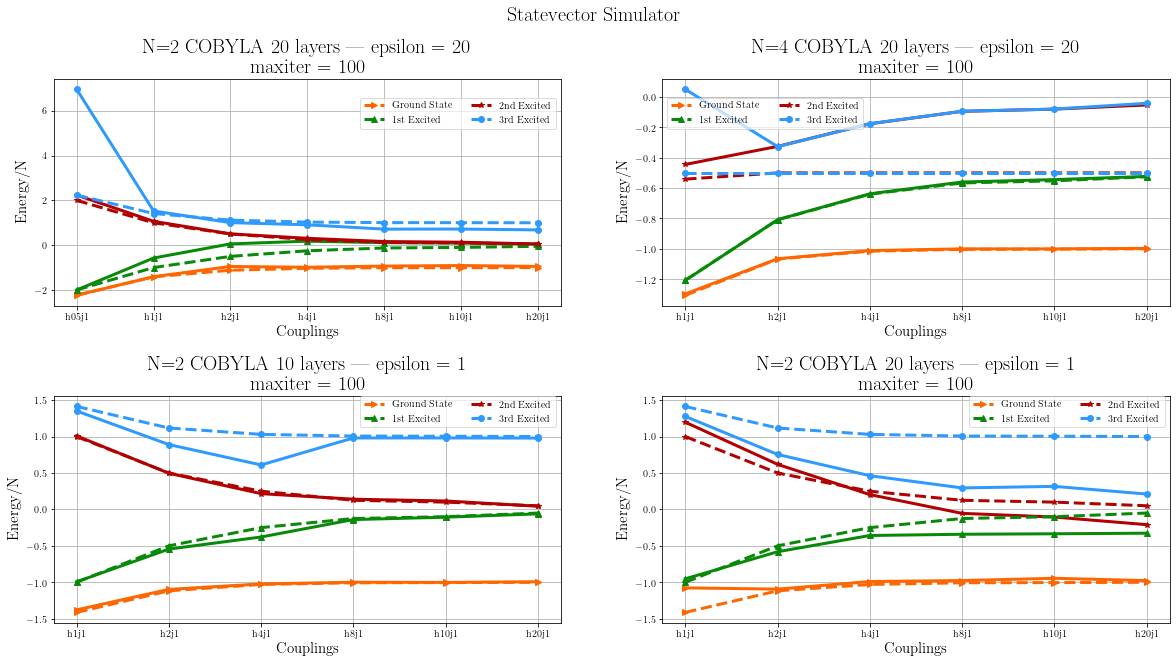

In [1943]:
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot

fig, axs = plt.subplots(nrows=2,ncols=2, figsize=(20, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.2)
fig.suptitle('Statevector Simulator',fontsize=20)
axs[0,0].title.set_text("N=2 COBYLA 20 layers | epsilon = 20\n maxiter = 100")
axs[0,0].title.set_size(20)
for k in range(4):
    locals()['yCOBYLA_l20_2d_e20_k{}'.format(k)] = []
    locals()['yCOBYLA_l20_2d_e20_k{}'.format(k)] = [*eval('COBYLA_l20_2d_e20_k{}'.format(k)).values()]
    locals()['yE_2d_k{}'.format(k)] = []
    locals()['yE_2d_k{}'.format(k)] = [*eval('E_2d_k{}_th'.format(k)).values()]

axs[0,0].plot(  xcouplings,np.array(yCOBYLA_l20_2d_e20_k0)/2, linestyle='-',linewidth = 3.0, marker='>',color ='#ff6600' )
axs[0,0].plot(  xcouplings,np.array(yCOBYLA_l20_2d_e20_k1)/2, linestyle='-',linewidth = 3.0, marker='^',color ='#088A08' )
axs[0,0].plot(  xcouplings,np.array(yCOBYLA_l20_2d_e20_k2)/2, linestyle='-',linewidth = 3.0, marker='*',color ='#b30000' )
axs[0,0].plot(  xcouplings,np.array(yCOBYLA_l20_2d_e20_k3)/2, linestyle='-',linewidth = 3.0, marker='o',color ='#2E9AFE' )

axs[0,0].plot(  xcouplings,np.array(yE_2d_k0)/2, linestyle='--',linewidth = 3.0, marker='>',color ='#ff6600' ,label = 'Ground State')
axs[0,0].plot(  xcouplings,np.array(yE_2d_k1)/2, linestyle='--',linewidth = 3.0, marker='^',color ='#088A08' ,label = '1st Excited')
axs[0,0].plot(  xcouplings,np.array(yE_2d_k2)/2, linestyle='--',linewidth = 3.0, marker='*',color ='#b30000' ,label = '2nd Excited')
axs[0,0].plot(  xcouplings,np.array(yE_2d_k3)/2, linestyle='--',linewidth = 3.0, marker='o',color ='#2E9AFE' ,label = '3rd Excited')
axs[0,0].legend(shadow=False,framealpha=0.7, ncol=2,fancybox=True,bbox_to_anchor=(0., 0.84, 1., .10))
axs[0,0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[0,0].grid()

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

axs[0,1].title.set_text("N=4 COBYLA 20 layers | epsilon = 20\n maxiter = 100")
axs[0,1].title.set_size(20)
for k in range(4):
    locals()['yCOBYLA_l20_4d_k{}'.format(k)] = []
    locals()['yCOBYLA_l20_4d_k{}'.format(k)] = [*eval('COBYLA_l20_4d_e20_k{}'.format(k)).values()]
    locals()['yE_4d_k{}'.format(k)] = []
    locals()['yE_4d_k{}'.format(k)] = [*eval('E_4d_k{}_th'.format(k)).values()]
    locals()['yE_4d_k{}'.format(k)] = locals()['yE_4d_k{}'.format(k)][1:]    

axs[0,1].plot(  xcouplings1,np.array(yCOBYLA_l20_4d_k0)/4, linestyle='-',linewidth = 3.0, marker='>',color ='#ff6600' )
axs[0,1].plot(  xcouplings1,np.array(yCOBYLA_l20_4d_k1)/4, linestyle='-',linewidth = 3.0, marker='^',color ='#088A08' )
axs[0,1].plot(  xcouplings1,np.array(yCOBYLA_l20_4d_k2)/4, linestyle='-',linewidth = 3.0, marker='*',color ='#b30000' )
axs[0,1].plot(  xcouplings1,np.array(yCOBYLA_l20_4d_k3)/4, linestyle='-',linewidth = 3.0, marker='o',color ='#2E9AFE' )

axs[0,1].plot(  xcouplings1,np.array(yE_4d_k0)/4, linestyle='--',linewidth = 3.0, marker='>',color ='#ff6600' ,label = 'Ground State')
axs[0,1].plot(  xcouplings1,np.array(yE_4d_k1)/4, linestyle='--',linewidth = 3.0, marker='^',color ='#088A08' ,label = '1st Excited')
axs[0,1].plot(  xcouplings1,np.array(yE_4d_k2)/4, linestyle='--',linewidth = 3.0, marker='*',color ='#b30000' ,label = '2nd Excited')
axs[0,1].plot(  xcouplings1,np.array(yE_4d_k3)/4, linestyle='--',linewidth = 3.0, marker='o',color ='#2E9AFE' ,label = '3rd Excited')
axs[0,1].legend(shadow=False,framealpha=0.7, ncol=2,fancybox=True,bbox_to_anchor=(0., 0.84, 1., .10))
axs[0,1].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[0,1].grid()
#------------------------------------

axs[1,0].title.set_text("N=2 COBYLA 10 layers | epsilon = 1\n maxiter = 100")
axs[1,0].title.set_size(20)
for k in range(4):
    locals()['yCOBYLA_l10_2d_k{}'.format(k)] = []
    locals()['yCOBYLA_l10_2d_k{}'.format(k)] = [*eval('COBYLA_l10_2d_e1_k{}'.format(k)).values()]
    locals()['yE_2d_e1_k{}'.format(k)] = []
    locals()['yE_2d_e1_k{}'.format(k)] = [*eval('E_2d_k{}_th'.format(k)).values()]
    locals()['yE_2d_e1_k{}'.format(k)] = locals()['yE_2d_k{}'.format(k)][1:]    

axs[1,0].plot(  xcouplings1,np.array(yCOBYLA_l10_2d_k0)/2, linestyle='-',linewidth = 3.0, marker='>',color ='#ff6600' )
axs[1,0].plot(  xcouplings1,np.array(yCOBYLA_l10_2d_k1)/2, linestyle='-',linewidth = 3.0, marker='^',color ='#088A08' )
axs[1,0].plot(  xcouplings1,np.array(yCOBYLA_l10_2d_k2)/2, linestyle='-',linewidth = 3.0, marker='*',color ='#b30000' )
axs[1,0].plot(  xcouplings1,np.array(yCOBYLA_l10_2d_k3)/2, linestyle='-',linewidth = 3.0, marker='o',color ='#2E9AFE' )

axs[1,0].plot(  xcouplings1,np.array(yE_2d_e1_k0)/2, linestyle='--',linewidth = 3.0, marker='>',color ='#ff6600' ,label = 'Ground State')
axs[1,0].plot(  xcouplings1,np.array(yE_2d_e1_k1)/2, linestyle='--',linewidth = 3.0, marker='^',color ='#088A08' ,label = '1st Excited')
axs[1,0].plot(  xcouplings1,np.array(yE_2d_e1_k2)/2, linestyle='--',linewidth = 3.0, marker='*',color ='#b30000' ,label = '2nd Excited')
axs[1,0].plot(  xcouplings1,np.array(yE_2d_e1_k3)/2, linestyle='--',linewidth = 3.0, marker='o',color ='#2E9AFE' ,label = '3rd Excited')
axs[1,0].legend(shadow=False,framealpha=0.7, ncol=2,fancybox=True,bbox_to_anchor=(0., 0.84, 1., .10))
axs[1,0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1,0].grid()

#------------------------------------

axs[1,1].title.set_text("N=2 COBYLA 20 layers | epsilon = 1\n maxiter = 100")
axs[1,1].title.set_size(20)
for k in range(4):
    locals()['yCOBYLA_l20_2d_e1_k{}'.format(k)] = []
    locals()['yCOBYLA_l20_2d_e1_k{}'.format(k)] = [*eval('COBYLA_l20_2d_e1_k{}'.format(k)).values()]
    locals()['yE_2d_e1_k{}'.format(k)] = []
    locals()['yE_2d_e1_k{}'.format(k)] = [*eval('E_2d_k{}_th'.format(k)).values()]
    locals()['yE_2d_e1_k{}'.format(k)] = locals()['yE_2d_e1_k{}'.format(k)][1:]    

axs[1,1].plot(  xcouplings1,np.array(yCOBYLA_l20_2d_e1_k0)/2, linestyle='-',linewidth = 3.0, marker='>',color ='#ff6600' )
axs[1,1].plot(  xcouplings1,np.array(yCOBYLA_l20_2d_e1_k1)/2, linestyle='-',linewidth = 3.0, marker='^',color ='#088A08' )
axs[1,1].plot(  xcouplings1,np.array(yCOBYLA_l20_2d_e1_k2)/2, linestyle='-',linewidth = 3.0, marker='*',color ='#b30000' )
axs[1,1].plot(  xcouplings1,np.array(yCOBYLA_l20_2d_e1_k3)/2, linestyle='-',linewidth = 3.0, marker='o',color ='#2E9AFE' )

axs[1,1].plot(  xcouplings1,np.array(yE_2d_e1_k0)/2, linestyle='--',linewidth = 3.0, marker='>',color ='#ff6600' ,label = 'Ground State')
axs[1,1].plot(  xcouplings1,np.array(yE_2d_e1_k1)/2, linestyle='--',linewidth = 3.0, marker='^',color ='#088A08' ,label = '1st Excited')
axs[1,1].plot(  xcouplings1,np.array(yE_2d_e1_k2)/2, linestyle='--',linewidth = 3.0, marker='*',color ='#b30000' ,label = '2nd Excited')
axs[1,1].plot(  xcouplings1,np.array(yE_2d_e1_k3)/2, linestyle='--',linewidth = 3.0, marker='o',color ='#2E9AFE' ,label = '3rd Excited')
axs[1,1].legend(shadow=False,framealpha=0.7, ncol=2,fancybox=True,bbox_to_anchor=(0., 0.84, 1., .10))
axs[1,1].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1,1].grid()

for ax in axs.flat:
    ax.set(xlabel='Couplings', ylabel='Energy/N')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.label.set_size(15)
    ax.xaxis.label.set_size(15)
#     ax.yaxis.set_major_locator(MaxNLocator(integer=True))

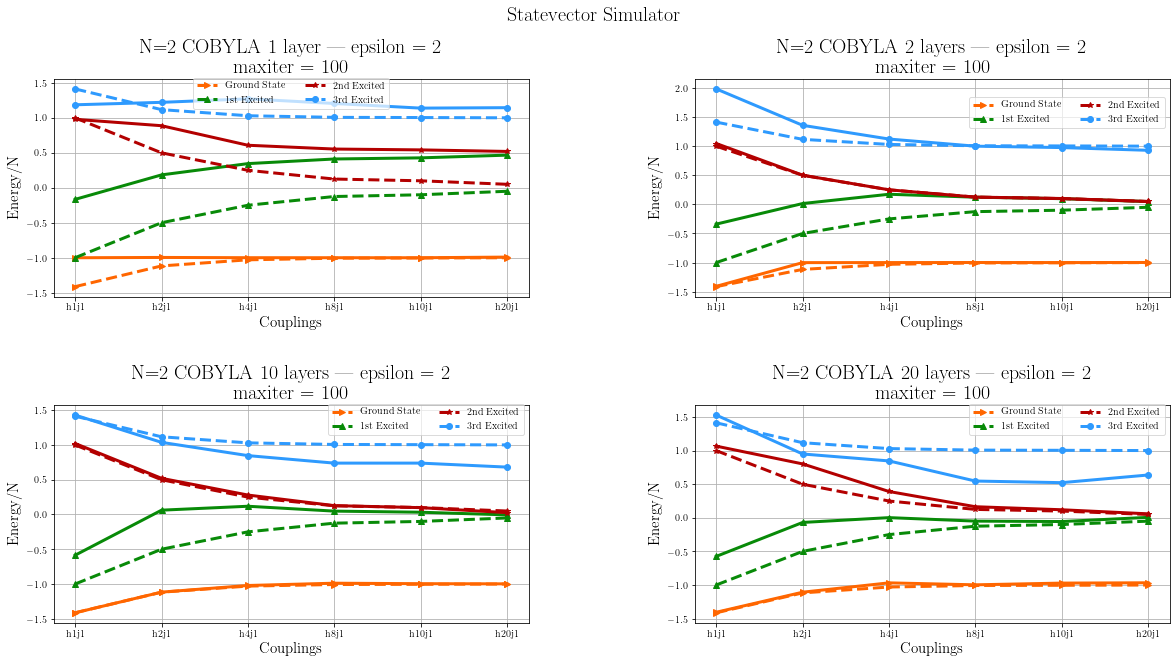

In [1944]:
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot

fig, axs = plt.subplots(nrows=2,ncols=2, figsize=(20, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.35)
fig.suptitle('Statevector Simulator',fontsize=20)

axs[0,0].title.set_text("N=2 COBYLA 1 layer | epsilon = 2\n maxiter = 100")
for l in [1,2,5,10,20]:
    for k in range(4):
        locals()['yCOBYLA_l{}_2d_e2_k{}'.format(l,k)] = []
        locals()['yCOBYLA_l{}_2d_e2_k{}'.format(l,k)] = [*eval('COBYLA_l{}_2d_e2_k{}'.format(l,k)).values()]
        locals()['yE_2d_e2_k{}'.format(k)] = []
        locals()['yE_2d_e2_k{}'.format(k)] = [*eval('E_2d_k{}_th'.format(k)).values()]
        locals()['yE_2d_e2_k{}'.format(k)] = locals()['yE_2d_e2_k{}'.format(k)][1:]    

axs[0,0].plot(  xcouplings1,np.array(yCOBYLA_l1_2d_e2_k0)/2, linestyle='-',linewidth = 3.0, marker='>',color ='#ff6600' )
axs[0,0].plot(  xcouplings1,np.array(yCOBYLA_l1_2d_e2_k1)/2, linestyle='-',linewidth = 3.0, marker='^',color ='#088A08' )
axs[0,0].plot(  xcouplings1,np.array(yCOBYLA_l1_2d_e2_k2)/2, linestyle='-',linewidth = 3.0, marker='*',color ='#b30000' )
axs[0,0].plot(  xcouplings1,np.array(yCOBYLA_l1_2d_e2_k3)/2, linestyle='-',linewidth = 3.0, marker='o',color ='#2E9AFE' )

axs[0,0].plot(  xcouplings1,np.array(yE_2d_e1_k0)/2, linestyle='--',linewidth = 3.0, marker='>',color ='#ff6600' ,label = 'Ground State')
axs[0,0].plot(  xcouplings1,np.array(yE_2d_e1_k1)/2, linestyle='--',linewidth = 3.0, marker='^',color ='#088A08' ,label = '1st Excited')
axs[0,0].plot(  xcouplings1,np.array(yE_2d_e1_k2)/2, linestyle='--',linewidth = 3.0, marker='*',color ='#b30000' ,label = '2nd Excited')
axs[0,0].plot(  xcouplings1,np.array(yE_2d_e1_k3)/2, linestyle='--',linewidth = 3.0, marker='o',color ='#2E9AFE' ,label = '3rd Excited')
axs[0,0].legend(shadow=False,framealpha=0.7, ncol=2,fancybox=True,bbox_to_anchor=(0., 0.84, 1., .10))
axs[0,0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[0,0].grid()
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

axs[0,1].title.set_text("N=2 COBYLA 2 layers | epsilon = 2\n maxiter = 100")
axs[0,1].plot(  xcouplings1,np.array(yCOBYLA_l2_2d_e2_k0)/2, linestyle='-',linewidth = 3.0, marker='>',color ='#ff6600' )
axs[0,1].plot(  xcouplings1,np.array(yCOBYLA_l2_2d_e2_k1)/2, linestyle='-',linewidth = 3.0, marker='^',color ='#088A08' )
axs[0,1].plot(  xcouplings1,np.array(yCOBYLA_l2_2d_e2_k2)/2, linestyle='-',linewidth = 3.0, marker='*',color ='#b30000' )
axs[0,1].plot(  xcouplings1,np.array(yCOBYLA_l2_2d_e2_k3)/2, linestyle='-',linewidth = 3.0, marker='o',color ='#2E9AFE' )

axs[0,1].plot(  xcouplings1,np.array(yE_2d_e1_k0)/2, linestyle='--',linewidth = 3.0, marker='>',color ='#ff6600' ,label = 'Ground State')
axs[0,1].plot(  xcouplings1,np.array(yE_2d_e1_k1)/2, linestyle='--',linewidth = 3.0, marker='^',color ='#088A08' ,label = '1st Excited')
axs[0,1].plot(  xcouplings1,np.array(yE_2d_e1_k2)/2, linestyle='--',linewidth = 3.0, marker='*',color ='#b30000' ,label = '2nd Excited')
axs[0,1].plot(  xcouplings1,np.array(yE_2d_e1_k3)/2, linestyle='--',linewidth = 3.0, marker='o',color ='#2E9AFE' ,label = '3rd Excited')
axs[0,1].legend(shadow=False,framealpha=0.7, ncol=2,fancybox=True,bbox_to_anchor=(0., 0.84, 1., .10))
axs[0,1].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[0,1].grid()
#------------------------------------
axs[1,0].title.set_text("N=2 COBYLA 10 layers | epsilon = 2\n maxiter = 100")
axs[1,0].plot(  xcouplings1,np.array(yCOBYLA_l10_2d_e2_k0)/2, linestyle='-',linewidth = 3.0, marker='>',color ='#ff6600' )
axs[1,0].plot(  xcouplings1,np.array(yCOBYLA_l10_2d_e2_k1)/2, linestyle='-',linewidth = 3.0, marker='^',color ='#088A08' )
axs[1,0].plot(  xcouplings1,np.array(yCOBYLA_l10_2d_e2_k2)/2, linestyle='-',linewidth = 3.0, marker='*',color ='#b30000' )
axs[1,0].plot(  xcouplings1,np.array(yCOBYLA_l10_2d_e2_k3)/2, linestyle='-',linewidth = 3.0, marker='o',color ='#2E9AFE' )

axs[1,0].plot(  xcouplings1,np.array(yE_2d_e1_k0)/2, linestyle='--',linewidth = 3.0, marker='>',color ='#ff6600' ,label = 'Ground State')
axs[1,0].plot(  xcouplings1,np.array(yE_2d_e1_k1)/2, linestyle='--',linewidth = 3.0, marker='^',color ='#088A08' ,label = '1st Excited')
axs[1,0].plot(  xcouplings1,np.array(yE_2d_e1_k2)/2, linestyle='--',linewidth = 3.0, marker='*',color ='#b30000' ,label = '2nd Excited')
axs[1,0].plot(  xcouplings1,np.array(yE_2d_e1_k3)/2, linestyle='--',linewidth = 3.0, marker='o',color ='#2E9AFE' ,label = '3rd Excited')
axs[1,0].legend(shadow=False,framealpha=0.7, ncol=2,fancybox=True,bbox_to_anchor=(0., 0.84, 1., .10))
axs[1,0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1,0].grid()

#------------------------------------
axs[1,1].title.set_text("N=2 COBYLA 20 layers | epsilon = 2\n maxiter = 100")
axs[1,1].plot(  xcouplings1,np.array(yCOBYLA_l20_2d_e2_k0)/2, linestyle='-',linewidth = 3.0, marker='>',color ='#ff6600' )
axs[1,1].plot(  xcouplings1,np.array(yCOBYLA_l20_2d_e2_k1)/2, linestyle='-',linewidth = 3.0, marker='^',color ='#088A08' )
axs[1,1].plot(  xcouplings1,np.array(yCOBYLA_l20_2d_e2_k2)/2, linestyle='-',linewidth = 3.0, marker='*',color ='#b30000' )
axs[1,1].plot(  xcouplings1,np.array(yCOBYLA_l20_2d_e2_k3)/2, linestyle='-',linewidth = 3.0, marker='o',color ='#2E9AFE' )

axs[1,1].plot(  xcouplings1,np.array(yE_2d_e1_k0)/2, linestyle='--',linewidth = 3.0, marker='>',color ='#ff6600' ,label = 'Ground State')
axs[1,1].plot(  xcouplings1,np.array(yE_2d_e1_k1)/2, linestyle='--',linewidth = 3.0, marker='^',color ='#088A08' ,label = '1st Excited')
axs[1,1].plot(  xcouplings1,np.array(yE_2d_e1_k2)/2, linestyle='--',linewidth = 3.0, marker='*',color ='#b30000' ,label = '2nd Excited')
axs[1,1].plot(  xcouplings1,np.array(yE_2d_e1_k3)/2, linestyle='--',linewidth = 3.0, marker='o',color ='#2E9AFE' ,label = '3rd Excited')
axs[1,1].legend(shadow=False,framealpha=0.7, ncol=2,fancybox=True,bbox_to_anchor=(0., 0.84, 1., .10))
axs[1,1].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1,1].grid()

for ax in axs.flat:
    ax.title.set_size(20)
    ax.set(xlabel='Couplings', ylabel='Energy/N')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.label.set_size(15)
    ax.xaxis.label.set_size(15)

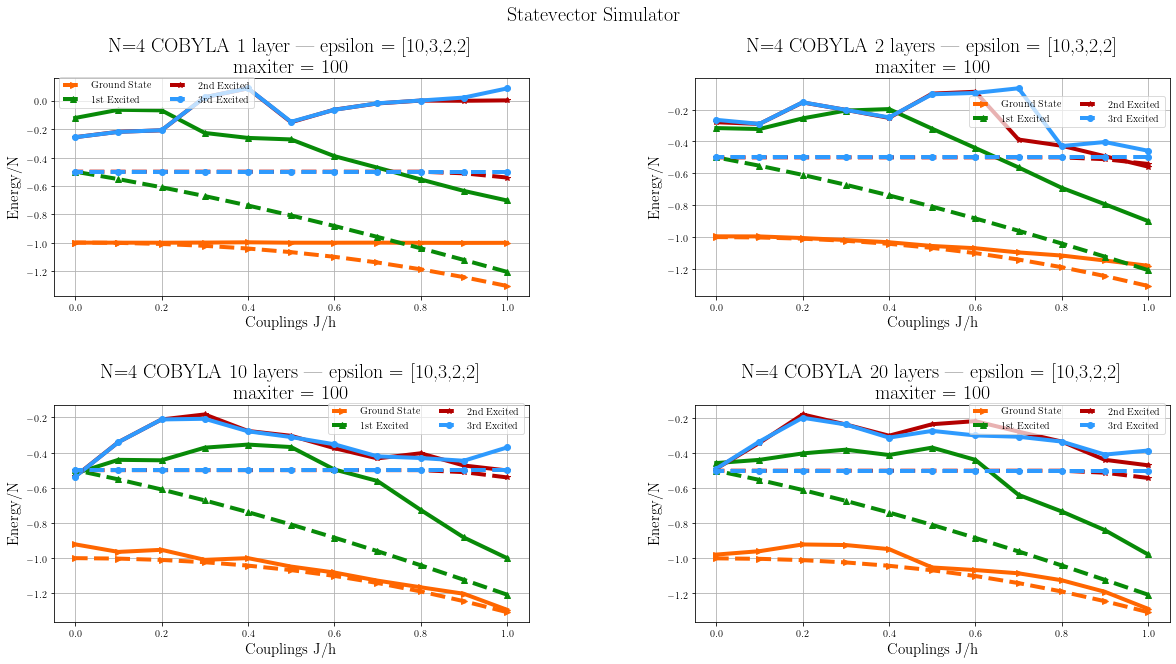

In [1934]:
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot

fig, axs = plt.subplots(nrows=2,ncols=2, figsize=(20, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.35)
fig.suptitle('Statevector Simulator',fontsize=20)

axs[0,0].title.set_text("N=4 COBYLA 1 layer | epsilon = [10,3,2,2]\n maxiter = 100")
for l in [1,2,5,10,20]:
    for k in range(4):
        locals()['yCOBYLA_l{}_4d_e20_k{}'.format(l,k)] = []
        locals()['yCOBYLA_l{}_4d_e20_k{}'.format(l,k)] = [*eval('COBYLA_l{}_4d_e10_3_2_2_k{}'.format(l,k)).values()]
        locals()['yE_4d_e20_k{}'.format(k)] = []
        locals()['yE_4d_e20_k{}'.format(k)] = [*eval('E_4d_k{}_r_th'.format(k)).values()]

axs[0,0].plot(  xcouplings2,np.array(yCOBYLA_l1_4d_e20_k0)/4, linestyle='-',linewidth = 4.0, marker='>',color ='#ff6600' )
axs[0,0].plot(  xcouplings2,np.array(yCOBYLA_l1_4d_e20_k1)/4, linestyle='-',linewidth = 4.0, marker='^',color ='#088A08' )
axs[0,0].plot(  xcouplings2,np.array(yCOBYLA_l1_4d_e20_k2)/4, linestyle='-',linewidth = 4.0, marker='*',color ='#b30000' )
axs[0,0].plot(  xcouplings2,np.array(yCOBYLA_l1_4d_e20_k3)/4, linestyle='-',linewidth = 4.0, marker='o',color ='#2E9AFE' )

axs[0,0].plot(  xcouplings2,np.array(yE_4d_e20_k0)/4, linestyle='--',linewidth = 4.0, marker='>',color ='#ff6600' ,label = 'Ground State')
axs[0,0].plot(  xcouplings2,np.array(yE_4d_e20_k1)/4, linestyle='--',linewidth = 4.0, marker='^',color ='#088A08' ,label = '1st Excited')
axs[0,0].plot(  xcouplings2,np.array(yE_4d_e20_k2)/4, linestyle='--',linewidth = 4.0, marker='*',color ='#b30000' ,label = '2nd Excited')
axs[0,0].plot(  xcouplings2,np.array(yE_4d_e20_k3)/4, linestyle='--',linewidth = 4.0, marker='o',color ='#2E9AFE' ,label = '3rd Excited')
axs[0,0].legend(shadow=False,framealpha=0.7, ncol=2,fancybox=True,bbox_to_anchor=(0., 0.84, 1., .10))
axs[0,0].grid()
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

axs[0,1].title.set_text("N=4 COBYLA 2 layers | epsilon = [10,3,2,2]\n maxiter = 100")

axs[0,1].plot(  xcouplings2,np.array(yCOBYLA_l2_4d_e20_k0)/4, linestyle='-',linewidth = 4.0, marker='>',color ='#ff6600' )
axs[0,1].plot(  xcouplings2,np.array(yCOBYLA_l2_4d_e20_k1)/4, linestyle='-',linewidth = 4.0, marker='^',color ='#088A08' )
axs[0,1].plot(  xcouplings2,np.array(yCOBYLA_l2_4d_e20_k2)/4, linestyle='-',linewidth = 4.0, marker='*',color ='#b30000' )
axs[0,1].plot(  xcouplings2,np.array(yCOBYLA_l2_4d_e20_k3)/4, linestyle='-',linewidth = 4.0, marker='o',color ='#2E9AFE' )

axs[0,1].plot(  xcouplings2,np.array(yE_4d_e20_k0)/4, linestyle='--',linewidth = 4.0, marker='>',color ='#ff6600' ,label = 'Ground State')
axs[0,1].plot(  xcouplings2,np.array(yE_4d_e20_k1)/4, linestyle='--',linewidth = 4.0, marker='^',color ='#088A08' ,label = '1st Excited')
axs[0,1].plot(  xcouplings2,np.array(yE_4d_e20_k2)/4, linestyle='--',linewidth = 4.0, marker='*',color ='#b30000' ,label = '2nd Excited')
axs[0,1].plot(  xcouplings2,np.array(yE_4d_e20_k3)/4, linestyle='--',linewidth = 4.0, marker='o',color ='#2E9AFE' ,label = '3rd Excited')
axs[0,1].legend(shadow=False,framealpha=0.7, ncol=2,fancybox=True,bbox_to_anchor=(0., 0.84, 1., .10))
axs[0,1].grid()
#------------------------------------

axs[1,0].title.set_text("N=4 COBYLA 10 layers | epsilon = [10,3,2,2]\n maxiter = 100")

axs[1,0].plot(  xcouplings2,np.array(yCOBYLA_l10_4d_e20_k0)/4, linestyle='-',linewidth = 4.0, marker='>',color ='#ff6600' )
axs[1,0].plot(  xcouplings2,np.array(yCOBYLA_l10_4d_e20_k1)/4, linestyle='-',linewidth = 4.0, marker='^',color ='#088A08' )
axs[1,0].plot(  xcouplings2,np.array(yCOBYLA_l10_4d_e20_k2)/4, linestyle='-',linewidth = 4.0, marker='*',color ='#b30000' )
axs[1,0].plot(  xcouplings2,np.array(yCOBYLA_l10_4d_e20_k3)/4, linestyle='-',linewidth = 4.0, marker='o',color ='#2E9AFE' )
axs[1,0].plot(  xcouplings2,np.array(yE_4d_e20_k0)/4, linestyle='--',linewidth = 4.0, marker='>',color ='#ff6600' ,label = 'Ground State')
axs[1,0].plot(  xcouplings2,np.array(yE_4d_e20_k1)/4, linestyle='--',linewidth = 4.0, marker='^',color ='#088A08' ,label = '1st Excited')
axs[1,0].plot(  xcouplings2,np.array(yE_4d_e20_k2)/4, linestyle='--',linewidth = 4.0, marker='*',color ='#b30000' ,label = '2nd Excited')
axs[1,0].plot(  xcouplings2,np.array(yE_4d_e20_k3)/4, linestyle='--',linewidth = 4.0, marker='o',color ='#2E9AFE' ,label = '3rd Excited')
axs[1,0].legend(shadow=False,framealpha=0.7, ncol=2,fancybox=True,bbox_to_anchor=(0., 0.84, 1., .10))
axs[1,0].grid()
#------------------------------------
axs[1,1].title.set_text("N=4 COBYLA 20 layers | epsilon = [10,3,2,2]\n maxiter = 100")

axs[1,1].plot(  xcouplings2,np.array(yCOBYLA_l20_4d_e20_k0)/4, linestyle='-',linewidth = 4.0, marker='>',color ='#ff6600' )
axs[1,1].plot(  xcouplings2,np.array(yCOBYLA_l20_4d_e20_k1)/4, linestyle='-',linewidth = 4.0, marker='^',color ='#088A08' )
axs[1,1].plot(  xcouplings2,np.array(yCOBYLA_l20_4d_e20_k2)/4, linestyle='-',linewidth = 4.0, marker='*',color ='#b30000' )
axs[1,1].plot(  xcouplings2,np.array(yCOBYLA_l20_4d_e20_k3)/4, linestyle='-',linewidth = 4.0, marker='o',color ='#2E9AFE' )
axs[1,1].plot(  xcouplings2,np.array(yE_4d_e20_k0)/4, linestyle='--',linewidth = 4.0, marker='>',color ='#ff6600' ,label = 'Ground State')
axs[1,1].plot(  xcouplings2,np.array(yE_4d_e20_k1)/4, linestyle='--',linewidth = 4.0, marker='^',color ='#088A08' ,label = '1st Excited')
axs[1,1].plot(  xcouplings2,np.array(yE_4d_e20_k2)/4, linestyle='--',linewidth = 4.0, marker='*',color ='#b30000' ,label = '2nd Excited')
axs[1,1].plot(  xcouplings2,np.array(yE_4d_e20_k3)/4, linestyle='--',linewidth = 4.0, marker='o',color ='#2E9AFE' ,label = '3rd Excited')
axs[1,1].legend(shadow=False,framealpha=0.7, ncol=2,fancybox=True,bbox_to_anchor=(0., 0.84, 1., .10))#80ff00 b30000
axs[1,1].grid()

for ax in axs.flat:
    ax.title.set_size(20)
    ax.set(xlabel='Couplings J/h', ylabel='Energy/N')
#     ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.label.set_size(15)
    locals()['yE_2d_e20_k{}'.format(k)] = [*eval('E_2d_k{}_th'.format(k)).values()]
    locals()['yE_2d_e20_k{}'.format(k)] = locals()['yE_2d_e20_k{}'.format(k)][1:]    
    ax.xaxis.label.set_size(15)

In [1947]:
k=1
locals()['yE_2d_e20_k{}'.format(k)] = [*eval('E_2d_k{}_th'.format(k)).values()]
locals()['yE_2d_e20_k{}'.format(k)] = locals()['yE_2d_e20_k{}'.format(k)][1:]    
print(len(yE_2d_e20_k1),len(xcouplings1))
print(yE_2d_e20_k1)

6 6
[-1.999999999999999, -0.9999999999999998, -0.4999999999999999, -0.24999999999999994, -0.19999999999999998, -0.09999999999999999]


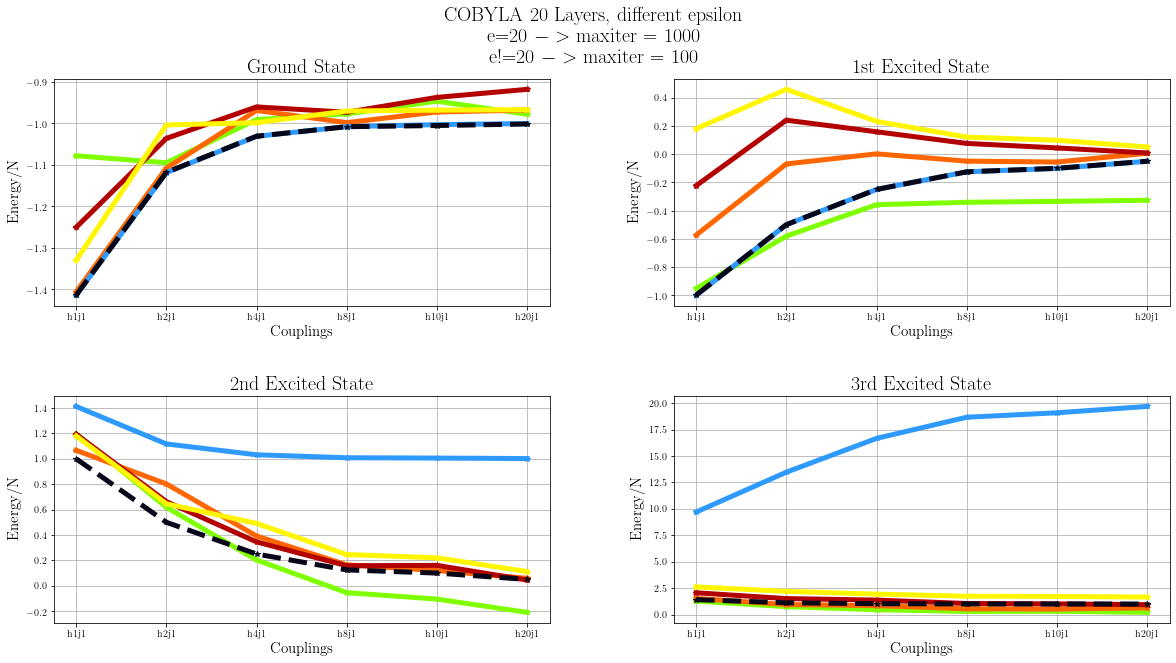

In [1949]:
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot

fig, axs = plt.subplots(nrows=2,ncols=2, figsize=(20, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.25)
fig.suptitle('COBYLA N = 2 Layers = 20 \n e=20 $->$ maxiter = 1000 \n e!=20 $->$ maxiter = 100',fontsize=20)
axs[0,0].title.set_text("Ground State")
axs[0,0].title.set_size(20)

for e in [1,2,3,4]:
    locals()['yCOBYLA_l20_2d_e{}_k0'.format(e)] = []
    locals()['yCOBYLA_l20_2d_e{}_k0'.format(e)] = [*eval('COBYLA_l20_2d_e{}_k0'.format(e)).values()]

locals()['yCOBYLA_l20_2d_e20_k0'.format(e)] = []
locals()['yCOBYLA_l20_2d_e20_k0'.format(e)] = [*eval('COBYLA_l20_2d_k0'.format(e)).values()]
for k in range(4):    
    locals()['yE_2d_e20_k{}'.format(k)] = []
    locals()['yE_2d_e20_k{}'.format(k)] = [*eval('E_2d_k{}_th'.format(k)).values()]
    locals()['yE_2d_e20_k{}'.format(k)] = locals()['yE_2d_e20_k{}'.format(k)][1:]    

axs[0,0].plot(  xcouplings1,np.array(yCOBYLA_l20_2d_e1_k0)/2, linestyle='-',linewidth = 5.0, marker='*',color ='#80ff00' ,label = '$\epsilon = 1$')
axs[0,0].plot(  xcouplings1,np.array(yCOBYLA_l20_2d_e2_k0)/2, linestyle='-',linewidth = 5.0, marker='*',color ='#ff6600' ,label = '$\epsilon = 2$')
axs[0,0].plot(  xcouplings1,np.array(yCOBYLA_l20_2d_e3_k0)/2, linestyle='-',linewidth = 5.0, marker='*',color ='#b30000' ,label = '$\epsilon = 3$')
axs[0,0].plot(  xcouplings1,np.array(yCOBYLA_l20_2d_e4_k0)/2, linestyle='-',linewidth = 5.0, marker='*',color ='#fff600' ,label = '$\epsilon = 4$')
axs[0,0].plot(  xcouplings1,np.array(yCOBYLA_l20_2d_e20_k0)/2, linestyle='-',linewidth = 5.0, marker='*',color ='#2E9AFE' ,label = '$\epsilon = 20$')
axs[0,0].plot(  xcouplings1,np.array(yE_2d_e20_k0)/2, linestyle='--',linewidth = 5.0, marker='*',color ='#070719' ,label = 'Theory')
axs[0,0].legend(shadow=False,framealpha=0.7, ncol=2,fancybox=True,bbox_to_anchor=(0., 0.84, 1., .10))

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axs[0,1].title.set_text("1st Excited State")
axs[0,1].title.set_size(20)
for e in [1,2,3,4]:
    locals()['yCOBYLA_l20_2d_e{}_k1'.format(e)] = []
    locals()['yCOBYLA_l20_2d_e{}_k1'.format(e)] = [*eval('COBYLA_l20_2d_e{}_k1'.format(e)).values()]
locals()['yCOBYLA_l20_2d_e20_k1'.format(e)] = []
locals()['yCOBYLA_l20_2d_e20_k1'.format(e)] = [*eval('COBYLA_l20_2d_k1'.format(e)).values()]

axs[0,1].plot(  xcouplings1,np.array(yCOBYLA_l20_2d_e1_k1)/2, linestyle='-',linewidth = 5.0, marker='*',color ='#80ff00' ,label = '$\epsilon = 1$')
axs[0,1].plot(  xcouplings1,np.array(yCOBYLA_l20_2d_e2_k1)/2, linestyle='-',linewidth = 5.0, marker='*',color ='#ff6600' ,label = '$\epsilon = 2$')
axs[0,1].plot(  xcouplings1,np.array(yCOBYLA_l20_2d_e3_k1)/2, linestyle='-',linewidth = 5.0, marker='*',color ='#b30000' ,label = '$\epsilon = 3$')
axs[0,1].plot(  xcouplings1,np.array(yCOBYLA_l20_2d_e4_k1)/2, linestyle='-',linewidth = 5.0, marker='*',color ='#fff600' ,label = '$\epsilon = 4$')
axs[0,1].plot(  xcouplings1,np.array(yCOBYLA_l20_2d_e20_k1)/2, linestyle='-',linewidth = 5.0, marker='*',color ='#2E9AFE' ,label = '$\epsilon = 20$')
axs[0,1].plot(  xcouplings1,np.array(yE_2d_e20_k1)/2, linestyle='--',linewidth = 5.0, marker='*',color ='#070719' ,label = 'Theory')
axs[0,1].legend(shadow=False,framealpha=0.7, ncol=2,fancybox=True,bbox_to_anchor=(0., 0.84, 1., .10))

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axs[1,0].title.set_text("2nd Excited State")
axs[1,0].title.set_size(20)
for e in [1,2,3,4]:
    locals()['yCOBYLA_l20_2d_e{}_k2'.format(e)] = []
    locals()['yCOBYLA_l20_2d_e{}_k2'.format(e)] = [*eval('COBYLA_l20_2d_e{}_k2'.format(e)).values()]
locals()['yCOBYLA_l20_2d_e20_k2'.format(e)] = []
locals()['yCOBYLA_l20_2d_e20_k2'.format(e)] = [*eval('COBYLA_l20_2d_k2'.format(e)).values()]

axs[1,0].plot(  xcouplings1,np.array(yCOBYLA_l20_2d_e1_k2)/2, linestyle='-',linewidth = 5.0, marker='*',color ='#80ff00' ,label = '$\epsilon = 1$')
axs[1,0].plot(  xcouplings1,np.array(yCOBYLA_l20_2d_e2_k2)/2, linestyle='-',linewidth = 5.0, marker='*',color ='#ff6600' ,label = '$\epsilon = 2$')
axs[1,0].plot(  xcouplings1,np.array(yCOBYLA_l20_2d_e3_k2)/2, linestyle='-',linewidth = 5.0, marker='*',color ='#b30000' ,label = '$\epsilon = 3$')
axs[1,0].plot(  xcouplings1,np.array(yCOBYLA_l20_2d_e4_k2)/2, linestyle='-',linewidth = 5.0, marker='*',color ='#fff600' ,label = '$\epsilon = 4$')
axs[1,0].plot(  xcouplings1,np.array(yCOBYLA_l20_2d_e20_k2)/2, linestyle='-',linewidth = 5.0, marker='*',color ='#2E9AFE' ,label = '$\epsilon = 20$')
axs[1,0].plot(  xcouplings1,np.array(yE_2d_e20_k2)/2, linestyle='--',linewidth = 5.0, marker='*',color ='#070719' ,label = 'Theory')
axs[1,0].legend(shadow=False,framealpha=0.7, ncol=2,fancybox=True,bbox_to_anchor=(0., 0.84, 1., .10))

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axs[1,1].title.set_text("3rd Excited State")
axs[1,1].title.set_size(20)
for e in [1,2,3,4]:
    locals()['yCOBYLA_l20_2d_e{}_k3'.format(e)] = []
    locals()['yCOBYLA_l20_2d_e{}_k3'.format(e)] = [*eval('COBYLA_l20_2d_e{}_k3'.format(e)).values()]
locals()['yCOBYLA_l20_2d_e20_k3'.format(e)] = []
locals()['yCOBYLA_l20_2d_e20_k3'.format(e)] = [*eval('COBYLA_l20_2d_k3'.format(e)).values()]

axs[1,1].plot(  xcouplings1,np.array(yCOBYLA_l20_2d_e1_k3)/2, linestyle='-',linewidth = 5.0, marker='*',color ='#80ff00' ,label = '$\epsilon = 1$')
axs[1,1].plot(  xcouplings1,np.array(yCOBYLA_l20_2d_e2_k3)/2, linestyle='-',linewidth = 5.0, marker='*',color ='#ff6600' ,label = '$\epsilon = 2$')
axs[1,1].plot(  xcouplings1,np.array(yCOBYLA_l20_2d_e3_k3)/2, linestyle='-',linewidth = 5.0, marker='*',color ='#b30000' ,label = '$\epsilon = 3$')
axs[1,1].plot(  xcouplings1,np.array(yCOBYLA_l20_2d_e4_k3)/2, linestyle='-',linewidth = 5.0, marker='*',color ='#fff600' ,label = '$\epsilon = 4$')
axs[1,1].plot(  xcouplings1,np.array(yCOBYLA_l20_2d_e20_k3)/2, linestyle='-',linewidth = 5.0, marker='*',color ='#2E9AFE' ,label = '$\epsilon = 20$')
axs[1,1].plot(  xcouplings1,np.array(yE_2d_e20_k3)/2, linestyle='--',linewidth = 5.0, marker='*',color ='#070719' ,label = 'Theory')
axs[1,1].legend(shadow=False,framealpha=0.7, ncol=2,fancybox=True,bbox_to_anchor=(0., 0.84, 1., .10))
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
for ax in axs.flat:
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set(xlabel='Couplings', ylabel='Energy/N')
    ax.yaxis.label.set_size(15)
    ax.xaxis.label.set_size(15)
    ax.legend(shadow=False,framealpha=0.3, ncol=3,fancybox=True)
    ax.grid()


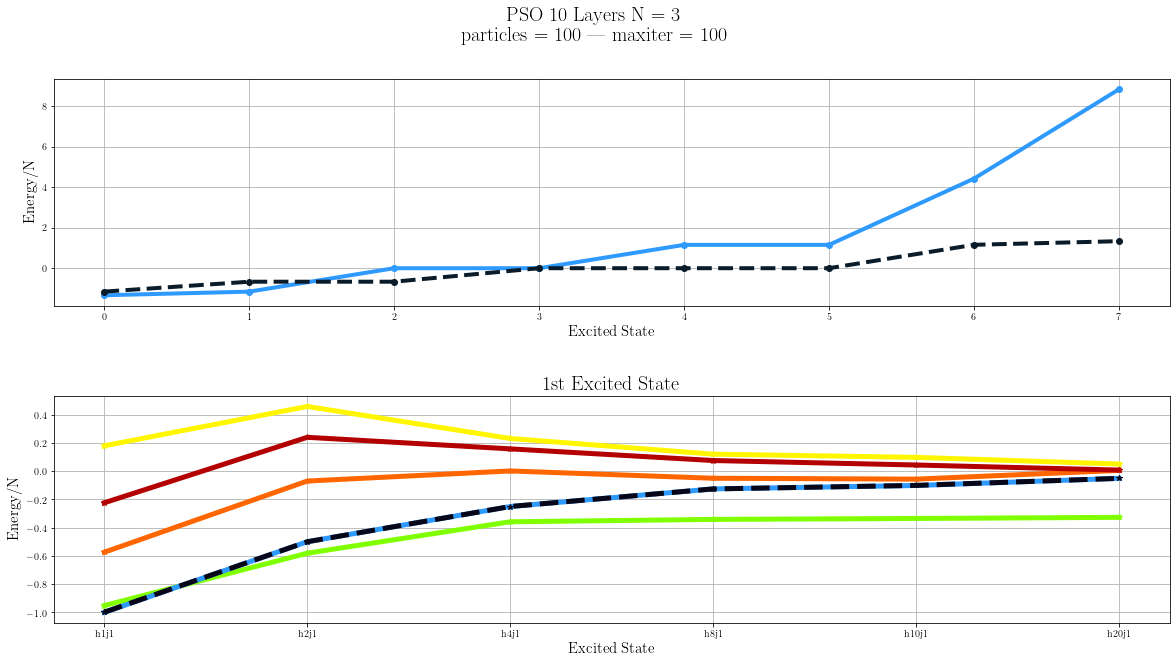

In [1960]:
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot

fig, axs = plt.subplots(nrows=2,ncols=1, figsize=(20, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.25)
fig.suptitle('PSO 10 Layers N=3 \n particles = 100 | maxiter = 100',fontsize=20)
# axs[0].title()
axs[0].title.set_size(20)
# y_h1j1_3d_zero = [*PSO_h1j1_l10_3d_zero_PBC_e20.values()]
y_h1j1_3d_zero_th = [*E_h1j1_3d_th.values()]
state3 = np.linspace(0,len(y_h1j1_3d_zero_th)-1,len(y_h1j1_3d_zero_th))

axs[0].plot(  state3,np.array(PSO_h1j1_l10_3d_zero_PBC_e20)/3, linestyle='-',linewidth = 4.0 ,marker='o',color ='#2E9AFE' ,label = 'e=20')
axs[0].plot(  state3,np.array(y_h1j1_3d_zero_th)/3, linestyle='--',linewidth = 4.0 ,marker='o',color ='#0A1B2A' ,label = 'theory')
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[0].legend(shadow=False,framealpha=0.7, ncol=2,fancybox=True,bbox_to_anchor=(0., 0.84, 1., .10))
axs[0].yaxis.label.set_size(15)
axs[0].xaxis.label.set_size(15)
axs[0].set(xlabel='Excited State', ylabel='Energy/N')
axs[0].grid()
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axs[1].title.set_text("1st Excited State")
axs[1].title.set_size(20)
for e in [1,2,3,4]:
    locals()['yCOBYLA_l20_2d_e{}_k1'.format(e)] = []
    locals()['yCOBYLA_l20_2d_e{}_k1'.format(e)] = [*eval('COBYLA_l20_2d_e{}_k1'.format(e)).values()]
locals()['yCOBYLA_l20_2d_e20_k1'.format(e)] = []
locals()['yCOBYLA_l20_2d_e20_k1'.format(e)] = [*eval('COBYLA_l20_2d_k1'.format(e)).values()]

axs[1].plot(  xcouplings1,np.array(yCOBYLA_l20_2d_e1_k1)/2, linestyle='-',linewidth = 5.0, marker='*',color ='#80ff00' ,label = '$\epsilon = 1$')
axs[1].plot(  xcouplings1,np.array(yCOBYLA_l20_2d_e2_k1)/2, linestyle='-',linewidth = 5.0, marker='*',color ='#ff6600' ,label = '$\epsilon = 2$')
axs[1].plot(  xcouplings1,np.array(yCOBYLA_l20_2d_e3_k1)/2, linestyle='-',linewidth = 5.0, marker='*',color ='#b30000' ,label = '$\epsilon = 3$')
axs[1].plot(  xcouplings1,np.array(yCOBYLA_l20_2d_e4_k1)/2, linestyle='-',linewidth = 5.0, marker='*',color ='#fff600' ,label = '$\epsilon = 4$')
axs[1].plot(  xcouplings1,np.array(yCOBYLA_l20_2d_e20_k1)/2, linestyle='-',linewidth = 5.0, marker='*',color ='#2E9AFE' ,label = '$\epsilon = 20$')
axs[1].plot(  xcouplings1,np.array(yE_2d_e20_k1)/2, linestyle='--',linewidth = 5.0, marker='*',color ='#070719' ,label = 'Theory')
axs[1].legend(shadow=False,framealpha=0.7, ncol=2,fancybox=True,bbox_to_anchor=(0., 0.84, 1., .10))
axs[1].yaxis.label.set_size(15)
axs[1].xaxis.label.set_size(15)
axs[1].set(xlabel='Couplings', ylabel='Energy/N')
axs[1].grid()
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


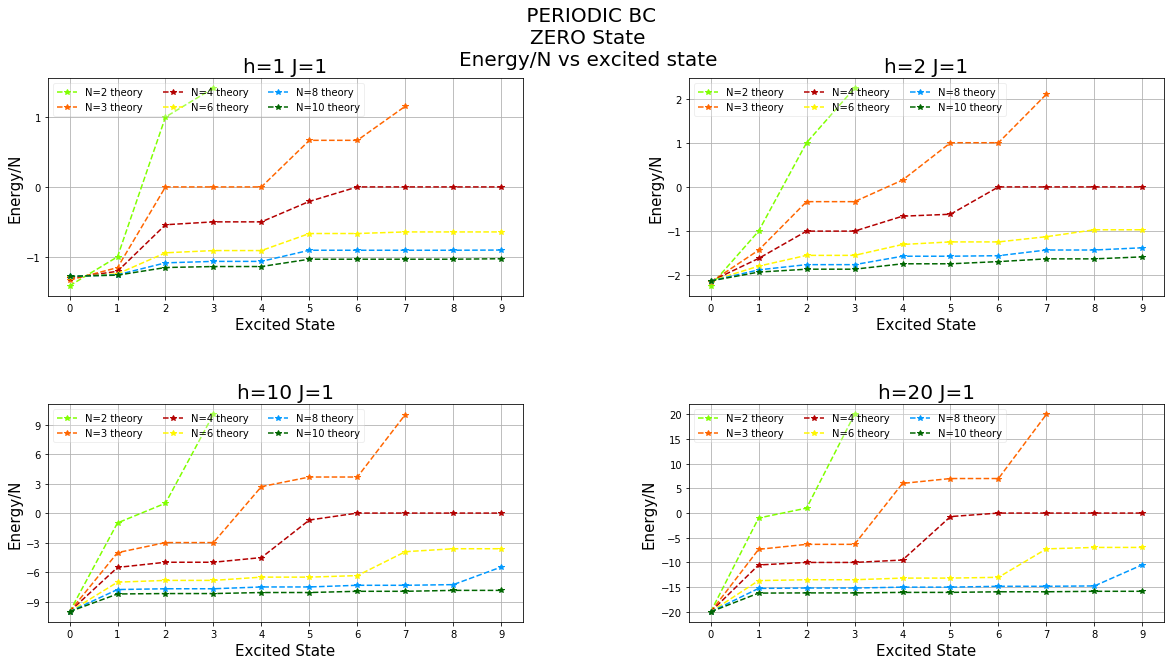

In [716]:
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot

fig, axs = plt.subplots(nrows=2,ncols=2, figsize=(20, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.35)
fig.suptitle(' PERIODIC BC\nZERO State\nEnergy/N vs excited state',fontsize=20)
axs[0,0].title.set_text("h=1 J=1")
axs[0,0].title.set_size(20)

y_h1j1_2d_zero_th = [*E_h1j1_2d_th.values()]
y_h1j1_3d_zero_th = [*E_h1j1_3d_th.values()]
y_h1j1_4d_zero_th = [*E_h1j1_4d_th.values()]
y_h1j1_6d_zero_th = [*E_h1j1_6d_th.values()]
y_h1j1_8d_zero_th = [*E_h1j1_8d_th.values()]
y_h1j1_10d_zero_th = [*E_h1j1_10d_th.values()]

state2 = np.linspace(0,len(y_h1j1_2d_zero_th)-1,len(y_h1j1_2d_zero_th))
state3 = np.linspace(0,len(y_h1j1_3d_zero_th)-1,len(y_h1j1_3d_zero_th))
state4 = np.linspace(0,len(y_h1j1_4d_zero_th)-1,len(y_h1j1_4d_zero_th))
state6 = np.linspace(0,len(y_h1j1_6d_zero_th)-1,len(y_h1j1_6d_zero_th))
state8 = np.linspace(0,len(y_h1j1_8d_zero_th)-1,len(y_h1j1_8d_zero_th))
state10 = np.linspace(0,len(y_h1j1_10d_zero_th)-1,len(y_h1j1_10d_zero_th))

axs[0,0].plot(  state2,np.array(y_h1j1_2d_zero_th)/2, linestyle='--', marker='*',color ='#80ff00' ,label = 'N=2 theory')
axs[0,0].plot(  state3,np.array(y_h1j1_3d_zero_th)/3, linestyle='--', marker='*',color ='#ff6600' ,label = 'N=3 theory')
axs[0,0].plot(  state4,np.array(y_h1j1_4d_zero_th)/4, linestyle='--', marker='*',color ='#b30000' ,label = 'N=4 theory')
axs[0,0].plot(  state6,np.array(y_h1j1_6d_zero_th)/6, linestyle='--', marker='*',color ='#fff600' ,label = 'N=6 theory')
axs[0,0].plot(  state8,np.array(y_h1j1_8d_zero_th)/8, linestyle='--', marker='*',color ='#0099ff' ,label = 'N=8 theory')
axs[0,0].plot(  state10,np.array(y_h1j1_10d_zero_th)/10, linestyle='--', marker='*',color ='#006600' ,label = 'N=10 theory')


axs[0,0].legend(shadow=False,framealpha=0.3, ncol=3,fancybox=True)
axs[0,0].grid()

axs[0,1].title.set_text("h=2 J=1")
axs[0,1].title.set_size(20)
y_h2j1_2d_zero_th = [*E_h2j1_2d_th.values()]
y_h2j1_3d_zero_th = [*E_h2j1_3d_th.values()]
y_h2j1_4d_zero_th = [*E_h2j1_4d_th.values()]
y_h2j1_6d_zero_th = [*E_h2j1_6d_th.values()]
y_h2j1_8d_zero_th = [*E_h2j1_8d_th.values()]
y_h2j1_10d_zero_th = [*E_h2j1_10d_th.values()]

axs[0,1].plot(  state2,np.array(y_h2j1_2d_zero_th)/2, linestyle='--', marker='*',color ='#80ff00' ,label = 'N=2 theory')
axs[0,1].plot(  state3,np.array(y_h2j1_3d_zero_th)/3, linestyle='--', marker='*',color ='#ff6600' ,label = 'N=3 theory')
axs[0,1].plot(  state4,np.array(y_h2j1_4d_zero_th)/4, linestyle='--', marker='*',color ='#b30000' ,label = 'N=4 theory')
axs[0,1].plot(  state6,np.array(y_h2j1_6d_zero_th)/6, linestyle='--', marker='*',color ='#fff600' ,label = 'N=6 theory')
axs[0,1].plot(  state8,np.array(y_h2j1_8d_zero_th)/8, linestyle='--', marker='*',color ='#0099ff' ,label = 'N=8 theory')
axs[0,1].plot(  state10,np.array(y_h2j1_10d_zero_th)/10, linestyle='--', marker='*',color ='#006600' ,label = 'N=10 theory')
axs[0,1].legend(shadow=False,framealpha=0.3, ncol=3,fancybox=True)
axs[0,1].grid()

axs[1,0].title.set_text("h=10 J=1")
axs[1,0].title.set_size(20)
y_h10j1_2d_zero_th = [*E_h10j1_2d_th.values()]
y_h10j1_3d_zero_th = [*E_h10j1_3d_th.values()]
y_h10j1_4d_zero_th = [*E_h10j1_4d_th.values()]
y_h10j1_6d_zero_th = [*E_h10j1_6d_th.values()]
y_h10j1_8d_zero_th = [*E_h10j1_8d_th.values()]
y_h10j1_10d_zero_th = [*E_h10j1_10d_th.values()]

axs[1,0].plot(  state2,np.array(y_h10j1_2d_zero_th)/2, linestyle='--', marker='*',color ='#80ff00' ,label = 'N=2 theory')
axs[1,0].plot(  state3,np.array(y_h10j1_3d_zero_th)/3, linestyle='--', marker='*',color ='#ff6600' ,label = 'N=3 theory')
axs[1,0].plot(  state4,np.array(y_h10j1_4d_zero_th)/4, linestyle='--', marker='*',color ='#b30000' ,label = 'N=4 theory')
axs[1,0].plot(  state6,np.array(y_h10j1_6d_zero_th)/6, linestyle='--', marker='*',color ='#fff600' ,label = 'N=6 theory')
axs[1,0].plot(  state8,np.array(y_h10j1_8d_zero_th)/8, linestyle='--', marker='*',color ='#0099ff' ,label = 'N=8 theory')
axs[1,0].plot(  state10,np.array(y_h10j1_10d_zero_th)/10, linestyle='--', marker='*',color ='#006600' ,label = 'N=10 theory')
axs[1,0].legend(shadow=False,framealpha=0.3, ncol=3,fancybox=True)
axs[1,0].grid()

axs[1,1].title.set_text("h=20 J=1")
axs[1,1].title.set_size(20)
y_h20j1_2d_zero_th = [*E_h20j1_2d_th.values()]
y_h20j1_3d_zero_th = [*E_h20j1_3d_th.values()]
y_h20j1_4d_zero_th = [*E_h20j1_4d_th.values()]
y_h20j1_6d_zero_th = [*E_h20j1_6d_th.values()]
y_h20j1_8d_zero_th = [*E_h20j1_8d_th.values()]
y_h20j1_10d_zero_th = [*E_h20j1_10d_th.values()]

axs[1,1].plot(  state2,np.array(y_h20j1_2d_zero_th)/2, linestyle='--', marker='*',color ='#80ff00' ,label = 'N=2 theory')
axs[1,1].plot(  state3,np.array(y_h20j1_3d_zero_th)/3, linestyle='--', marker='*',color ='#ff6600' ,label = 'N=3 theory')
axs[1,1].plot(  state4,np.array(y_h20j1_4d_zero_th)/4, linestyle='--', marker='*',color ='#b30000' ,label = 'N=4 theory')
axs[1,1].plot(  state6,np.array(y_h20j1_6d_zero_th)/6, linestyle='--', marker='*',color ='#fff600' ,label = 'N=6 theory')
axs[1,1].plot(  state8,np.array(y_h20j1_8d_zero_th)/8, linestyle='--', marker='*',color ='#0099ff' ,label = 'N=8 theory')
axs[1,1].plot(  state10,np.array(y_h20j1_10d_zero_th)/10, linestyle='--', marker='*',color ='#006600' ,label = 'N=10 theory')
axs[1,1].legend(shadow=False,framealpha=0.3, ncol=3,fancybox=True)
axs[1,1].grid()

for ax in axs.flat:
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set(xlabel='Excited State', ylabel='Energy/N')
    ax.yaxis.label.set_size(15)
    ax.xaxis.label.set_size(15)
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

---